# <center>**Bases de datos orientadas a grafos (BDOG) - Neo4j**</center>

**Nombre:**

**Apellidos:**

**Fecha:**


**1. Introducción.**

**2. Estructura** de una base de datos orientada a grafos en Neo4j.

**3. Cypher Query Language.**
- 3.1. Estructura y creación de un nodo.
- 3.2. Estructura y creación de una relación.
- 3.3. Recorridos y caminos.
  
**4. Conexión a una base de datos Neo4j.**

- 4.1. Configuración de una base de datos en Neo4j.
- 4.2. Conexión a una base de datos en Neo4j con Python.
    - 4.2.1. Instale la librería <code>neo4j</code> e importe <code>GraphDatabase</code>.
    - 4.2.2. Establezca la conexión a la base de datos <code>Northwind</code>, utilizando las credenciales anteriores.

**5. Consultas con Cypher Query Language.**

- 5.1. Obtenga los primeros cuatro productos.
- 5.2. Obtenga los diferentes productos con los proveedores que los dispensan.
- 5.3. Obtenga una relación de los productos pedidos por clientes, con los proveedores que los proveen.


## **1. Introducción**

***Neo4j*** comenzó como una base de datos orientada a gráfos que ha evolucionado hasta convertirse en un ecosistema que incorpora numerosas herramientas, aplicaciones y bibliotecas. ***Neo4j Graph Database*** es el producto central, y se trata de una **base de datos orientada a grafos de propiedades**, que esta diseñada para almacenar y consultar **datos relacionados**.

Bibliografía: [Documentación](https://neo4j.com/docs/getting-started/introduction/)

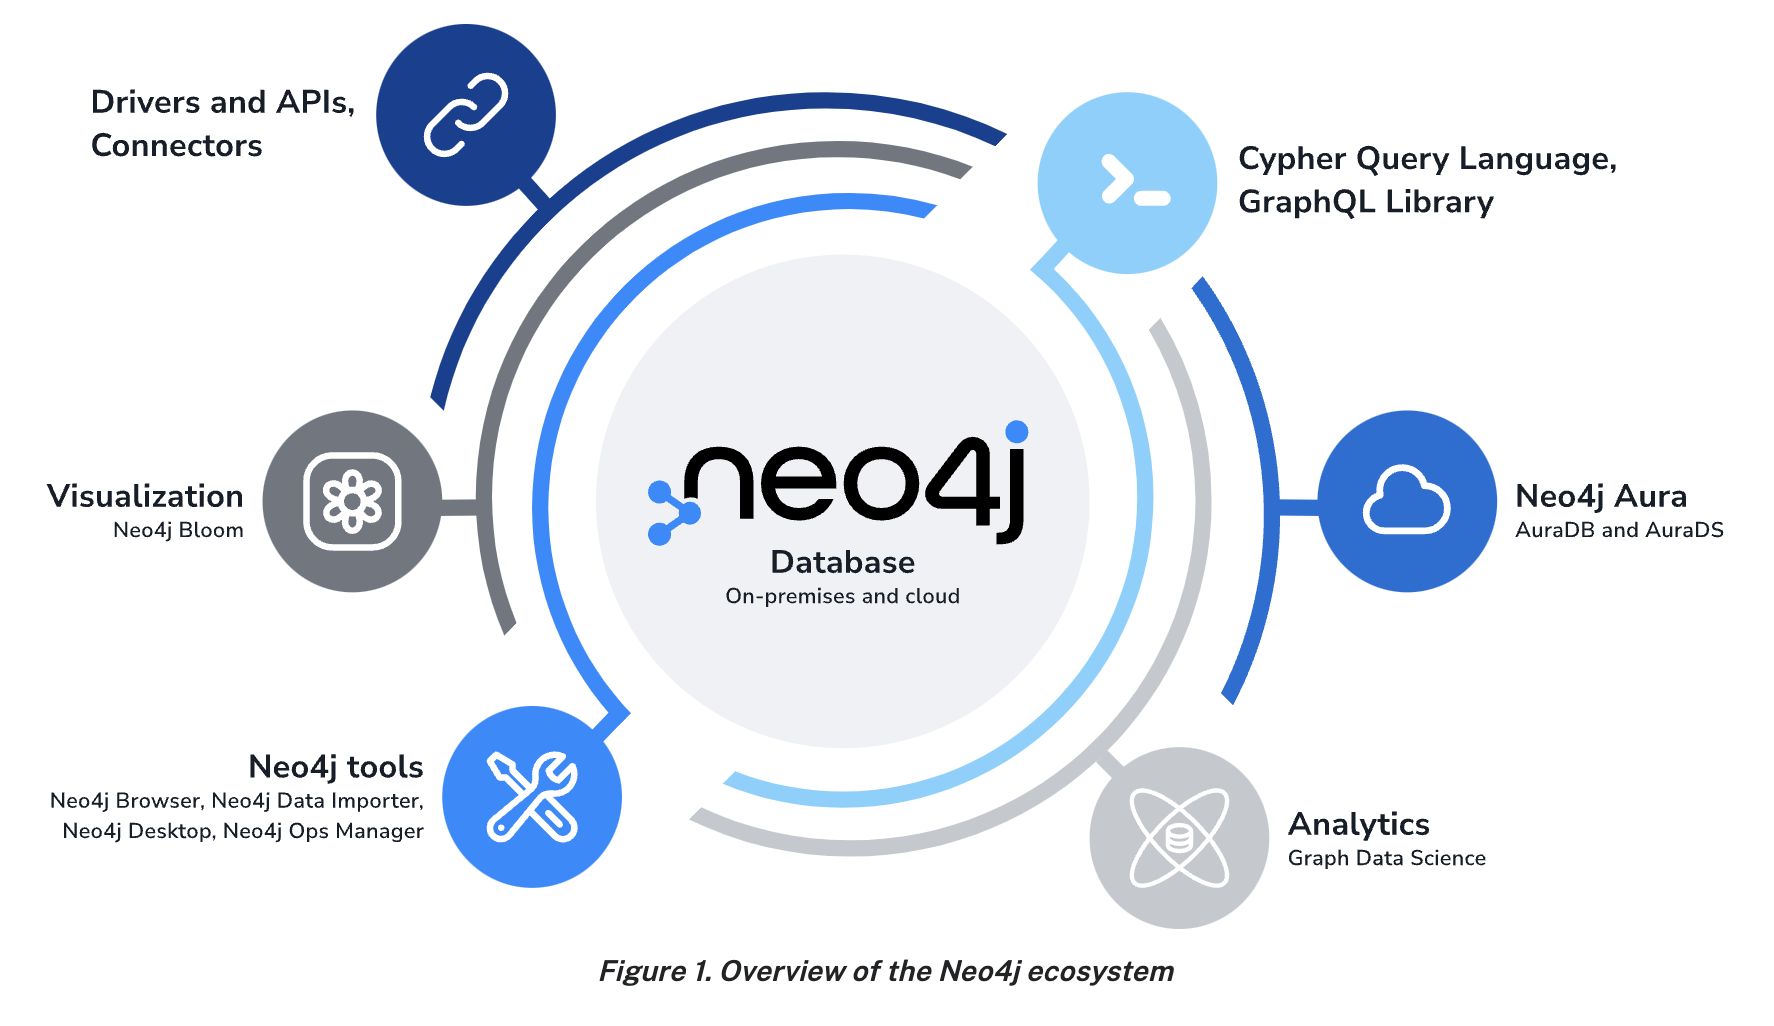

## **2. Estructura de una base de datos orientada a grafos en Neo4j**

Las **bases de datos orientadas a grafos de Neo4j**, almacenan la información en una estructura integrada por los siguientes elementos:

* **Nodos**: describen las entidades. Contienen:
    - **Etiquetas**: clasifican o definen el tipo de nodo (Usuario, Producto...).
    - **Propiedades** de los nodos: pares clave - valor, que describen los atributos de dicha entidad (Nombre, ID...).
* **Bordes, aristas o relaciones**: conexiones entre un nodo fuente y nodo objetivo.
    - Siempre tienen una **dirección**.
    - **Tipo**: clasifican o definen el tipo de relación (COMPRA, ES_VENDIDO_POR,...).
    - **Propiedades** de las relaciones: pares clave - valor, que describen los atributos de la relación (Fecha_compra, Nombre_vendedor...)..

Dado que las relaciones presentan propiedades, se trata de un modelo basado en un **grafo de propiedades**, con la estructura que se muestra a continuación.

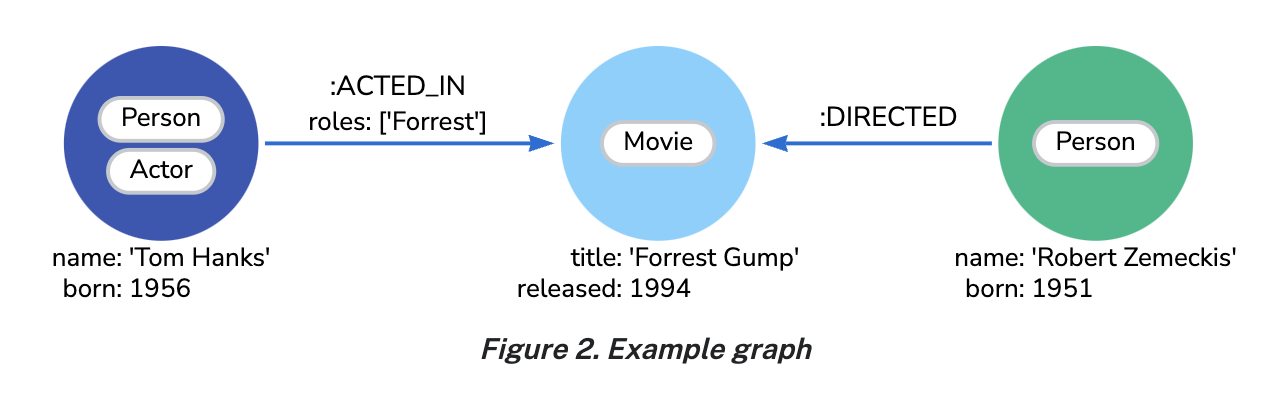" 

En este ejemplo, se observa un **nodo** de tipo <code>Actor</code> y <code>Persona</code> (*etiquetas*), que tiene una **relación** <code>ACTUA_EN</code> (*tipo*) con otro **nodo** <code>Pelicula</code>. Además, el primer **nodo** tiene los **atributos** (*propiedades*) <code>nombre</code> y <code>fecha_de_nacimiento</code>; y la **relación**, el **atributo** (*propiedad*) <code>papel</code>.

A su vez el segundo **nodo** de tipo <code>Pelicula</code> con los **atributos** <code>título</code> y <code>fecha_de_lanzamiento</code>, se relaciona mediante la **relación** <code>DIRIGIDA_POR</code> con otro **nodo** <code>Persona</code>, que tiene sus propios **atributos** <code>nombre</code> y <code>fecha_de_nacimiento.</code>

***NOTAR**: las etiquetas de los nodos suelen escribirse con la primera letra en mayúscula, los tipos de las relaciones con mayúsculas, y las propiedades tanto de nodos como de etiquetas, con minúsculas.*

Veamos este mismo ejemplo en modelo relacional.

**1. Tablas de Entidades**


* **Tabla: Actor_Persona**

| Columna              | Tipo de Dato      | Descripción                          |
|----------------------|-------------------|--------------------------------------|
| id_actor_persona     | INT (PK)          | Identificador único del Actor/Persona|
| nombre               | VARCHAR           | Nombre del Actor/Persona             |
| fecha_de_nacimiento  | DATE              | Fecha de nacimiento del Actor/Persona|


* **Tabla: Pelicula**
| Columna              | Tipo de Dato      | Descripción                          |
|----------------------|-------------------|--------------------------------------|
| id_pelicula          | INT (PK)          | Identificador único de la película   |
| titulo               | VARCHAR           | Título de la película                |
| fecha_de_lanzamiento | DATE              | Fecha de lanzamiento de la película  |


* **Tabla: Director_Persona**
| Columna              | Tipo de Dato      | Descripción                          |
|----------------------|-------------------|--------------------------------------|
| id_director_persona  | INT (PK)          | Identificador único del Director/Persona |
| nombre               | VARCHAR           | Nombre del Director/Persona          |
| fecha_de_nacimiento  | DATE              | Fecha de nacimiento del Director/Persona |



**2. Tablas de Relaciones**


* **Tabla: ACTUA_EN**
| Columna              | Tipo de Dato      | Descripción                          |
|----------------------|-------------------|--------------------------------------|
| id_actor_persona     | INT (FK)          | Identificador del Actor/Persona      |
| id_pelicula          | INT (FK)          | Identificador de la película         |
| papel                | VARCHAR           | Papel que interpreta el Actor/Persona|


* **Tabla: DIRIGIDA_POR**
| Columna              | Tipo de Dato      | Descripción                          |
|----------------------|-------------------|--------------------------------------|
| id_director_persona  | INT (FK)          | Identificador del Director/Persona   |
| id_pelicula          | INT (FK)          | Identificador de la película


Como se puede comprobar, la variante relacional es más compleja. Además, si quisieramos consultar el director de las peliculas en las que actuó Tom Hanks, en el modelo relacional tendriamos que hacer un JOIN de las tablas <code>Actor</code>, <code>ACTUA_EN</code>, <code>Pelicula</code>, <code>DIRIGIDA_POR</code>, y <code>Director</code>; mientras que el grafo, bastaría con recorrer el camino <code>Actor_Persona -> ACTUA_EN -> Pelicula <- DIRIGIDA_POR <- Director_Persona. </code>

A nivel de código, en **SQL** la consulta sería:

```
SELECT 
    d.nombre AS director

FROM Actor a JOIN ACTUA_EN Ac     ON a.id_actor = Ac.id_actor
             JOIN Pelicula p      ON Ac.id_pelicula = p.id_pelicula
             JOIN DIRIGIDA_POR Dp ON p.id_pelicula = Dp.id_pelicula
             JOIN Director d      ON Dp.id_director= d.id_director
WHERE 
    a.nombre == 'Tom Hanks';
```

Mientras que en **Cypher**:

```
MATCH (a:Persona {nombre: 'Tom Hanks'})-[:ACTUA_EN]->(p:Pelicula)-[:DIRIGIDA_POR]->(d:Persona)
RETURN d.nombre AS director
```


Se puede comprobar la diferencia en cuanto a la ***complejidad y eficencia*** de la consulta, el grafo no necesita realizar *JOINs*, pues se encuentran pre-almacenados en forma de **bordes** o **relaciones.**

## **3. Cypher Query Language**

***Cypher Query Language*** es el lenguaje de programación que se utiliza para el manejo de las bases de datos de Neo4j. Este lenguaje optimiza y facilita las consultas sobre bases de datos orientadas a objetos, haciéndolas más breves y entendibles, como se ha visto en el ejemplo anterior.

Veamos otro ejemplo, con la siguiente consulta SQL:

```
SELECT name FROM Person
LEFT JOIN Person_Department ON Person.Id = Person_Department.PersonId
LEFT JOIN Department ON Department.Id = Person_Department.DepartmentId
WHERE Department.name = "IT Department"
```
En Cypher sería:

```
MATCH (p:Person)<-[:EMPLOYEE]-(d:Department) WHERE d.name = "IT Department"
RETURN p.name
```

En el siguiente enlace se puede encontrar una lista de los comandos de Cypher: [CheetSheet](https://neo4j.com/docs/cypher-cheat-sheet/5/auradb-enterprise/)

Siguiendo con la estructura de las bases de datos de Neo4j y con el lenguaje **Cypher**, a continuación se analizan los elementos del grafo y la sintaxis para crear cada uno de ellos.

### **3.1. Estructura y creación de un nodo**

Comencemos con la estructura del **nodo**.

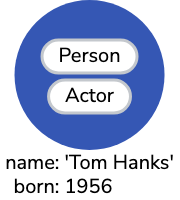

El **nodo** contiene:

*   **Etiquetas**: las **etiquetas** definen el dominio de los nodos, los clasifican en conjuntos. De esta forma, por ejemplo, se podrían etiquetar todos los nodos que representen a usuarios en una etiqueta Usuario, y posteriormente sería posible actuar sobre la información de los usuarios. Un nodo puede tener cero o muchas etiquetas. En el nodo ejemplo se han definido dos etiquetas:
      - Persona
      - Actor
*   **Propiedades:** pares clave-valor que sirven para almacenar información en los nodos y en las relaciones, sobre los mismos. En el ejemplo son:
      - name: Tom Hanks
      - born: 1956


El código para crear este nodo sería:

`CREATE (:Person:Actor {name: 'Tom Hanks', born: 1956})`

### **3.2. Estructura y creación de una relación**

Analicemos ahora la **relación** mostrada.

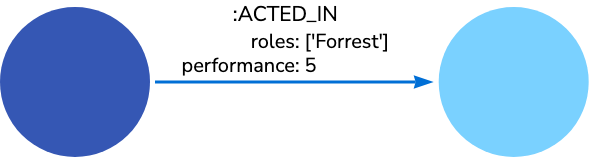

La **relación** conecta dos nodos, uno raíz y otro objetivo, si bien podría también conectar un nodo consigo mismo. En este caso, la relación tiene:

*   **Dirección:** tienen un solo sentido.
*   **Tipo:** solo puede tener uno, que clasifica el tipo de relación. En el ejemplo es <code>ACTED_IN.</code>
*   **Propiedades:** pares clave-valor que describen la relación.
 - <code>roles: ['Forrest']</code>
 - <code>performance: 5</code>


El código para crear esta relación sería:

`CREATE ()-[:ACTED_IN {roles: ['Forrest'], performance: 5}]->()`

### **3.3. Recorridos y caminos**

El **recorrido** es la forma en la que se deben realizar las consultas, por ejemlo:
 - ¿Qué artículos debo de sugerirle a un usuario, en base a lo que han comprado sus afines?
 - ¿Qué servicios web se ven afectados si se corta el suministro de energía?.

Hace referencia a todos los caminos que se siguen cuando se realiza una consulta. De todos ellos, algunos serán exitosos y darán respuesta a la consulta, a estos se les denomina **caminos**.

Por ejemplo, dada la siguiente base de datos, se consultan las películas en las que actuó Tom Hanks.

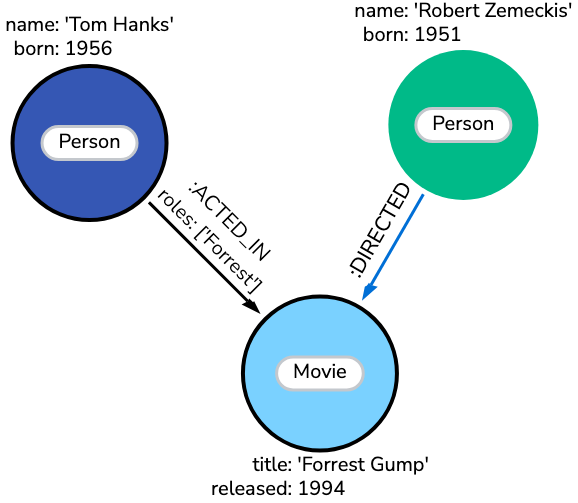

El **recorrido** sería el siguiente.

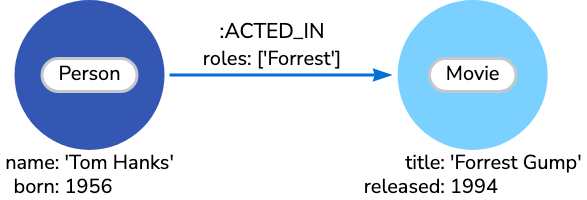

El **camino** final sería de un solo nodo, y por tanto de longitud 0.

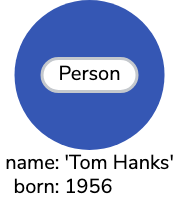

## **4. Conexión a una base de datos Neo4j**

### **4.1. Configuración de una base de datos en Neo4j.**

Para trabajar con una base de datos de Neo4j, primero será necesario alojar dicha base en la plataforma de Neo4j. Siga los siguientes pasos:

1.   **Cree una cuenta** en el plan gratuito de [Neo4j](https://login.neo4j.com/u/signup/identifier?state=hKFo2SBOM2ZwMUFzdF9KRTNmWF9CR0k4MHU0R0h1LXNkNHF2daFur3VuaXZlcnNhbC1sb2dpbqN0aWTZIFRPS295NVJRNG5KTjdpU3pWSGVfX1B6b3A5bkxzUTI0o2NpZNkgV1NMczYwNDdrT2pwVVNXODNnRFo0SnlZaElrNXpZVG8).

2.   Anote la **contraseña**.

   - **Usuario:** neo4j
   - **Email:** ****
   - **Contraseña:** ****

3.   Entre en la **instancia creada por defecto**, haciendo doble clic en la misma, y posteriormente, pulse el boton **Open** en la parte derecha de la pantalla, **acepte los términos**, anote los **datos de conexión**, y pulse en **Conect**.
   - **Protocolo**: neo4j+s://
   - **Conexión URI**: ****

4. Pulse en el icono del **birrete** en la parte superior derecha, seleccione la opción "**Data Exploration**" y a continuación vaya a **"Learn the Basics".**

5. Siga los pasos de la parte izquierda, **descargando** en el paso 4 el dataset <code>Northwind</code> mediante el botón que aparecerá a la izquierda <code>Get the Northwind dataset</code>, presionando posteriormente en el botón <code>Run import</code> de la parte superior derecha de la pantalla. Finalmente, presione en la pantalla que se abrirá automáticamente al acabar la importación, el botón **Explore results.**

6. **Finalice el tutorial**.

Como habrá podido comprobar, <code>Northwind</code> es un dataset que recoge la información de una tienda online. A continuación, podrá ver parte de la estructura del grafo.

<center>
<img src="data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAABR4AAAQMCAYAAADwNoVjAAAMQWlDQ1BJQ0MgUHJvZmlsZQAASImVVwdYU8kWnluSkEAIELqU0JsgIiWAlBBaAOlFsBGSAKHEGAgqdmRRwbWLBWzoqohiB8SCIoqFRbH3xYKCsi4W7MqbFNB1X/nefN/c+e8/Z/5z5tyZe+8AQDvJFYtzUA0AckX5ktiQAMbY5BQGqRsQgBbQAzRA4PLyxKzo6AgAy2D79/LuBkBk7VVHmdY/+/9r0eQL8ngAINEQp/HzeLkQHwIAr+SJJfkAEGW8xdR8sQzDCrQlMECIF8pwhgJXynCaAu+T28THsiFuAUBFjcuVZACgfhnyjAJeBtRQ74PYWcQXigCgMSD2zc2dzIc4FWJbaCOGWKbPTPtBJ+NvmmlDmlxuxhBWzEVeVAKFeeIc7vT/Mx3/u+TmSAd9WMOqlikJjZXNGebtVvbkcBlWg7hXlBYZBbEWxB+EfLk9xCglUxqaoLBHjXh5bJgzoAuxM58bGA6xEcTBopzICCWfli4M5kAMVwg6TZjPiYdYH+KFgrygOKXNZsnkWKUvtC5dwmYp+XNcidyvzNcDaXYCS6n/OlPAUepj6oWZ8UkQUyC2LBAmRkKsDrFTXnZcuNJmdGEmO3LQRiKNlcVvCXGsQBQSoNDHCtIlwbFK+9LcvMH5YpszhZxIJT6QnxkfqsgP1sLjyuOHc8EuC0SshEEdQd7YiMG58AWBQYq5Y90CUUKcUueDOD8gVjEWp4hzopX2uLkgJ0TGm0PsmlcQpxyLJ+bDBanQx9PF+dHxijjxwixuWLQiHnwZiABsEAgYQAprGpgMsoCwvbe+F94peoIBF0hABhAARyUzOCJJ3iOC1zhQCP6ESADyhsYFyHsFoADyX4dYxdURpMt7C+QjssFTiHNBOMiB91L5KNGQt0TwBDLCf3jnwsqD8ebAKuv/9/wg+51hQSZCyUgHPTJog5bEIGIgMZQYTLTDDXFf3BuPgFd/WF1wJu45OI/v9oSnhA7CI8J1Qifh9iRhkeSnKMeATqgfrMxF2o+5wK2hphsegPtAdaiM6+KGwBF3hX5YuB/07AZZtjJuWVYYP2n/bQY/PA2lHdmZjJL1yP5k259Hqturuw2pyHL9Y34UsaYN5Zs91POzf/YP2efDNvxnS2whdhBrxU5h57FjWD1gYE1YA9aGHZfhodX1RL66Br3FyuPJhjrCf/gbfLKyTOY51zj3OH9R9OULpsne0YA9WTxdIszIzGew4BdBwOCIeE7DGS7OLq4AyL4vitfXmxj5dwPRbfvOzf8DAJ+mgYGBo9+5sCYA9nvA7X/kO2fLhJ8OVQDOHeFJJQUKDpddCPAtQYM7zQCYAAtgC+fjAtyBN/AHQSAMRIF4kAwmwugz4TqXgKlgJpgHSkAZWAZWg/VgE9gKdoI94ACoB8fAKXAWXASXwXVwF66eLvAC9IF34DOCICSEitARA8QUsUIcEBeEifgiQUgEEoskI6lIBiJCpMhMZD5ShqxA1iNbkGpkP3IEOYWcRzqQ28hDpAd5jXxCMVQN1UaNUWt0BMpEWWg4Go9OQDPQKWghWowuQdeiVehutA49hV5Er6Od6Au0HwOYKqaLmWGOGBNjY1FYCpaOSbDZWClWjlVhtVgjfM5XsU6sF/uIE3E6zsAd4QoOxRNwHj4Fn40vxtfjO/E6vAW/ij/E+/BvBCrBiOBA8CJwCGMJGYSphBJCOWE74TDhDNxLXYR3RCJRl2hD9IB7MZmYRZxBXEzcQNxLPEnsID4m9pNIJAOSA8mHFEXikvJJJaR1pN2kJtIVUhfpg4qqiqmKi0qwSoqKSKVIpVxll8oJlSsqz1Q+kzXIVmQvchSZT55OXkreRm4kXyJ3kT9TNCk2FB9KPCWLMo+yllJLOUO5R3mjqqpqruqpGqMqVJ2rulZ1n+o51YeqH9W01OzV2Grj1aRqS9R2qJ1Uu632hkqlWlP9qSnUfOoSajX1NPUB9YM6Xd1JnaPOV5+jXqFep35F/SWNTLOisWgTaYW0ctpB2iVarwZZw1qDrcHVmK1RoXFE46ZGvyZdc6RmlGau5mLNXZrnNbu1SFrWWkFafK1ira1ap7Ue0zG6BZ1N59Hn07fRz9C7tInaNtoc7SztMu092u3afTpaOq46iTrTdCp0jut06mK61roc3RzdpboHdG/oftIz1mPpCfQW6dXqXdF7rz9M319foF+qv1f/uv4nA4ZBkEG2wXKDeoP7hrihvWGM4VTDjYZnDHuHaQ/zHsYbVjrswLA7RqiRvVGs0QyjrUZtRv3GJsYhxmLjdcanjXtNdE38TbJMVpmcMOkxpZv6mgpNV5k2mT5n6DBYjBzGWkYLo8/MyCzUTGq2xazd7LO5jXmCeZH5XvP7FhQLpkW6xSqLZos+S1PLMZYzLWss71iRrZhWmVZrrFqt3lvbWCdZL7Cut+620bfh2BTa1Njcs6Xa+tlOsa2yvWZHtGPaZdttsLtsj9q72WfaV9hfckAd3B2EDhscOoYThnsOFw2vGn7TUc2R5VjgWOP40EnXKcKpyKne6eUIyxEpI5aPaB3xzdnNOcd5m/PdkVojw0YWjWwc+drF3oXnUuFybRR1VPCoOaMaRr1ydXAVuG50veVGdxvjtsCt2e2ru4e7xL3WvcfD0iPVo9LjJlObGc1czDznSfAM8Jzjeczzo5e7V77XAa+/vB29s713eXePthktGL1t9GMfcx+uzxafTl+Gb6rvZt9OPzM/rl+V3yN/C3++/3b/Zyw7VhZrN+tlgHOAJOBwwHu2F3sW+2QgFhgSWBrYHqQVlBC0PuhBsHlwRnBNcF+IW8iMkJOhhNDw0OWhNznGHB6nmtMX5hE2K6wlXC08Lnx9+KMI+whJROMYdEzYmJVj7kVaRYoi66NAFCdqZdT9aJvoKdFHY4gx0TEVMU9jR8bOjG2No8dNitsV9y4+IH5p/N0E2wRpQnMiLXF8YnXi+6TApBVJnWNHjJ019mKyYbIwuSGFlJKYsj2lf1zQuNXjusa7jS8Zf2OCzYRpE85PNJyYM/H4JNok7qSDqYTUpNRdqV+4Udwqbn8aJ60yrY/H5q3hveD781fxewQ+ghWCZ+k+6SvSuzN8MlZm9GT6ZZZn9grZwvXCV1mhWZuy3mdHZe/IHshJytmbq5KbmntEpCXKFrVMNpk8bXKH2EFcIu6c4jVl9ZQ+Sbhkex6SNyGvIV8b/si3SW2lv0gfFvgWVBR8mJo49eA0zWmiaW3T7acvmv6sMLjwtxn4DN6M5plmM+fNfDiLNWvLbGR22uzmORZziud0zQ2Zu3MeZV72vN+LnItWFL2dnzS/sdi4eG7x419CfqkpUS+RlNxc4L1g00J8oXBh+6JRi9Yt+lbKL71Q5lxWXvZlMW/xhV9H/rr214El6Uval7ov3biMuEy07MZyv+U7V2iuKFzxeOWYlXWrGKtKV71dPWn1+XLX8k1rKGukazrXRqxtWGe5btm6L+sz11+vCKjYW2lUuajy/Qb+hisb/TfWbjLeVLbp02bh5ltbQrbUVVlXlW8lbi3Y+nRb4rbW35i/VW833F62/esO0Y7OnbE7W6o9qqt3Ge1aWoPWSGt6do/ffXlP4J6GWsfaLXt195btA/uk+57vT91/40D4geaDzIO1h6wOVR6mHy6tQ+qm1/XVZ9Z3NiQ3dBwJO9Lc6N14+KjT0R3HzI5VHNc5vvQE5UTxiYGmwqb+k+KTvacyTj1untR89/TY09daYlraz4SfOXc2+OzpVlZr0zmfc8fOe50/coF5of6i+8W6Nre2w7+7/X643b297pLHpYbLnpcbO0Z3nLjid+XU1cCrZ69xrl28Hnm940bCjVs3x9/svMW/1X075/arOwV3Pt+de49wr/S+xv3yB0YPqv6w+2Nvp3vn8YeBD9sexT26+5j3+MWTvCdfuoqfUp+WPzN9Vt3t0n2sJ7jn8vNxz7teiF987i35U/PPype2Lw/95f9XW9/Yvq5XklcDrxe/MXiz463r2+b+6P4H73LffX5f+sHgw86PzI+tn5I+Pfs89Qvpy9qvdl8bv4V/uzeQOzAg5kq48l8BDFY0PR2A1zsAoCYDQIfnM8o4xflPXhDFmVWOwH/CijOivLgDUAv/32N64d/NTQD2bYPHL6hPGw9ANBWAeE+Ajho1VAfPavJzpawQ4Tlgc+TXtNw08G+K4sz5Q9w/t0Cm6gp+bv8Fk8Z8TGm5RpgAAACKZVhJZk1NACoAAAAIAAQBGgAFAAAAAQAAAD4BGwAFAAAAAQAAAEYBKAADAAAAAQACAACHaQAEAAAAAQAAAE4AAAAAAAAAkAAAAAEAAACQAAAAAQADkoYABwAAABIAAAB4oAIABAAAAAEAAAUeoAMABAAAAAEAAAQMAAAAAEFTQ0lJAAAAU2NyZWVuc2hvdFDFt2cAAAAJcEhZcwAAFiUAABYlAUlSJPAAAAHYaVRYdFhNTDpjb20uYWRvYmUueG1wAAAAAAA8eDp4bXBtZXRhIHhtbG5zOng9ImFkb2JlOm5zOm1ldGEvIiB4OnhtcHRrPSJYTVAgQ29yZSA2LjAuMCI+CiAgIDxyZGY6UkRGIHhtbG5zOnJkZj0iaHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIyI+CiAgICAgIDxyZGY6RGVzY3JpcHRpb24gcmRmOmFib3V0PSIiCiAgICAgICAgICAgIHhtbG5zOmV4aWY9Imh0dHA6Ly9ucy5hZG9iZS5jb20vZXhpZi8xLjAvIj4KICAgICAgICAgPGV4aWY6UGl4ZWxZRGltZW5zaW9uPjEwMzY8L2V4aWY6UGl4ZWxZRGltZW5zaW9uPgogICAgICAgICA8ZXhpZjpQaXhlbFhEaW1lbnNpb24+MTMxMDwvZXhpZjpQaXhlbFhEaW1lbnNpb24+CiAgICAgICAgIDxleGlmOlVzZXJDb21tZW50PlNjcmVlbnNob3Q8L2V4aWY6VXNlckNvbW1lbnQ+CiAgICAgIDwvcmRmOkRlc2NyaXB0aW9uPgogICA8L3JkZjpSREY+CjwveDp4bXBtZXRhPgo0ht1DAAAAHGlET1QAAAACAAAAAAAAAgYAAAAoAAACBgAAAgYAAXL59CCteQAAQABJREFUeAHs3fV7XemV5v1lMTOTQWZmKoZUuNOBSicd6CTTMP1e1/wp886805DuSTrU6aSTdDippJjBLjPIlmSQbDGzZJHfdT+yKnaVXSXJkqwjfXdySpZ9zt7P/uzz032t9axl/YPD140DAQQQQAABBBBAAAEEEEAAAQQQQAABBBB4H4GkhNj3+df3/tMygsf3ovA3CCCAAAIIIIAAAggggAACCCCAAAIIIHCrAMHjrR78hgACCCCAAAIIIIAAAggggAACCCCAAAKzIEDwOAuInAIBBBBAAAEEEEAAAQQQQAABBBBAAAEEbhUgeLzVg98QQAABBBBAAAEEEEAAAQQQQAABBBBAYBYECB5nAZFTIIAAAggggAACCCCAAAIIIIAAAggggMCtAgSPt3rwGwIIIIAAAggggAACCCCAAAIIIIAAAgjMggDB4ywgcgoEEEAAAQQQQAABBBBAAAEEEEAAAQQQuFWA4PFWD35DAAEEEEAAAQQQQAABBBBAAAEEEEAAgVkQIHicBUROgQACCCCAAAIIIIAAAggggAACCCCAAAK3ChA83urBbwgggAACCCCAAAIIIIAAAggggAACCCAwCwIEj7OAyCkQQAABBBBAAAEEEEAAAQQQQAABBBBA4FYBgsdbPfgNAQQQQAABBBBAAAEEEEAAAQQQQAABBGZBgOBxFhA5BQIIIIAAAggggAACCCCAAAIIIIAAAgjcKkDweKsHvyGAAAIIIIAAAggggAACCCCAAAIIIIDALAgQPM4CIqdAAAEEEEAAAQQQQAABBBBAAAEEEEAAgVsFCB5v9eA3BBBAAAEEEEAAAQQQQAABBBBAAAEEEJgFAYLHWUDkFAgggAACCCCAAAIIIIAAAggggAACCCBwqwDB460e/IYAAggggAACCCCAAAIIIIAAAggggAACsyBA8DgLiJwCAQQQQAABBBBAAAEEEEAAAQQQQAABBG4VIHi81YPfEEAAAQQQQAABBBBAAAEEEEAAAQQQQGAWBAgeZwGRUyCAAAIIIIAAAggggAACCCCAAAIIIIDArQIEj7d68BsCCCCAAAIIIIAAAggggAACCCCAAAIIzIIAweMsIHIKBBBAAAEEEEAAAQQQQAABBBBAAAEEELhVgODxVg9+QwABBBBAAAEEEEAAAQQQQAABBBBAAIFZECB4nAVEToEAAggggAACCCAw9wLXr1+38fFxGxsb959jN37qz/66rp/XTe/Ry/9j+p/+/86xzGyZ/rfsT6+oqCiLilrmL/2MtujoKH9Fh98n3/fO5/kDAggggAACCCCAwLQECB6nxcWbEUAAAQQQQAABBO6FwGToODo6ZteuXfPXsA0PX7PhkREbCa9RGx0d9TDSA0kPJSdDSPNAUjmk540hcIxapoBxIlxUwBgbG3PjFWdxcf6KjbOEhHiLj4+7EUZG3Yvb5ZoIIIAAAggggMCiECB4XBSPkZtAAAEEEEAAAQQiVyBULHrV4vCwwkR/KUgcVqA4aiOjEz9H/eew/z7m4eJEQaMCxT9VOL7z58DwrkpHfcCrHN85wh9V+zgRRk5WNk78jJoIKL0KMjZGoWSsxfgrBJQ3fo+Ni/WQUq/48B4FmfosBwIIIIAAAggggMCtAgSPt3rwGwIIIIAAAggggMA8C6hSccQDx56+Puvp6bHe3j5/9Vt//43XwID/edAGhwa9gPG6VyQmWLxXJSZ4VeJEleJEMBjj1Ysx0XpNtEorEAyHMkFlkR5AToacI2OqkByzUYWbHnQOe9B5zdegasqhIb2GwnUSExMsOSnJkpP1SrYUf6Wm+Ss11dLT0iwxMTGs4Z1rzbMdl0MAAQQQQAABBBayAMHjQn46rA0BBBBAAAEEEFhEAgoYFeoNeqg3ODh448+Dds3/ToGfQkGFgxMp4U3bM6qyMThcD+3PqkKcqEb0kNGrENUyPfHyFuobezWqAjFKVYihEHEiedSpbw4f1ZKt/SLVnh1CSAWg71RZjoQrhrrId85x0+lu7BWp68d7EJqoIDT89D97GKl2bf1OJeQi+gJzKwgggAACCCAwbQGCx2mT8QEEEEAAAQQQQACBmQgMebjY2dFp7Xq1d4SfHZ2d1t/XH4LI1JRkS09Ps4yMdMvwn6oqTEtLsRT/e1UaqvJQLc63PW60OoeM8LZveO9fToaZtwygueltAx6O9g8MWp8qMH2NPb29XpHZa91d3dbV3WNdXT026qFlYlJiqH7Mysy07Owsf2VaVpa//HeCx5tA+SMCCCCAAAIILDkBgscl98i5YQQQQAABBBBAYG4FVFWoVmUFd30e2OkVwkX/O+3VqH/XkJdlYZr0stAaHSoHvXVaVYIJ8aoWnBjwolbqeA198Zf2WVRl43wdofoxtGF7C3Zow77Riv1OO7aG2wyHaklVTqoNfNzvTZWb0TE+uCYmNrRoKzRVeKpWbbVu6144EEAAAQQQQACBpSBA8LgUnjL3iAACCCCAAAIIzLGAwsQ/BW9jXhHYbZ2dXdba2jbxausIYaRaktPTUy0vJ8eyc7IsxysEM1Xh6K9I3CdRreNdXgHZ4ffa5lWcrW3tfr/tXik5YEM+eTs7K8Nyc7L9lWs5/lP3qRBSlZA3v+b48XB6BBBAAAEEEEDgnggQPN4Tdi6KAAIIIIAAAggsDoEQOHroqBZkBXDdPhxGLcmqeNRk6jivUpyYDO17IXqlX5Lvf6iqv6Qk7YvoeyH6n1XhGO/VjpHYlqy9IcNAGq+CHBzU3pUT+1eq2nNgYKLCU5WTYSK3t2WrojPpRmv2ZFv55F6QkXj/i+NbzF0ggAACCCCAwFwJEDzOlSznRQABBBBAAAEEFqFAGPPimyOqnVhDWSaGsYxam1f5tbS0WGt7u3X4Ho46FDoWFORZQV6e5eXlWGZmegge1Va92I8wRMfDxxZ3aW5ttaamFmvzqk/tKxnr+1TmZqsKMsfy8nMtzfeyDOGst2erlXyyEnKxG3F/CCCAAAIIILD4BQgeF/8z5g4RQAABBBBAAIFZE5gMHFXhODEgpsNbjDt9xvN1D82iQgVjklcxhn0Nk5NCdZ+mPOulqsYYD9YisaV6uoATk7JHJyogtd+lD6nRq6/f97zsHwh/r30jx8euh/0sJ4bS+GAaH0qjCsjJAHK61+X9CCCAAAIIIIDAQhIgeFxIT4O1IIAAAggggAACC1BA7dQKHEd80MpkJV/Y07CtLVTxtXd0+PTp1LCfYWFBvhXk54W9DNNSUxbg3dy7JWkATWdXV6gIbfAKyJaW1jDZWyvK8QrI8MrNttSUlDApW63pqoT0VNf/P5153ffuHrkyAggggAACCCBwswDB480a/BkBBBBAAAEEEEDgFoHJPRz7vUqvxVuGm5u9bbi52QfJjHs4lhBCMgVlCh7T0lIm9nD0ir04bycOodktZ1vav8hy+MZ07AHfC7J/oN/3xuwLe2L29vaZjPX3ar1WeJunV25OqH5cClWiS/vbwd0jgAACCCCwOAUIHhfnc+WuEEAAAQQQQACBuxK4fn3crvlwGA1OGfS9CtVarQnV7b5/Y2dnZ2ihLvD9CQsLCqyoMN+Sk5LC0Ji7uugS+/Co75GpYTSqgmxsbLJGr4Js8mA3zqscMzMzwxRsTcROumEbN1kBucScuF0EEEAAAQQQiFwBgsfIfXasHAEEEEAAAQQQmDMBtVW3tflgFG8Hbmho9Gq8ft+jMd6r8VIsy/chzMhIs3SvctSEZu1JqL0btS8hx9QFVAGpvSCHb7Sw9/X1WXd3r6mNXS+FkteuDVu+Vz4WFRZYjrdhZ3kgyYEAAggggAACCESKAMFjpDwp1okAAggggAACCMyxwOjoqOmlISi9HoIpeOzw/RtV7bjMtxjMyc7yECw3hGAKIBVE0gI8ew9FE8JVYdrq7g2NzcG/rb3DkpOTQyt7jk/B1hAahb2JCnt9Ojj+s+fPmRBAAAEEEEBg9gUIHmfflDMigAACCCCAAAIRKdA/MGDaa/Dq1Tpramr2VutrXskY4+3U2mtwotouOSXZEnw6dbT/fVSUjzxRIskxKwKTQ3yG1eLue0F2dXWHysem0ILdEoLeRA8dy0pLrMBb3NXerknhHAgggAACCCCAwEIVIHhcqE+GdSGAAAIIIIAAAvMkoApHhY6tPqW6va0jDD0Z8eArMTHR0tNTrdjbfFVpl5KcxMCYeXomusyA762pgTONXv3Y6EGwBs+o9TrJn0OqD6DR/o+ZmRkhgNT+jxwIIIAAAggggMBCEyB4XGhPhPUggAACCCCAAALzLNDY1GR19Q12+XJtCLnKykq8qq7YSop8X8GcrBA2qq03OiqKCsd5fDbjPjlcL+0BqSrIet9rs66+0Wqv1Fm3t7+vXLHcli8vtZLiIt9vM20eV8alEEAAAQQQQACBqQkQPE7NiXchgAACCCCAAAKLRkBhloaaqK26yycqax/Bdn9poMx1G7fSkmIrLir0PR0zLTUlZdHcdyTfiNqwNVFc+z9erWvwCePtHgjHhInXOV75qKEzGRnpYdCPhvzQAh/JT5u1I4AAAgggsHgECB4Xz7PkThBAAAEEEEAAgSkJjPgAGQ0xqb1y1aqrL4T23XEPItesXmWrVi73Nt7k0L6rwSUML5kS6by8aWxs3EbHRkNgrBCy+sIla2lps+iYaG+Fz7Y1a8rDAKD4OIb+zMsD4SIIIIAAAggg8IECBI8fSMQbEEAAAQQQQACBxSGgisZB3yeww0OrppYW6/fJ1YO+j2Ca7xeYkZFmBfl5lpubY3FxsRbrrdUcC09AlY9qu9b+jxo6o305u7p7bGR0zCddJ4Y9H/P9OWrqeIJPviY4XnjPkBUhgAACCCCwlAQIHpfS0+ZeEUAAAQQQQGBJC2hQSXtHh128VGPnzp0P4VRJcbGtLl8RXhPtuZpUvaSZIuLmFUDqf709fXbhYo1drrliV32fzhSfOr5xw3orKiz0KshM096cHAgggAACCCCAwL0SIHi8V/JcFwEEEEAAAQQQmCcBTULu6emx5pbWMETm2tCQRUdHWZ5XNxb7AJnsrCzLysqYp9VwmdkU0LPt6Oz0luv2MHymt6/f9+8c92eaacUlRWHvxzSfTB61LGo2L8u5EEAAAQQQQACBKQkQPE6JiTchgAACCCCAAAKRJxCq4rwyrqe31+p8IElt7VW7VFMT9gHcunmjT0MusLy83DCtOvLujhXfLNA/MODBcptXP162U2fOedt1Qph6XVZaEoYFxfggGgbO3CzGnxFAAAEEEEBgPgQIHudDmWsggAACCCCAAAL3QEADZNp8CnKLVzo2NjXbqA+VSUlJsnwPGzW1Oj0t1aciJxJI3YNnM9uXHBkZ9X0fB3zPxw6vam20zs5u6+vvDxWPhQX5psnXenEggAACCCCAAALzKUDwOJ/aXAsBBBBAAAEEEJgHAVU6KmTs6en1vf9qQ+jY093te/5l2ZZNG7zKMcdSkpNDu/U8LIdLzKOAWq8VOF68VGtnzp7z4TLRlp6eZsuXl3kFZJlPwI6xmOjoeVwRl0IAAQQQQACBpSxA8LiUnz73jgACCCCAAAKLUmB4eDhMPG5qbvGKxzYzDyLz83O90jEn7OuYlJRksbTeLspnPzY2Zqp+7OrqtpbWtrCvZ1Nza5h2nZOTY6p+1ORyDgQQQAABBBBAYD4ECB7nQ5lrIIAAAggggAAC8yCgSkeFjr29fXbJJ1c3t7TY+LgGjWTYpo3rLddbbWNior0KjkEj8/A47uklJgNITTA/e67SvwfXQ/XjqlUrbHlZicXFxXn4HHtP18jFEUAAAQQQQGDxCxA8Lv5nzB0igAACCCCAwBIRUHt1ve/v19jYFCYdK4hcuaI0VLllZqRbQkJ82M+RISOL/wuhZ6/QWSF0p1c/1l6p99dVr3zMDC33xcVFofp18UtwhwgggAACCCBwLwUIHu+lPtdGAAEEEEAAAQRmSWBwaMj6+/rt0uVab7Nu9mq2aMvKyLCNG9aGPR0JG2cJOsJO4/mjH9etqvqSnausDm3Y+qtVK1dYSUmRh9EJFkflo5A4EEAAAQQQQGAOBAge5wCVUyKAAAIIIIAAAvMpoOq2q3X1Vl/X4NVtXWGwzJrVq6zMg6XUtBRLiI+fz+VwrQUo0OuhtIYNKYC8crUuVD5qynVpSXGogFyAS2ZJCCCAAAIIILAIBAgeF8FD5BYQQAABBBBAYOkKDA4O2sDAoNXUXLG6+gZL9HZqTTFet7bcigrzly4Md/4eAQXUlVUXfeJ1jQ1eu2ZRy6JsxYrloRU/KSmRPR/fI8ZfIIAAAggggMDdChA83q0gn0cAAQQQQAABBO6hQENDo9V5pWNbe7v19fV5a/U6W71quSUnJ1k8lY738MkszEv39w9Yd3ePD5yp8qC60VT1mJ+fF9quM9LTF+aiWRUCCCCAAAIIRKwAwWPEPjoWjgACCCCAAAJLWWDIK9YGvdJRA0NqamrD4JjU5GRb65WOZaXFYYjMUvbh3m8voD0fR0ZGrLL6otXWXrXBoWthwvVKr3zMy8s1VT7GxMTc/sP8LQIIIIAAAgggME0BgsdpgvF2BBBAAAEEEEBgIQi0tXWEITJX6+q8cq3etm3eGKodU1KTLSkxcSEskTUsUAFNu+7zPR9b29rt1OkK/9lhpaUlVlxUZIXenq9qWQ4EEEAAAQQQQGA2BAgeZ0ORcyCAAAIIIIAAAvMkoGq1Ia9S04CQi5cue2WjhanE69eutvJVKyw6OtpfUfO0Gi4TiQKqehwbG7O+/n47X3kh7A06MjLmg4hSbXX5SsvJzg4DiaL4HkXi42XNCCCAAAIILCgBgscF9ThYDAIIIIAAAggg8P4Cvb6PY2dHl52vqrYzZyq8ynGt7dy+xTIy0i3dgyOzZSGMfP+z8K9LXUCDZkZHx3wKencIHo8eP2XXrg3bFq+cLfPqx8zMjNCCvdSduH8EEEAAAQQQuDsBgse78+PTCCCAAAIIIIDAvAioPVZVag2NTXbJpxIrgBwevmZr15TbxvVrfZBMnMXHxc3LWrjI4hDQd0phY1t7h1WcrzK178f5d0h7PZZ75WNaamqooF2msloOBBBAAAEEEEBgBgIEjzNA4yMIIIAAAggggMB8C4yOjpoGylRWXbAjR45ZXm62rV+3xooKC6wgP9eXQ6XjfD+TxXA9tV0PDQ1ZY1OL1fiwmXMeQKakptjePbtCAKkwOyqK1v3F8Ky5BwQQQAABBO6FAMHjvVDnmggggAACCCCAwDQFum60xLa2tlq7V6iVFBd58Lja0ry9OoVhINPU5O03CyjU7usfCOHj+crqUAWZnZNthQX54XumKkgOBBBAAAEEEEBgJgIEjzNR4zMIIIAAAggggMA8CWgvPr3q6xvs5OkzNu7t1pkZGbZieakPApkYJjNPS+Eyi1xA4faFizUeQDZbh/9Z1bTbtm4JU65pt17kD5/bQwABBBBAYI4ECB7nCJbTIoAAAggggAACsyEw6G2wHR2d1uh7O165ctVDx3Rbs9onD3tFWkZGmkUtow12Npw5h7dceyt/V1dPGDZTfeGSJSQkWllZqeX6dy0rK5OWa74kCCCAAAIIIDBtAYLHaZPxAQQQQAABBBBAYO4FJisdO7u67NLlGh/80W6DA4Ne6VjiU6y3WlJS4twvgissSYE6r6495lOu+weH/HuWZKUlxbZq5QqLjY31iekMmlmSXwpuGgEEEEAAgRkKEDzOEI6PIYAAAggggAACcymgCdYa+qEp1idPnfFLXQ/t1WUlRVZcVBhCoLm8PudeugLd3T1W39BotVfr7bIPnCktKbGtWzZZakqyV0EmLF0Y7hwBBBBAAAEEpi1A8DhtMj6AAAIIIIAAAgjMvcC1a8PeYt3h4U+dnT1bYRnpaXZw/x4rKMizRA9/mDQ8989gqV5hZGTEBr3ascInXL/x1hHLzc2xTRvXh5/ZWVlLlYX7RgABBBBAAIEZCBA8zgCNjyCAAAIIIIAAAnMt0NPTa1XVF6y1rc0Hyoxbfn6ubVy/JgSQ0dHRtLzO9QNYwucfHx83VdxeqWuwinNVYe9HBd3lq1ba2jWrl7AMt44AAggggAAC0xUgeJyuGO9HAAEEEEAAAQTmUEChjyrO2trb7cyZChsYHLSy0hJvry6wooJ8b3WNn8Orc2oE/iTQ6ZOtGxqb7WpdvV3xtuvVq8tty6aNFhcXS6v/n5j4EwIIIIAAAgi8jwDB4/vg8E8IIIAAAggggMB8C4TQ0QfJNDU1W61PsVbIs33rZiv0FmvtrxcdzRTr+X4mS/V6w8MjYZ/RyuqLduLUWcvLy7XlpWU+UT0rTLleqi7cNwIIIIAAAghMXYDgcepWvBMBBBBAAAEEEJhTAU2yVoXjxYuXrNErzUa98jE7O9O2bdnoP9lbb07xOfkdBS5cvGynzpwz/3paTEyMrS5fZStWlIX3M+X6jmz8AwIIIIAAAgi4AMEjXwMEEEAAAQQQQGCBCKjNWhOFjxw9bi2trVa+crm3WRdbYWG+JSclLZBVsoylJtDW3hGC8Es1V+zipVrbu3unbdu22QccLfO9RqnAXWrfB+4XAQQQQACB6QgQPE5Hi/cigAACCCCAAAJzJKDQsbevz9q8zbqi4rxPFR607R7uLC8rsZTkJPbUmyN3TvvBAppw3dfXb6fPnrPjJ8/4hOsNtn7dGktJSbGkpMQPPgHvQAABBBBAAIElK0DwuGQfPTeOAAIIIIAAAgtJYHR01Ad41FlDQ6P19PRYfHyct1hvsqLCgrCvIy2tC+lpLa21TEy5HreK85V28lSFpaenWUZGRhh6lJ+ft7QwuFsEEEAAAQQQmJYAweO0uHgzAggggAACCCAw+wIKdgaHhsIU6zqfIJydlWkF+bm20vfRy8zMmP0LckYEZiBwxb+bNd5u3d7R5RWQA7Z58wYrL19p0VFRtFzPwJOPIIAAAgggsBQECB6XwlPmHhFAAAEEEEBgQQtoknVvb5+9/uYhu+pVj/v27LT1a1dbWlqKVz7GL+i1s7ilI6B2657eXnvr8DGvfqyy+w7ss20+cT02NtarcqOXDgR3igACCCCAAAJTFiB4nDIVb0QAAQQQQAABBGZfQJOsOzo6rbW1zS74NOvevl7bu2uHTw5eaXFxBDqzL84ZZyqggHx4eMQOHTluZ30f0jDdenmZZWVlWWpqykxPy+cQQAABBBBAYBELEDwu4ofLrSGAAAIIIIDAwhdQ8HjpUk3Y33F4+FrY23HLpvVWUlzk7avLFv4NsMIlI3Bdd+rfVw2Zqay66JWOcWHATPmqFcZej0vma8CNIoAAAgggMC0BgsdpcfFmBBBAAAEEEEBg9gQUOo6NjduJk6esqvqCFRcVhJdCxyz2dpw9aM40qwJ19Q1WV99o9Q1NNjAwZNu3b/H9SJeHoJywfFapORkCCCCAAAIRL0DwGPGPkBtAAAEEEEAAgUgVUOio9tVXX3/TznoV2YH9u2zr5o2WkpzE3o6R+lCXwLr7+wess6vH3njrbau9ctXuv++AbdywPkxfj/JBMxwIIIAAAggggMCkAMHjpAQ/EUAAAQQQQACBeRbo6uoO+ztqb8fmlhbbs2u7bVi/xuIY1jHPT4LLTUdAYXn/wKC9ffSEXbpcG/Z6LCst8QnsmZaUlDidU/FeBBBAAAEEEFjkAgSPi/wBc3sIIIAAAgggsHAFNMG6tvaqDQwO2Pj4uG3bstG0Xx4HAgtdQOHjydMVdtGDx+TEpBA6Ll9e6oNmMhf60lkfAggggAACCMyjAMHjPGJzKQQQQAABBBBA4GaBinOVPh34nGV7WJObk2XLy0qtID/35rfwZwQWpMDo2Fhos75a12DtHV0WFRUdtgkoLCxYkOtlUQgggAACCCBwbwQIHu+NO1dFAAEEEEAAgSUsoOpGvY6dOGXHjp+0zRvX2fq1q71qLN1SU1KWsAy3HikC+v52+lYBzS2tdqai0vp838c9u3aaqh6jfZ9HhsxEypNknQgggAACCMytAMHj3PpydgQQQAABBBBA4D0Cg4ODpgEdZyvOW8W587Zvz07bvm2TxcfFW2xszHvez18gsNAENJH92vCwdXZ22aG3j1tLa5tt2bLJlpeWWrIPR4r1fUo5EEAAAQQQQAABgke+AwgggAACCCCAwDwLKKxpbWuzKz4RuK6+wQ7s22U7tm2Z51VwOQTuXqC3r8/eOnTUrtY3hq0CiooKLTc3x5ISGTJz97qcAQEEEEAAgcgXIHiM/GfIHSCAAAIIIIBAhAnUe9h46XKNDXvF2Ljvlbdxwzpbs3plhN0Fy0XAfDDSoFVUVFldQ6PFxsSGITMrVy639PQ0eBBAAAEEEEAAASN45EuAAAIIIIAAAgjMs0B19UU7dfqsZWakWV5ejpWWFFlhQf48r4LLIXD3Amq3rvMBM/UNTd5u3W4JCQmh5To3J/vuT84ZEEAAAQQQQCDiBQgeI/4RcgMIIIAAAgggEGkCJ0+dsTfePGzr1pbb1i0bLCM93dJSGSoTac+R9ZppunW3D5mpb2y2k6cqAsmB/XutqIjp1nw/EEAAAQQQQMCoeORLgAACCCCAAAIIzJfA6Oiot1eP2OkzZ+3w4WO2Y/tm2+/7OybEx1lcXNx8LYPrIDBrAppurarHpqYWe+OtIzY0dM327tllxcVF/p2OtSifcM2BAAIIIIAAAktXgIrHpfvsuXMEEEAAAQQQmGcBTbLu7um2CxcuWeX5atu1c6sd2L/blnk4E7Vs2TyvhsshcPcCPtzarl8f92FJ7V7F+7Z1dffa+vVrvOKxyCt505hufffEnAEBBBBAAIGIFiB4jOjHx+IRQAABBBBAIJIEOjo6rbGp2VpaWq3Np1pv3bzBqx6ZZh1Jz5C13l6g09utjx47ae3tnZbjU63z8/OssLDAEn3PRw4EEEAAAQQQWLoCBI9L99lz5wgggAACCCAwzwKNjU124eJlGxkZDhWOq8tX2to1q+Z5FVwOgdkX6O3ts8qqi9bc0mbjXgaZnZ1lq8tXWUpK8uxfjDMigAACCCCAQMQIEDxGzKNioQgggAACCCAQ6QI1NVfslO/vmJSYaPm52b4PXqGV+IsDgUgXGBgctLr6RmvwITMtLe2W7m3WW7ZsDIOTIv3eWD8CCCCAAAIIzFyA4HHmdnwSAQQQQAABBBCYlkBlVbUdOnzUCgrybNP6tZaTnWmZmRnTOgdvRmAhCmhoUkdXl12ta7CKc1WWlJxk+/futuysrIW4XNaEAAIIIIAAAvMkQPA4T9BcBgEEEEAAAQSWroAm/46Njdm585U+gOOwt6CutAM+zVptqOyBt3S/F4vpzvX9HvSJ1leu1tubh46EKe0H9++1XN/vMTo62pYxPGkxPW7uBQEEEEAAgSkLEDxOmYo3IoAAAggggAACMxMYHR214eFhO3v2nL3uweM2b0F94vGHmPg7M04+tYAFaq/U2TPPvRSCxoMH91uBD5mJj4/z36MW8KpZGgIIIIAAAgjMlQDB41zJcl4EEEAAAQQQQOCGwODQoPX09NilS7V27tx527hhnT1w/36LjYnBCIFFJVDv+zy++vpbNjI6Fr7n+QX5lp6WFqoeF9WNcjMIIIAAAgggMCUBgscpMfEmBBBAAAEEEEBg5gK9vb0+7bfFmpqaTZOt164ptz27tlsMwePMUfnkghRoam61I0dPmIbNFBYWWr5XPObn5VLduyCfFotCAAEEEEBg7gUIHufemCsggAACCCCAwBIX6Ojo9L3v6qy7u9sGPZApX7ncNm9aTxXYEv9eLMbbb2vvsDNnz1t3T68lanq7B49lpSXebh2/GG+Xe0IAAQQQQACBDxAgePwAIP4ZAQQQQAABBBC4W4GWllarvnDRhq8N+9CNWFteVmzlq1Z68Hj3+95pqIf2kLzme0hqsrB+1+v69evhFRUVZXppwIdeqrKMi40N69DfcyAwmwJdXd124WKNtXV0hO9jXl6erfEKX4YozaYy50IAAQQQQCByBAgeI+dZsVIEEEAAAQQQiFCBhoZGO1NxzqJ8sm9OTpYVFxVaaXFhCATv9pY6PehRRWXtlasTVZW+l6Rau4d8wvCYT9NOSEiw5KQk32cv1TIzMiwrKzNcv6ys1BLC0I9ld7sEPo/AOwK9ff1WV9dgTc0t1urVj3m5uV7du8GS/DvIgQACCCCAAAJLT4Dgcek9c+4YAQQQQAABBOZZQG3Wx46ftKTEBFu1sizseZebk31XwaNatvv6B6ym5opdqqm1quoLdvFSTWjn7u3rs+GRkVDxqOAxKSnR0lJSLCsz03Jzc0K15cb16/zP2ZaRkR4qIOdyv0lVX46NjYdKzNGx0TDxWIN1VIG5zKsuiT7n+Qs5h5cbHByylrZ2q6tvsEuXa0PwuGPHNktJTp7Dq3JqBBBAAAEEEFioAgSPC/XJsC4EEEAAAQQQWDQCly7X2KFDR0LIt23rRsvNzrI0r0Bc5hWQMz0UMlacq7S3jx63I8eOe5Vjvw0MDIQhHnFeyZiSnOSBYpyNeNA37G3YgwODNj5+3Vuto0PwqYrHXdu32b69Oy072wPI9LSZLuUDP6fW736/fp9Xw6kaU4FjZmZGqMRU6zkt3x9IGDFvUMt/j+/vWFNbZydPn7XcnBzbv2+PpaamRMw9sFAEEEAAAQQQmD0BgsfZs+RMCCCAAAIIIIDAewRU7Vd94ZK99tobPmgj1+47sNdDt3Rvc46fUfA4ODQUAry3jxy3l1993c56+FhZVe0BT7blKED0CsZ0DxH1io+Lt2vX/P1eGanBNl3dPf6zx/eEHPOwb5kd8EDoIx961KswV1hpafF71j5bf6G2b7Xe1nvLuSo04xPibcP6tVbgg0fS09JCGDpb1+I891Zg1EPma/68L1y8bK+9+bZvLZBtD95/8K6D9nt7V1wdAQQQQAABBGYqQPA4Uzk+hwACCCCAAAIIfICAQsdx32dRweCLL73m032L7EOPPRRCwegZDnZpaGzytuqL9tLLr9nTz75g171oMiE+wR564KAHibtD8JjqbdVqnY7y4TXjN1qcR7z1utmH3KhS8vTZCjt+8rRtWLfWHnnoPtu+dYtt2bzxA+5m5v+sCcdnzp4L7eavv3kohFCf+NhHwmTv4sJCn3gcN/OT88kFJTD5nT9fdcGefe5lr6bNskcefjB8L6lsXVCPisUggAACCCAwLwIEj/PCzEUQQAABBBBAYCkKKPQbGR3x4PGCvfb6m7Zieal9+PGHZ9R2qnbpAW9XPnWmwl574y07eeqMD6w5b+vXrfHgcLPt37vbdm7fakneYn27CcIKhDo7u6zW95tUCHjU95xUxeEWH/yxds1qW7N61Zw9Il1XLeGvvXHInnnuxVDx+aUvPGm7d+2wFRpy4xWQHItLoLLqoj3tzzrDBxo9cN+BsL9oTGzMjKp8F5cMd4MAAggggMDSEiB4XFrPm7tFAAEEEEAAgXkUGBkZDXsrXrp82fdhPOEhW4k9+vD9lpIy/UEbXT69us5blV986VX7xa9/b4NDg2Fi9Z99/CP2mU99IlQRah89VVLeqbJsdHTUW6+vmSZht/nEYbV7Z6Snh/XMZE1TpSR4nKrU4nmfWq1f8Krc5OQU271zu09TzwpDju5mX9PFo8OdIIAAAgggsHQECB6XzrPmThFAAAEEEEBgngWuXRsOw1Rqa6/6XoznbXlZsT14334PY5KmvZLaK3VhiMxLL79uzz7/ohUWFdqO7Vvsicce8fbthy3KB9VMNdRRIHpt+FoIKGOiJ6ZLR3tb9ruPibbZ66Y2bVVc6jOaTq3rxMbGhhbpOP+ptu6br+3Fld5iPmba709hZ7uHnMdOnLa3Dr1tL3hwqn0on/zsp0KFZllpiZ9nouJRQ2di9PIBOPrz7Q61rg8Paz3XTHtHaiq2WrXj4uJ8T8u4W9Zxu8/f7u8mAtnhMAl8xM8dnxDnE8iTfA0TIa6uGa7rDrr/MJE7rNH/fdl73W6+xsRnr9vA4EBYr6xivfJPoW9MTKyv9+Z33/7Pstc9y1ihsj4/OYVc+3UO+b6fGuqi+9CwHrXa69np7/RT341YHzSkf5vKoTVrIJDOrSnkehZ6zrr2nULtd59Xk9Zffe1Q2M9z04YNvtdjllf6pk758+8+H78jgAACCCCAQGQKEDxG5nNj1QgggAACCCAQAQIaBKNqv/r6Bt9b8bIt9wEu+/ftCtOcp7t8tVb/6rdP2eG3j4Vp1vcd3Gef++yf2cb162xNefmUAqzJayqM0kvHRGCo0HLyX//0U+9R6Njb1+dDaXq9UrLLKyaHQ3ikCsksn0ytKsvk5OQQbk1+Up9T6KVgUO3hLa2tdtpbxI961eer3iaugTKq1NS+ksXFRSEw1GfVcq028YREf90IIyfPOflzWOvxydiqAG3v6AwBXKa384aBOj4pXMHYzSHo5Ofe76fWqPP1+Hl7evssOyvD29DzQ1CngFWB3rCHtbqu7j8pKdESExND4Kmg9P0OfVZBb1Nzs7X5epP8c6nulZWVGQLoqaxVe2RqKFAIZj24TE1NDueR85BXsLa2toXBQYODQ5bmz2O5t/QrPNTzuu6TzBWgpqakhqrY91vr5L9pvQoz9f3VOfVcUrxyUcGlQs+pHArK3/RJ7tEebK9atcLycnO8xT6T4HEqeLwHAQQQQACBRSRA8LiIHia3ggACCCCAAAILS2BgYMBa29qssanZGuobrbSkyPbs3h5Co6muVOGSXm+8ddj+7Xv/ESonuzq77RMf/7D9t699yQoLCkIAONXzvd/7xq97pZtXubV4kKVBNJpE3ebrV/DV19dv/T4dW0GawrIEDwgVPhYV5IeJ2Kpc1EuHquU0BOdqXYNP9L5oly7XuoF+rw9/Vri4aeN6KywsCIGhqi51yGfViuVW5i3pJR5I6tD1FDDKsd4NtbYun9Ct9QwODoaKQ60l08NCTfZeuaIsTOnWwJ07Da1RWNfh59T91fmaWtvaPXjs8ZB0IIRtuq9Mb0HPy8sNr0yv0FRF5QkPfxUgrlm9Olyn2Nev4PXmQ/c+4mu+erUuDPJRoNnd0xPa2xXgxnnlYaIHq2pxV/iYl5djhb7XZpEP2blTJezhI8e8WvRo+Pc0D1d1j1rTxcs1vv6GcC8KerXGtavL7X6vqu3y0FH7eOo+Fazu3LHN9u3ZdUu15M3rvvnPTf591f6h9Q1N1tHZaevWrPbP7gzPe7I69eb33+7PevaHffK6R9shXM53S024vlMl6+3Owd8hgAACCCCAQOQLEDxG/jPkDhBAAAEEEEBggQooHGtqbrKWljYP8NpDsLbT26MVPE31UOioMOvZF16y//m//jkMh1EF2l/+xWftf/z934RhMmqlnY1D11GV2wmfeK3W6CM+EOZ8VbX1ePCo6kVPQG2iTtK8cm2i7Xf92jUeam21hx+83/evfCCEkqqSPO6ff9sDs2effykEdgo1w4Rtr8TTclUJp3NMVlxq/Xt37/RW9ANeFbrbB89sD7ekyruK81VhmI6qJSvOVYbqRF1D7cbyGfUKPYV4RUUFoe38Ex99IvyuysrbHQoDdU7tu/nSK69ZjbcFq9JRIaduMLQUe5WgqkkVkG7csD6Emv/5s1+EwTxPPP5IGJiyY9tmK/Dg9eZDe2j2e4D5ou9v+Nvf/9FU+Vfve3Mq0JWv53AhfEtOSvbgNd+2b9sS7vu+A3vDsJ+bzzX5529/99/tm9/6XlhDkX9Gg4TyvSLz9394OgztUSCs0LHY2+8ffvA++/IXP2+Xa2rsRz/5eRhspBD4K3/5efvvf/P1UG37Qd8/Baw//fmv3PxsCIs/6Z7//W+/bjnZ2VP+7uqej504E+45JyfHFDzKiuBx8qnyEwEEEEAAgaUhQPC4NJ4zd4kAAggggAAC90Cg18MsBTDt7e3eKtttJV7Rt23LxttOnb7T8hSGKQx89rmX7H//w79Yi1f+ZWdn2ed9j8S//cZfTTkIutP5b/57BWN9/f32u6eesVd9CreCU/2dquxSvD1YgZXnfCGEbPN7avRAS1GkQq/HH3nIPv6RJ8Jefmp7vuKB2+WaK3b2fKVduHgptAOrku6qt51rL8Y1XpmX6+23YSDOjXZlVTuqYm/VKq969OrJDrWpu98rr75uJ71Ve9jbnBU2qrJRn1NFo9qCtebW1vZQjahKSU3oPrB/bwj0bt77Uu9VtaTa3hUMqqqvySsxVcVXXFTkVYhp3kad5PesITwj3sY8FPZWzPZQUy3XmiauStCPPvGYPeRBq6aIKwjUMbkvYvWFSx64nQzB64lTp72tPD08rzTf3zDF9/bUnomDHuIqiJbvMg9fl/u9PvTAfR5wrgvfkXdPJf8XDx3/8ZvfDs9BtkVeaanzNTQ2+t6Rg94anhVamYuLC22Dh6V7d+0IAfXzL7zs7c5vh8rDj3/kQ/b5z/25V4NO2N783Cf/PLlfpKprv/uDH4WqVVWTfuzDj3uY+aRfP23KrdYNjc128vTZ4JeertZ1r+r09X1Qa/rkWviJAAIIIIAAAotDgOBxcTxH7gIBBBBAAAEEFqCAKgWvXK33fR47wnCRUg9eNnsFncKcqR6qoFOrsyoH/8nDpx5v1y3zvSI//WcfD1Vs0znXB11TIaPW/K3v/sCefvZFW7myzPePXOVVfxts5fIyb+nODBWGHV4xeM4DxcNHjoa9G89WVNpjXu34574mhWcK/lQhqcBU1Xhqjz5z1vd49Nbf1984FAK0T3zsI7Z50wZvqS4MwaXWpmAz2fdA1M8YD/qqqi+ESsdf/Op3dq6yOgRq+7wa8r4D+8J6VPmpayigVDj5G68wbGuT9WBoQ/+rL38xVNhp0rcOtRxr6Mmhw0ftJ//1S69GvBoCu107ttuHHn/Yylf6XoRemafPa09FBY1ar4JNhcgK+pb5MJnbBY9qr1Z15nMe9v3Hj39m9R7KKlh85KEH7EOPPmQrfN9FBYZaryaKq9pSFaVHjp4Ia3zogYN2/8H9/toX9kK8uYhVweM/+LPXHosavKMAVpWDy8tKbc2actvpVZP6WegVhQom1WaukFfVqk/98Vn7ufspJNU1tDeopkzf7tAzU2u1BgB98/9+JzzrHdu22uOPPmgf9fBxOt81tbGfPns+fA8U5hb4lgBqpZ8cinO76/N3CCCAAAIIILD4BAgeF98z5Y4QQAABBBBAYIEIKLxSuKUqO01hLvFW2I3r14ZhHVNdokIwhWnPeav1//2374cKstXlK+2TH/uwPekVbHcawjLV89/8PrUtK+hUq60COu0jqMEtqjAMgZYC0xsVj42+1+Flf4+q6hT4bd28yR64/4C3IO/3SsNdoWpwxNuL1RKtqdbHvX370OEjXmn4qp8r3T73mU/ZDg/MFKJO7huoUC3WJz1rGIqCvF//9g/2zHMv2pW6Oq+Ui7E//+RHQyWjHLWeaK9+HLtREaoW7Lc9yHvb9xVUi/dnPv1J++yffzK0H6vNV4f2cnz6uRe8mvOtEGimeLvzYx6qbd+6OVRgZvqwHA2OUZWphsho/8caf36qANS5m5paQuB3u+BRlZDaz/KlV173FuhnQ6CpEFZ7K+o+tV5VjariUc+02c91rrLKnn/xFaupveJVoPGhvfxJd1GgqPB1coL0ZPCoYFghqp6/KkY3+Hep3Ae36P60dp1fVaAK93o99JT7r377e/vev//YQ+MsP2+J6fwf+8jjwePdg21UxXrm7Dl7+ZU37Ne/+0NoXdcQIAWVGgSkqs+pHvKoOFcV7jXW7017ker6BI9TFeR9CCCAAAIILA4BgsfF8Ry5CwQQQAABBBBYgAIKHNVu3OvDRcY9NNIefOvWlU8rLFS1narHFPB95/v/EaYUa8/Bj374Ma8w/Ng7od1s3r7ahhVCLvOQ6077R2qwi/ZFVOWgKjE1KGbTxnU+rfqj9uEPPXrLcjTZW8Hda149qCAxMzPdvvSFJz1o22ErPGRT5eLNh4K/bj/3//o//2w/+dkvfW/BLK+O3Gjf+Ku/tAP79tz81nf+3OxVlVe9uvS/fvkbrzj8qT2qSkPfi1HBn8Je3U/t1Tr7129/L7RZq7pPgaD2PVTlZaKvYTLomzxpCGJ9aIuCu//6xW9C67Hec7vgUdWFL770mr3x5mF78/DbodLxS1/4XBh0o3D1doeG7WgfyFe8rf306Yqwl+Tf+16K2ldS7dMKYnVMBI/fChWbeh4f9z0XP/TYw962vykM4rnducf9fvUcf/Gr3/o9fz9UbOr3v//bb9iX//LJ0PJ8836L/nYPya/YM8++YK/7PRw7ccp2eeD4N9/4aqhg1TN4t8/trjv5d6pyPV95watFByzKqzNV7bnCq2YJHieF+IkAAggggMDSECB4XBrPmbtEAAEEEEAAgXsg0OmThS9frvXQpzcMZlFb8do1q6YVFk5UPLaHFt7Jike1Mn9CFY++z+NsVjxOEilw8xxKc1BuDH+Z/Jc//VQ4OOzVjD/7+a/D/oOayKw9Bv/is39uf/aJj/7pjf6n6QaPnd7KrerCf/n2d+0Pf3zOdvjwGg1UUaCpEPF2R7+3Uasd+kc/+a8QtG3buim0Zj/kw1ZUsadqwYuXauz//NP/DfseFhTk2f49u+3zT346VA1q78F3VwAqjBsdHQlh6XMvvGJHvT26w5/p7YJHDeT51W+e8r0oz4aw+ZMfe8Lbvb8c9ndMTbl18vXk+lWReNQDvtc8ePzD0897O3KeDw36XGiLXuGTq7UXpo7JikeFvXFedfhXX/mifcqrPzVRPCMjffJ0t/ycfIavvPpGCDcrvDX+woXL/tkvhP1Btb+mqll16L0KJc/6npf//qOfhvZ5tYQ/cN8B+5q/X4G52qzf7XPLBd/1i/bcrKy+GCov9U+FPrVb+0sSPL4Lil8RQAABBBBY5AIEj4v8AXN7CCCAAAIIIHDvBBQ8Kuzq8+BRLbLFPnVZoaHaYad6DHnrc1dXjz2nPR7/9d/CfoNqWVW145e9anA6++5N9ZoTQdR1b+se9nBxOEyNHvXgbrISUv+uQ/HkU394zr7/wx+HQEkh2Fd8ovLnPvNnt1xqusHjFa8EvHixxn74o5/YK6+9aQ8/dL/v67g3VCaqcu52RwjafF0/88rE737/R2FPxXXrVtsnPvrh0P6tIK3SK/D+1z98M7RZqxJSbeEfeeKxEKzd7pz6OwWWahNXC/cfnn4utKDfLnjUEJfv//A/w79rL8kn3eC///XX3jdk1v6XdT5sR3tJ6rP6XihQ3rdnl1czbg7t1lrDZPA44s9DAe//+H/+9kboHPeB7c/nzvv0bt9HUlPRtf/kp/178zGvmNzkQ2gUburQPSrUVFXqP//rd8IAILV7a99OPUvt7TndQ23t1dWXQlXsmD8XPbfyVSsJHqcLyfsRQAABBBCIcAGCxwh/gCwfAQQQQAABBBaugAK3i5cve/DYN+PgUXsdDnqQpRZlhWaqktMAFFU7/vXXvvJOODVbCsoUx8fHQluv9h68WtfgeyO2efjZHfbru+bhl6odFUKOj42HCdHaFzA1LTXsa/jVL01U1N28nukGj5o2ffLkGd878g/21uEjvqfhqtBSrHbfZN/H8LaHL1xr176JJ0+d8aE1RaGSUcGZ2q61T+ZpH3Dzre/8wPdivBSGrCh41DRpTVy+0zHm93n+fPXEkJtf/9YHtlx4T8WjQk9Nyf7Hf/m3ML07JSXZPv2pj9tfffkL71Qt3u78CpX1PNWCrhbwkeERe/CBiX0y7/dqQ+3ZqGMyeFS1Y3Z2preHf80+5VWlapX+oPbn1ta20CL+n96y/kMfeqPqzz27d/jAm4fDT51fAaja0BWe/vgnPw/P9mGf2n1w/55Qaar7me6hqd1VXmGpYUUEj9PV4/0IIIAAAggsHgGCx8XzLLkTBBBAAAEEEFhgAiF4vOTBo0+inmnFowK+0ZFRe+7Fl33Pw296EFhviT4A5fPe0qz9+lI9FLp5r767IRjzIHHEW4tbfDBIQ0NTCNlqPXxU5Wav34P2RdSwmJurHzWhudEnOGu4SX5eXgjb/sKH3tx8TDd4VOXdWz55WlWex70VudhDxNzc7DD9+oPudWBgIHjn5eaGz2k4iqZgNzY12cnTZ0M1ZE1trSlYU/Cof1OQe6dD/tUeoCm0/Ol//crUsvzuikcFj8/4Wv/n//6nELQVFuaHYPAv/+Kz70zsvt35ZamJ5a+/ecj+4Z+/Fda9d/fOsLbHfQ/HtNSJFu3J4DE1NTlMrv5rb+HWPo9TOVS1quf2g//4SQhdVb2oytsv+v6TTzz2SBjko+dz6MixsA7tU5nnbdha+w6fhF3m1bWTLd9Tud7kewgeJyX4iQACCCCAwNIWIHhc2s+fu0cAAQQQQACBORSYaLW+u4rHyRZiTWLWHo+q6OvzicWf/tQn7O+98i0nO9tmUpF2u9vWfpIKof74jAaMHApho95X5BOJJ6sN1Q4c7UNPtCdiTGxMqEx8+bU3wl6TGb5noKr87jp49LZmVTqqNfhMxbkwUGbTxg2m4G1yAvbt1q+/G/NJ2qrITPH3Zvj07M3+ObUUd3R0honNCvGqqi+EwPGB+/eHkO+DKh7Vrqw9HH/569/7voXvrXjUdZ/14PH/9WBYlaEK7tQKr+EycTf2adR73n0Me4Vjd0+3ve4Vj//oA3r6PTTdv2+3PexVmI8+/KDf763Bo4JIhZraO/LjH/nQu093298VnKqVWpPHf+5t6BpUpErLv/76V8Mak5OSTINgfvmb3/n07rd9QE9dGG7z11//iq1ftyZUmCo0n+4x0WrtFY++zQAVj9PV4/0IIIAAAggsHgGCx8XzLLkTBBBAAAEEEFhgAgoeL13WHo99YVCLKs2mO1xm8pY0ZfhnP/+VHTl20i5cvOxTk++3L37+M75nZHnYz3DyfXfzs9lDqZordT4V+mf2wkuvWn5+rpWVltiWzRvD9Gnt4aigKtZbfhU+qs33Od878Mc//bkHkTE+6OTOweORYyd8iMohe/q5F/x9ab72z9oen2q90geOJPrgkpsP7al4xKse//DM83b27Hn7mIdsB32Px3yvTJysArz5/bf7c6wHfgpJFZimpaaG6cqVldX2D9/8llc+nrGtmzfZ/V7xqABPbdl3OhTaae2HvALzaW93r71y9T0Vj/rsS6+85ntwfsdkmJiYaJ/51Md9MMsX3zcoVSWi2tgVPP6rh8oKTR/2YThal/a0nGwrV1iqYDI1LSWEwN/42pemHDxO3pfaqF/2QTO6VmVVtX31y1/0IUAfsdycbFPV6vd+8KOwl2WSr32fh59f+eKTpn0epzNQZvJa+qngsarK93j0SlntCKo9HletXMEej8LhQAABBBBAYAkJEDwuoYfNrSKAAAIIIIDA/Aqo+u2yt/Vqn7vrHmBpqvW6teXvG0bdaYUKG1/16cev+rAVVT9qQvCBfXvC4BWFVdM9VEmpYzJY0q+qLlRl3++eesbOnjtvTzz+aAjA1pSvDFV8IXDU9OeoZd5yPRoq5375q9/59Onv+ZCb+Du3WrvDUQ9MNUTl6Wef9/bwlLBHpdqK164pD0HdzetXRaL2efz5L38bJkl/0gMy7dOokFXVhFM5tEYFo3GxcR52Rb8z1fr/+6d/tTe9sk+hqvy+7AGbArFJh3efW9WTqmZ8/sVXwvCVdq+cfHertT6jCs0f+kToan9Oet4aLvP3f/eNUAl6p3P39feHIFOB7A9//NMQwCoM3LtnVwh7JwPZ2Qgea2qvhv04//NnvwiVpE88/og9cP8BK1+5Mgws+s73fuhrqbPdu7aHalAF27k5Oe7ybpGp/a69Jc9XXQzVucuio7xFvMBWrmCq9dT0eBcCCCCAAAKLR4DgcfE8S+4EAQQQQAABBBaYQHd3j0p0dloAAEAASURBVGlAS3d3t+/TOOJ7DhbahvVrQhg13aWqguyih1qveFuzpisrOMz0CsPHHn3IPvyhR3zoSFb4XUnRnbIiVe8pMOzo7LTmltYQdGV6FaNatZN8kMkhD8/ePHTEnvcW5xqv7PvCk58O4WO5h5w6/82HqjkbG5u9Rff3Xi33Y0v2c6iq7Xat1nI4daYitG//9vdPhyDwYx9+3A7s32s7fR/Bd7eKN/iekQrKFMa9/Mrr4X2qALz/4H4fNLPSl+H3eIebVFCogTzRUdE3hq/ovRNv1v6Y3/n+f4RJ2UM+5XrD+rV+j58J07KzszLfMyG634PBLl+71vzM8y/a5cu14dy3Cx61f+RvvZ1Z1ZoaXvMJ34NRLdGqKEzzwTvvPvT8VGmoyk4Fss8891Lw+9IXP2c7tm31asOSd9q0ZyN47O7p8Tb6br//H/oze8pW+4Tp1T5hfd3a1SGUVRu5TD7z55+wg/v2miaCKyCe6aHv1zkfytPvg5EUWBf6d0MVlDExMTM9JZ9DAAEEEEAAgQgUIHiMwIfGkhFAAAEEEEAgMgQU9ly9Wu+BT6cN+v6JqnjcvHF9qA6c7h1oEMng4FCorPvdH54J7bJXrtSHycRqzVXb8tYtm0LIFnWHVE6tvarG09Tnl197PVQoqo16pe+BWFZaGoLB13xvR4V92utPE6E/9NjDoSpR1W83HwpUT/h5NADm93981tLT0qyoqPC2waP2pKy6cNErDQ/bT3/+63Af+/ftChOlH/O9DNXCffOhvQ472jvtW9/9ge9N+HRol1ZIqIEnqpJUJeNkmHjz5/RnfVbXS4iPD84KuiYH0mhojtaq8DZM4vYW7A899ohXPu62nTu2vaeNW23VqjT97VNPh4pHDQlS+/PtgkeFjapGVYgoQ02E/vSnPmkbfd1rPOB796HgUYa/8MDvNa9kraq+GJ7f3//t123jhvUeIqe/s+7ZCB41EEjfoe//8D9DJan+HBsbEyaGax/KY8dPWnZWlv2d7xu6179Laf489e8zPbSXpKpWB/07l5iQFIbilJYWEzzOFJTPIYAAAgggEKECBI8R+uBYNgIIIIAAAggsfIHe3l6rq2+09vZ2058VPG7dsvE9expO9U4UVmnPSO33qEEg2q9PoZ2Go2zbujkMBUnxYCw5OSm0c2sATAicbkw27vLKS1Winfe9Dk+eOhuq3R564IBX/q0Lbcynz5wN5/69B5unvULxvoP7bJ+3/SrQ1F6P2rtQw0r6+wdC8HnYJyGfOHnGqxnPhn0Uc70N+nYVjwo8G5ub7fDbRz34+olPzG4M05J3edindl8Nr0nx6roob4/WoX0GFS7+6rdPhTbnxqbmEFipPVgVkppCrX0btYejDlU5qlpP61K1ZF19g5WWFIcKO1UcauK2jt7evhCGHTl23F70PSzVNl3sYanavRXAZvn7Eny/yVHfa3FkZDhMEL/iwbHOWe9TvjXhe8zv/3bBY0tLm7dZX7JXfB/FPzzzXKg+VUWh1qsKxpSUpOCnqtNrPtxF1Y5qKVelowJOBZoKVZ/87J/ZcrfWEB0Z6JiN4FHn0fdHweuzvldlhQ/M0eTyvLycUNl4zb8jqn7UvpSbN20IValRy6Y/VEbX0dHgz+zU6QrTAJ1Uf1YFBflhyri+kxwIIIAAAgggsHQECB6XzrPmThFAAAEEEEBgngVUIafQrLW11cPHTg/DijyE2uwB1K3DVKazLIVWA175+PyLL4cpy1d8Xz6FegofCz3cUdVhYX6+ZWVleMCZ6BVnQ6HKsc3Dz4bGRg+56nyScq8NXxsOE5Q/+sTjtmXTelvvlXlaq9qJv+dVcRoao3OWe0vuAa/e2+jhZH5enodyI1bnweHZs+fCnocKMns80EtKSgxh4O2CR4VtqtY8duKkfdMHpajiUkWZar1VYKq23+VlZe9Uw61YXuqBYEGoSlTIqrCswqvnij1MXOth3q4d20OVpobZ6Bj0KkdNZlZAePpshbc7n7H7vTVboaZCtDXlExWHY2PjIaCs9upLtYi/7cGpAkVN59a9KqTUlPBJM7WT93r1pMJDBa/PPv+iKYi8XfCo9m4FrNqH8xe+7+XlmtoQ8qoS9cDe3Vbia9dwnGvurlZ3DbhRRaDCx9QUVV4+5M9jj19rS6genQwddX+zGTyq5f348VOmqlkNnNH+l2rZ3+SVuKr81CAf7cV4p4pSrWcqh1z1HBQKq00/P3w/C96p4pzKOXgPAggggAACCES+AMFj5D9D7gABBBBAAAEEFqiA2n5bPZhT22mjh2KlpUW2e+e2UNE30yWrak0vVawd9WnLahk+e64ytHIPe9Vakk+dTvGKR1XQabCKWmqHvXpPgde14WvhpyoAS4qKQpWfQrUiD/kUvKlFub2jI1Thve7twhoQMuyfL/b9+VTNmJ6u9t+ocA6tQRWKV+safE/DiyFQUrXg7YJHvVcB1OWaK/bU08/6voYn7MKlyyrB84A0M4R9CvxUqalzPPzgwTD4RdfXvoyvv3nYg7qzIbAbH78eBsxk+FoUduocWuOA7yUob4V/CmdVral9IRUY6t4mD61F+2UqBK2oqAzr0B6U4+NjIfhU23G0t2erMk/DXRL9GmUlxcFV+yAqKFQ497APX9mxdYtX8k2cW+fVS63ZR71t+fjJU6EaNCM9LQRveh46n0JYrVHOWm+0VzWu8Fb3Rx6839avW+vhcd57hg/NXvBo/l1stpqaq/bvP/pJqMzUnp8KRD/2kcftwfsP2vZtW0IAO+k105/6XmgCu5P4/o75IbTWd2iy7X2m5+VzCCCAAAIIIBBZAgSPkfW8WC0CCCCAAAIIRJCA9nXs8Hbeeq8QrPHp1gqw9u3dZckKzO7yULim/fNUvXb4yPFQ6XeusjK0Ew96CBcq1m7s9RgXFxvaaXO8ok8DYLSf4YP3eYuzB44KIRWyqcJOwZmCKO09WOFh5jPeknvEw03tVanr6T1qm9VkabUFf9hbnxV6/v6Pz4SWWu2neLvgUbeqAErt5pf93IePHLWn/vicXbpUE8497pWIy/zcanXO9jV+/StftC994XOhrVuBqfzOV1XbC94erWpJtTX3D/SH9ZqfV4fawFNSk30PzQ1eVbolTGdWiBYbExuq+ibeNfHfyXZnBZCqTKz1QTa1V+vCs+rxNSogUzCrvRlXrVphXV09oX37Jz/7pQ9MqbRPfPzDIShUC7pCu5sPtRar7VtTrl94+dVgqRCux8NNBbsyjA8TwHNNlZ06x1Zv81ard3ZWdghz311tOFvBo9apNnJNW/+nf/22/cz321T4WVJcbH/7ja+GMDXHqxPvpiJ30kKehw4fC/e7wisoc3Nz/f4yw++T7+EnAggggAACCCx+AYLHxf+MuUMEEEAAAQQQuEcCCutUTadBLecqq7yduCS0AKuy724P7bWo1uHJPQ0bm5qsubk1BEkDHiapCvC6VwcqdFQVoSoh01JTQhuvpmuvWrHCQ8SUsE/izUGXzqs1K5Sr9Oo+tXJrII3uReOykxKTPKxM99CszPcEXOMhoE8v9ntTmKfzqIJSIdrtDu0jqADuqu/BqH0mQ5u2h5oK6/R5VVSqRXzP7h220/dF1KF77PWWdbWKX7hwKYSQahXXxGkFfFqU7lHBY7Lfo6rrFBrqHrWvoAbt3Hx/OqcC1nF/KaDt7OyyDm+p1k+5Dfl9qjpRlYphf0hvQz5Tcc6OnzhtT3sQW+9rf/Kzn7LHHnkw7IupMO3mQ36qyrxaV2cXL10O+0h2+LllqOBRE54TPHjU+SeDYFVkKsDUPdzu0F6amjaugTl6ZtobU/sxzuSQtaot//Gb3w6t+qoandzbcb+3hCt0VIB8t4eqW1/zPUjj4uJDG78sNbDm5hbyu70Gn0cAAQQQQACBhS9A8LjwnxErRAABBBBAAIEIFRjxkEcDT1RVd/zUKVvhwePDDxz0QSPJc3JHCtTUbq3wrM+DOVW36Voa1hLngddM2lwVCGp/RrVse4IXJh2rZXgm53r3TSvM7Peq0GteuanKRq1Vw3IUFt4poHonNPTPKSBVqBhatD2UU5v0u0PGd19TvzuT/qv/fOD71SKuys/nfE9NtYgr8PzKl74Q9mQs9UrBtLTUcJ73+4/WrOchx4T4hBD2Tkzbnvnwlve73vv9m76PLS0t9g/f/DfTEKGVK8u8/X+7PfmZT4X9Nt/vs9P5t4tezfriK2+EoFoVqNlqpfcBO1N5PtO5Du9FAAEEEEAAgYUtQPC4sJ8Pq0MAAQQQQACBCBZQaKcgsLr6ok+hPuxVgiUhsEpNSZmTu1Kgpr0KFZZNVjzGejVgrFewKSicSegzfn3cRkfGQtuzFh3lezwqNFM4eLeHfBRoavK2/qw9KTWpWuu801p1j76bYrhHBZf+zlBFqCEpUbrH91mUglgN/Onz8E1t8Aoq1TauitDb3Y7WpP0Y//Nnv7Df/P4PXu3YGKoS/8bbkh/3YTAayqIQdiqHKg31XKJ9nZOt7Xe6x6mcbybvUQBa7VWjZ32ozc9/+Rs7dvK0B+H3hSE8B3ywjVq/Z+uo8u/8M8+/HCpsDx7YF/bynGowPFtr4DwIIIAAAgggcO8FCB7v/TNgBQgggAACCCCwSAVCdZ633p73QTAvvPRKCHY+8sQjYfrzfIdOi5R4WrelStDGxmZv8W7xwTntIURUm3Gmqiw9UNUzUaCqNuzr/tyGhoa9zbvXvvuDH4Up2LpYWUmJ/d3ffM0effgBi9cgGg87I+XQfb308mv28mtv2JtvvR3a5P/S99LUXp1lPmFcDnd7KBhWNHy+8oIPr3ne93XMskcf8ZDW9++8UxXr3V6TzyOAAAIIIIDAwhUgeFy4z4aVIYAAAggggECECyh41KFJyK+8+oYV+Z6DD9y/PwQ82peQ8HF+H7D2itTQHE0CP3nqrA/nGbLSkqIwTEaDbVKSU8KkbLVTd3kb98Q08mbf47HCrlytt00b1oX9FT/8xGNhIIzCyqhl898uPRO1iT1Bx+xHP/m5/eo3T4V9HlXp+fWvftEef/ThsP9nvLer3+0xUeU7YtUXL/l3/q0wLOghr6pM9z0t+b7frS6fRwABBBBAIPIECB4j75mxYgQQQAABBBCIMAENGXnzzcO+z12mT5TeYjleBab9DAli5vdBasDLcW8vfvvoMXvltTdDsKhBMhoQo+EuCsdSPXzs7O72ishWHwpUb3U+UVtVjem+l+OHHn04tCVv9ABS08Ej6Qh7f3rQ+i/f/r63jv8y3M+qlSvsq1/+C3vo/oOzditq8dcQHQ2XOXrsVAh1Dx7YG6ahz9pFOBECCCCAAAIIRIwAwWPEPCoWigACCCCAAAKRKlB75aodPXo8DEFZu3qV5eXleAiZNSv7JEaqyb1Y9+REZ00C1x6ENbVXwpRsBWWT+02OjIzayOjIxDAdX6QqGsvLV/oE61W2ZdPG8FN7O2oadCQd7e0d1tzaZr/+7VP28quv2+rV5bZ5w3p70IcdbVy/dtZuRVWk7e2dPtW7wap8P8ncnBzbvWvHnA1UmrWFcyIEEEAAAQQQmBMBgsc5YeWkCCCAAAIIIIDAnwTq6xvs1JmzPuQl2gry80K1XFFhPnve/YloXv+koTTtHZ3ePl1nFT5opd6DyC6vcuz2ishef6mFOtangKenpVmWh4xbtmy0jR7S6dmpJTsSj+aW1rC/5ZHjJ6yysto2eNXmhnVrbdXK5aHac7buSdO7G3wfTe2l2djc4sN7ct1vkyUnJc3WJTgPAggggAACCESQAMFjBD0slooAAggggAACkSnQ7AFMZVV1mGqclJhoZaVFttIDn+ioyNgfMDLV77zqsbHxMG28f2DAenp6bGBwyEZ8+vhktaP5bGwNQomLjQmTr9PT00MbdmJCfPj9zmdeuP+i6dyqRuzwwLWntze0Wqd5sJrireYJfl+zdXT73piXvM26ra3D+gcGvbo31zTAJ9G/9xwIIIAAAgggsPQECB6X3jPnjhFAAAEEEEBgngXU5qq23l4PfEZHR23lijJvb10TUROR55mMy0WogCpJz52vtq6ubovxqtG8vLzwfZ+NwTURSsKyEUAAAQQQWNICBI9L+vFz8wgggAACCCAwHwLdXlXX1NRkLd7u2tbWHvYJ3Ll9q8V46zUHAotJQN/xYydOW1//QBgsk+/BY4FPc4+Li1tMt8m9IIAAAggggMAUBQgepwjF2xBAAAEEEEAAgZkKDHhLb1dXV6h6vOADNzZ4teN9Puk3JiZmpqfkcwgsSAEN7nn9zbdDK/uaNeWWn59vGsbDd31BPi4WhQACCCCAwJwLEDzOOTEXQAABBBBAAIGlLjAyMuL76w3a+XNVdvjIMdu6eYM99sgDYYDJUrfh/heXgAb2PP/Cq3bdb2vvnl2WX5BniQmJDFJaXI+Zu0EAAQQQQGDKAgSPU6bijQgggAACCCCAwMwExsfHw96OmqD8xluHfdhGuT1wcJ8l+aTfuLjYmZ2UTyGwgAT0HR8eHrFaDx5fe/1QqHA86N9xTbVWteOyZcsW0GpZCgIIIIAAAgjMlwDB43xJcx0EEEAAAQQQWLIC11X/5f8/X1llbx06YiXFhbZty0bLzMwI04WXLAw3vmgEVNXb3dNrV67W28nTFSFU379vj+VkZxE6LpqnzI0ggAACCCAwfQGCx+mb8QkEEEAAAQQQQGBGApcu1diJk6ctLS3FSooKrbAw3wq9FZUDgUgXGBwassbGZqtvaLa6hkZLS0217du3hP0dI/3eWD8CCCCAAAIIzFyA4HHmdnwSAQQQQAABBBCYlkB9fYNVVl306sdxi4+Ps1Ury6x81YppnYM3I7AQBfr6+u2CB+vNza02NDRsmVmZvqXAaktNTVmIy2VNCCCAAAIIIDBPAgSP8wTNZRBAAAEEEEAAgba2dqvz8LGzs9O6u3ts88Z1ttVbrjkQiHSBLv8+nzh5xtraO7yiN93y8nJ9S4Eib7lOjPRbY/0IIIAAAgggcBcCBI93gcdHEUAAAQQQQACB6Qj09vZZh4eOly/X2oULF233ru12cP/u6ZyC9yKwIAUUOL72xmHr7Oq21atXWXFhoWV51WNcXNyCXC+LQgABBBBAAIH5ESB4nB9nroIAAggggAACCPjU32HTXniabn3s+Enb6Xvg7d+7O0y2jo2NQQiBiBO4fv16mGbd3NLqE9vftv6BIdu5Y1sYoJSQkGDR0dERd08sGAEEEEAAAQRmT4DgcfYsORMCCCCAAAIIIDAlAYWOr772pm3dvMF279xmKSkplpxMS+qU8HjTghIYGxsz7e/Y4INlDh85YWPjY3b/fQdCm/WCWiiLQQABBBBAAIF7IkDweE/YuSgCCCCAAAIILGWB8+er7PiJU5bv++CVlkxMt87LzVnKJNx7hAoMD49YY5OmWTeF/UtjY+Nsx/atYY/HCL0llo0AAggggAACsyhA8DiLmJwKAQQQQAABBBCYisCVK1et2vd4XOZvjomJ8em/5bZyRdlUPsp7EFhQAto6oMontdc3NNro2LgPlkmzNavLLTMzY0Gtk8UggAACCCCAwL0RIHi8N+5cFQEEEEAAAQSWsICmW6tKrLm52fTnPT5kZou3XXMgEGkCff399ra3WCt4zM/Ls/z8fCsszPetA5Ij7VZYLwIIIIAAAgjMgQDB4xygckoEEEAAAQQQQOD9BPo9rOnp6bNz5yutsqo6TLbeuWOrxfggDoZxvJ8c/7ZQBHymjI2NjVpXd08YKtPY1GKbNm6wstJSr3pMYZr1QnlQrAMBBBBAAIF7LEDweI8fAJdHAAEEEEAAgaUnMDo6aiMjI3by1Bk7cfK0bdu60TZuWGdpqT5kJilp6YFwxxEnMD4+bj29fdbS2manTldYd0+v7dq53ZaXlVpsbKxFRUVF3D2xYAQQQAABBBCYfQGCx9k35YwIIIAAAggggMCUBE6fOevh41krLirwKcAF/rPQcrKzpvRZ3oTAvRTQNOswUMZbrPVzfPx6GCpTUlx0L5fFtRFAAAEEEEBggQkQPC6wB8JyEEAAAQQQQGDpCFyuqbVLl2o8tBmzmNho27R+na1YXrp0ALjTiBUYGRm1Ct8q4HLNFa9ujLbUlFQrL19pOTnZEXtPLBwBBBBAAAEEZl+A4HH2TTkjAggggAACCCAwJQENlmn1VtWrdXXW0dlle3Zus3XrVoe9HmlVnRIhb7oHAqNe7Tg0OGRHjp20i5drrbSk2Kt1iyw3N8dSUhgqcw8eCZdEAAEEEEBgwQoQPC7YR8PCEEAAAQQQQGCxCwwPD9ugBziHjxy1qqoLtn/fbtuyab0lJSb6cI7YxX773F+ECgz4d7bbh8q8dfio1dRetb27d9natastPj7OYmJiIvSuWDYCCCCAAAIIzIUAweNcqHJOBBBAAAEEEEBgCgLXfTSwBs0cOXrczldW2+ryFbZyRZnl5+VaelrqFM7AWxCYf4Hm5lZrbG6xCxcvW2dXj+3ZvdO/uytt2bJl4TX/K+KKCCCAAAIIILBQBQgeF+qTYV0IIIAAAgggsCQENB24qvqC1fh+j9HR2isv2davW2NFhflL4v65ycgTOHe+2i5cuuyh+bhX5saFasciH5DksWPk3QwrRgABBBBAAIE5FSB4nFNeTo4AAggggAACCLy/gKoem1tarNkryOrqGuzatWu2a+dWW7ViucXGxvjgjqj3PwH/isA8Cag6d3R0LOztWHGu0op9gnWRT2LPz8+zjPT0eVoFl0EAAQQQQACBSBIgeIykp8VaEUAAAQQQQGBRCihs1J55b7x12OrrG+z+g3tt44a1Ya/H2Fj2elyUDz0Cb0r7kQ4MDtqrbxyyk6fO2sH9e23b1s2+t2O8h+R8TyPwkbJkBBBAAAEE5lyA4HHOibkAAggggAACCCDw/gJjPiV4YGDQTpw85ROu631KcFF4lXg1WRp7Pb4/Hv86bwKNTc1W39Dk39EGa/WJ7Du2bQ1t1toigMrceXsMXAgBBBBAAIGIEiB4jKjHxWIRQAABBBBAYLEKjIyM2MVLNaHi8dq1obDX49Ytm6ywIG+x3jL3FWECFeer7NTpilDhmJSUZKtWrgjt1hF2GywXAQQQQAABBOZRgOBxHrG5FAIIIIAAAgggcCcBVT12dnZZS2urB5A+uMODyO3exlpWWmyJiQkWExNzp4/y9wjMqYC2AlCb9emz5+3EqTNWvmqVT19fbpmZGVTkzqk8J0cAAQQQQCDyBQgeI/8ZcgcIIIAAAgggsAgErpv/b2zcOru6w16Pba1ttnXLRg94yiwnO8sSEuIXwV1yC5EooP1H29o77GxFpZ0+c84OHtznA5C2h/ZqWqwj8YmyZgQQQAABBOZPgOBx/qy5EgIIIIAAAggg8L4CmnDd199v572lVVOu4+JjLT83x9avW2OZGUwNfl88/nHOBGpqr9r5ygthH9JrwyO2wQcfrS5fZcuWLQuvObswJ0YAAQQQQACBiBcgeIz4R8gNIIAAAggggMBiEhgeHrbGphZrbGyyhsYGS/a99Hbv3GYF+Xnebh1N0LOYHvYCv5ex8XEbGx21inNV9vbRE5aVlRX2dCwoyLc8D8Q5EEAAAQQQQACBDxIgePwgIf4dAQQQQAABBBCYR4Ew4dr302tra7Nz5ytNQ2fKV/kQj8ICy8nJsvi4uHlcDZdaygI9PX3W2t5uqni85IOPVvi+juvXr7OkxMSw7+hStuHeEUAAAQQQQGBqAgSPU3PiXQgggAACCCCAwLwKdPlej2crzll7R0cIeooK823N6pU+7TrFqx6j/DWvy+FiS0hALf/jXu3Y0NRs1dWXraunx4fLDNra1att06YNS0iCW0UAAQQQQACBuxUgeLxbQT6PAAIIIIAAAgjMgcDg0JA1efBTX9/gFWdXLMsnCO/Zvd3ycnIsPj4uDPaYg8tySgRs1Nurh3ySdVX1JTt85Lilpaba8uVlVujhd0F+PkIIIIAAAggggMCUBQgep0zFGxFAAAEEEEAAgfkTUPgzMDBoV+vr7fjxkxYbG2ObN663kuJCy83J9v0eY+ZvMVxpSQlowFFbW7tVX6yxM2fPW2lpie3YvtXS09IsKSlxSVlwswgggAACCCBwdwIEj3fnx6cRQAABBBBAAIE5EVC7q/Z7bGvv8HbXC9bt7a7RUctsuYdAmzyATExMmJPrclIEGr3S9mxFpXV199jY+HUPHotDm7UqbaOjowFCAAEEEEAAAQSmLEDwOGUq3ogAAggggAACCMy/QH//gDW3tIS264bGxjBNeNOGdZaZmR4mXi9js8f5fyiL9IojI6PWPzBgdXUNdqbifKiqLSwsDBPV8/JyCR0X6XPnthBAAAEEEJhLAYLHudTl3AgggAACCCCAwF0KqOpxeGTY93pstIpzlV71GGX5eTlWWlJkZV6JRgXaXQLz8XcEenr77MqVOmtobPawu9Vyc3Ns44b1lpqWanGxsT7QiIlG72DxBwQQQAABBBCYkgDB45SYeBMCCCCAAAIIIHBvBdra2+3y5Vrr7OqyIZ8wXFZSbOvWrQ5VjwkJ8fd2cVw9ogUUbg8NXbOW1jY7X3nB+rzKVq38hYUFtmrlCh9mxPcroh8wi0cAAQQQQOAeChA83kN8Lo0AAggggAACCExV4JpPGe7t67OLFy/bqdNnrbAg3/d6XGv5ubmWk5M11dPwPgTeI6DvVmtbh9VerbMK39tRQeOWrZutIC/PUlKSqap9jxh/gQACCCCAAAJTFSB4nKoU70MAAQQQQAABBO6hgKrSNOn6al29nT9fFQbPaNhH+aoVtqZ8pU+9jg2Tr+/hErl0hAlogNHw8IgPkem2qguXrLm51a5dG7bs7GzbsH6tZWSkh30eabGOsAfLchFAAAEEEFhAAgSPC+hhsBQEEEAAAQQQQOBOAtf1Dx4Udfuk4VZvia2+cNHOVVbZ9i2bbO+eHZaSnGzJyUl3+jh/j8B7BBRm9/X1W11Dkx16+1j4swLHUp+cnuf7O6rykdDxPWz8BQIIIIAAAghMQ4DgcRpYvBUBBBBAAAEEELjXAmqLHRgYtMs1tVZZdcFSvRU2KyvDVq0oC8Nmonz4jF4cCNxJwPNrGx8fs4HBobBv6FUfXNTZ2WXxCQm2bs1q0wTrJA+xY6Kj73QK/h4BBBBAAAEEEJiSAMHjlJh4EwIIIIAAAgggsLAEmppaQtt1XX29NTY22f69u2zXjq2h3TomJmZhLZbVLCgBtViPjIyGsPHNw0esrr7JiouLrFQvr3ZMTU1ZUOtlMQgggAACCCAQuQIEj5H77Fg5AggggAACCCxhgf7+fvv/2bvv70bz687zlwQDQIJgJgHmWKzcVR3UUbJsyZIsybbieDxee2f3nD37f83OjnfW6xnLsqxgxe6uzrm6ElnMGWBGJACCe++3itXV7eruYhdIIrzRhhgKxPM8rwf+5XNu2NmJyuzcgszNzelcvhZp1yUz/X29Euxsp0W2jD8bn3fpGZ0VOjs7r8H1kqxvbGr1o8iAVswGOzskEGiQmpqaz3sL/h0BBBBAAAEEEHgoAYLHh2LiRQgggAACCCCAQGEKzM7Nu3ZZa5VN7abkqccf08Ugo24TMS3XhXnPTvKsbK5jIpmUt95+X25PzugCmSbp1KB6cLBfWlvYjn6S94ZjI4AAAgggUIoCBI+leFe5JgQQQAABBBAoGwGrerSFM/MLC24rcUtLo3S0tWrlY4+06VceCBwIWIu1VchapePGxpZusN6VHm2tDgU7pbExIF6d8cgDAQQQQAABBBDIpwDBYz41eS8EEEAAAQQQQOAEBCxQmpyakZnZOYlFo7pcpkIuXjgrg/192jZb7aofT+C0OGQBCWQyGdlNp+X69XG5rZ8VCxmtrXp4aFArHjseeKb7olto7i6i2dvLSaWnUhfOMD/0gVj8EgEEEEAAAQQeKEDw+EAWfokAAggggAACCBSPgAVEVvm4tbUt8/MLOrdvQxo1VGrXischbaFtaW5i5mPx3M68n6kF03P6uZiemRO/v0E3VteLRzefV2so3RgIiM/ne+AxbfN1Nrsn0eiO+2w1NjZqFW3bA1/LLxFAAAEEEEAAgQcJEDw+SIXfIYAAAggggAACRShgS0Omp2c0fFzUsCjqqh3Pnjkl3V0h8WmFW3W1VatVaAhZhBfHKR9KwMJGe+7upiWZSsmt8dty4+aEXLp0UWeAjul72b9/9lvaPMhMNiMrujV9fn5e27GbpKOjXSsfPVr56JG6ujrasz+bkH9FAAEEEECg7AUIHsv+IwAAAggggAACCJSKQE7XE8dicdnc2nKVj5taAemtrXGVjyNDA9KslY9VVR6qH0vlhn/GdVhr9N5eVuZ0nuOkLpGJJ5Ku1frc2dMyMjz0GX/50T9ZcGmfqampKbl27bpE9bOV0rmQ/vo6Vyl55swZXUoz8NEf8B0CCCCAAAIIIPAJAYLHT4DwIwIIIIAAAgggUOwCFg7N6RKRZa1U29jclFptqR3Wlmub5dfY2KA/1+rcx0oCyGK/0Q84fwsKLXSMx+O6dCgqs9piPTk9Kw1+vwbPzW7pUJdWwB7mMTs7KzdvjsvE7UndhD3lZkNa+/7Fixc0xBzRykmd/6it2746n6usrfXWMgvyMMC8FgEEEEAAgRIWIHgs4ZvLpSGAAAIIIIBAeQrkNHhKJJM6l2/Lzfbb2NjUWX1Znc/XImOjw9La0qxtsj4XFpWnUOledTqdcffe2u1vTUy6+15VVSXd3V3S29NzLxw8jEAikdDW/Zi89trr8uLLV7SK1itenQtpMx+t3Tqr7dhWWduvy4zsGKFQUOp1jiQPBBBAAAEEEECA4JHPAAIIIIAAAgggUKICSQ0fl1dWtPJxVVZWw24uXyjYKcHOdp3V1+bCx9qaGiofS+D+2zxG21q9tbUjq+GIu9/Ly2FXnRgMdrgwMBQMPtKVvvHmW/LylVckkUjp3Mjde5+bg+Cxr7dHurq63BxIv18X2OgcyAZdZtOiQbeFnzwQQAABBBBAoPwECB7L755zxQgggAACCCBQJgLWdrurbde27XphaVlWV8ISWVvTmY8tumBkVAPIDlf9aG2yPIpbIJlMyZpuM5+dXZAbtyY0FKx0sz2trbpHqx19Pq8uG6p5pIucm5uTqelpGR+f1K+z4tF5ofbZsVmQlXo8r7ZYV1dXu0DS2vvtmKMjw/LEE4/rNm3/Ix2bP0YAAQQQQACB4hQgeCzO+8ZZI4AAAggggAACDy1godS6hlJLOvNxbm7e9lpLc1PABY+hUKerimvQCjUexSeQyWR1oVBM7++Wu7+R9Q0XNDdpG3RfX690tLdJa2tLXtrqt7e3dW7ktrzx5tvy3gdX9VOkgfUnVqS7GZPa1m8zRGu1/drO4awuobFQMqdVmRZANjYGXCu2tWnzQAABBBBAAIHSFiB4LO37y9UhgAACCCCAAAJuM/Fedk92olEJR9ZkYWFRZjWAbNYAqLe3SwZ0Nt9Afy9SRSgQ0yUyMzPzej8XZF43WNdopWF/X58EtaW+XdvpvbW6SMg2met/j/qwdm57vvTSy/L6G29KJpuTrM4T/fhjXysg7/ymsrLCVVl6vV4NHbOSSe/q56xfRrQKsvduW/bH/5afEEAAAQQQQKDUBAgeS+2Ocj0IIIAAAggggMCnCOzupt2241Wd9zi/uCjZTEYr4SqkTSvi2tvaxDYVN2olZLXO47P5fDwKT8DamrMaIlsL/cbmllY6bkpEw+RoLOEC5qamRunp6daK1ibx64KXSq08zPdjfHxCxiduy/T0jKuyrPRUfWpFpZ2vPSvEnjk5f+6sXL58WRcdtersx5Z8nxrvhwACCCCAAAIFJkDwWGA3hNNBAAEEEEAAAQSOSuAgBLLQyrZeW9v15OS07OX23Iy+M2MjWo025JbOWKUcj8ITyGmIl0wkXeh4U2c5Wvt8LrevgXGjjAwPuUCvzleny1zuzF88iiuw9u54PCa//OWv5XVdOFOrn5Wq6gfPj7TWa3vazMf6ulp56skn5fnnn3PBNrNFj+Lu8J4IIIAAAggUlgDBY2HdD84GAQQQQAABBBA4cgFrl83qc0PnPobDazoTcEu2d3a0LbdGF4L43OxH23rdGGiQOv2Zx8kLaN6orfI7bmv1slasrq2ta9Vj2i1yadR5jrY5uqOj3VU52gbpik/MXsz3FVh4feXKq/Lue+9riJ2StIaR9z9yGmZbRW1dfZ1W0rborMlWt0ndWq0HBgaO/PzuPxe+RwABBBBAAIGTEyB4PDl7jowAAggggAACCJyogFVA2mNeZz7OzOrG4ilrnV2W02OjMjY6ovP4etxm5BM9SQ7uBOxezejG6mm9T1bpaLM6h4YGZGhwQAZ0pmOztsnbGMd8zHJ8GPKMhoo3b97UDdcT2ra/4lq+7/+7TCatlZkJseVFtlxmdHRYhoeG7m29vv+1fI8AAggggAACpStA8Fi695YrQwABBBBAAAEEHkpgZycqW7qteEUr6WxeoBXLWauuVTw2awuvzYBsDAS0GtKrv696qPfkRY8ukNKqwpTbSL4pa7qt2qpSo9G4TksUF+AFO3WBjFYS2gZrW+BynA9rn7aqy6WlJXnn3fdlamb2Tuh5t9LSZodW63xJq3gM6GdnaHBQTp8+5T5H9Tp7kgcCCCCAAAIIlIcAwWN53GeuEgEEEEAAAQQQ+FyBaCwm29s7Mjk17TZfW7hUX+fTSrUB6e4KaTtvk/g04KqorLTiOtplP1f08C84mMNpsxx39F7YApmpGa1GnZ51C1xqtR3eKgdtK3SDv/7YA8dPXtG2Bta/+e3v5IMPromds/6fe9Tp56attVnnh+a0RTwmPd3dcub0mNu23dHe5q7lqNvBP3mu/IwAAggggAACxy9A8Hj85hwRAQQQQAABBBAoSIF0OiO76V0NH7fdLEGb/RiLxWUvm9UFIjXSqkGSVT/aRuJ6rWSrqanRpTQWQfLIh4Btq05ri/LW1rZE1jZkXascrdKxstLjKk1tY7V7aoVjQ4PfVT2edAVqKpXSFv1puT05qZuuJ7Vidt1VzHZ3d8njlx+TGl06s6nXk9RlRrvptAsee3t67mxQbwzkg433QAABBBBAAIECFiB4LOCbw6khgAACCCCAAAInJWAh5MrKqiwuLcuszhWM67y+psYGt8Ckt6dLg6NmV3FXXV19d0OxThckhDzU7bLqwP192/q8L3t7WUmmdjXojWnLe8TN3dzY0KU/21GxEK+/v1dCQWutbjvUMY76xVYVa4tmFheX5He/f1G3pE/p56FSxsZOyTf+9OsuIN3U65jQ31+/eUtaW1pc9WyPfoa6QkEXqHo8nqM+Td4fAQQQQAABBE5IgODxhOA5LAIIIIAAAgggUMgCFihZ2BiPJ2THZgvqHEhrxU4ktHJNgya/v84tnmnX6kd7enX+o7e2tpAvqeDObW/vTmhnrcgRnZcYWVtzFYPWsmyW/nq/+LWyMaCzNgMNumG8rs7N2SykC7HWcNuSHolE5Morr2kAuaiBtF8GBgfk8qVL+jnxu8/L2vq6rGqgumkb1LWF3Nqt7RnUMLVVq2h5IIAAAggggEBpChA8luZ95aoQQAABBBBAAIG8CLiZgzanT0PHxcVlV9m2oNVtVtXWopuULTzq7GjXcMzvqtuqqqqlWhfQWBWbvYbHRwJ3QrqcZLW6MZvJii2PsWUxNsdxVYM7W9ZiVY4WNPZolaNVOtpsTWunrtS5moX8sPb8q1c/dNutbSFRpy6+sTmUFpbaw8LqRELbsqdnZGLittRo636dzycDA/3uGms1aK2uqTq2rdyFbMm5IYAAAgggUEoCBI+ldDe5FgQQQAABBBBA4AgELDDLZDKu2jEWj9+rfrS2YKuKTOjTwjILIttaW91SEavQszmQPD4SsCpSq260DeJrOsPR5jdubm5LVmdo2vZnv3tagNsgDepZr6GdLWmxFvZCb2NP6/xGmwm6u5vW2Z/VWpnpc6HjwQxKq4q0p9ugrjMfl5dXJKwb1K2i0+ZW9vf1uhC7GK71ozvKdwgggAACCCDweQIEj58nxL8jgAACCCCAAAII3BPIaXhkQZm1zFrr7MpqWFbDEV10UuVCsubmRmlpapJGXRxiW5dtAU2NzoGs1jDKKiGtcq/QQ7R7F/sI31jIaM+0BrYZnZdpX63qb0tnNlqrsVU5WgiX0KUrZhTs7NAqQX12dDhHC+xK0cm56GfIKh9ndFt3Uk10P7oM2AzLUKeGr/W6yKi2bD4nj/AR408RQAABBBAoCgGCx6K4TZwkAggggAACCCBQGAKu9VorIF2QpstQkrrVOJlMuTmQ21rJFo3bHMiEa7W2OYVuC7bO8GtpaXbt2N5ar7YOl/4yEav8S6nPxuamtk9vuupGCxuzGrpp/aKbfWibqRttQ7UGtFYh6PXWutDN2tQLvbX6i34a7fOjG3UkprNDrWJ2bn5Rg+uw+51VyA4NDroFRrVqUcXSmS/KzN8hgAACCCBQMAIEjwVzKzgRBBBAAAEEEECg+AQsSLKtzJsasNmMwnUN2Sxss9bsXG7PLRqxYK3entY6bEtovF7XjnuvGlKrJYu1wm9PqxqzVtWoMxstjLWWY3smNIxN6iIeF7BZe7rOcrTFPDbb0ELGVg1iLZS1xSr1WuVXji3G1nq9sLCkm9OXZF3bzs3NZkN26MzQ1tZmt1zHKmlLNYQtvv9v54wRQAABBBA4vADB4+HN+AsEEEAAAQQQQACBuwJav+aq1Sx4s7DRnulMWudAxnSeoW7C1qe1FEd1tqG1aPt8tW6Goc2DtCUkNt+vUecZWvVfMQZMVtlo12nt01v63NSqxnVdEGMhY0qrQf0auNq12dzGQIO2n+sSHmsnrrb2cw3V7KtVOJZiW/Xn/T+Jhda2YCcWi7ulRSsrq66F3wLpU6MjrvW6MRBwRp/3Xvw7AggggAACCBSmAMFjYd4XzgoBBBBAAAEEEChaAQuU4tZKq23X21sWyG3LtoaPSZ1naG22Vt1obcXWil2rFYDue/25plrnQdosSBfK3Q3m9LVVdysirfX2OMNJq8jLZvcko4GphaZ3gtU7Xw9mN+5qlZ4FjCkNIG2Go7VX21MvU0cXVrhQ1YJVa6m2uZfWTmwVnzw+EjDbiFbLruq80PmFxbvLigLS3tYqXbrV28JHn1bKHue9/+js+A4BBBBAAAEEHkWA4PFR9PhbBBBAAAEEEEAAgQcKWGhni0Tsqwvw9OuuBnLbOzuuAvKgCjIai7qgLqMBnlUC2jZnC+rcVmy/bnrWikHb9lx3t03bQsnjehzMr7R26bi2S1tlXkwrN12Fo1V0apia2cu65TD1vrqPKhvt/N11BNw8S6toPHhaeEaA9vE7aEG1hY+2Id2qHhcXl2RaF8/YvbbKx56ebl260+5C6Y//JT8hgAACCCCAQKELEDwW+h3i/BBAAAEEEEAAgRIRsHbseCJ+N8S7E+ZZoGfLaaxq0AI5q4a07de2gMZjXy20q9Lf3612tADPXuN+7wI9DfLsq23Lrqxw71FZcWdzthYc6sP9zx1BDbisEHHfNk7r9webp+8EpHdCUlv+sqdVjlkNFPf29Hc6p3Iva/+mVY/6b1YBaSHZnacuitHj+rSCsa7OpzMs78yytLDUKhttpmU5tlDfwT78/5rpjgbT4ciaBo+zGvQmXDVsa0uLdIWC0qQb0y2QJrg9vC1/gQACCCCAwEkJEDyelDzHRQABBBBAAAEEykzAKtvsaaHfQfi3r4tpMjoT0haLWEWhVUBa4GTfJ7Q12zZk25IWW9ayu5tyf+vz+jTs0zZte2qrtrVoV9ccBJb61XNnIYmFgvfCRzum/ncQMlrIddBCnU7fWQpj8watKtNVOmoQWqut4NYObqGie2pVowsUrTLT5jZqwOjT39lMQo8GpZV6MDum+6rfE5Ad7gPuPh/6eTD/za0tWdDKx/GJSRcqh4Kd0tfbI/0DfS6YPtw782oEEEAAAQQQOCkBgseTkue4CCCAAAIIIIAAAk7goB3bZiRa6GQzEi0AtPmJ9rs7m6LvhIP22oMN0JVa4Xjne3sbrWy0sM/CP/fjR5WO9p1bgmO/18dBAKpZpP109+f7f2/haO7uzMk7cyddwFlzMJPSNnPXukpHawcu1o3cdvWF+LDKUquA3dAN6YuLy6613T4HTTojs6Oj4942cKpJC/HucU4IIIAAAgh8XIDg8eMe/IQAAggggAACCCBwQgIWCN7/uP9n+96qFW3BSyqpoaQGUan0QSiZ1t/b0hdrj9bWaG2PPmijvrPlRd/1biBZ6bEZi9aabS3bd9q2baGNVS3WumBRqxw1VLSntXV/smrxY2GXZZ33t3Lff/J8/0gCVp1qLe9WhTo3vyAfXrvufrZq19HRYTl7ZsyFzo90EP4YAQQQQAABBI5cgODxyIk5AAIIIIAAAggggMCjClgQZSGizV08mK94MHfRwsacm8eY+6iFW197f3B5cPyDdmgLEC1UtNmQFka62ZHaom1zJavvBpJ3qik/qpw8eA++Ho+Aa4vXsHlbt6KHwxFZ1wrIzY0tXThUJ01NTdLZ2a6br9vuLe45nrPiKAgggAACCCBwGAGCx8No8VoEEEAAAQQQQAABBBA4EYHZ2Xm5cfOWa71O6vzP06fH5PTYqJvFWasVq67bngrUE7k3HBQBBBBAAIFPEyB4/DQZfo8AAggggAACCCCAAAIFI7CzE9Wqxw1X/bi6GpYqna9pLfE93V0S7OzQ772uZb5gTpgTQQABBBBAAAEheORDgAACCCCAAAIIIIAAAkUjsLi0LFb9uLyyImvrGzIyPCSDuu26ublJN437Xev1x2ZxFs2VcaIIIIAAAgiUngDBY+ndU64IAQQQQAABBBBAAIGSFYjH4xKNxmRpeVVWVlZ1E3rSzfMcHOx31Y+BQMBtHC9ZAC4MAQQQQACBIhIgeCyim8WpIoAAAggggAACCCCAwB2BcHhNVsNhGZ+47QLIvr5e6e3tllBnpy6faZRqbcX+5FZy7BBAAAEEEEDgeAUIHo/Xm6MhgAACCCCAAAIIIIBAHgRSqZQkEknXcr2iMx+3NrdlL7cnvT3d0hUKSnt7m9TV1eXhSLwFAggggAACCHxRAYLHLyrH3yGAAAIIIIAAAggggMCJCuzv78vOzo4undmUiduTEo6sSVNjQNpbW6Vbl840NzeLz+d1cx9P9EQ5OAIIIIAAAmUqQPBYpjeey0YAAQQQQAABBBBAoNgF9mVfspmspHZ3ZUPDx4gGj8s693FXf25taZFgsFP6enukvp7Kx2K/15w/AggggEBxChA8Fud946wRQAABBBBAAAEEEEDgroBVPlrYuL29I9Mzs7K2ti653L4EAg2u9bqlpVn8uvG6qsojbLzmY4MAAggggMDxCRA8Hp81R0IAAQQQQAABBBBAAIEjELDKx30NGjNa/ZhIJGRtfV0DyDmJxWLira2VkFY+jowMuZmPlZ5KqdD/eCCAAAIIIIDA0QsQPB69MUdAAAEEEEAAAQQQQACBYxCwAFJs7mM0JnNzC671Oqrf19f7JKjbrltaW6T57sbrqqqqYzgjDoEAAggggEB5CxA8lvf95+oRQAABBBBAAAEEECgpAQsfc3s5SafTEtGW65npWdnY3JKkbsG2bddjp0ZcC7bP56PtuqTuPBeDAAIIIFCIAgSPhXhXOCcEEEAAAQQQQAABBBB4ZAFrtV5ZDUs4HHHPqqpqDR390tnR4RbPeL21Uqut2DwQQAABBBBA4GgECB6PxpV3RQABBBBAAAEEEEAAgRMWyOVysre3J+vrGzI/vygLi0syv7goA/19cu7MaWltbZampqYTPksOjwACCCCAQOkKEDyW7r3lyhBAAAEEEEAAAQQQQEAFbOHMprZbLy+vuuBRB0FKtVY/dnd3SXdXyG28rqvzYYUAAggggAACeRYgeMwzKG+HAAIIIIAAAggggAAChSWwrwtn7LG1tS3hSERu3ZqQazduyPDgkIyODrvwsaOjvbBOmrNBAAEEEECgBAQIHkvgJnIJCCCAAAIIIIAAAggg8PkCqdSuVj/GZWl5ReYXFiWTycp+bl+CoU7det0hLc1N0tDQ8PlvxCsQQAABBBBA4KEECB4fiokXIYAAAggggAACCCCAQKkIxOMJierimes3bsn4+ITOemwRq3gcHhqQUDAolZWVbLwulZvNdSCAAAIInKgAweOJ8nNwBBBAAAEEEEAAAQQQOG6BTCYjaX3atutIZE22trclmUxKa0uLtLW1afjYKY2NgeM+LY6HAAIIIIBAyQkQPJbcLeWCEEAAAQQQQAABBBBA4GEEMtmM7O7uyo2bEzIzPSsVlRXS4PfLqVMjEgoFpaqqSjxUPz4MJa9BAAEEEEDggQIEjw9k4ZcIIIAAAggggAACCCBQ6gK5XE729vZkc2tLNja2ZHU1LNs7O1JXVyfNTY3S09MlTU1NugG7yrVfl7oH14cAAggggEC+BQge8y3K+yGAAAIIIIAAAggggEDRCaTTabk9OS3z84uyHd1xYeOQzny0pTO2cKa2pobZj0V3VzlhBBBAAIGTFiB4POk7wPERQAABBBBAAAEEEEDgxAVyeznZiUVlc3PLbb3e2NiUvWxWAoGADA72uwU09VoJ6fF4TvxcOQEEEEAAAQSKRYDgsVjuFOeJAAIIIIAAAggggAACRy6Q0pmPS0vLsqhP+2qPrq6Qq3xsb2+TOp9Pqqur2Xp95HeCAyCAAAIIlIIAwWMp3EWuAQEEEEAAAQQQQAABBPIiYDMfU6mUbrrekeXlFTf3MbK27rZcj44MS2dHu7S0NFP5mBdt3gQBBBBAoNQFCB5L/Q5zfQgggAACCCCAAAIIIHBoAdt2be3WC4tLMnF7Uvb396W9rU2CwU638dpfXyder5fKx0PL8gcIIIAAAuUkQPBYTneba0UAAQQQQAABBBBAAIGHErCN15lMRnaiUQmHI7K8sqrt1ysSaPBLT3eXtl8HJRQMsu36oTR5EQIIIIBAuQoQPJbrnee6EUAAAQQQQAABBBBA4HMFbNt1PJ5wweP0zJyGkWk349FarkOhoC6faZAGv/9z34cXIIAAAgggUI4CBI/leNe5ZgQQQAABBBBAAAEEEHgoAWuxtrmPyWTKVT/OLyzK1NSMtlnXSlNjo9t4PTjQ/1DvxYsQQAABBBAoNwGCx3K741wvAggggAACCCCAAAIIHFrAwsd0JiuRSEQWNHyMxeKS0DCyo0PnPmr1Y3Nzs6t+rKysZO7joXX5AwQQQACBUhUgeCzVO8t1IYAAAggggAACCCCAQN4ErPLRHtnsnj4zMjU9K7fGb0sut+fmPJ45fUqGhwbdtmuPx5O34/JGCCCAAAIIFLMAwWMx3z3OHQEEEEAAAQQQQAABBI5dwELItbV1N/dxfWNDtja3pKmpSasem6S9vU1a9Gt1dY1UVRFAHvvN4YAIIIAAAgUlQPBYULeDk0EAAQQQQAABBBBAAIFiELDw0TZfT2vl4+TUtGxsbEoytSvnzp52lY9+f72bA1kM18I5IoAAAgggcFQCBI9HJcv7IoAAAggggAACCCCAQMkLbGq1o1U9Li+vyvr6hrZaV0l9vU96e7pd9WN9fZ3bgl3yEFwgAggggAACDxAgeHwACr9CAAEEEEAAAQQQQAABBB5WwCofFxaXZX5+UW5PTsr29o6cPTOmlY8Dd8PHepEK+z/9Hx4IIIAAAgiUkQDBYxndbC4VAQQQQAABBBBAAAEE8i9gbdexWMwFjhZAhnXzdSaT0VZrr/T1dktnR4fOgGyUmpqa/B+cd0QAAQQQQKCABQgeC/jmcGoIIIAAAggggAACCCBQPAJ7e3tu1uPyyopcv3HLBZG9vT1N6wQ8AABAAElEQVSu7bqnu0saGvxu63VFBZWPxXNXOVMEEEAAgUcRIHh8FD3+FgEEEEAAAQQQQAABBBC4K2CVj6lUSqKxuKysrOrm6zXZ2YlJVXWVBDs7pKOj3VU/1tZS+ciHBgEEEECgPAQIHsvjPnOVCCCAAAIIIIAAAgggcEwCVvmYSCQlElmTW+MTrvLRlsx0avg40N8ngUBALHyk8vGYbgiHQQABBBA4MQGCxxOj58AIIIAAAggggAACCCBQigJW+ZjNZiWZTMnm5qZE1tZldTUs+3qxgYYG6QoFpa+vR6prqlk4U4ofAK4JAQQQQOCeAMHjPQq+QQABBBBAAAEEEEAAAQTyJ2ABpFU/rq9vyOTUlM5/3JK0Lp1pb2+ToYF+aQg0SJ3PJ5WVle6ZvyPzTggggAACCBSGAMFjYdwHzgIBBBBAAAEEEEAAAQRKTGDfahw1fNzdTUssHpdweE3mFxZlN50Wj4aNPV0hGdAA0ufzsvG6xO49l4MAAgggcEeA4JFPAgIIIIAAAggggAACCCBwDAIb2nY9N78gYZ39uLm+Kc3NTRIKBqW1tVlaWpqlqqrKPY/hVDgEAggggAACxyJA8HgszBwEAQQQQAABBBBAAAEEyl0go23WSd16HQ5HXOXj1ta2br2OurbrkZFhXTrjl/r6+nJn4voRQAABBEpIgOCxhG4ml4IAAggggAACCCCAAAKFL7C1ve2qHpcWl2VhcUka/H5pbmqUUFdQOjraxeel9brw7yJniAACCCDwMAIEjw+jxGsQQAABBBBAAAEEEEAAgTwJZHXhjFU/rkXWZXl1VeZm51wF5NipUbHKxw5dPtOkQSQPBBBAAAEEil2A4LHY7yDnjwACCCCAAAIIIIAAAkUpEIvFZXtnR2ZmZvU5J766OvE31Et3KKSVj22uEtKr1Y/F+LBN3lbZWafXVFfno4qzGG8i54wAAgjkQYDgMQ+IvAUCCCCAAAIIIIAAAgggcFiBXC4n9tzc3JL1jU2ZuD0li0tL0qUt1z1dXdLX1yttrS2HfduCeP3Vq9fk1sRtCQY7JdjZIe1axdkYCBTEuXESCCCAAALHJ0DweHzWHAkBBBBAAAEEEEAAAQQQ+HcCKV04k0imZGFhUZZXVrQNOyseT6UGdp0usLON13U+37/7u0L8xfb2jmxubclrr78p771/1W3r7uxsl1OjIzKgQWpTU5P4iuRaCtGXc0IAAQSKTYDgsdjuGOeLAAIIIIAAAggggAACJSWwv7/vriep4WM0GpVrN25qCLmkG67r3LzH02OnXABZDBc9NT2jlZuT8ocXr8hrb7ylLda10qrB6dNPPyWPX35MRoaHpL2trRguhXNEAAEEEMiDAMFjHhB5CwQQQAABBBBAAAEEEEDgUQWy2ayk02lZDUckElnTysFt2dPfWcVjW1urCyHrNIz0VHqkoqLiUQ+X179PJJMSi8Xk9TfelpevvCr1NttRz9XmO9bU1EgykZDqmmo5NTIi/X192oLdocFqfV7PgTdDAAEEECg8AYLHwrsnnBECCCCAAAIIIIAAAgiUuUA8npBr12/K3PyC7O7uSnNzk5w/e9pVPlqQV6mt2BX6XyE8rGIzsrau8ymX5Ze//Df553/5V/nxD78vf/Hdb4vfXy+7Gqb+y89+LjdujsvgQL+cOT0mly9dlE6d/VhoAWoheHIOCCCAQCkJEDyW0t3kWhBAAAEEEEAAAQQQQKAkBDKZjKzpZug1rXxcjUQkldqV2lptW25tlm5dPBMI+N3PlRWVJ3q9dp4pDUbffe8DefHlVySrP3sqK+XZZ56WJ5+47KocrZJzXBfNTIxPysTkpHhrvfLVr35ZRkeGpKGhQaqrqk70Gjg4AggggMDRCRA8Hp0t74wAAggggAACCCCAAAIIPJJALBaXmdlZN/NxZTWsFYR+OXVqRDo72nVRS6ML7So16DuJh1U62kxKC0h/9evfyj/840/kS08+Lt/606/J4OCAbuXucadlr8ukM2LzH//L//3/SFjD1D/71tfl0sUL0hUKsmzmJG4ex0QAAQSOSYDg8ZigOQwCCCCAAAIIIIAAAgggcFgBqyjc2YnK+saGLC2tyLYGfWmtMLQFLYMDfdKkLdgBrRo87pblXC6n8yf35PrNW/LSlVfkww+vy41b4/L8s0/LN77+NRka/HjwaK9fXFyWn/zLz2RhcUlsYc4Ze54Zk8ZA4LAsvB4BBBBAoEgECB6L5EZxmggggAACCCCAAAIIIFC+ArF4XFa14nF2bl63Rk+JXxe32LzEkFYMdnZ06AKXaqk6xpblpC6T2dLlN6+9/qb89F9/4b6vqKyQC+fOyuOXHrsbPPZqO3iNVFdXiwWPKyur8kutjJzXuZXBYKecGh2Ry49ddPMry/fOcuUIIIBAaQsQPJb2/eXqEEAAAQQQQAABBBBAoAQEbE6ibY7eWN+UpeVl2djYku2dHa18bJXe3h63dKatteXIr3Rf9sX+b2Z2Tl577U3XBr6mi2VsUcyIzmy0jdwWLFooOjgwIENDAxLq7NRzT8j0zJz85J9/5qo3n3/+Wbl4/py2ZPdriMp26yO/cRwAAQQQOCEBgscTguewCCCAAAIIIIAAAggggMBhBazScHt7R2Zn53Vhy6SrKGxpsYUzIenu7hKvt1arH2sO+7YP/Xpr/Y5r9eVVba3+xa9+I/Zzjx73nG7cvnjxvLz19rvyu9+/6Nqnm5qaNHzskw6tyIzFYm7rtVVIWlv4d779TbmgwWOrhqW1d893b29PLGC1f7e5lQfPhz45XogAAgggUHACBI8Fd0s4IQQQQAABBBBAAAEEEEDgwQIWzlnYt7W145a6hMNhWVldlWYN+drb21wIaG3MR/XY2NyU8fHbcu3GTQ0fr7njffUrX3Zfm3Xe5Nr6uixrS/WktoNP6zKZjS2tzNSgNK3LZTwej1uKYy3WzzzzJV0+062hY60LGO18LdC011ZVV7mN3V7d4m2bvHkggAACCBSvAMFj8d47zhwBBBBAAAEEEEAAAQTKVMCCvFRqV7ddL8ikBnz7OkOxstKjbddduik6JPXavuzzeUXLB6Uij0YbG5tyQxfK2KxJCzxticxXv/KCNDYG9FCVYsGozXP84OqHbuGMtVdba7j9zpbgXNKZjme1OnJkeFAa9Od0Oi2xeEJ2NHCMrK1JWFu1A7pspq2txbVv2xIdHggggAACxStA8Fi8944zRwABBBBAAAEEEEAAgTIVsCDPnolE0lUKzulcxbm5BRc2Wug4rMFed1eXhpEaPGr4mK/H7m5aqxK3JZ5ISGo3JQ31fm2lbpdqXW5jEef+vk6B1Gc0GpOotldbFWMyldJgdF+XzFRJU2OjCxzr6nxauZnVWZUbcnty2rVuz87N6ebrRW3P7pczp0/L5UsX5fz5s/k6dd4HAQQQQOAEBAgeTwCdQyKAAAIIIIAAAggggAAC+RCw8NGCvoWFRZmbX3SzFHd3d13Voy18sUrEet2AbW3ONjPxUR92vL29O6GnbZmx97Rt2p8Wbh6cnx3X/i6dSbsw0ion7bluT23PjkTWXBXl5NS0nB4blccvX3LbsQkeH/WO8fcIIIDAyQoQPJ6sP0dHAAEEEEAAAQQQQAABBL6wwMGWaWtZttbr6ZlZmdcQMq2ViVZhOKrzFHu6Q7p0xud+/sIHuvuHB8ezsNMeFjh+Wuho/37wevveqiWtnXpGz/Hd9z+QhcUlScSTbu7jmdOndCN2WK5duyljYyPyxOOXZKC/X3p6uu1PeSCAAAIIFKkAwWOR3jhOGwEEEEAAAQQQQAABBBC4X8DCwBVd7LKyGnYVhLZJulFbm1tbbF5iu/u+trbGVT/e/3dH9b2dT1znN1rLtVU0Wui4vrYum7pwxn6X0/ZrWx7TFQrK6MiQXL9xSzdivyRPPnlZvvG1Pxbb1m3nzwMBBBBAoHgFCB6L995x5ggggAACCCCAAAIIIIDAxwSy2azOXtx1VY8LC0u6YXrFzVe0isK+vh63/fq4NkXbopml5RWdPTkvb73zrtzSbdgWhtqcR6toHDs16ioaG/x+8VR55Ff/9lv5L//17+Wb3/i6/Oe//WupqTm+kPRjiPyAAAIIIJA3AYLHvFHyRggggAACCCCAAAIIIIDAyQvYXMWNzU1ZW9vQduZF2dradiFec1OjdHd3uQpIm/tosxnz/bCw0cLPKd20bW3fNsdxU48f3dlx52Tt1bbd+mt/8kfy2MUL0tfb407BzvHlK6/Kz37xK/lTrXb867/6kZsfeX8bt1VQpnRRzeLSsm7DzkhQqzhtM3aVhpa2UZsHAggggEDhCRA8Ft494YwQQAABBBBAAAEEEEAAgUcSsPDR5j6uhiMyP78gN26OS1ZDwdNaZdjf3+vam71e7yMd40F/bIttbNbkT3/2c/n1b34nGQ0hq6uqXXWjhZ3vfXBVf67SqsavueDR2qxjuvl6dnZObtwYl6vXrsuXn39WvvPtb35sGY7NirTN2OvrG3Ll1ddd5aRVTfbqDEifz3ds7eMPumZ+hwACCCDw6QIEj59uw78ggAACCCCAAAIIIIAAAkUrYNWHcQ31Nja2dOP1gputaFWDgUCDdAWD0trW4lqv81n5aNWO9nz3vQ/kw2s3dIZjjdRpMNjR0e4CyOmZGVnT8NDOo62tVRfJjLqAdFbbsWPRmLaJp3Wb9UV57tmnP7a0xgJNq6KcuD3pZkHuaAVlKNgpQ4ODcvbsaWlva5O6Ot/HwsqivXGcOAIIIFBCAgSPJXQzuRQEEEAAAQQQQAABBBBA4JMCmUxGdqJRsZmPVzUMzGglZGdHh/TrzMeh4UHx6oKX+1uaP/n3X+TnzU1dIKNBYnNzo2uHtvew89je3pFr12/IP//Lz3XL9a48+cRlt/naNnE3NzVp63WvnDo14iozD87JQsqdnaj8+re/kzffesctqtnWnzOZtC6lGZHv/Nk3XYDZ1tqim7ur834tX+T6+RsEEEAAgTsCBI98EhBAAAEEEEAAAQQQQACBEhawtutdDRt3NPSzjdc2/9FCQZ/PK22trS6EDAY78lotaO3W1urt9da6+ZLG685Dw8awbri+NT7ugtD1jQ13Tos6+9FmPn7jT/9Eerq7paO9zQWIVrVpMx2tUvK1195031u7eItu6k4kEpLUmY92HJtdeemx8/p37VrRGcjrtZTwR4NLQwABBI5cgODxyIk5AAIIIIAAAggggAACCCBw8gIW4lnVoW2avn7jlgvuPJ4qGejvk9NjI9oWXXtvVuJBteFRnLWdR1qrFa0V+19//iv9el3nUC66uY//5//xv+vym2Z3Lnt7NqdyV956+1157/2rMjE5KZW6RObHP/ienD93xlVx2kzIX/7q11JfXy8vPPeMq5bs7+uTquoqqdD/eCCAAAIInKwAwePJ+nN0BBBAAAEEEEAAAQQQQOBYBKxleS9ncx8Tbtt0ZG1dwqsRF9L5dfFLSBe9dHeH3LbrKg0kj+rhzuNuJeMHV6+5hTPvvfu+vPDCs/K//u1/kkatWPR4PLqVe11WtULz9y9dkevanj0yMiSnRkflwrmzutG6w1VxLmuI+qH+my3QCUcirmrym3/6NfH76++FqEd1HbwvAggggMDnCxA8fr4Rr0AAAQQQQAABBBBAAAEESk5geWVFl7VMuRAyFovpzMdeGR4eEH+9X+q0grCyouJIW5a3trbd0psPPrwmb7zxltiW6h/98Hvi023bVhV589aEVmbelJevvCqzcwvyV//hB/LHf/RlaWpqdAtr7IYkEkmxdu2XXn5V/uEf/6d7j//t7/5GW7GbXYBaWVl55xq0+JEKyJL7CHNBCCBQBAIEj0VwkzhFBBBAAAEEEEAAAQQQQCDfAhba2XbolXBYlpZWJLuXlf3cvgwM9ElfT4/4dEu0LZ45qseSzm5874OrbtbjxuaGXLhwXr721a+40NFmUP76N7+X37/4kmzpbEpr/f7WN74uzz7zlHR1haSpsdGdlm3QtiU1Fjz+X//tv2tF5LB8/y//3IWTtTW6UVuvwadbte8FkEd1MbwvAggggMADBQgeH8jCLxFAAAEEEEAAAQQQQACB8hCwFmXbeG2zH5dXVqW3p0u6u7qkva1VmpqbpLqq6kjalmdmZuXKq6/popu4a40eHRmWixfOuWUz09Mz8sqrr7v5jnYOtgRnaHBABgf73UxK28ptoaIFkrZc5uVXXpP/9vf/IENDA/Ln3/kzVzWZ1bZyO/caDSBbmpulsfHO0pmjnF9ZHp8YrhIBBBB4eAGCx4e34pUIIIAAAggggAACCCCAQMkJpLRi0KofVzR0XF5edVuv44m4jA4PSb8unmnW1mZb3pLvx8zsnIaLr0lOZ0/29fRKp27Wtm3WL195TRfG/EZaW5ulXX/u1grHhga/W4izvr4hfb09Gj72y6jOfLQlMisrYXn9zbfk57/4N3ni8mPyt3/zHyWqreNz2p69snrnep5/9hm5fOmiCyGrq6vzfSm8HwIIIIDApwgQPH4KDL9GAAEEEEAAAQQQQAABBMpJYGNzSyzYuz05JfMLi9KpoV+HVhaGQp0aAra4KsIqrSDM18NCwWu62dqj79mrrd0213EnuiOvvf6m/OHFK/K8bql+7tkv6SKZThcY/u73L8pVnQdpD6tgPHNmTKydelnfZ0G3Ys/MzsuTT1yW73/vu7Kp1zI9PSu3JibEKisvnD8nZ/X1XVrJ2aaVnEdVxZkvG94HAQQQKBUBgsdSuZNcBwIIIIAAAggggAACCCDwCAKZTEbbljNuk7Rtk7a2a1s609PbLT3dXRIMdkqgoeERjvDxP7XZjDbL0VqffT6vhorX5cWXXpFkKiWiVZA2z/GpJ5+QWm+N/iwyq8HizVvj8tIrr8qyzqTs7GyXWp1Baa3W7e3tcmpkREZ1xuOp0RENMbOuinPi9qSM377tgslYPC5/9JUvu8pH25xtx+SBAAIIIHC0AgSPR+vLuyOAAAIIIIAAAggggAACRSVgYeP2dlSmdM6iVSVauGeBY1dX0M1a9Pv9WoGY/3blD65ecxus6+vqpE2rLcdOjciItnvbw6ohbQv2bd3C/T9+8lOtbpzTVuth3V7d5IJLW4Zz8eJ5F0AGtC3blsnYY2l52W3OtkU1H1z9UC49dtFVP9r7doWCbk4krdeOiv9BAAEEjkSA4PFIWHlTBBBAAAEEEEAAAQQQQKA4BSzks23R27pN2lqvLeSz0K+5uVGrHoMyONDvFrXk++o2NzdlNRxxlYgN/ga3VdvnvVOVaOdk5zOtbdP/+otfiVUvfudb35Dh4UF3GhaOWmBpIaLH43FhpP2Dq6rUIPV//NNP5Te//b27rqamJvkT3Z79xOOX7s6PzF8VZ75NeD8EEECg2AUIHov9DnL+CCCAAAIIIIAAAggggECeBfa11TmjbdcxXTIzr/MTI5E1sSU0Xg34rOW6TWc+WoBnlY8H1YWPegrW6m3HqNHw0ILE+x+ZTFZDyVWZmpqRK7rBWipEfvC9v9CqyNH7X/bvvreW8cXFJfnDS1fk3fc/kAat1rTt1q0tLS50tKrJbm0jb9aZkbW12tLNAwEEEEAgrwIEj3nl5M0QQAABBBBAAAEEEEAAgdIQsPAxl8u5GYqbWvE4Pn5bImvr4qmodBuoT4+NuhDv/grDR7lyO549beajPe9/WOWiLb0Zn7gtN2+Oi1crIf/8O38mI7rZ+rMetqjmdX3OLy66KsmvvPC8hDQ4fVGDyDWt5jx/7qycP3tGzp077YLUz3ov/g0BBBBA4PACBI+HN+MvEEAAAQQQQAABBBBAAIGyEbAwMJlMuXmJ4fCa2xhd6amUVq0SbGtr0Weba4+2jdefDAzzhZRIJOXd996XW+MTru27RSsW//irX5b+vt4HHsK2Wq+tr8srr74ub771jqtu7O3t0fmOZ6VZKzXfe/+q29xtf2yLc57+0pNuPmRl5b8PPR94AH6JAAIIIPBQAgSPD8XEixBAAAEEEEAAAQQQQACB8hU4qH60QM8WvNjG6+2dHens6JBzZ0/rkpdmqa+vO7LgMapzGv/w4hW31bq+vl56NSx84onLrnrxQXfFKiNtS/Zbb78j167flL/68Q/kW9/8ui6T0TmQGpBakLqwsCivvPa6WGD6R19+QZfnhHRG5NGFpw86T36HAAIIlLoAwWOp32GuDwEEEEAAAQQQQAABBBDIk0AymXQLZ6zycUXnJ+7tZXXOY410aADZ0x3S8LHebYrO0+HuvU1cl8m8/sZbulxmTluiG11IODY64gLPey/Sb+x1Foi+8ebb8vLLr0pDoMHNc3zm6afkwoVzUqWLZ2wm5d5eTl+3LTP6flalaQtzAvpa+7ejqtq8/zz5HgEEECgXAYLHcrnTXCcCCCCAAAIIIIAAAgggkCeBra0tXTqz5LZMT05NaxAY1MrHM1oB2a6t1626/EVblvN0LHsbCzytgtEqLe39O/Q4oc5O8fvr7x1FJ0TK6kpYZubm5De/+b1uv/43+dEPvic//sFfSqOGlQ0N/nuv5RsEEEAAgeMRIHg8HmeOggACCCCAAAIIIIAAAgiUjEAqtSvRaFQ3TUdkQRe3WOtyNrvnKhH7ervd0plAQ0PerjebzbrN2jGtaPT5fFKvLdNWXWlbte2RTqfFzYHUzdW2OCanFY1eb62b3fjUk4+7LdlWmckDAQQQQOB4BQgej9eboyGAAAIIIIAAAggggAACJSOwo+GjbYeemJiU69dvSTDYIQP9fdKtbdehYFA8uoTG2peP6mFVjvZ/29s7GoKG5Xd/eEl+8s8/k6efelK++51vucUxQd1izQMBBBBA4GQECB5Pxp2jIoAAAggggAACCCCAAAJFL2CVhslUylUjLi2tuipIm7NoAWSntkJ3tLdJc3PTkV3n3t6eZDIZuXHzlvxBKx1t+U0uty+PX7oozz37tPi1vdqqI3kggAACCJyMAMHjybhzVAQQQAABBBBAAAEEEECgZASs1ToeT+jG60m5OT4hDX6/a7ceGNDqR7ctutptj873BVsLts1/fPX1N+T//f/+SdpaW+WZLz0pp0+PydipERbF5Buc90MAAQQOKUDweEgwXo4AAggggAACCCCAAAIIIPBxgaxWHmYzWdnUpTMbGxsSjqzp101pamx0m6d7de6jhYL5fljwmNpNyfj4bQ0f33RLZx5/7DFpbWuRxkCA4DHf4LwfAgggcEgBgsdDgvFyBBBAAAEEEEAAAQQQQACBBwtk97Kyp0tmJianZGZmThfOZF2l49DggNt87fV6paa62gWCFbr5+lEf1mqdzqRdq/fs3IK0trTI6MiQVOsxHvWRy+XE3t+uIaOhqv28v78vtbq0xq6h0uZXVhzd/MpHPX/+HgEEECgEAYLHQrgLnAMCCCCAAAIIIIAAAgggUAICFszl9nMSi8Zle2dHN14vuVCwqrpKAjpvsb+/X9rbWl1w5/F4HvmK3fE0EEzt7kpCW71ramtcm3c+FtqkdHZlIpGQda3ctOpN2+Rt4WNPT5errPRZiMqm7Ee+h7wBAgiUtgDBY2nfX64OAQQQQAABBBBAAAEEEDgRAasWnJmdc+GjtWDn9nJa9RiSzo4OadGFM3V1Pq2G9Gj1Y/6rBu+Ehknx+bxiVZaHqa7c3bWFOUlZWVmVxaUlicUSLoC0RTq2uKa9vVXaNDxtaW6W5qYmCQQapLa29kSMOSgCCCBQ6AIEj4V+hzg/BBBAAAEEEEAAAQQQQKAIBawaMaGLX6LRmCwsLMlqOCzxWFx8GjiODg/p1usOadAqyKqqqrxf3dLSsszOzWt1YrdbbmPB48OGj5FIROYWFuXtd96V115/S1pbW3Q7d7vUanWjVVKub6xLOp2R3p4eGRkelAvnz7lryftF8IYIIIBACQgQPJbATeQSEEAAAQQQQAABBBBAAIFCFchkMho6RmRZKwiXFpdlV5fBNGu1YEdHm4SCQRc+WsVgPtqjDwymZ2bdwhkLNht1wY0dyyoU7RifFkDuart2TIPRiclJ+eDqh7K8vCphPe/e3h7p06dVTnr075eWV2Rjc0NkX7T6sU2+9NQTMjjQL/X19UcSoh5cE18RQACBYhQgeCzGu8Y5I4AAAggggAACCCCAAAJFImCVj1YhGIvHZEXDvAWtRpyfn3dB3umxU64i0VqX87EQ5oBkVlu8b+uCm0U91traujz37DNy6bELeowq+bTZkvY6CyzffPsdefnKq3Lm9Ji88NwzrprRzs+FllKhwemubu2OyEv6Gpv9+NiF83Lq1IiGk73i99cfnAJfEUAAAQRUgOCRjwECCCCAAAIIIIAAAggggMCRC1jl49b2jpudODU9LclkShfBNLiZiV2hoFYmBlzVYD4qH9fW1yW8GnFB4ry2TVtbd7CzU9uju1yVorV3HwSQFozac+L2pIaJr4i1aW9vR+XJJy7JV7/yZTfD0aoZDx72WptZ+eprb8jU1IwGkhWu7fqZp59yS2cOXsdXBBBAAAGCRz4DCCCAAAIIIIAAAggggAACxyBggZ0tnEkkkjonccMtnbHgzjZD9+jSmZ7ebg3wuvPSrpzdy0o2uyerq2HXMn31w2va6r0iX37hOXns4nmpr6u7txDm4LwsSPyvf//fpbWlRV54/hmd3zjsWqgtoPxkGGpVj9Y6fmt8Ql56+RXxa0v3f/jh92VocOAYJDkEAgggUDwCVDwWz73iTBFAAAEEEEAAAQQQQACBohfIZrNa7ZiUiLY2z88vagt23AWSrS3NEgx2uvmPzc2N2tRc8cjXajMbt3d25OatcZnT9u76unp9/yYZ6O9z1Yl1Pp87tlUwvvHm2/LP//JzGR0Zlu/9xbf1XLQKMxB44ExIu4Ztrd609/3JT3/mQsy/+1/+2v3tI580b4AAAgiUkADBYwndTC4FAQQQQAABBBBAAAEEECh0AW1sdotZdtNpV/04N78gN2/eEssZrfXaNkWfGh15YOB32Gtz1Yy5nOxo+GhbtV986YpWWi7LM196Ss6eGXPbqtPpXZmenpWr167LW7rJ+rGLF+RHP/hLCTQ0/LtKx4PjW+WmBaY3b47LP/zjP2nVZrX857/7G3feB6/hKwIIIIAArdZ8BhBAAAEEEEAAAQQQQAABBE5AYE8DwWwm6+YlWku0VR1aFaFVGba2trjZj22td5a6fLLV+TCna+FjWudLxmIxt+naKi07O9r12eHmPdqW7cmpaW2bvi03NAC9cP6sfPfbf/aZi2JSqZTY7Eh7/SuvvqHn3CB/9eMfyuBQvwtVbanNxMSkCyTtejr0ePbkgQACCJSbABWP5XbHuV4EEEAAAQQQQAABBBBAoAAFpqZn5MMPr7sqyHQ2I+fPndHN0qekuqo6L3MfLYC0FulUalcDzm23UKZVg00LESenplzVo221tmN+7Wt/7OZAfhrTzk5U3n3vA1epubC0JCFty/7ut78lvTqn0o7z2utvurZtvy6l6e/rdXMlL1w4l5cqzk87J36PAAIIFKIAwWMh3hXOCQEEEEAAAQQQQAABBBAoM4GtrW2d+7gmkciahPXp83ld+Neli2c62tvdHMXq6qovrGIt3vt7WmWpbdK2HEbzQT2GT4PHpC6gWZGrGnq++vobGniele//5Xel4QGt1jmt0rSg0ioaf/mr3+jcyAVtDR+S02On5Pz5M7KnC22sevJDbdt+7/2rUltTKy06u7JHt2n39fTIkLaR2wKdigqdYKlPHggggECpCxA8lvod5voQQAABBBBAAAEEEEAAgSISsDBvWqsfw+GItl9vu1BveGhQAtrOXF9fl/fQzoJECz3ffOsd+enPfuFmP/7oh9/Tdu9mFxwehIQ21zGjreHr6+syrm3U//MnP5UtrZz8jz/+kTzx+CUNKuvFqjb/8OIV14ZtVZWeqirx1ta6Z12dT57XbdlPXL6sIWqNq+IkfCyiDyanigACX0iA4PELsfFHCCCAAAIIIIAAAggggAACRyEQjcbcMpil5VWx2Y8ZbY/2eDy6ibpXQqGgBnx+F+Tl69jWfr27m3bzGn//4suuVbq9rVVOnRrREPK0eL1ebfeukjWdDbmklZHvf/ChBozTYtWPnZ2d8tWvvKAVmW2ypoHktWs35BWtmmxuatRZkedc1WStBo8LOg9yXgPVBg1PbXv3xQvnxcLUKn3fR5lfmS8D3gcBBBA4KgGCx6OS5X0RQAABBBBAAAEEEEAAAQS+sMDKyqoGfatye3LKtV4PDfZLX1+PBHUpTGNjwIWR+QztbFmMhYpWbTm/sCCnT4/Jl5583FVZ1tTUaHC4KDYD8q2335XVSESefupJufTYBbeF24LLd955T67duCkTtyfl8cuPyY9/+H1p0yU59rfvvPue25ht15RIJOVP/viP5Emtkqz35zdE/cLY/CECCCBwRAIEj0cEy9sigAACCCCAAAIIIIAAAgh8cQEL6OLxuCxqleHqSlh2YlGxqYh9vb3SpZWP1gptMxrz9YjF4rK+seEqE61l2lqlo7oJO5fT2ZA6ENJara01ukmrGdt15uToyJCrdMzqXEcLG3/xq19LKpmSfq3MvHzpMXn2mS+JLZexcNSqIW12pYWoNh/Sqh6DWi1pVZX2lQcCCCBQqgIEj6V6Z7kuBBBAAAEEEEAAAQQQQKDIBayd+c7SmXW5NX7bzVds103UnZ0d0q0LW6yl2SoKrRU7Hw8LGMNazTg3P+/apj+4ek2SOgMync5Ig1YnWtj5+OVLuvl6TJqbm3TmY0Zu3hrXisb35corr4vNcfzSU09om/VZ16Ztf1Oj8xx1lYxrzbbFM7Oz8xJPxF2btbVc27IZHggggECpChA8luqd5boQQAABBBBAAAEEEEAAgSIXsCDQwr2kVhJaxaBtvbaN17Y9ur2jTULBTrGt13V5rHy0ZTPxREK2deGMLbexSkcLQKt0o/bBlmqrZLTzmp2b1+3Wv3ZVjC0tLVoZmZOdaFSGBge0TfsJ1xreFQq5qke7lphWUMbjCbG5khVaCWnBaV1dXZHfJU4fAQQQ+HQBgsdPt+FfEEAAAQQQQAABBBBAAAEECkDAgj8LBDc3t2Ryasa1RFuVY4tWHfb29LjqQ9t4XempdNWFR3XK2nQt+9p6HdMW8Ck9j2vXb8gbb77tWrCf09bqrIaUN27ecstvLBAdGhrQGZDDbiO3VT/yQAABBMpNgOCx3O4414sAAggggAACCCCAAAIIFJmAVQta+JhOp8W2XtuG6TndEm2VkBY42rbrYQ35bOajzWE8qoedh53Dsi6J+dnPf+VmO3Z2tLsN1Y9dvKCBY40LRce1LdwW1bTpduzh4UG3qOb0qdGjOi3eFwEEEChYAYLHgr01nBgCCCCAAAIIIIAAAggggMD9AgcB5Pb2jpuVGNEAMpFMSKChQbq7Q1oB2eyqC6uqqvI29/H+42f3srIWWZepmRn59W9/rzMnN+S5Z552Mx1t6Y3XW+uCyeu63frV1950YanX55UndC7kE7rF2h5HGYzef658jwACCBSCAMFjIdwFzgEBBBBAAAEEEEAAAQQQQOChBCx8tLmLtvTFQsDpmVk3V3FP5yZae/Op0RGtgqx3IeBDveEhXpTa3XVLZ8YnbmvV44r4vF554fnnXEu1t7b2zixHrcyMaiu2LcWZ0XOb0E3Wj+kSmccvP6ahY6W+5ugqMg9xKbwUAQQQOBYBgsdjYeYgCCCAAAIIIIAAAggggAAC+RbY2YnK8vKK20Rt1Y8WBLa0NEt7W5u0t7dJrbY+29brfD1su7UFnXbM3fSu+LXNe+zUKddSff8xDiozFxaX3OttDuVAf58LHal4vF+K7xFAoNQFCB5L/Q5zfQgggAACCCCAAAIIIIBAiQpY5aNtiLbQ0WY+rq6GJRJek/7+Xjlz+pQ06dboQCCQt6s/mPGYyWR1g/W+q3C0cNNauz/5sH+316UzaamprpZqfRI6flKJnxFAoNQFCB5L/Q5zfQgggAACCCCAAAIIIIBAiQvEYnG31GV5eVUWtcrQo9utvVr92N3Vpe3XQanTykSrhuSBAAIIIHC8AgSPx+vN0RBAAAEEEEAAAQQQQAABBPIscNDavLGxKSta9Thxe1Ju3Zpw8x7HdJt0MNip7dAteT4qb4cAAggg8HkCBI+fJ8S/I4AAAggggAACCCCAAAIIFIVAMpmUqFY/Liwuytzcgjtnj8cjoVBQgp0d0qyt17Z4hgcCCCCAwPEIEDwejzNHQQABBBBAAAEEEEAAAQQQOCaBaDQm2zs78uG1G3JrfEKDx07Xdj08OOCqH4/pNDgMAgggUPYCBI9l/xEAAAEEEEAAAQQQQAABBBAoLYF0Oi27u2ltu151z1gsoYteMrrtulW3XbdLR0ebBBoaSuuiuRoEEECgAAUIHgvwpnBKCCCAAAIIIIAAAggggAACjy5gAaS1X1+/cUumZ2alpqZGGhsb5fSpEa18DLolNLZpmm3Tj27NOyCAAAIPEiB4fJAKv0MAAQQQQAABBBBAAAEEECh6gb29PcnuZWVjfVO3Xm9KOBKReDwhDX6/tLa2SJfOfgwEGqSqyqPhY2XRXy8XgAACCBSaAMFjod0RzgcBBBBAAAEEEEAAAQQQQCDvAru7uzrvcVLm5xcknkiIz+eVkeFB6dSlM/V1dVJdXe0qH6l+zDs9b4gAAmUsQPBYxjefS0cAAQQQQAABBBBAAAEEykXAqh+3t3dc5ePKyor7XqRCmnTTdX9/rzQ3N4nP63Pt1+ViwnUigAACRy1A8HjUwrw/AggggAACCCCAAAIIIIBAwQgkUylZmF+UhcUlXTwT1qDRI319PRLUykdrv/Z6vVKlv6PysWBuGSeCAAJFLEDwWMQ3j1NHAAEEEEAAAQQQQAABBBA4nIBVPlqr9dbmtiwtr8ja2rps7WxLs1Y+jgwPuc3XtoDGAkkeCCCAAAKPJkDw+Gh+/DUCCCCAAAIIIIAAAggggEARCqS08jGioePCwqJMTk275TKhYIduu+6UkG689tX5pLa2RpuxK4rw6jhlBBBAoDAECB4L4z5wFggggAACCCCAAAIIIIAAAscoYJWP6XTazXq0lutVe4bDYtWOd1qvO137NS3Xx3hTOBQCCJScAMFjyd1SLggBBBBAAAEEEEAAAQQQQOBhBWzbdTQa07brZa18nJFcLid1uuXaZj52dYXE7693W68f9v14HQIIIIDARwIEjx9Z8B0CCCCAAAIIIIAAAggggECZCVjQaNWPsXhctrZ07uPisszOzUldfb20tjRLf1+fq4AsMxYuFwEEEMiLAMFjXhh5EwQQQAABBBBAAAEEEEAAgWIWyGazsrub1pbrVZmbX5BkMiXpTMZVPtrMx8bGgDQ0+N22a9qvi/lOc+4IIHCcAgSPx6nNsRBAAAEEEEAAAQQQQAABBApSYH9/X+yZTmc0gNyVmZlZGZ+YFE9lpdTokpmxsVEZHOiXSv3ZnjwQQAABBD5fgODx8414BQIIIIAAAggggAACCCCAQJkIHASQq+GIa7ve2tqSnWhUWltbpa21RdraWt0Cmqoqj3g8njJR4TIRQACBLyZA8PjF3PgrBBBAAAEEEEAAAQQQQACBEhawuY/2nJqekSldOhPV8DGb3ZOzZ09r5eOALqDxSk1NTQkLcGkIIIDAowsQPD66Ie+AAAIIIIAAAggggAACCCBQogJr6xuytramsx/DsrGxJV6vVwKBBukKBbX6sUV/9kl1dVWJXj2XhQACCDyaAMHjo/nx1wgggAACCCCAAAIIIIAAAiUssK/Xtr+Xk1ldODM3Ny/TOvsxHk/I+XNnZHhoQFpaWrT60VfCAlwaAggg8MUFCB6/uB1/iQACCCCAAAIIIIAAAgggUAYCNvdxZycqmzrvcXFxSSsg12Uvl9PAsU76enuko6NNAg0Bbb2uLgMNLhEBBBB4eAGCx4e34pUIIIAAAggggAACCCCAAAJlLJDNZl3b9eLSsly7flPnPsZlaHhABvr6pLsrJH5/vVRUVLhnGTNx6QgggMA9AYLHexR8gwACCCCAAAIIIIAAAggggMCnC+S0yjGZTLot14tLK7K2vi7JRFJqa2t15mOndLS3u63XLJ35dEP+BQEEykuA4LG87jdXiwACCCCAAAIIIIAAAggg8IgCWd12HYvFZDUckRs3xyUWjUlTU0DDx5AM9Pdp5aPfLZyx6kceCCCAQDkLEDyW893n2hFAAAEEEEAAAQQQQAABBA4tYDMfM5mMxBMJbb22rdfrrvqxsrJSmpuaJKTVjz3dXRo+MvPx0Lj8AQIIlJQAwWNJ3U4uBgEEEEAAAQQQQAABBBBA4LgErPXa5j5GImsycXtStrZ3JJfbl1CwQzdeD7qZj9aGbYEk1Y/HdVc4DgIIFJIAwWMh3Q3OBQEEEEAAAQQQQAABBBBAoGgErPLRnqlUSuc+xiSsrde2eGZPW7Fra2qkSxfO9Pf1uBmQVD8WzW3lRBFAII8CBI95xOStEEAAAQQQQAABBBBAAAEEylfAls3MzMy51uut7W1pb2uTnp4u137d1NQoHo/HPctXiCtHAIFyEyB4LLc7zvUigAACCCCAAAIIIIAAAggciUA6nXZzH1dXI7KwuKgLaOKS0C3YQwP9MmSt1/X1UlfnO5Jj86YIIIBAIQoQPBbiXeGcEEAAAQQQQAABBBBAAAEEilZgc3NLlldXZWlpxbVetzQ3SVtbqwQ7O6S9vc21YdN6XbS3lxNHAIFDCBA8HgKLlyKAAAIIIIAAAggggAACCCDweQIZXTiT3k3Lqs58XFpe0eeSrK6G5fTYKRkZHpLWlhYJBBo+7234dwQQQKDoBQgei/4WcgEIIIAAAggggAACCCCAAAKFKLCzE5XNrS2ZnpmV2dk5DRsD0tTYKKFQUDq08rG+vs4tninEc+ecEEAAgXwIEDzmQ5H3QAABBBBAAAEEEEAAAQQQQOATArbd2p7r6xsSiazJlAaQVvnY29utS2f02d0t1obNAwEEEChVAYLHUr2zXBcCCCCAAAIIIIAAAggggEBBCCQSSYnHEzI3N69t18siFaJzHmslGOx0lY+28drr9RbEuXISCCCAQD4FCB7zqcl7IYAAAggggAACCCCAAAIIIPAJgf39fcnlcho+xmVra0dujo/Lysqqa73u1IUzp0aGpbW15RN/xY8IIIBA8QsQPBb/PeQKEEAAAQQQQAABBBBAAAEEikAgk8lIKpXS0DEs4UhEotGY7Ot5t+vGa9t6bc86n08qKircswguiVNEAAEEPlOA4PEzefhHBBBAAAEEEEAAAQQQQAABBPInsK9Ro1VAxqJxuXrtuiwsLLlqSAsfz507LW2trVJVVUXwmD9y3gkBBE5QgODxBPE5NAIIIIAAAggggAACCCCAQPkJWPiYSWckHF6TyJo9193PtuXaqh5DOvvR76+XmpoaAsjy+3hwxQiUlADBY0ndTi4GAQQQQAABBBBAAAEEEECgmASi0ajcnpx2lY9r6+tii2bOnh6T9vY2nQHZIB6Ph/CxmG4o54oAAh8TIHj8GAc/IIAAAggggAACCCCAAAIIIHB8Aul0WhfObIuFjsvLq277dW4/54LH/r5eaWwMiL++nvDx+G4JR0IAgTwKEDzmEZO3QgABBBBAAAEEEEAAAQQQQOCLCNiimeWVFZmdnZfJqRkNHBtkeHhQQp2d0tHR7uY+WvUjDwQQQKCYBAgei+luca4IIIAAAggggAACCCCAAAIlKWAbr+OJhKzpvMelpWWtgtyRWDwunRo69mnlY2tri7Q0N5XktXNRCCBQugIEj6V7b7kyBBBAAAEEEEAAAQQQQACBIhOIxxOyubkpMzNzcvPWhC6Z8Usw2CHdXSHp0mdNTbVUV1cX2VVxugggUK4CBI/leue5bgQQQAABBBBAAAEEEEAAgYITyGazYnMfNza2ZDUckXWd/bi2viFtWvHY2dkuoVBQOtrbC+68OSEEEEDgQQIEjw9S4XcIIIAAAggggAACCCCAAAIInKDA7m5aEtp6PTunMx9167XHUym1tbXS29vjKh/r6nzi1Z95IIAAAoUsQPBYyHeHc0MAAQQQQAABBBBAAAEEEChLgVwuJ9nsnm65jsvOzo4sLC7Jos5+rNcN17bpemhwQELBTrZdl+Wng4tGoHgECB6L515xpggggAACCCCAAAIIIIAAAmUmYAHk3t6ezM0vyMzsnCSTKRdI9vV2u+DRZkD6tPrRU1lJCFlmnw0uF4FiECB4LIa7xDkigAACCCCAAAIIIIAAAgiUpcD+/r5e976kUruSSCbd0hmrfrRA0uutldGRETf3sbamRqqqPGVpxEUjgEDhChA8Fu694cwQQAABBBBAAAEEEEAAAQQQuCdgIaS1Wy/pc10XzlgQ2d7WJm1tre4ZaPBLTXWNVOo8SB4IIIBAIQgQPBbCXeAcEEAAAQQQQAABBBBAAAEEEHgIgXQ6I8lUUubnFzWEXHIbrz2VHhk7NSI9PV3SGAhIjVY/8kAAAQQKQYDgsRDuAueAAAIIIIAAAggggAACCCCAwEMK2MxHq3gMR9Zc+LizExWfzyctLc3S09Ulzc1NYluvPR5arx+SlJchgMARCRA8HhEsb4sAAggggAACCCCAAAIIIIDAUQjs68zH3F7OzX1cXllx1Y8Ttyf1tyJnT49Jf1+vdHa2S21t7VEcnvdEAAEEHlqA4PGhqXghAggggAACCCCAAAIIIIAAAoUjkNXKx2g0KmtrGzI7Nyfb2ztS5anSisdGXTgTklatgGxsDFD5WDi3jDNBoOwECB7L7pZzwQgggAACCCCAAAIIIIAAAqUiYAtnbO7j1taWzC8syrXrN93G6+7ukKt8HBjoF9t4zQMBBBA4CQGCx5NQ55gIIIAAAggggAACCCCAAAII5EnAZj6mdnc1fNyWpeUVF0ImkilpqK+X9vY26dCnfa2sZNt1nsh5GwQQeEgBgseHhOJlCCCAAAIIIIAAAggggAACCBSyQHYvK7upXVlYXJJrN265771erwwN9svpsVGprq6WisoKsf94IIAAAschQPB4HMocAwEEEEAAAQQQQAABBBBAAIEjFsjlcmLVj9FYTLdeb8ra+rrOf1x3S2YaAw0SDHbq7MdO8VR6mPt4xPeCt0cAgTsCBI98EhBAAAEEEEAAAQQQQAABBBAoQYFFrXy8OT7hls4ktfXaKh9HR4fF5/OJTyshKyq09lGfPBBAAIGjEiB4PCpZ3hcBBBBAAAEEEEAAAQQQQACBExSIx+OyqXMfV8NhWV5eFeuwrvJ4pK+3R7q7u1z4WMPimRO8QxwagdIXIHgs/XvMFSKAAAIIIIAAAggggAACCJSxwMrKqszOz8vqaljC4TXp7+/Tjdc90tLcLIFAQKqqPCyeKePPB5eOwFEKEDwepS7vjQACCCCAAAIIIIAAAggggMAJCySTSYnFE2IBpG29jukMyHQ6LcNDg9KnAWSjho/Wfs0DAQQQyLcAwWO+RXk/BBBAAAEEEEAAAQQQQAABBApQYG19QyseIzI1NSOLy0vSFQpKKBh0S2es+rGmplqrH6sK8Mw5JQQQKFYBgsdivXOcNwIIIIAAAggggAACCCCAAAKHELAqx1Rq11U+rqyuSjiyJgmthhzo65We7m7p6GgTv99/iHfkpQgggMBnCxA8frYP/4oAAggggAACCCCAAAIIIIBAyQjsy75Ed6KyubkttyenxALIBn+Dzntskq6ukLS2tkhdXZ1UV1P5WDI3nQtB4AQFCB5PEJ9DI4AAAggggAACCCCAAAIIIHDcAtlsVjLpjKxvbsra2rrMzy+KbcBu09AxqO3XtnimoaHhuE+L4yGAQAkKEDyW4E3lkhBAAAEEEEAAAQQQQAABBBD4LIH9/X1J7e5KLBqT2bl5iWjb9d7enqt27OoKauVjqy6dadDKx2qpqKj4rLfi3xBAAIFPFSB4/FQa/gEBBBBAAAEEEEAAAQQQQACB0hXI5XIubEymUrKxsSmT2nptLdg1tTW6dKZTTo2OaOWjXyoqK8T+44EAAggcVoDg8bBivB4BBBBAAAEEEEAAAQQQQACBEhGwmY/7uX1ttU7I4tKyVj5GZHs76jZct7e3uZmPrS3NUltbK54qDwFkidx3LgOB4xIgeDwuaY6DAAIIIIAAAggggAACCCCAQIEKHFQ/rq9v6NKZad14HZFEIukqH8+eGZPGxkbx+by0XRfo/eO0EChUAYLHQr0znBcCCCCAAAIIIIAAAggggAACxyxgYWM4HHHBo30VrXGsr6+Tjo52CYU6pc7nE6/Xe8xnxeEQQKBYBQgei/XOcd4IIIAAAggggAACCCCAAAII5FnAls7Yw2Y+zunSmdn5Bf26ID09XXL+3Blpa2uVlubmPB+Vt0MAgVIVIHgs1TvLdSGAAAIIIIAAAggggAACCCDwBQWSyaTOetyRlXBYFheXJZ1Ou3fqCoWkr7fHLZ3x++u/4LvzZwggUC4CBI/lcqe5TgQQQAABBBBAAAEE/n/23vs7qjzL9vyCEBJGIJB3IIP3kED6hCIrs2yWyfKuu6v7dU+/N7PezA/zh8ysmdWr573VM6+7ust0VZf3Jiu9IfHey3sHyAAy5OzPubpCkAIkkIQi4nyrIiWkUMS9+974HrfPPo6AI+AIOAKTRIDkI3qPZ89dCCdPnQ5lpaU27bq4uDAUFuSb5uOcOT7xepKw+tMdgZRBwBOPKXOp/UQdAUfAEXAEHAFHwBFwBBwBR8ARcAQcgckhcOPGjdAv9mNLa1toaGgKMCFv3BgIxdJ7LCwsCLk5ORo8s2RyL+rPdgQcgZRBwBOPKXOp/UQdAUfAEXAEHAFHwBFwBBwBR8ARcAQcgQdDoK+/P/T09IRz5y+G02fOhZzly0JOzvJQsXKlhs4Uhnnz0kJaWtqDvbj/lSPgCCQtAp54TNpL6yfmCDgCjoAj4Ag4Ao6AI+AIOAKOgCPgCEwNAkNDQ9J5HAydXV2hvaMjdHZ2h6tXr4blSkDmaeBMcXGRD52ZGqj9VRyBpELAE49JdTknfjIfBE0q4/+aWHbXBy/H7+1r/Nr8a0S/Q19iJY9I02POiL6Hfi6Nj/gxd+5c+2PX/Ygx9K+OgCPgCDgCjoAj8CAIxJNWb968+WH/hRcc8Wvs29H/xN9EXsuoDBm+in4V+yv6Jswd47+Y32K+Tuzt8Dq+HAFHwBFwBAYHB8OAHufOXwjV1bVsnyEzIzNUVVUY8zFj/vyQnj6PDVb7rO+hj+qOGRvz37wZx/2ynzogs6ejsf5EYn5dSS7lyDXl+zlz5trP5vJ1Lj/g/zzJlyNwOwKeeLwdj5T51wcf3AxsPlSsBjWdbFDVKwwIVSx7DOv3w8NhWM/7QM79TW1KOPO2S43sJbbRaINJU2KR5CK0eh7z5s0L6TzS08N8HjI8aaLdjzr2KYOyn6gj4Ag4Ao6AI+AITBUCcaF0WP7JgLTF8FvMfxmS/zIo/wW/RQ+SksMkJi3Iuhm9vdVNo3CI4GgOvosCpchvke8y4r/Mk9+SPg/fJXrM5bl6ni9HwBFwBByBWwiwz/K4erUnXL5yJTQ1NYsF2R0yMzOk9bg0rFxRqjbs5RYXxiSUW3/t380UAvF1GlTMb3G/7OVozI/NHNKDa2m5gchuWsBvNjM6SmwgtpDrOHcu9lK2U7E9ttLifuymxfzpZlPNxnrycaYuccK8jyceE+ZSTexAY6fcnO4RB3xYScThm3LE7WuUUDTn3JKNJBxx1kce+hkbUPT32nzYhGL2AInHMcsSiWxCVDjMeR+bfGRTipKPVLvYlNJ4jCQoo0Rl9Py5OPsjSUtPTo4B2L91BBwBR8ARcARSBIHYfyFxeNuDgOg2/0X+yuDwaOBE4nEYH4bgyf52rnpsjgAAQABJREFUjO+ivzVGxxgMIxbjCLMRn8T8kth/ifyVWwXUyHfBR5lLoKWAa6z/Ehdc+Zn7L2NA9m8dAUcgpRCAtALrsa6+IVyV/iP74QolHpl2vSRriSUj2S9t/00pZKbvZGObGcf8xPZGGhoT9/O7iFAkm6nEI99jM/mK3bQcgZ7P80Zjfn1/57JEIslHXdco+Sh7qMTjaMGOmF9x/jwV7LCfcVxvzx2xnWl8HYn343vB74c7kU7uf3viMcmub7zBMHmst68v9PX1h36JAPf3Xw/Xrl8L16/x9Xq4fv2GJpHdiDYJq+5r8yAxOLohUNHAyY6+2sYwQp229ONIMpJNz6ok2qTsqzYvkpgkL21jU1KTr1RJoN9TBctckBkWZOqxYEFYuHBBWLRooR6LwqKFC6PNSsfhyxFwBBwBR8ARcARSBwGShrAw8FnwXRhg0N93zXwXpqdek9+CD3NdvstNFVNvMS1IDkYBEIXM2G/hK75L5L9ETMe45YyCaszuIKkZ+U7DI8GYvtqxRJ0gGRnzI/9l1HeJ/JdFi+S/yG/Bf8mUT4MPhd/kyxFwBByBVEOAeJC48+qVq6GhsUnaj51i1w3Y/lhVWR7y8nJH47xUw2a6zjeO+bGPsc3ka2QvZSuJ+Uds5uDggGwUrMS4uHaL9DOaSJT9jKVG4nbp8WL+KN6n0KfYX7YSe0nHQZTQHLRcQoZi/ijWV9yfqXhf9nMh8b7ZzIWK/6OYn7yDr9RBwBOPCXytrcWIDzqtRiPtRmzytB/dGIgSi/z7xg1+P9KSpOcNwHC0asdgyJifETIyMkZbiqBJU7FgI4inklHhH6VMI+Zg4pDBnHbamIYUANjGA9tAr8ux8B7Re3MsA8Y4sEqIXjud9qUxlGxasTkGtEDmj3y14xh5Dpsk/3aHPoFvVj90R8ARcAQcAUdACBAsjeu/KKGIv0BR9Ib8GPNn9O/Ip6CVGl8m8l8A0vwGJQVpiY58FzEt0kd8l7kR4wLfha6M0Y4vRVEkHzkG5GaioGmkWDriT6FZxoPjwJ+K/CG9x/zIFxnrv5CUzJifqWOJ/Jf4d7d8GB2HfJgo7emX3xFwBByB5EaAVt7m5pbQ3KJHc6slo/KVdMzPzwsFeixavEh7ZroKQl6kmeidQFIX2zc40iJt32MPsZd32kxsp9nKkdyAvjd2o2L10VibeBu7aW3S2MyRuJ/E4wjhyI7tjpg/spmywUo0QjAy9iTxvt6D6262W8dDpoDXvGUHo7ifeH++2Uzi/hGbqZ9Fz7tlX72IN9E7I/Ge54nHxLtmo0d8RRPEmCJ2+fLVcEUVJv7d29tr1Q1c64UjjEKqCgtGKvXGOBTr0JJ8+rDHG4zpNsgIRFTqiCEQMwVM0hHWwOg7W+pR/zIP3pKKOPKRlhIsAn0Pm2DEsY8rMgQR17UhXhfjMmYu9PdfC/3XYGRGbAY7Th330iVLTB8keylfl4QlS7JswxxzCP6tI+AIOAKOgCPgCCQYAvgCV6QJZn7L5Svmu+C/wHSEoZEhHyXyX2BHLLjVKUFhcsR/iQOTWHMKfyVmasSFUmM6gs2H/JcR30W/wle57aFkZMSEjHwYWs8I7AZUwL2mRCT+S8wisW4SMU3oKMEHgtWxWEE1/ku29M2WZst/0ff4L6PHkmDXyg/XEXAEHIHJIEDMx57Zoz2+iQSkHi2tbdbdtmbNqlBcWGjTr9nDfU0MATCNYn5paWIz45hfDFPsEex+ugixl3QSWmeh4v5M2Uzi/ijmjwg8Y7UaR+N8bGT84JA+ZDP1M9lKlsX3fE+cH9vPUbsZFfSsWDg25r8W2c4+Yn7ifcX9JCo5TnIUUcwvu5ktuzliM0lG+ko+BDzxmADXNKooUEkgcXc93LjO1xsRlVpOb8QKoNowYNUHNgXYhVELM21AUJqhOY9sRmoJyqTioA1pphbnYMevVilavftpm9JmadRwWsKtHfxatPFpA52fTjUmqsjQwsSGylc7bm2itG3HLAd36GfqKvr7OAKOgCPgCDgCE0MAXyRmK96gTRomI19HfICYUTigjgyCENqn+Rt8FfNfRlqysP9RUTJq3YIpMZNBK74Lx4rvgt9CGxvBE35L5MMoiBLrA1+E4zLfhY4NHSetZgRWsc9F4pRgkKBqJs9hYlfMn+UIOAKOwNQgQEza1d2txGOrtB9rLBlJYgnmY3FRoXQfs2xv9BjudryJl2P24KjNtJifFurr9rso7h8wxj42EwbpWNmyBQtld0bsZhw7Y5dmasHIpPPS7CVxvyUbFfObzYxk4LCnlgSV7uP9Y35sZpQTmKlz8PeZHgQ88Tg9uE7pq5KkY2JYV2dX6OjsDB0dXTY1LF2aRiTfqKxnq7JOVZ1H1uLFcnYzJIQ+IoI+QpuO2I2RKCwb/Uy2LrMxWmVkDAsyYkSOGXwj6naPGJtXe/qsmgObs1tsThx7dCPYPHNzloccPXJzc+y8Od+ZPI8pvbD+Yo6AI+AIOAKOQJIiAHMQ3wV2Bn5LhzS/OuXHkLhDQgV2RnZ2troaIt9lSdbikKVHPMiFyZmxXuMosxF/ZoSZMVOwcR50dNBmFvstfI31rRHzp5ujpwf/hfNlwqu6UTTllaQlQ2+WL8s2/wXfBR8mS0E3gaIvR8ARcASSEQHiPpJo6D62t3eExsbmUFNbZ0QSpl2XlBSHkuIik7JIxvN/0HMynUzZzU6L9xXzd3aHK2I5ItlBAYvkLd2AFvPLjmRlqXVdxSxi4VF7qWQeEiNx3D9nxG4+6DFN9u8s5pe9pGMAO/nBSOw/qg2pf3NvRDazd7QDAjYnOQ9sJtrJTES3uD93uXU/wob0ldgIeOJxFl0/WnX4PwwBkm1xG08ksA4tOWI0xgKuJtQqmnIWCUc567T4LNYHleo6CclEW2xUxiLQuZOA7O2VSLGc+N5eVXlUGcHRhyHAA7YAFO1FCznfiM2JEw8zgqSqV9AS7er78ToCjoAj4AgkKgLYbx4wHMx3oaVK7VT4MiQaY79lSBpV2Gf8FwKLONmI/4LoPOLzJBYTbZnfBgtSfksPj5EkZNRWplY481tu+S/xQL0F8l/svPXVGCk69duFbRINCT9eR8ARcARuIRDHtK3t7aG2tt7sAbq5JJQKCwus+EQiLdVWHPPDpsdOYDf7ZCv7ZTP7+vvMZpqusRJ0DECD9U+8C1OUAl0WNnNxNKwlEdnzxPS0XuMjIBNnNvNqr7EiifnlTlj3JueWpqQruQ3i/LEyLGBiFjMBfYZUu9/j8/XEY4zELPgaVQhu2gcQanpLa2toli4GFGUE0JcvE0U9L0+TwXJCnqrmUcItU7qMcWXjFpsxURNvbEQRDiPMAlVLBtWCRQUELUumpLWpctbW1m7itmlp84z9WFSQbwasQF+jCo+LFs+CW9oPwRFwBBwBRyAFEMB282iXbW5uwX9pM1uN7wJbkaECDBjAd6FDg2Qbg+YiVsYt3yVROxjixKvhoIjJfBnhQSKW4ArGZ+S/tKtj5bKxfCieFubnhyIF3wTgcQdHovpvKXCb+yk6Ao7AJBGI98brarmFVFJf3xDOnb8gZvs8Y+9VVJSH1asqJ/mqif/0OOaH5dcim2l2s63NBpoNDw+FvJwctaXLZirmh/lHzI90xyj73xiNt7QZEw0REoswImMc4o4CSFbYzO7Ll8WUjWL+1rYOO700dXriSxQWFISiogL5E7mGhw8qSpyr74nHR3itqHZQxaAaFFfHaUui6hGzG2lPRq8RcViYAZHo6mKreMQah4/wFGbkraFmgwcVoR4xIGNR+n459OhfUO2AIQFbALo51SBrORdeVEg8ETkjl8nfxBFwBBwBRyBFELAWKvkvsBmvwu6T70KHAhqOA9J2wneBsoDvQrBEO3UsGk8AxfRnWC/JvtC6wn+JfTzazsEL3wVdSHwXCqjoVkZsliURm0WdLGCE/+KJyGS/S/z8HIHkR4AiFPEuchsMnSGWgyG+fHm2kmt5xoBEkgIyTTLueXGCDfkNYlns5VUx/KJBK5FeI3aTfR+7uVQ2gAfx7GJJqKHjmIjMxsne2dwnaFz2qUUfW8lQHeRLYEFiN6PhOHNtYE6G5j2ADzjBAkWSDb8iGe+fyeI4W5/vicdHeGXYhCIKep8qQI2hvqExNDQ2mQBvzvJlyujnhVJpYMASyMlZZglI+zDJUR1v0vQjPJVpf2uwYvGVb0naEuh0jBiwBmmHdKKDIae+tLRYuJWEsrISVUZyTZA2FQKcab8I/gaOgCPgCDgCjoAQiINItLvMf2mM/Bec/xwFkiXFssPFhaZnuFRtdPgs+C9xQBB/TQUwzW/hRM1/Qfds2HS66d5oaGo2tgssSILKMvl8paUlYYX8F4JNZGVSCatUuB/8HB2BVEWAvRA2+LCKVtU1NeHEyTNqKUZ+I4QN69eFtZp6TbzGjIJkWxTrSKgRu8L6rG9ospifiHa5Yv5iMfhKS4qsiy9X/x4tOo3E/KlkB26P+aO4HwZkZ1e3MGsOjbKbxPx0FBDzl8lmEvPDDLWCXRLeP8nyefDE4wxfyXjThVrNo7OrS5vQ1YgdoM2HtiMqHehdROKxS6TbGE2lTtQWpOmCmMoHLMioaiQxd7ViU0GzFicZN6oi88UiYCOiioYgL9WQOWr7GkndTteh+es6Ao6AI+AIOAJJgwDFPgasoEeF79LVrSBAhT8mVyIcT1BECxgdB7RSj7IbpbuMT+PrFgL4KMjHoG0Vd3AwjIYginYzFlgygAb/JXvEf2FwQCoFn7cQ8+8cAUcgWRCIkkofhC4VW5DNgkDSKRmtxSNdfQWF+dZmjBRHojP8OFeGqGAzu4n5da59fb0jMb/2edlNhqxRnIsHxsQ6hr7X337Hw3gk5jcGpGJ9Yn46CSKbGcX8aD4uHxPz00ngbdi34/io/+WJxxm6AnH2HpYAm1BtXb2J7Nap6sHkwxIxA8qUtS9fUWaaDgxNYeqjr4kj0NenVmzph9RIvLhWuFIR6dfPVmh62krhyoPko1XT3IGfOLD+TEfAEXAEHIGURSAumMJSuSJ/Bf+lrq5Bdrbekor4L0wpxX9BEobBKb4mjkA0+bXfNCDxX+h+aWxsscGBK8si/2WFsEVeJ03TSl1Mf+LY+jMdAUdgdiNQXVMbzp+/qERktw3m2rhhnWk+MnAMsogyR1GX3+w+jduODpvJg5ifYh1DdWplM+tkM68rgVYiZmMU86+wjkYIRt6ZdxuE9/wH2FK4o2CHzSSX0tjUYnivkM3EXq5ciT+SZbiSxPVE7j0hnbFfeuJxhqAmK0+WvkNVnc7OTqOZwxKgorNgQYYYecvCMg2P4UMS6x85w3FyF8e0lETZh0FKyzWMDNgEUNthGLCpExDl5uYKazEgVWFK9Gra5BDyZzsCjoAj4Ag4AhNHgLZgko2wNTo6Omz4HcEU/gmJMBKN+C9oOKK1lCGtZdqDfU0cAfwT/BdYkLThgTVBOAzIAWtDRAcyzZgcubkazrN0qelZTfwd/JmOgCPgCMxOBIjXaKNlwEpbm4aIqO06Y36GkUYKNTAUBiAa/om0jJUnRh4xf1d3t2LQYUtEYjMZrIauJfs4NhMNZGwmLHdfE0OAxOOgSFzoZRLzk4CEQQv5iJif32Mzl2QtsdZ16xpQzO95lYnhO53P8sTjNKHLTc8Dh3JITjo6SEyqblAlu0lMvNzc5cZsrChfIbZjkcbDZybcxjpN0E3Jy4I7TjsOfHVNneloQOefNy/d9B+LxdAoLipU0jcSomUz8mrIlEDvL+IIOAKOgCOQwAjEvgsJRiaRMm0TvwX/BfYGya/SksKA/0IRb6Haqd2hn7oLTuBEEpIBDDXyX5joyVRsJl+j/8g0z3wNYyCwggHpbI6pw95fyRFwBB4NAnSpNUr38FJ1jRVeVq+uCuUrV9hU58WLYa7N3jgtjvmxmTxaWtps/26U9nG7ko95ivlJomIzC/QVm+ldjVN3n4E5NhPdR2J+bGe7bCZJa2Y+FCvPUiT7SWGUydhuM6cO+8m+kiceJ4vYBJ/P0Bgc9q7urtDa2m4TrHo1vYtEFx8EhsegO0i1g+oHzLuohWaCb+BPuycCGAGYGuhPMTUMxgbi7TZFTfRsHHZo/Dk5yzWARkZA1yRTE7E9+XhPWP2XjoAj4Ag4AkmOAK1gaCm1trUZY4OWJtqB0aLCZ8F/QceRDg00lPBf3HZO3U0xTMFaeIM73TIwZjo7L4e+/n5dl+vmQy7OWmS+Cz5MzJiZuiPwV3IEHAFHYGYRYIox+11Tc7PFzex36NquVPKRpBFFLmu9ntnDmtC7DQwMWMzfoY7G1ta20KtzwYZiM2mjxmZy/HQI0NWIzfRi3YSgndCToph/SJOvb1i+Je4aYCp2n2wmA2fIveRpWC8xf6ZyMcT8vmYeAU88TjHmUcvMoG06iMm2Sji3WZvoTWkjkexCB6mivMyEZLM0sdDXzCCAUSDpSBXqkqohUPuHRX1fphax4qKiEdp7trW+p8sg+HIEHAFHwBFwBFIJAZJdFE3j4TEEgEjDECSRZIStUSThfwbHkHD0NTMIULSmda+mtkGPOiuq0o6I71JQoIBc2tUUUqMCdvJNg50ZlP1dHAFH4FEjQAyNzASx85mzZ2V/urTPFVtnILqIDGGJ2pLRun30C6YdLb89PQw7uWLt4rDtSJjCaMRmrtC0ZWwmiS9fM4MAxC9sJrqP1bKZFPGGB4dDXn5uKBL7EZu5VK3uxPvYTV8zh4AnHqcYayo07WqLwWFHIJxkI1qCtFbnqT2JagcOItl310GaYvDv8XIYM9qXromK3SMnHv1H6O98ZTJWvqogtDDl5+fZdbrHS/mvHAFHwBFwBByBpEMAtkabZGEa1O4GawPfBe1pfJccaVItVrEUWZj0dLUr2ZCTpINgVp4Q+o8khElAomHV1t5pk2DRtSJZXFpSbK1ksDkW+2CfWXkN/aAcAUfg/gjAXLshoki/EkUtba0mU4Z2H4tWZZiPBXrA8p4N66oSjkip0SZOzM9xYTfz8nKsvTprkYatLZZGpWJ+T3DN3BUjIYw+MqxT7CZSa8T8xPvYTSTuSjTQl9gfjWpfM4eAJx4fEmspOYYPbtLWO2STqqD3ooXU1t5uLUrQq6sqy+0mL5Yuj1OrHxLwKfpzNp4maW4yDevipeqo/T0nxxgEGDbo/DA6XPtxigD3l3EEHAFHwBGYVQgQ5EVFuQG1KF0f1aWC5QiDo7Ki3Bgb+C4wBHw9egS4Zk2mudki36VWfmZHWC7fhaIputW08xH8EuS6jtWjv15+BI6AIzB5BLBLff19ptl34cKl0C2SSKYGseZqr2Nqcbbs0YJHoC3M/ssjllPDVsJwpGBH4Y492GJ+2UwSpb5mBwId0n5Eq5oJ6pcu1YRlys3k5uSqYFdottNifuk/us2c/uvliceHxPjmB9E0wqtKZNU1NIROZdTJsKPlmC9Kb670d0g+ouOYmekagg8J95T9OUaD4TMkIDu7uoxBQNUqQw4716pMhq24sNBar71KNWWw+ws5Ao6AI+AIzBIErLV6aNAG39XXN5hEDHaxQCwAGBuRlqMCPNlFpnH6mh0IcI1MSF8tibQitrV1mv7jAmmH5Sxfbv4LrJvZ1JI4O5Dzo3AEHIFEQIDkHqy16xpmdkWEHthqkHqI3bKkM4zMBINniKtnclmhTsfQLd3dOtlMEqLXFPNnqZsR9lxujuY3KOZneMxMH9tM4pBo7wWLFu3q7m7mPXTb9HRYkOhtZklGhpif4h3MVDpVfU0fAp54fEBsx1Y8ui9fliYFzl+HJj5ej5KO2oDQdoi1kJzp+IBAT/OfQcVGC6KhscnYjySNb9wYsA2I9rJsEwPOMgfeN6Npvhj+8o6AI+AIOALTjoDpUql9t6c30qWiQ6NNmlrz1UJNK3X5yjI54sUmvj5fLABfsw8BfFB8F1r96NxgiGG/AiuuIQFUlDQW+9Fa49N9+M/su4R+RI6AI3AfBNjnKJChnwhbDaIIMRrM7hWlEfNxEfq2ShZNZ5xNwhHJC+S6iPmt4CO7OawhpgvExITpiN1kkExGRqb22/ucmP/6kSDAvUMyu7auPtTVNVqnx7BmcGAzc4n5s5GUWSTtRxKQs0NH9JEANY1v6onHBwSXYTGXr6oKI62dS5eqbSPKlngsLAGEZGlLggYOWy5q133AN/I/m1YEMCY8cOBhETSootbQ0GyitGxQlZUVYYUGAiFoTAXLlyPgCDgCjoAjkMgIYOsYsFavLg2kRhBYXyoWCVqBZaVF5rvA1sB3mc5gLpExfNTHrnjcfJehYYJhdW8oMK+XNicFcDo5mD5eVVVpLBz8Fy+cPuor5u/vCDgCk0UAOTP1NlvSD5Y3nWkUWhgWQnIPrb6qqgrrVJvOIhkDZK5IH7C1rc1sJizHpUuzQqESVqXSCuT7BZkLQtq8NBssM9nz9OfPDAJxzI/NZCYHNrNJA2gua/gsq0oxf4n8IGymT72enmviicdJ4someE2j2Xv7+kwvoF0sgauanDR37pxI4FtVD/SQoO/6SjwEWiSo39zcJgZks1H7ofQvUwWkSNeUFiaSyUwq8+UIOAKOgCPgCCQSAjBHYPV3qU2sRRrHfL0qh5v2MCaG4rugcewr8RAgkELDiimedHAMDd205CPtf4XyS7PE4sB/QcPKlyPgCDgCiYhAVDBTgUVsQ+wXw7QiWbMckzZDXmIqB7eSqGJvhVneLC3HDrV8o3/MDIBSJT3RCMRm8m9fiYUA17ZZfhAanQ0kH0cKdsuXLVfML71kCGTK5cCm9TV1CHjicZJYQvvGuSNDfqm6Rjfq5VCplmrEbhGSNV0daSGliSngK/EQQD8EpmOzEpAMn6murrVKSFVFuZiPZaGwMF8O/OLEOzE/YkfAEXAEHIGURqCPgqnsWl19o9rWaqwtrFz+S4mcbGwbFX7XckzMW4QgamBg0BLJ+C/RNa4zf6WiIhpwSIA819vHEvMC+1E7Ao5AGGJasWI0Eo/1smMMdIHtXa74bO3aVdLrW2J6i1MFFcU6K+iIjELMj5xaRflKdQYUhyLF/FlZastVstM7A6YK8Zl7HfI5xPz9Siy3tLTZZPJLNXVmR2E+lpWWmF9Ewc7X1CHgicdJYNnT02tVDwRu0dMZGh6Ukz5fkx9x3IuMau3U3EkAOkufymZ0RSyQLokGX1LisUXXmla0xRIPRtCYgUG0MU1lVW2WQuGH5Qg4Ao6AI5DgCKBNBUsDXapG+S98T0CVL2mYyoqVpgeITfPgKcEvtA6fwin+CywO/BdkZOZJrwpWEP4LLYGI6ftyBBwBRyBREYCBCPvQGGuyaRTMFklfsVgsRNhqJIseJh4nDsROwoIj5u/o6JLNHLT3wGZCNEKexAt1iXoH3TpuNK+xmVzji7KZXRo+M0/J5OylS2UzC21YEMODfNDsLcwe5jtPPE4Cvbq6BmlL1JkIO6Ls69eukR7ASomRLjXmAE67t7FMAtBZ/NRhsQeGFKxdvnLFEo+nz5y3qhoCtOg/ME2NjciXI+AIOAKOgCMwmxGA6VijSj4tuK2Sh1ki27V+3Wq1iNGlsTSke5fGbL58kzo2AmbYj31qqYcJBIPjjPwXAnH8l5UagID/4ssRcAQcgURFgD2OhBGTiWmBRqv4wsVLFpevW7fWtG2ZLv2gizkONXV1GkDSYLqOQ2LGrV+3JqyU5n80wyHTCnUe8z8owrPn72QyzWYOaPJ1t2wmRTtifop22MxSMR/pDFmQmTl7DjqBj8QTjxO4eGggMcWKza1VLSwMGYFezRAZqh4Zak9y3b8JAJlgT8GBZ/pVz9Vea1tqFbW/X/qeiO4XFRbaBCwmqznzMcEurB+uI+AIOAIpgACsxm4x92lHw39Bn3rhwsyRIXgamibGBtpUznRMvpuBa4//0traYf4LDCH0PQmkIv2qbBPQT74z9zNyBByBVEGAASHE6PX1DZIPqbNYHKYjzEfkQ5ao9XqyMxeI97vFeqPFurOz22xmtpjiSKrl5eZYzD9PQ2R8JRcCJLOxmRTsajXxmg4R2rCZck3Mn6NuR2J+H9T2cNfdE48TwI+x6+fOXwxXRbnu1ya3bevGsEGVj9GEo8S6Xa57AkAm4FNi9gDtS0yLPHLsROjsumxt10wAXbN6lVHvE/DU/JAdAUfAEXAEkhiBa5oCiu9S39AYepV4WrpkifyXTcZ0jBOOzthI3hsA/4U2e5gcZ85eCEeOngjzVTil1XrN6irTKkves/czcwQcgWRHgD2OxxUNeaXIdvr0WTEfq0OZiEE8Vq5YYezHyeBw4cJFY08ir/aBklHYzFWanI3NpN3WbeZk0Eys53IvDYvtekMJSIbMYjOZpr54cZZ1C2A3p3N6emKh9WBH64nHe+DGRtapnv/Wtja127YZvTpPGW8mP1I1TpNItzMF7gFgkvwq3ohoV2PgDK1q0Pvnz88IBWK85mlqJLqPrv+QJBfcT8MRcAQcgQRGIG5Ba2/vsC4NpnLm5S4LBabzVygnerH5Lx5AJfBFnuChRy2JN0N7R4e0ylpDu3wXWDywgfBfcnNynPk4QSz9aY6AIzA7ESBRdO36dRv82tzSomRkMP3F1asqja02kaOOuwMYNNKh/ZK4Li8vx3T+cnOWWbzvMf9EkEzs50Qxf6T7SMzfZjG/JqjLb4pifiao53gC+gEvsycexwGOm45Hg1gCZ86eD729vVYx3rZlU9i+bZP9hTvs4wCXAj/ivmAjOnjoqGlBzBelH/r9urWr1YKd6RtRCtwDfoqOgCPgCMxWBLBREcPtvGlSMwF0yZLFYeeOraG0pMht1Gy9cNN8XNwXrKPHToWDh49Zxw7DGNbKd8GHwad1v3aaL4K/vCPgCEwrAujyoW9bK33Gru7usG7Natm94nu+J3sjD4ZxnTl7LtzQa9y8OWw2c8P6Nfpb9sZ7voT/MkkR4L6oqakPBxTzk9iGcFRVVR7WrlnjxdsHvOaeeBwHOOjVbdLzg9mGpuNyDY+B5YieI5MB3TkbB7QU+RG+O8xHGLDNqoqRhES0nSpIvpiPsB+9IpYiN4OfpiPgCDgCswgBnGRYjm0jTMde2aoS+S4MkcFGZali7wHULLpgM3wo0f3RGVrk2+K7oGGVr/uiID/yX5hs7ssRcAQcgURFYGhoOAxq+jS6j9eVKGLADHbvXgtNP7OZ6m5sVVxXWJg3GvPn6O895r8Xesn9O2L+q+p+bWmNbCZ2k4HCccyfK81PX5NDwBOPY/CiJYUHSaXzaDpKE2lY+jjr1q4ypqMLio4By781wfbD0n/o6+sPadL9YFIktH6Gzfi94jeII+AIOAKOwEwhQHs1j/PSp6qurgtDCr6YwkiXRrkmGftyBGIESEAePnIinDp9LqSlzzPx/NWrqqwl0SWEYpT8qyPgCCQzApEMxbC0/Jos5kcTmaFcW7dsDFs2rU/mU/dzewAE0A7Fbg4quT1PdrNKup+rKitC2ty0MFfSe74mhoAnHsfgRAKpXUzHiM3WahMfmVyNLpIx2ZwqMAYt/7ZHLfjt7Z0mQFtX32g6SYWafBUzHx0hR8ARcAQcAUdgJhDo6Og01kaLJnF2q8UM34XWaqZwOpNtJq5A4rwHLA40HxmYh+/SJcZPUWHU1ZOXl2eJyMQ5Gz9SR8ARcAQmjwCsSDoEWlpbQ7OYbPn5OWElk6ul64i+oy9HYCwClzVgmJi/vqHJ7CazPgplN4n5Ydb6mhgCnngUTlQ9oGd3dnWFS5eqbTLWoKYAVlSssGlWsAacaj2xGyrVngVzAF0QqiBUytLnzw/l5St176y0YTPz0tJSDRI/X0fAEXAEHIEZQmBILEdsT21NnWxRjaYYD4a5KpIyiXP1qgodhetTzdClSKi3wXdBC/TI0ZM2BRbfZenSpaGystyS1QzLc9mYhLqkfrCOgCMwAQSimH/ISEaXLtWEHnU3YjfXq7sRu8m+5zH/BIBMsadQsAvhg3D6zHmbdj1X8X2G8kNVFeU2QR2b6d2O978pPPEojK5rGhbTq5mEVVdXb6LbleUrTBcJTUefVnz/GylVn8FGdOVKpA9SW9cYqmvrpA1SFFauKAs5qpihBeHLEXAEHAFHwBGYDgTQp6JoWlfXoEp8Q6iQ5Aet1flibWRnZ7um43SAniSvSWs+rEf0qvFdGMqwoqzMprjm5C63Vv0kOVU/DUfAEXAEDIH+/v7QIX3bpqZmi/mJ07CbhQV5PsfB75F7IkDM39XVbd0lNbX1xn5coXi/rLTEYn7vLrknfPbLlE48UvGFKXBF9FmcrnYJbjM4BCF2qh7LtBmRdPTKx/1vpFR+Bs4799HpsxesCpKRkRkWZy02zUemqc2bl+ZVkFS+QfzcHQFHwBGYYgQiuzMcGhU81YjtCGvj2rX+sG3LpsAkznRpEHn1fYpBT7KXi3zg4XBF4vlHpFfd0NgSFi1eJMZjrjo3VrgPnGTX20/HEUhlBEzTcaS7sVo2k+Faff19SjqWhe2K+RcuXGh2M5Ux8nO/PwJ0yBLzHzt+Khw/dSYsWrjIpNawmUiWzEtTt4BrPt4VyJROPHLjoPGAJtKp02ftRqpUi2xZaZHdPJmZGd5qctdbx38RI4DzfvOmpolKY6tZ9xIGrVbsk/Xr1obVq6tMX2uRDJovR8ARcAQcAUdgKhDoFzsN/+XCxUvh1JmzobS4KFRKHgbHF82huXNpsZ4zFW/lr5HECBCM37gxYL5LQ2OzScfQnr9h/dpQVFQo/2WJB+NJfP391ByBVEEAaQlsZoM0+rCZGfPTZTNXhpLiQrObFOtcXiJV7oYHP8845mceCFOukVsj/sdmVlaUh6wlWd4tcA94UzLx+IF69D9QoqhfE6zYgKBbIy6bpUrv9m2bbQNauCDT2QL3uHH8Vx9G4Pr1G3ZPUQU5qgeis4UF+aFUFOwoEHTdkA+j5j9xBBwBR8ARmCgCkdN7MzBMBpFzCqetba3m9MJ2XLgw053eiYLpzzMEhpV8vKZEdou6ftCrviz5mMKCAmu5xn9ZtGhhmEMiW//z5Qg4Ao5AIiEQ28ze3j7F/I1KFrWYviODY2E6Mkhmgezm3Dk+mTiRruujPtZr164HhsweVrcAE68LZDMp/GIzly/Ldq3Qu1yg1Ew8iqE2MDhokx+P6obp7OxUkihfVQ+0+UrDkqwsJR09SXSXe8Z/fBcEcN5vqu2aYBC9R6ohV3t6w9YtG8OqqsowX+Ltrhd6F/D8x46AI+AIOAL3RYBhMgy/uyhR/KPHTqjNZ4EVuFasKNFEzhK1+EjaQ+L4vhyBiSJAYI7/0tvTF2rrG9RyrWK8dB/RPtuqwDxn+XLzX5xBO1FE/XmOgCMwWxCA1U3M36aYDJuJxiMxf5mksFYo5seGYje9rDJbrlhiHMfw8M0wODRo+tp19cT87dY5u2XrZpvzMD893Qls41zKlEw84rh3ii1AYqimplY3iqZZrVujFutic7QylCDy5Qg8KAJohnZJ8P/06XOhTk48U67LykpVVcsJWdJ+9OUIOAKOgCPgCDwIAr3SoYbtCHOjWi0+JSWF5r/kLF8WspcueZCX9L9xBAyBgYFBYzuSeDx95px+NidUqBUR9mNubo4XTv0+cQQcgYRDgBbrDhGMmtUWW62Yn4TQhnWrJSVRMKpjm3An5Qc8KxCgaNeteL9DA4pPyWbytVw2k/kOxPwLldT2dTsCKZl4vKEp1qel71Avxz1dw2OWq6q7Zk2VBLVzQpoGgTjd+vabxP81OQSMkaLq2rnzl0zvcXBwKGRIL3SDNB+Lxar15Qg4Ao6AI+AIPAgCtFbjv6DxiCZVuRgbaAlTMGWQmS9H4EERuAnzUdrnnZ3d5r90aHonjA78FvyXBQs8iHpQbP3vHAFH4NEgQDvsac1xaJOUBDF/vlqs16yqNKIRNtOZ3I/muiTLuzIvpF9t1+fOX1RBuFk2c8hIRuvXr7O8UrKc51SdR0olHslMo/GAfg2C7N1dXTYCvbSkSL35eWHxokVThau/ToojwL3WKtp1s1i1ULB7ZfiqqqqsCrJYWqK0XftyBBwBR8ARcAQmggCsDdiOTU0t8l8uhoVKAq2QllCRWsbwX1wUfyIo+nMmgkCfWhHxXxp1r9G1sWTp0rBacjHLpFu1ePFiD9QnAqI/xxFwBB4pArRYE3t1aHo1Mf91zXUok81kmAw2c0Fm5iM9Pn/z5EGA5KPF/JIoQa4EAtKqVVUmg7N40WIf0DbmUqdU4pFNCJZjY2OTtSoFDZnZsW2LWmHLNP5cTEfXRRpza/i3D4vA0NCwaYkcPHws1NTWW6sS4rMYvqXeEvew8PrfOwKOgCOQMghc7ekJ9SpitWoQHq3WSMPs2L7FhuKlpc1TMihloPATnWYE8JWHFThRNMV/QcuKVusStY/hv6TJX/blCDgCjsBsRgDpiPqGBhsm09nRYYlGbGaxWqzTxHyc60ZzNl++hDo200mWzaTt+pBsZmtbR8iRzWTILAXiRU5sG72eKZN4RFj2hqYOnzp9JtTW1qlyu9QmDVdVltvXUUT8G0dgChEY1H134WKNsQbQfZw3T9oi69eKpVIo1mO6J7unEGt/KUfAEXAEkg0BE8ZXANXa1mb+C1IxyMOs0CAZ/JeMjIxkO2U/n1mCAEyhi/JfWtWiiP9C0pH2Mdi2+C++HAFHwBGYbQiQBCL2osX6lFqskSdZrpi/qCBfnWfl0nXMnm2H7MeTJAgggXPxUnWol04ySUg6BDbIZjI5PV3aok5wCyFlEo+0WF+5ejW8//7BcEk3xVNP7g5bNm/QTbEoZLrjniQf+dl3GhHVv89art96e3/o6r4cdu16zALGLG1IbES+HAFHwBFwBByB8RBAI5gAqkYF0/37D5jP8sxTu9UuVmTf+wTr8VDzn00FAjduRO39J06eCW++s1/MjVL5Lzus5Rr/xZcj4Ag4ArMNARKP2Ew6A/Yr5u9UAeVpxfzr1q4ySTUvmsy2K5Y8x0OLNfmm2rqG8JZs5vDND8Ju2cyykhJLQroOdwolHtGp4XFZiR+0krZu2RhWqfLh486T5wM/G88krrxR+Thy7KQmqbeb086UyJUrynzK9Wy8aH5MjoAj4AjMEgT6pOtYW1cfmsXa6Jb/kpe7PGyT/7JcU6zxX1wYf5ZcqCQ8DNqt6Raqrq4z/2WuWqyXGdu2NKxcuSIJz9hPyRFwBBIdAfYtbGaDpNW6L18OFOe2bdlkXQKQPdLS5ib6Kfrxz1IEIBtRLG5r7zCbCeFtWfYyTVAvVMxf6gPadN2SnvH4gXQc+f/RYyfC8RMnJSibb2LsTIIsyM+bpbeuH1ayIXBdbf41qoDUNzRZyxyDjLZv22q6SR44JtvV9vNxBBwBR+DhEaBw1dXdHQ4fPmodGwX5+RpQVhTKV5Zau+vDv4O/giNwfwTaxByqrZVWWktLaJV4Pu3WO7ZvDUG6onP4jy9HwBFwBGYBAthMBn0cks1koEyhhq8VK+lDzJ+jYp0vR2AmEOgZYT02qOUamZy83FyL+ZcsyUr5YnHSJx57enrNYb+k9moqIOvXrdZ0voqwZMmSsGjhgpm4//w9HAEZwmHdhz1iPLaF02fPhaHBYWmNVFoifKnuxfT0eY6SI+AIOAKOgCNgCBA8XblyNbRJX48ACh389evWmDA+zmu6xPF9OQIzgUC/psHiv6D3iP9SUix9UfnR2RqSl5WVNROH4O/hCDgCjsB9EcBm0mF2UTazvaM9bJDNrChfoZg/y6dY3xc9f8JUIcBgI2xmg4YZnz5zXprI8y3mz8vLDUt1L6bygLakTzw2N7fYZL7Ors5wVZTX3Y9tD5s2rpuqe8tfxxGYFAKItb9/8Ig0R7rVKrfcJl45/XpSEPqTHQFHwBFIegSuX79uvktzU0vAfyHJs3vn9pCfn5v05+4nODsROHXmnPkvCxcu0rCGZWGFWERojfpyBBwBR+BRI0CHY319kx5qse7uEuFjMOx6bFtYvaryUR+av3+KItDY1Cyd0SPh2rXrYbkGzGAvsZupPN8haROP0K15nFF19ujRE3KSskNeXo4qH2XuKKXoBjAbThvR2WoNCWhUMNne3hVytBFtlfbIUgWVPu1qNlwhPwZHwBFwBB4tAugE0a1xTBIxTBRG17G4uDBibmT5UI9He3VS992bmlttyFFrW4cGN3TJd9kcNmxYa61jLhmTuveFn7kj8KgRsJhfdvPY8VPh1JmzZjMLVKSD7eiyao/66qTu+8O+ra6pC82yne0iHpWVloQtivkXLsiU3UxNrdGkTTwOShCbITLHjp8MBw4eDps2rLOBMkuXZgWfxpe6m8CjPvOIfn1Vekn14ZAS4osWLgy7du6Q1mNuyMiYn/LaD4/6+vj7OwKOgCPwKBEggMJ36ezqCgcOHA6X5bju2LbJAigKVLTs+HIEHgUCFE4Ryz924nQ4fOSEfJftYevWzSFD92QqMzgexbXw93QEHIFbCGAzeRxUR9mJk6ekp6eiyPo1RuogzvLlCDwKBK7fuGGSORcuVpvNLCwqEAt3h7X+zyfmT0GN5KRNPDL9ET29FrVaN0sQm/bqzRvXy2lPdwfpUXz6/D0NAZgsJB+bdF8e1ZTrAU2/YtpVoYYeFWjStWs9+o3iCDgCjkDqIoAecGtrq/kvSMXMnTvHpliXaKgMSUcmdPpyBB4FAkzrHBgcCCdPnTX/xXyXwgLTqs6RdIwvR8ARcAQeBQIdGoBFzI/N7FLRbuuWjWHdmlUW889zPeRHcUn8PYUAE9aJ+ZkxckQxPwW6wsIo5mfwUSqyHpMu8Ri3WNc3NIazZ88HEj0Z8+eFNaurXOfBt4FZg0CnKNdnzl0MaD6yKRUXFYW1a1eHBUa/njNrjtMPxBFwBBwBR2BmEMB/uXFjIJw9dy40NDRZ0IRMzLq1q9Q6ljMzB+Hv4gjcB4ELl2rkX19QEnJQkkbBfJeVK8q85fo+uPmvHQFHYGoRiGP+S9qTzijmT09PszbWtUo6lq8sm9o381dzBB4QgZaWNsX8F8JlDT8aGBgK5ZIAWKeYnyEzqSZTknSJx5vKLg/pcRoR7AOHpOdYaJOs8zVJKFd6er4cgdmAQH//NU1c6zTtBwTbqYDs3iX6tSZEps3TRpSC9OvZcF38GBwBR8AReFQIMMm6r68v7JfvgkD+hnWrQ2XFSks6Llrk7WKP6rr4+96OQGdXtzQeO8NJ+S61tQ3mu2zcsN6CqFSe1nk7Sv4vR8ARmG4EYJRhN49KDxm7CcsxLtQty1463W/vr+8ITAgBNLvRRT6vlmti/jWrV4VdivmRKUk1Rm7SJR6ZBMkFPnf+Qjgqfcf1Ygo8+fjOsHDhgpCZkTGhG8Sf5AhMNwIYSrQfLlyoDm+/d0ATS5fakBmGzWQp+ZhqFZDpxttf3xFwBByB2YwAzI3e3l61iXXLdzlhiR18l7Xq1sjMzEg553Q2X6tUP7Yb8l3wX95590A4dvJ02Lp5k7Ee0U9fsGBBqsPj5+8IOAIzhAAkjp7ennAK+QfZzcelO8sk6wzZTJI6vhyB2YAAMiXkp5ApeWf/gVBWVmp2E93uxbKbqbSSLvGI006bdWdnZ+i+fDmsWVUpfaRNpp3nU4NT6dae3edKkDksGQBYLeg+ULXLzl5mDN1STb1y1sDsvn5+dI6AI+AITCUC2AR8l8bGJg2UuWwvvU06VbSwpqXN9WLUVILtr/VQCCBhhP9yRAPyTqu9cVl2dsjJybGJnRRPfTkCjoAjMBMItLW3WxzV1d1tdnPL5g1hs4bJEu97zD8TV8DfYyIIYDN5IFNCzE9SPFt2s7SkOJTokUoraRKPHwQJzej/OO0nVIHl39maYL1yRWmoLF/pG1Aq3dUJdK5oPF68VGtt11eu9JjuwyYNQYJ67azHBLqQfqiOgCPgCDwgAiQdcUrxXS5eqjbfBWkY2qyRifHlCMxGBC5W14aa2npN7eyx+3ejfJcVYnKgFONyMbPxivkxOQLJgQA2k1WtPYgp1jAcifkrFO+XK+735QjMRgSaW1rDJd2znV2Xw9WrPeoUWKPp62vtUFMl5k+exOOI437hwqXw1rv7Q+7yZWHb1o3mtKPzkCoXdDZ+0PyY7o4AbQLdl6+Es+cvij1w0oYgPfnkbquGeLXu7rj5bxwBR8ARSBYEbt78wHSq3pHvcvLUGfNd0KrCd3Ftx2S5ysl3Hvgu7dKtOiJ9NcTzn3pit7Vc47u4z51819vPyBGYLQiMLda9/c57oUJFuu3qEFimYWzZal/15QjMRgR6e/tClzpaTp0+ZzH/Y5IFeGL3TtlLGLqpMVg2aRKPAwMDpo9UXVMXjp84afTVxyXcuVQVkIz5Gbqos/EW9GNKdQQirccBm8b23vuHQlFRYdi8cYPu26XSfViU6vD4+TsCjoAjkPQI9PX1S5u6R77LqVBbVx8e37U9bFQVPEO61Onp85L+/P0EExMBdB4JpPBdqmvqw+ZNG8TSLTffhXvXlyPgCDgC04EAennsPecvXDS7uV6D2J7Y/ZjNcsjIcG3H6cDcX/PhERgcHDR95KPHToX3NAxp7ZrVYZMGs6HzyCySVFhJk3iEstrU1Bza2tpDe2eHqNZlYcf2zSZ0PdezjqlwLyfkOVK144Huw6HDx8J8JcnzcnOUgCwKxZrI7ssRcAQcAUcguRFoUftNY2Nz6JA2df+1/vDY9i2mTw1rzJljyX3tE/ns8F1u3BgIB48ck0RATcjLyQ35+XnyXYpUPHXWUSJfWz92R2A2I9DdfTmK+aXxiN1cv3a1Yv4tIc3Z1rP5sqX8scUx/0kxHg/JbjJYNi8312wmtjMVVtIkHts7OsMZjSjv7+8PmQsyworS4rC6qkKJHK98pMKNnOjn2NTcGs5fvCTNh95w7dqNsFpDkdbKkPpyBBwBR8ARSG4Ezktq4+y5C+a7ZC1eKN+lUl0bRcl90n52SYEAXRvnL1aLqdsQrl2/IcZRZli3bk0oSJEgKikuop+EI5BgCEA0OnP2XBjSYM4F0nesKC8zu+mFugS7kCl6uNhLYv7+/uthYGDQbCbdAqmwkibx2KChMvvfP2jTH9esrgzFhQUhT6Ls89LSUuE6+jkmOAJXrl4Nbe2dJjp77vylsEVaJbse25HgZ+WH7wg4Ao6AI3A/BA4dPhoOHjoijd/KUFVZbtrUrlN1P9T897MBAaZbt8t3QTT/nDTWr4sBuXvnDpvGPhuOz4/BEXAEkg8BhrC9p5gfO4ndLFShg24xTzwm37VOxjPqEmOXmP+Cko+XJFOCzdyyeWMynuqHzinhE4/Dqnag9VDf0CShzmMhK2tx2Cm6NRsQ/fI+oOND19x/MAsRuCGtpD4Nmjl56mw4qJbrdWI7bt262dgDrlcyCy/YBA6pt7fXgjH029RQH/g/Ky1trh5p1oqGlicatPPnp9vvmGx7Y+BGuH5N+jV9fWobSQvLly8Pmarojrf69Bx0bqDv43Cx/6Gtxd/26P2RoLghFsrYxf20cOHCsETPXbJkiR3LeM4arwmbxfTneC1p0A3oPr2pn8NqQYN0yZKssFSvEe+zvC/P5zyQuOD3CxaMr1tCix4MdfR50T1B42Rp9pJxp6Hy+24JMvM3sNgXZGba/s7097stjp9jASMS+3wdHr5p+C9apGPPygrZEiLP0Otx/tdGNIPQ2ruq5+vPP7T0NMML/Ary8+269eo9or/pMbz4I14PoWiuRaaONUtY8Z4cL9felyMAAgO6n6/fuB6OnThlOlW0WG/ZtN7u7UzXyPObJAEQsH1W+3hnZ7f5LgRU2+S7rJDcEffwvfboBDi9GT9EbC72DpvV09MrvzCykWCJDVmWnW0Dp9LT00ftbnyQ+JHX5Dtgv7D9wzeHze3ARmfJ3jGoitcZa++JoQb0fmbnZfsW6z1ycpZ/6LV5D+w6dpKYC5YO/8aeYZd7eq7quIfiQ7nrV+wiNpFjWb5smfkiPJnXwx+IXnsgOlfZ59i3GPuCvG+P/B6ey/fpsqtZ8jUgmoAdmHH+vEeO/KfxbC5/x99fl3+ED8L7IA8Qa5NyHfg5r8MQJZ6Lb4bvs2BBpvyyZdYmyWuPd4xjj9e/nzoEuC7cg5ck7XDk6PFQIkmqx3ZssQTkIvllvhyBRECAe5jhsoePngjHjp8K27ZtsenW7M/J3qmb8IlHDN5lBaT1DY3Wal1QkBuee+ZJmwaZCDefH6MjMBaBQ0eOh9fffCesXLlCycc1IVtTTXEafSUeAk3NLeHAgcOqarUrWXdz9ATmK2DAsKxUYFZevtISgCTdWAQBBA1d3d2WtCS4QHyYYGO81draGngfgj8c+pLiEnOeYZ80qhWlvqEhXL5y5bZk3lI56GiKlBQXh7KyEjuWtHlptz2H18Mx7792zXRzkQJobGwMVxRc3FTyjoRpkVjlZaWlOo9SCy4JZnjfVunsDikAIcHK6+fm5Ix36Hae7W0d4aqSmv1KCqILBh5jg6L4DwmKLl66FK5cuWoJSpx+WvkIYMZb8fFzLOjn1dU36LjaLCgB+/y8vFBWUhIqxS4jOUrgQMDM8TfIloAbr3Hn4nlcP/6e4HqREoqGtRj39XoPkkhKO1rCmIAErPkMMzSKRCVJWCskKIEp9b47X97/nWIIENReVlB79tx5q3w/9/TjYdfO7SmGgp9uMiDAvfz6W++GBmmV4rusKCu1wg6BlK+JIYDNuSabS5GMmIZOrvaODisu4geiAVZVWREKCvIDSRb8A1Zsq67I1nd2dYeGemxYoyUUKXpip0tKikNhQZ4ly7BjsZ21wZx6v9bWNtnJxlAsW8X1m5d+u0/A+5D06dLrUwQkKcq/5+v6UnjDZhJIx2tssTV+L343T77GMtlEzmF11SrrTOPnFGrb5A9Er91jv19VVTXucC2Si9hdzpVjWCi7WlZaYgXavn7OpV32uNHwWq+2/3QVdu+0t7TodnV12f7L8afPS5ffXWa+DcdO8ZdiK6SW6uqa0eNCkw3/Y/WqqlAuP51EZXwdOA9f04sAnw98tdraOhvKuXpVRdjzzBN39QWn92j81R2Bh0Pg7XffD++8e8BarVdpT2FvjOPBh3vl2fvXCZ94hGFDwNfergBWjk9RYb4Cwo1imESB/OyF3o/MEfgwAmfPXQxHj52U1lemsdFwpkha+Eo8BE6fORt++B8/NYe6qqrSmARzlBz84CZJPbEJh4cs0Zijqn9ubo4FFHxtUQCAE3/m7HmrrO959hklCcfXezunhMUpvQ9Jwnlp88ImTRUtVEIQ7ZsLanuz4ENV+3zJTiwQA5xc2gd6Ls/Heb8hlgHTc0mikcTDiSaIIeF48tSZUCOH+4qcb5gMGXLeCVjsb4f0tyr6kBAtLCiwBN4qnSPHfP7iRWNywXTZumWTOefjXT0SgZcu1oS2jvaAUPiGDetMXmBskMKx8H4MDfv9H1+RFEGNBU4Y6Cce32kJ1PFeGwybm5tNN48pwTAUODeOiXTfoIIVAg2YiCT5N6xfZ8neM8KzTs8n+biM6yLmx9jF9ZufPt9+vlGT6Pg358xx1dXXG3syV0ldk/gQ1hz7TbFOaD+EKYp2a0XFylCgxCVsU1+pjQBJcT6jV5VQ7+3rDdv0eWE6py9HINEQgGV29OjJ0KCCF3sb+yD+Cyx8X/dHwLoUVHSM2M8nlVhcZHYrtoHYEhj7g7K9JCAf27bVhhDSDYH9ZB/B1vGguBWzv/h7bDVfKbKR8Nuwbq29BraW60ah84gGHbz6+puWUNv73DNWXCPBNnbxOvgmjSMJUf6+VAU8jquxqcmSpjyfLgAKqCQiSRQV6j2RvmJR5LSBCvp3ZUX5aGESu0vrLF85HxhAL350n7EW72Qswj48LbtL7AfLk+Le1s2bwmLdayRGjx4/EV577U35HmVhj84Fnwh25QPlSpQAAEAASURBVFjfAobl2HOBybhjx1brMCGpeqm62hh1sDDxrUhe0pmC74ZNx4/Dp0ASac2aVeYb4R/5ml4EKNRxr3dqoAwJ4wpd461bN5nvNb3v7K/uCEw9AsdPnA7HT542m5mteAqbGe+VU/9us+MVEz7xSHXs9OmzoUdJx8VZi0zbsVKBHYGmL0cg0RCApXapuk5tNj3W+rJeSSESOr4SD4H39h8I/8f/9Q+WXPzYix81Rx/H1Nor1d5TW1sbqlW1peUZBuLz+/Za8o1K7rlzF8L+g4dU+VoYvvj5z931Hjhw8HDgfQhKqLo//dQTluh7/+BBtW6etgCBNiTuo2UEEQo+KNB0iEXBFNJzGmrx/L494fOf+ZRV8WEykpDs0LCuX/3m9+GwghEydbAt2Ff5SgDTpr+v0fHznsuWZocnntglpvnT4cChw/Y3tHvBDNzz3NOW1Bvv6hFgECDA6iAJ+eTju8ILz+8zBz5+/gdiitIKVV1TG/7lX78fjhw7bsfw2I5t4Ysvf9bOleTfnWwGnsexnzx5ypzU9Qq0yleutCAGViks0StyYGF7bFTC8+Mfe0Hsia7w/oFDoVYJxKamFmFeIUZGVXwo9pX34pwJdPhccp7v6zqRAMYZ5jrCFgHzoaFhMTSvGFMCPaLW9g5NXdwatiug2rxxgzkYBEJjg6Hb3sz/kfQIkLDGf0EcnwQNn7EyDcbz5QgkGgLXlQCqrq5VAqpFbbD91iq7fv0aa3VNtHOZyeONmYFNKpRh+1959Q1LAG7auD6sU7eDybEokUi7L6zE8xcuWuHrc7LZ2JpFixZbkuxd+QEUG2v0GhS4NqqYRqGNghf2h2Ec2G4K2Z/42EdV4FhrtoyEJwUQCnv/9t0fmL3+zKc/qd+vCatWVZl9im0USUSKcxc1TIjiHN0DcdGSY+MeYFEorFeHRGdnV+hWIhDtsvU6HhadEFmLs3RfLFNHhFixsqUc17HjJ8N//ORnxv6+3H0l7PvInvCtb3zFEoF3xnMkS99XkpJjwQbn5eWY/0EhtEVdIH/682t2LrBDX/r0J2Tj11tCFf8rPhcSlhQN0VjjXGjLxgejNbuxOZoZ8Nvf/8lkXdYKhwLmBsi+00GCrwALkgTll7/4siU3YXLemSC1E/b/TCkC3FunNRGYtncGsWEvKebic/lyBBINgZra+lBTU2fSEbCw2ZeRKUnmlfCJR5iO+xUsoj22Rsa2pKTQ2EMEvb4cgURDAOeSpM95McEu6rFrV+oIzibatbrf8caJR9qAvvmNr1rrWcwYjJNSMA0OKlmH4fnSFz8fnti9S4m4RgsgHjbxePrMOWMOELjs2rnDWAc4+CTbYAyQ3DwqZx89XFqicc5x1AlSzp2/YNV+nOztW7cYMwEWC3qIBEoEILQhkfBEy7G0tDRUqE2aJBwJv6lKPHKsdfUNCg5gHxyzZCfvXVVZGT79iY+FKiX/0Jq80+H/5a9/F373hz+KAV9orWOwGml1Tk+fZ0EOrWwc44CSrLkKNCqVZIQ9QeKR1jaSszAotooJeudKU/AC0wFcLVmpc+b6detagsFOMSDQoKS9Ptbwo4WMgIigcFBMixde2Cd2m1q1Fewku57Lnfj5v28hcEKVbu455ArW6B7MVQC9XLpmvhyBREMAFjm+C4nHc+erbU9GNgC2ma+7I0AhjHbhN99+J/xOiS6YihQJqyoqFICWRlIoku2AbUg7MvaJ7gSSkkh3kDg8dPhI+MOfXjUbv2XTxpAPw1ASJxTKWLDEKO5hm2EibhdbcoOKkdgrZeIs8fjaG2+Fn/7sl0baoIX4WRUS9+55xjQNY53xOxOP2C+KnXRqwG7kXFi0bONDtLS0WLL0maefDI/v3mm/I/FHfMY5UGzBJ0JK5aiKhb/49W/tHlq0YGFYvbpKHROb7RhpgY4ThrzI/RKPYPkTnQtMxYryFeGZp54Me/c+ay3Z2G7W3RKPsBop6FbLplOgLS0tCdvkCyyR/iN4cx3wn/DdbujrOhIFSqCOTWraG/h/pgUBCrzYTO6hNasrrOMmL3d8Hc9pOQB/UUdgChGgOMOQGQaztbZ2KObfbvJaU/gWs+6lEjbxSABN0IvOx1tvv2vAPqXWOxKPGAeCQ1+OQKIhQMXYWFQHjqjt5LCcuseVyNjmbRyJdiF1vHHiMUcBwH/9L3+nduQKC8ZiBxonHef3v/+//xx++7s/hr/+q2+F51Xlb5azDqPgYROPsBkJFArUCr3nmadM42ksjKfEtMKBIxDhnnvuuacsyUgAguON/hHJxs9/9tNhs4KZ8dYNJQZ5DwKTBZkLpjzxSICxX8yG8zoXEnkEXjAk0UF5YvduOZ6rpA1ZaInAscf3z9/5bvjBD38cPvHxF8NHFHCgW0Wr1dgF/rA7SZzSRgVehocSqiQHCZSeEAvzXguGMsnWJuma0Z4Oy+S5Z58ytk/8d9gqzqNNgd+/ffffLdn7mZc+EZ564nELFJNdzyXGwb/eQgDfhcdhafq+9c57YfuWjbqflbCW73K3QVK3/npqvjMfCj9Kn4PoePS9PmO0EMJyhkVMMI12bPSV728xhqbmKBLjVcAHvOKHoSOMYlwS4yym9yjBCDvSJJ8czaqBwaHw9JOPK3FTnLL3zUQQxwfov9Yf/uPHPw//9P99R+z7j4YvfP4zllAhoTd2YbNIerFIoNHxBfOOPeQPf/yzMfb+9q//wuzPncU4ksI/+dkv1NZ3yopwa9eutuvDwBoYj+/uf98Sn/1KAs5TUudZaeXjj+SrYIfkCH7LnYlHhrE8/5G9liAde5wUL4+fULeBinnYa87pI3ueHfuU0e8pAqIhffLUaZ2HYjl9zkjkUZDTdmSMyscV28V+E394v8Tj/gMH7VwoIFJsfEr34fP79o4kqaLJx3dLPIIx7E/avTm/TepOwBegmBgviq9D8hFgKNEBAbPU1/QiwN47rD2mRqxq7vdsDSJ80uR2lltCeez9Mb1H4q/uCEwdAvFQy3feOygyyMXwlGJ+2O5zxQyfOyc581gJm3hkw+9TEEriEYp+pgLfp5/crepqvulr+SY0dR8Mf6WZQwCnh3t7v5KO7+4/aC0q69TywqRBglJfiYPARBKPJL7+2z/9j/Cb3/4hfPuvvhme30visVUT+6Y/8Yij/+577xtjAmYhrdK0RP3sF79S4LjfWpyM+fD0U6bhOB7y3K88MJKwC6aS8Yhzf+Xy1fDTn//SBoftUHt1Ts4ytY83G0OCli0Ymrt2PmbaVWOP73s/+FH4yU9/EZ5++gkLGmB2wHgcu3BkCZZZJBBgaExH4pHXhw2Ejt+vxMQ8pvZyktDoQtFyjeaWr9RCAGezT1NZaRU8Lv+FadYEUTPVrhff+ySKSOb3jWixkTznZyQtaF1DFxbG9kJ9hYnFVwLtVFvIPTA4ioIEn2X8S5INaInPVKJ4tmPOPYXvwsCwtySY39PTFzbLnqBPDCvdkzPjX8GYjYgP8KMf/1QSIp8Lf/HNr0WT7ccku/hrMMbe8pXPKEk92I6m6axi5XMqMPL3tCbfGQMxmO31N9+yhCDaeKUaNvMpdQ0sV1KRxCMyKa++9obd0+Xl5WFY9zntrPgFu3ftlI2cY0nPsa3WU5F4hIlJoRO7Pjgo3WgxvhmGg7zKARVG9yhhSVs5PkYsqXK/xOOhI0ftXGBVVkhihYIKicanxXx88vHddi74POO1WoMzxVcKhWAIg/RZ4cpeGL8/z4mKNer4sOJMciYIOM/ZsvCVe2Uz0dImqY1u+dOS+Fm2bOltBf3Zcrx+HI7ARBDAZrIXvf3O++GUJASwmcg4YTNjdvZEXieRnpOwiUcuFNNiW1raNMGtwQLPx8UYoG3QlyOQ6AgcPHxMSZAjpgNXIsYARhbhWV+Jg0CceOS6/f3f/rXp0DB0ZDToJ/kgdgG6Rm+/sz9865tfDXuefVpDUaaG8Xjm7AUT34at8KTYdUVFankTmcmS2woqTmsAzcFDRyzBsFAtU7RjM6nxX77zvfCGAhQSetvUZk1L1kSTYyQeDx0+amwBHPPdux67qz4lmlZnpbHUoVaD3t4eYyXEGo9gxB7PVOof/Pt/WPv3F17+rGlase+jjXdCzufKFSvCpz75omkvEQDEiyDuD3/6s+n/lJaVhJVlarVWgo/2nPkqUiEkT0sVwXAcoDFZmMRju5ghaAYzGAf9qrFrjt4DJgaTWmkza2vvuC/jMf572CKvv/G2nOaTxigjEUpAQ3LXV2ohgIQBMjEMaaB1bLvE8XdP4zTrKGGh1n8F9tyHJBqZJH9ZyQiYPWiVEdTRtsmexOeCBOMiaWhR9EKHFvYzSQG+JxnJADQ+ByRA4s9Qsl5F9iEGVqHZSkKNJAhMZeR9CjTow9ctBBju8d77hyRDcdnaVLE7eXl5dq/cepZ/FyMQdzjQufVnJf6++uUvhL/81tdHWcfx88b7SrHsz6++brEQ8i0kCF94fq/ZqDufT7LupKQdTojxiAYyeohf/+qXTPORxONhSZm88dY7gSLdU48/bgWyd/fvDx974aNh73PPhqwlaotWIm6qEo/sSTxgbP76t7+3fYcBc7AdGVgHq+1H//FT61j4ypdetsJ7LEtyv8Tj0ePH7VxKi4uts4BBf2+rmAqDc58eS7KytMeljZt4pHuDlnSG9HTJN6HNm9b0LP0N78/vM+ZnmP+QikWYO++rmfo3dot9GP8Yu1msfWW3pKiwR74cgURGgJgMm3nq9HmL+YtLimzADPtUMq6ETTyyCaGrReCHviNMmE0b1ppQcTJeKD+n1EKApBHVj/kK7AjyyqVT41pJiXUPxIlHqu5f+8oXzaAQpA+pBQ0mARV+kg5MViTwf1ntVbuV/EPTkNbih221PnHyjDEZcJRh1uUoASk/35IL6BGiJYnm4KYNGyzpiMNPcuEf/vG/S9z+jfDy5z6jROgzElXPN0d9IuiTeIS9QBKvWe1TCH/zvuOtq1cjvSqOD4F52Bpx4pGkJcEQzv+bCoa6lByh5RsdSthisAZ/+vNf2TAxtDFLxN5AfzJOgNBGfurU6XCppkZtXM1KnmRZ2xQi9Og+rigrUwtZrp1XHDzEiUdYEAj4M4mTFu2xi8CDBCZYIexPq/n9Wq3jv4c1dUD4oOuHPhSDej4mrUcE/H2lFgIEUPgvtBkOaC9YJ/brBg3imK5FUoLprPhLDFNgsBTtkCT92XtISLIv8byh4YjRRyKfBKQlIfWVRHtBQZ4lk9bonq1QwnyFkvq0avLc+LM3XefwKF8XHfH31IHAvoB+HXsGLcRfU0KE4NfXLQQYjHfy1Fkl1jstUZOroinFFe4fXx9GoFo26uixE9Zmx2fzk5940Rh+H37mh38C8+sXv/qNFemwaxTLHtuxXffnh1t/KeQhDULy8ZfSUqQA93d/821rkx6beETbGP1kkpMkQ/E7S5TAoxsCezhViUdsPMdEUvDff/QTTbueFz770idNTxqf920lHrHx2Nmn1M1WXFQ0WgCdaOJx/dq1xurkPd54820b8MfrcC7Y8PEYj7S3gwca2Qfly9hUax1bjnQEKRYWi8FbotdgsvidU78/fIX8J1OFAG3z+KsUNgZlM0k8blDMH09vn6r38ddxBGYaAfbCE7KZzHUg5kf7Fpt5p9TGTB/XdL1fwiYee9QedFoXCmHOpUuzzCGuUGUKeqovRyDRESC4qa1rEMOiRy1eA2ZgnRmVWFc1TjwOD98MH3/xo+Y0oz2LkDwtRe3auzoUnJF4I+GHc11VWanrXmeJO7QNCeq/9IV7T7WmLRrmAK/z9JNPqEK/Qsmwg+GYgpI6TUxTf5CYOauMFc6xIE5fr/vr5k30ieaFx8WSgHkXaQ1+EP7P//sfjXnxra99Oezbx5THZWr7mljQGCceT546Y5MimaBJK8x4C4YVTiRsS1iZsD3jxCMYkVwkYIgDWJgKa5WguSkNOoTov//vPzJ8XvzoR8TSKLcKIYldFkNfYJQxuIdjIaFCciRbmk0I9+eLgZOngBiGPOcHK5VEDIzHk6fPWGs3EyxJtIxdtD5wTiRd0H6i7XKiiUdavWCDkhQlsMFWfeLjL5hO5dj38O+THwGKC9wH6WLdLF2SFRguw2OqF5pY18RuRAsOmwJT+Oy5C5ZAO68kR7emx95QCzGfKRafESQM+HfMSOIri8Q+wXdZaYmJn5N8XLO60lo2Yf1liEUcsR/t6Un1n9/94ZXAhNsjR48r8XLBsGD4xf/+v/3PVjxIqpN9yJOBMVtT2xCaNUwL/4W9daMSBNg4Xx9GgGTjQbVL18pWNzY1hRc/+rySZS9++Inj/ISE5U9+/gsrKFZWlKuIuN6SjxQL7ly0qmITKXzR0s1n9T///X+yAHds4vHxXY+FL738ObOHR/T67SqSwISmMLhWSUAmb7N/MQn6YVqtGdLS0dmhffCMBsG9YsXHr335i3Y87EOwDmFzYnOXL8+2QTMUHlkTTTwywO1LL3/eirt8dumWoLWdc8F+k8iKz4XE+PP79tr+ho7mBfkDBw7QAt4kf6LTfI1l0onGX2DyNUkBfAgSkNkaNJfMhRcD/RH/B18Rm0mxDptZXFwQyjX916UuHvGF8bd/aARIPDLduq6+yQZbajOxTjOKHMm4EjbxiF4JmiS0Ca2qLDfnN19sFt+EkvE2Tb1zgokCO+XipVq1eLXbgJm1mmLoK3EQiBOPOLo7tm8zxxqxYAJ7HjixVMxpo89VkovvYdTV1dWbZhP6iyQevyxGHy3Q4y2SkzADmF6J+Dki6rQffyjxuHqVtUxeE+sOjZwzquavk7j8Huk3waYtU/UfxgEO9z/+t38S4/HN8JlPfcKmQZaI9s8E54ksknAk11rVlnhdWnFbxMAoV0FovAXri0QIRaShoUFLmsaJR5iEv/nt7y0RWFGx0hKyHG+s00iS8JVXX7P2LJx/PhswNWJNlIGBQWNT0BpJWyvT4rkO/LtTDmyL2nXADAbHhvXrxBLZZtqaJB6b9LtOtVuv1883qvVr7OK6kYSlIsmwGpiYE008gi2vf0JMzKs6DjB94fmP2GTuse/h3yc/AjDnDhw6oonqy8x/gX07HTIxDCtjPyFge/X1t8Ipfe7xnSJdx34brnRTxYgotRgNrMCHgv1IUh2dN5KXLJIByBPA4Kb9GvZwaUmJtYjv+8hzoVABOJ+NZAzAPfE48c8kBZY27Z8NjZIMEbOWghYD8u4c7jXxV0zuZ5L8grlIAu70mTPhpU990obLTOSsYS/+6je/VxfANessQBqEQmLM4h/7GlwXkmwnTpyWDMkr9jn+m2//hWx/iRXC4lbrOPGIDcVm/vGVP5uNYxjaek1wvtrTYwXDh008sg8hO0LiFZ1HguznVVykzZpFN8g5dU7wex6f+NgL4aOyl6zJJh7ReLx8+aoSma+Zv/TkE7st8Qjbm+4DziVOPFLgp/URpiNSFPgPV/AdNIQPNi+JWBK4JAsomn7sxefDTrFM2feSce8zwGfBf9qEOzaTBDoxP4nHfCV/x7vXZ8Hh+iE4AhNGgOIu8T6xPjE/hR72FGKzZFwJl3hk4ABTF6l+vKPAHC2unY9ttcoHekTpCp59OQKJjgCsgR4xwjC05y5US6dml7WZEvy5c5MYVzdOPCIL8awGtFAh5/rF7Yu07BbJyaYVOWIFzlHL42BoUjsUTD+mVKKhhvYj7UYkysaKm4PC62+8pcDgVWMe8Pq7dz5myQASjzD9YDKQjGMqNVV5EhH1Cj7Qd4SltE4JOxJ6MBlYDJcwjce33g67HtshbaMtFmxMRuMRpgL7MudKIhSW4ngLYXw7RjFjcP6fUjBA4hG2IwEBU6kRw9+4cb0czUrDj4QHC9Ym+pAEBRht2ss+9sLzFjzc+fkgiLAAQqyvjo4uYdISqhXsRUyOXvtcvfTpT1iQxeftsp4HS2znY9vDzjt098AfpggPHF4GAU008Qi2aHgdO3bCmKbFao17+uknlSgePzE7Hmb+s8RGgHuVgJU2PvyXipWlYef2rWGJujbie3sqzpD3gOWIBjYtk4ekGfyeihRIFwyL/UubJa3+WUoKLRLzlqIFjGkShwTgBHcDA0MqRFyzYgTsJIJ904OUXaI9fL50zpZL85H2zj3PPmUV+tVVlXqNBVZAmYrzmC2v4YnHiV8J9u9e+S91SuYcOHjUElxPyn+BQT6eDZv4KyfnM2ONRzQIX3/jTRsO8w11G2BjsKH3WpHG4xvG5KN4F2k8fmTczx8+JQPlTijJeezECWOifu0raDwWjJt4xG9gH3lFrMP39r9vGodZixbbkBUY0a2y22i+PshUa/ZBipO/l49z5tw5mjKsCwE/Z4nYbKyrSvTR0XZKvhC6lLAwP/uZT9s+hZ/0vvYz2r4ZhkURhCE46Fa26LhijceY8ciexjG/JnxpH0cXkIQ4+50Oxc6FYiKMRzQuxy4StiQh8VEgBES6vE02AJBj/NxnX5J/96Ttm3Hhc+zf+/cPh0BsM/mcvKOhVQw52rljqxWNF+u68jmZ6IpeCza/im1c+AmuOO7y5PKHAQPGGE8+Y8q/W4waYUW8+uG/8Z/cjgD3IjaTvNaBQyJutHVIl3+X6ePH997tf5HY/0q8xKMukLUMKPB8++33zOjs2/uMdEFW2AZ0Z9CZ2JfHjz5VEaAlFgf+lVffVMvJ8fDUU4+bLg3JjskY2lTFbzacd5x4JLj/9l9+00TK0+ZqEIOCCfYpG3QiBpFdU7VcktRib4ORR3Dw3R/80MTc//P/9De69pssYXnn/oa+049/+nNr14X1x/NgBZJ4pCWwVwk82phJAKLVhGPQrnYjWBZMwjyl5CQsgpc/95IFObDyfvzTXxgrgBaiqopyTYJ8IlTo60QWSTgSj/1K3FEEooWb4TTjLdgXMB5IQLZ3tNu0SRKPOPMMcvj+D34U/vinV629E3Ygrxff++BEIg9mJN9/dN/e8Jff/JolV+fe4Yhi1Jkcx+dpSM+1JIoqiiRkOFdYW9/+i6+bdiTtWCQ9CTYe370z7NZj7Ip9qMipmmPsyIkmHmGZ8X4M9KlUxZ7rRWDk2q1jEU7u70mCc7+ScMd/oQUV/4WkX3xvTwUCaKcd02eLIWVomx0XywmmEjqjfB6s6KCCA1PhCbT5NwUQ2v/RzCLhgDwBSXjYwrQa1jc0aQDFcQXcNRaEw4iiiELysVA6sB/R9NmXPvkxu5/5WTItTzxO/Gpyf+G/1IpZ/8qrbwVs3tPyXyheYevutGETf+XkfCasQhh/v/jVb83mff1rXwp/+9d/aQVDOiDutWAzo6mMLb946VLY89wz6pD4wridXzAMo73gpBXs0EV+SV0NfO7Ha7XOUDFCm4XZOGz166+/aRIwq1evsr+53H3ZWo0nm3iMySP4IP/yb983HUX2EYqsTI5mAB/LbLb2SoLxjs5OndfLpjtN2zXdGZNKPGpf41w4z3ppW78u9jfJzDU6FwYfsc9ZEnXfXtsP7QBG/sNeyAMGuPkP2ltJ4jIQBymXZ556KjymjhY0X3kNX1OLQIT9oFipTeaXcp9gM0mYI100mf3EXktsfnxBY/IrAXn/Ncf2LWSJSALdrxhw/9dLrmdE+/2Ify1c0XbCl+EzzQCnyVyf5EJmcmeDb0js8cprb4Vq6X9jM4kRwHEqfcPJHdX0PDvhEo9sHNBQoV0flRM8LCH0vc+pXfAu7XzTA5u/qiMw/QjQHvKqNqFDR07YdF2YY4uUxMLw+pr9CMSJx5ycnPBf/8vfKdlUYQbkXoYY44NTS2vkP3/n32yv++LnP2vXn5ZiKuo4PlT5SWT9/Je/tsTjnueeDc+o6l6pJAKVfBKP5zSgBrZlgViVe555ygawgBqtzTjzBCE4z+hCImiP04yoO9MkD6tdukPtcgQCL0hDEW0lWFEYQRbJE5IYJP9gA8CeolU8TjxyfCRW92hvppV5vEXQdPT4CUs8Eng9+fguYzzSVoXo+1FN2aQVm8QcTIbxFgEJLC6mb7/0qY+b/iLP5fxgfNHehw7VWIeRhEmPkjDvvX8g/Mu/fs8Sj3//t982NijtZhj/QT2HxOMTOqZ7LcT675V4xF7xYFI2TAnYqdU6JxKysElLS0sMu3u9h/8ueRAgoY1GFZ9N/JdNG9eZ/zLeMIgHPWs+k12aKMxU99feeMuSnA0aZMVnAFZPiVoa16yqUpFig+mpoVlKopDPCbaFPYZgwnwtsRvZL2gzRBrh3LmLphEJ0whmNgxIeCP8zS610+7b+6xkJbZqSvdmCzjutdc96Pk9ir/zxOPkUSdRTXv/8PAHYds2FViUeEQ6JNmCqMkjc/tfMCwNW/6rX/8ufE/FNgp9L350n8mfMECDQJ7PEZ9JCoOw7vhsMpAN24teMwkw7PmunTuMgUexkSnMrPjvWtXG9/s//EkdNBdswNoaBbUMs8PGj5d4RFKBxfEhUUIRkPcxuRj5AWi+UkCbbOKRpA/JVuw8yVakXxj2hm7feIu2ZliMdG0g3QIrEl9oMonHWPsf/NjPOJf9+w9YEZjkCOeCNvbz+/bafcq+Bubcr+xtSEzEexnHDyb/9r1/D6+9/qb2vD3hid27PPE43sWbgp+BNzF/k/RPjxw9EbLEcty752krlk325a/Kt0OjlE4VfEQKdPddug/we7HR3CfcD8iR4POStOa+XSC/GRmeVFz4NG18Rknqa8/nc4I2OjJGDHLis+NrYgjQVfLqa28r7qk1m1lZUW570P0KUBN79dnzrIRLPLIJdSrYJFCtlYA11bEndu9QUJ2cIpyz51bxI5lpBHAY333voDThzhhbrlQVapJYsUM508fj7zc5BB4k8cg1J/mIU/7P3/muVXlpZdwqZhyTGEkOErhh6Ak4fv2b31nA8o1vfMWmYi9TMEIm4F6JR4IW3gMdx5/+7Jc23XGDEovr160J5Upc1tc3KDFyQc75ny3I+ZRYTLvUdoyTRWKSRXKONiiYic0tzdYSsGnTBmNfwHh8mMQjyZKoHSrL7ncYkwy0GG/ROvanP79mbapUB1evXmV6mDApSd5u2rRe/66Uw5gxmjQl8UMiZv+Bg+HnmpoJ6wtWab+CCdgjJCWnKvGIvSJJSwv34SNHjTFC4vOrX/6CtZbjUHggPt6VTc6fkWBg8BGaYgyTWLd2lfyXx0bvzYc9a/YPdIKQEvju93+kRMMrlqyAPUTgBLtx397nlKDYHjbqc8V+EjOJ54qZRhtbHGDzWjCk2S8YRDUopgiOMYzHP736uj4rR+wzRiAfBxsrSkulT/dS+NpXvmBslGRhh3jicfJ3JsH9e/sPKUkzEFaWl0kDNF/sdWmyKYj3dQuB6PN102Q4fvHL34wOW0Oe5TEl82F1kXz8QJ/DDu0d2FcSJthrOgH4nGIvmQyNLaPYt6pKU+f1WWdh67HV1TW1luhDaoTEJrrTsMZgft0r8UgBHJt15szZcPz4SfMbGFS1dnWVjm/7pBOPJP8ovJxV8QK5FGQf0Ha8m+QIvhDt1ugsXtcgLJKDFEIfJPFISyj7GAxRukr+LB+IQiDMRwomvDaMbxjpc5VAQfuaPTIuXoInxVwKMf/jX74rzcg3wpe++Dk7/lzzzRfzFF9TiAD3OgVm7lGShgwIfFw2k+T6ZBc+8+/++IrJjjBkjUnZE1lIRKTPS1dRf6ENyeK90V1Hjqiqqtz2NroWUnFRRGAI1f73D4XXVPzgc/OYWuEhEiCfRLHT18QQIG56d/9BGzRDIQTdW+41JCGSaSVc4pEgDuYIAe9VtQ4sXJipoHzjA1U/7nYhb+Jwq1VkUJopGFwiedogCRKjzQXn/G5/7T93BKYGARzKI8dOGsMEBxNGGe0xLtI+NfhO96s8SOKRY+K6o39EAu7ChYvWTkxFFY0sEn/zlEAggcFgE9qdaKF68cXnLeCAsUQr8b0Sj/F5M90S7SZau2nDfGHfXmNbkEiAUc7QmhpN2OZ90YfkGCj0sD/iDBJAsCein4QTtk6BEIm7B008wtbYt+e58PNf/Nq0n5jyTWBDK/TdnEwYkSQQOV6mZKPLuFftZhwD7EWOeYGq0ziNc1WRRh/4uo4dBgdOJ23dJCyZOk5Qd+DAIWsRbGpqka5kRVilpOXYRYKFdkESvAR3MB9gPJ6TE4sYPgNC1q9dY1VxaynDlhAwivGIg5au6i8TMZ98fLdeu0IvfSvRM/Z9/PvkRICWvkYlvUk+MmCoqqrC/Je4vfBhzjpKFN4Mb0sH66139tv+gXQAP4edwaCkbVs3GZMXxmORmMSTGcYXvz46qac0BAPdSHQqSWhQCOFzkbV4sU3kfflznzZmJe+RDMsTj5O/irC8j8p/Qaua+y9fjEeKp8nG3pg8Mh/+Cz5bDJxiyAxadrD8YCYjdxIXApA+wOZi70mGMRCNQSz4AyTxsNfYZVhZS5ScAXPiFl4bO0XBjWtCDMOgGApyMPr43b0Sjxwt8VC7JlDXqgXwt7//o2kr8tlmMvRkGY/YXYqeJP8IqCkq7t71mO1HH0Ym2LEhx/L2u++FY0p8vvy5z6gTYafZeDAjWL+fxmPMeLRzwR4rkUWB9Te/+6PpXnIudGbEiUd8IwguaEmyN5McpYjCtYg7PUiCcS4vvrDPElAROzI1k0/jXbep+hn3JzE/Ph4xfzThXEV4iuyTXNiqnyu5/8Zb7xqhA7YemqL4ifjO8WfttpfV54fCHX4cnyWeQ7EYiQIS/eikU8QrKysxtizsyFRaMEffl9//pjD9vZjE4MNMAnSf9+55xvahZMGD/BPxFQxc7FqG/Hkbticph5iU8TDnyt5yVHtcbV2jFTvQ7S8pLh7VvX2Y155Nf5twiUcM68WL1WaMqEIsk4Fds6ZKwdyyKcOVCiFVMW4uqNlsNmTxqXphzMeyAqbsTf2FHIE7EOC+O6vWNmjXtLOxwdGuix6Xr9mPwIMmHjkzAgyCeRh9fxa7CAZit9onYSfAXMLxQcuQCZTPPPWkmH63GA4k4CaSeEQsnfYrAglantA5/MqXXjYHG4e7WvfdufPnbUp1jRw22E4UYtDvmpeeZo7a9q1brG2YSZCwAx6m1ZrX4ly++/0fmnP47b/8RvjsS5+0JN7dnDlaohqbm8UMfj+88srrChz2hG98/csWoBw6DCPrjE1WZf9m4UDyYQJDY4dIl26jAg6Cn1olWZk6TfIUR2rhAk3vVSJl7KKdhkQrDAkCoCWyB5wz7Av+FvvE32AjeB+ClbR5aZY8XSk5EK4XAQ4BFy07vlILARIKTPq9dq1fPkUwiZg1+uxOBeuVvQENsv/xne+F7//wJ1a8oDjBgk30ja9+MTynYGClPqcEW3EgPZkrIJMkfyjSfyRx8Ps/vqoK/QFL8qPrStDxhCQK9jz7tHRldxlTejKvP1uf64nHyV8Z9maYbZ36yn2TL8ZjlVpz4xbeyb9icv9FHNSSYHvzrXdGE5DYkZh1SIIEu7V18yYrElKIxpaRVMSeY7veePMdSSB0W2CM2ZszZ64SK5lW8CJZuVmdCbQ206rN55VC4/0SjyBP4oXi2Z9fe136iKfZCMIK7SuTTTyS9KNN+bQ6EvbI/iKTUqqONYoW4y1wwa7CMPyJOhT+UsP29n3kOTsGEkmTTTzG50JnwytiLB6T3AvnApbP79urwTNZ4bz8LWRgsOkUZnn/OOHE8YAFRU7w3KJrAbuU3/PwNbUIcG9jM0kE48dR3CXmZ0DQZNediUf8ygpNDuY1rZvI2MW3vyqFdu4x+4zJB6do2N7eaQl7ktIMZ8SuwvDDv+OzlkorlRKP5IQo/FA8rlcynHwQiXCKRFMRl6NZj82kZR2bSSzBfg/pKJlWwiUeyQgz8ZV2Aaui5uXIqS61pOCDXhiMyuXLVxXot0eDDto7jE2EI80U2DjxiBYKNHwCTxx32oqKiwvNgPNzX47AVCLAfVdb12CbEJudyFph/fo1VgGZyvfx15oeBGDA0QLFfgHDDeMx0ameJMiYrIykBFV9GJAkFCmK4NziMMGeq1DCD8O0TK8NK5FFRa5BAuo4+EMqoGC8cK5Iko1dVrlXMpEJ1ycVSOBI085NQsKCDN1zHRrihbA8jD2SobQO44gZC0DMCgTVqyoqQjbtSHp9mAlNzS2WACGZgkMOa2O8RRCDdhP3dm9fr+lOkcCEpcUev1NtLLC0OB4e4y2OicAJncfzMtirqipNO5HXRX+RgAqWB21qfJ5IzoAf+pP5ah1frQQix0c7iCUxhRtGn1ZYEoY8b+yyv9V5ozFFALcgc4Gdc31Dg/0NBSsCwTgA4SvHju4kFXICNbTOLHF8l3Ma+37+fXIhQPspATfJu6WaZF2mYHeF/JeonfLhzpUAgGLFvyqo//FPf2kDnthH0G/kc0TikRY19gFYUQ+76DpBzoDgHRYJ7Zx8vtDbrtIU+i994TPhM9Jd5TMQfx4e9j0f1d974nHyyMOix39pa+vQMJMe22fXixk0FcyQyR/N7P8L7BN2t0ZMOop+l8WIJjlmNhf7pVPIzMi0JAkteBQT4hZgnkOsUi9bfeFSdeiTr4Bt5DVZFLmwcfxNUWGh7QEx2xnWFzYUuw2Lr7S0JGzeuGFc+Qd8BroM2uSXcKx04sDajn0PezP9h72I/YHOAtqSKdShV8aigInsCPcFHQUl0oHj2O7GhOV9eJBUPaFCLC3R+Dww4LDZJAJhG5bLx8EeR4nUFsMR/VrOZbzXJu7jXPAReH1iOvYtGKHsZeCB/mRvb791vxmWI3giS8E+V6YELnp2d9OgthP2/zwUAnwGsDN0C+BjFgpvYn786smuOxOPdNKg5b1afuMKMRbxq+9cdK7g13G/RNPNL8vnazbJEYpvMP3xWz8idt+nP/mi+ZUcW6LbvDtxuNu/UynxiH9FXHdIGvj7DxwWYaFY+9rKsGPb1rsO0bwbbuP9nL0Mm9mojqsrYlOny0/bsG6txRvjPT9Rf5ZwiUf0NY5KT6BZLBcMZIkSf2xEi2V4HnShV3ZJlTNo/G+rRen0mXPWbnddVY6xi0lqbEz5CjppGXnumSdt06rSjYf+mfzrhFnmjowY0ajdL2EOPWUOFEenRc5VS0ubJUP6lIjatnWzOY8pA4KfqCEQO98kHhmoNU+twzM5ITRmOcWBDMk0kmeJ4FxxzARmYMfi2NnH75bMtCf5fxyBaUAAp5WhMgS3OK1Mgy5U4nsq7sUL6gSh5fJHP/m5Wgj/ZEcP+wIZBIZIfPkLn7XCwlSdFoFYr5IIv/7NH8I//D//ZHq0OM4E+UzE/V//l78Lf/fXfzHlSfYolaKzMP+FpObkz2jU9Rnzp/d6nelOPN46nvjsopO61zGNOfQp/TY6llvH8aDHgL9CwYwgCk1ACjz4LySJfE0MAWwXnzNs/vwxOsX3+2v8Bf429huwd1PBqr7f+ybj72OdW3yIIclvsb+Nl8hMxnOfDedEYfqIZHNIYNOZUiJdUpK9DDuc7Loz8UgC+3Of+WTYKeYq7dITua50QdIB9Obb74Uf/vjnSl5X6/N5U7qpe8NffevrKn5XmGxAIvjGk8VvvOenUuKRohD6r7/+7R/Cz37xG0s27ti+JXzy4y9aPmg8fCbzM/YYYv7mZmL+Rv3pHLOZDNhMppVwiUdYiPvV1kbikaED5Ssl/is2SVy9m8zFwUmGRg+N+3W1J9CWx+RGAlTa7BbKQSKhydQzKlwkPaPHddP+QGMCbRCGP7BpVaqNZLbr7+GM8Dh34f9n7zzcpKyydf9JEEUJoiJRcpYggkjOGQFBDBhRmdFRz4Rz7v0f5p5JpjGhggRJknPOOUqULAhIEMkozDj3/a1iS/FRVV1VXQ3duPfzNN10V31hVdVea73rXe/aY6wirhcmFvcRT0ctFZv6x2bOAnqZrOqNptYWVfx4r6KFg7P069dlAfe5peUKnUIH/F0vK7jz851FUJUse/N6XWO885jWogJDmJosrh37/VoCw3h28b+//hbYJ400NElpEyN+KamODeKITLwXkXZYvHSlYpllOsc6uznYjp00lb61dE+ZOk3BNFOLOAkmCK2hJGDo0xGY8zGDET3ghf5iWfYzhhZtnbEW+l0wn2FdkbzBFoadRQdJWJeNoPykklBYTrSV0pYEe44Yhs6TrJh0XC9SEbCZfhATC0Y5khJCMHXO26xzhQmlfFHUiQaDMw08so9GGOcXgh/E5EErjsEZ6PjxXsAG3D/xJ98BkONqkMUyrH4H8532wAtiqWFfoEx0bmENRb8evF7/1vAgdINPiZlIIglrDHvz/oGVlk5hHwYery0Mji3bdhhrg/glXkttnNv4Vf+a9wmvDT4/FZa889d8GPF6EXmo2F0Dv2oDJ3HzEVtGWs0ZssXr4EHcJAyXoYew35Pznzl7xnwmXQL4zHSmJWcCeKQQgB9CbgC/sF6FxN179hqztnvXjtZ+DyaQiS6GDJkwRw/jgcfMAY/EKD/IZ4JDbdm6w+ITfGYm47YcfTMkefA8BzwSSCFiekjAY5PGDVXNr6SAs7AFrEnesz2MSiD9+vTTrxZldoIGGqClV6TIHaaBRFJA3z7ingSBBfIXkFbND9Z6yONIIBCBJlCkfYnpTYipuklyqVzL9XwswAUVvBmz5gYTJk219gfaCx6U6DxaU37lLgsAtNNys0LTIWEOtGj+iA3DyF1X6a/GW8BbwFvAWyArC+xSwQ/5BYYhEL+gDwRglgngcaqYh/h0OjZotwQ4Y2rtyy8+q+FJ7a1TIx0AKat7og2OQVgI9i/VgAsALxbTrXtLo5U2S1rjYq1I4XevJXJMki8sORvaR5EjoBhKqzhyEZcu0eZ2wXSVYM/REkrLJpNkYZjQfhlP55tgHhANnS66W3arvfJbySkQ4NM6BzSDrhvBfRm1ZmKzO9UqR5sTQ6lgi82aM89iJmQgtu/YZa3q6Or+zx9eDzpruEQyy4FBXAsAKH79uEBQpCxo94RJg+0AiQDnGOrF+wRZBwBACuwAohTCk3m/AGbS2k9iSKKsJ9lEaWQ30Fo0u1y2LwAwbWSHJE+xV7EtWqSAldiW4Rnp6Fdxn7xmuxUvM936Ht0P8QstrX55C3gLeAskYwEKReT8586fM5+JL8FPUNxKdWUCeHTnxA8tX8kQt+XBgoWLzb+i8di2TcugQ7s2tk+7x6byXbUCtuo8szzwmDngEVzqvAhuR6Uhis88e+68+UwkMm6mlaeAR9r9CBwXLFpqjEc0FWrVrGbBVHR1OqsXiMr6qdOngv2qxM6ZtzBYt+Er6YAdt0owU1SrKigzHRSxEm5TpZkNDoFmKtIEr1C/CRjRIUOnBI2mGtWrGl0bsDI3L97YBJzDvhgTfPTJkKBOnVpBPWmVtWzeVOBj3dx86b/Ka7uk4B1tv3kLlhgwDnMFUJzEI5nk41dpNH/T3gLeAt4CucgCDnT6WqDVwkVLBHKV1gT35kExMTcoamYn0XDHxqd/Mni4xTJMu79DTDn0hwaq3blj+7YCOG8z4CrTZkFLddvXO21C7Hi0JRU4s1q3aCamZbOgedMm1hUS67zoy06dPst8G36Odlx0ax9qWN/aw7fruFsVZ6Ede/hwRA+Wljv0AwEFGdj0kEDHju3bGFAZ6xywMCkW7xToi6YbYKexLMVcAdSE8UiLnTEMZbMiAiEBPWnrq6XBAfhb4kSKtdkBHmHKwHLcos6abdt3Ru4JwFH3c2VwV4TxiLYsLEeGifCdxAMQkAmqNfTFkKusYl50bymqb9+x0+6fxzPUqrMYsN26dLRWLkBPNIT3ykanBMQCUAJYGgCqczzc6EEb5pFO4kOsCfhIdw3xy90CidsofnG6hLFeK/87bwFvAW8BZwH2EDS6Fy5cor3zgukoUjiJdCGmzuDNJPBIocZpHFPwAwxFS7lr5w5WcKNglerifvm6RXt1XmFMeuAxc8AjsRw+85i6HPGZFEeZDH6zDa/KU8AjLwhB0QIF7gyX6dKpXfCAPuipLgJAqt4EkV8qUGYoQSUF6I0FOhKQUQ2m1ScenR7GIMLNaE0SsCEkS3UaxmBub1cGdOTrPWky/fkvb1uA31jBZZeO7W0aZaq29I/PeQuQyE2fOc8mXLMJ4dxSabvJ+Sv0Z/AW8BbwFvAWiGcBkgn8LkAa8UslAWbEL+lM5gyfg4EuHPv9jz4L3nrnAxu2QGcDTLlaNaob8NhOLIycWsRkR1W4/XL85ODjTz+3QhnnqquiJpp+j3bvElf/aLmm0ROLbNi42cBA2CwMuGrbGtZIq2Du/MX6WmjalTDxsCOMEIA3Wqwp+LZo9kjQs0dX08yMvkdafSkUM5l25aq1wZp1GzScYntwCcBR9qKgzACp/JLRoQ85AuBGjoD+JsemuN2xXRsxOVfZ65YO8Givva4b5g4DMebr9V+ilniSYDQQnf4e90TCCdmFa6FAfkmackgCVa5U0fw+BeKWut9ixYsaQMpj4xUg0aKaMm2WTR0nVrU2a7FJmQo8cMBzJo6/WgM7VqqNkTZ5QFGmohNb3CoNUmJg7v+N115RTFxJZ0pvwRCdMWuepsbeZUkUzE3srtJpegf0z/IW8Ba46S0Q2QP/bW2nMArJ27vKZ1JMS3dlEnikSEPhZvbcBcGwEaPNh1SpVDHo9WjX4Kl+fa0Lk3uA9X1BoCk/I9lmbHoVlq6w+bXHa5+nCIYsArtiYWEKsN7Dezu+hC8kTiCl/FtfHIfvPJfiEvs3vg2/UkDSJe5n/TnLxTXyRScnfgfMxc7DOfQVPj5+AjLYmrUbrJNjlmzBNTd7pLF1gJKvIu0RvWDX/yRfw/HoNmAgFJrXHJuvRAsWvvkpad6Cw6DzSUdqokKc3ZPOQ0cFz+feODdxE7bE4nQZAPQyx4MWfgp/2I+/85yLsje24PWmeExMgk8D84G41b5d62vwE14H5FEYAsprkNW9Rd83xLbpOj4AJD64cqVKBraH3w/Rz8lLP+cZ4JE3D29WEOBVq9fYSPv2bVtaRTpVg6Nfgzgo0xjRaeANQXDctEljeyPdpbaWgnrTxXuRdSn2xv3+xAnTxeENeps+AHzA0tGaTPX6s/N4+8DpQ+eBx+xY8fo+l+RpzvxFxhxo0qiRta7ddrva//W+88tbwFvAW8BbIHdbgKCV+IUW6JWKXyreXy5o37aVkovsD9pwANuHgwYH774/yIJlAun7y5ezyevPPv2EOhoeyTEDkUgQU40cPS54558fWyLCySjgMsX4yb69jZEY6wLiAY8kcDBblqh1e/mK1cbEO6+2Ixh7MBPRYbxP7dgAcoCb3F+4HZiW8w0C3AAc16ur5biYM8SPxHWFlAyUKFFCYFgxi9tIEmD5cR+wIdGDLShwDDZl82ZNbMAbSUc6wOM5XTfHpQ2ddnQmFnMsWI5ki2XFfuXaYQKSSEWu5SebakmrNCLz+HreKwCA1TUsqI3Yso9oGiu/5/GxVjzg8dFuXYLHNFCBxGa+EnqbDqx7Jjkifi0uYLC4gE1s3FhDiR5/rGe2NKZ27tpr8QtMUloR0RQnXo4XX8e6F/87bwFvgV+XBQz0kc9E7w6fib4mOX/FbLSdZhJ4hHl/QJIdAI9Dh48ywA4CE/IiTz8RAR7Jt5evXCOS0ibT67tTYCKdAEzQPip/hMQGx0C2jX2YqfX33FPCim+NRIRiT3YLDARfT2cAkhiHVbQ6LtYlIBUsfuwFQ76EfBoScSU18JYhPPfqZyRJkllcLwAvbE7kSBh0cuzYMcl1nJTvPGnT55ElgWCF/8UfARpu/GqL/PSqIBngkSIXTFGOR3GtgWTemCpeNAn8ZIdAv01bt5l8CG3I9evWCWqquFqsWBErlMW6R+4J8HS/OgAADWHQnlBHCIApcntgPQCo+DvsVLFihQAdUXwypB+KxfhgbIIECd2xdE8wyA/CGYNfqkkHmXgreqFDWksTqemILanHpYINcX1z5i2y98gjjRups+N+e348Xx993rzwc54CHvnAQev9avMWa09p3bKpgrDKKdmZDy/H+HDQkGDytBkWbBK8vqIK8CPSamTiHgLn2Vmcg2D8tCoiiq6sjed2BXTxgi3bYPVhd2g+ARnVDlcFcAGaDqsl5F7oO5pHPwnBZ5NAL4ipdwCovDHRAaIKgHYU98LzGYpjLTSXHztk2Mjgg48HKzFRq7U+vK1bNv+l1ZrjcAzQ+ttFH+eD6RbXwLnZADkvVRGuJzJpNzL1m2oBH2SeT2Dsrt8dg+88D3F4mKNUMKzNSbYn+Of3F63KcMk2c55PKxTHM20PO2Y+VSCoYFy2mx7vKhnQ8Ll+Kva0KWGTrKoN3MtPFyP3hE25PjYsnsfmf6vOjU05XrQ9ou8JgBANUiopvAe4JxIJfs99cl9stFwf91KkyJ12ndHHiPUz7yV0RHbt3qfqSh2r+OHAsLFf3gLeAt4C3gK52wL4lLNnz2v4yjcWv1RQkNq65SNpDe0I3ylxEXqBn3w2LHj/48/sz/g/qvENG9QLHu/T0wCf8PMy9X9AVYa0DFer91/f+qfFPQB3AGqAjy8881TQvWunmKcLA49oLNZUezN+vpDuYacmde8RMxBtSvwlRWGYjnfffZcF86X1+MpKFGrVJPmIMCsstlBcME+gGrqXJDm0E+O3ialo+S0pNmjpMqVsojhAGH/DT59QMoR8DoDf4cPfWeJG6zf+nDgHMJPrKaR4pJrsm0jjkeewSCxp8abYPW3mbItZiC24D5KWGjpORTFguQ7iT+INuxZpisPyJPHheo4qASSm4z77P9k36KkEl+SGWDHWCgOPxFFFABOV0BLrUniH7cjziVUABhk6U1KJKnZGixGQk4I815buQuOR+IWkmPjlbiWtnC+rmCzd8/nneQt4C+R9C7BH4tsA5L7atIVUOmgln3l/ubJp31wmgUeKWPjz2XMXBl+M+tL2MwZx9RSJ6YnHe5tPwRcNHzk2mDx1hkCsH6VDXEKM8yfNXzEwFCBst3wcwNZ3R46YT6gsn0lRsptatvHjLDACjnVIPgl/gj/75psDwRH5hGPSA4QERW6J30QPGLCxjGTf0C2uXq2q2PtVDH8g74y1Iq7qP4YRcB3kmtslg+JAUYAwgEL8DYx1ADp8L0N0OBfXD6t+DoxH5cyJGI/TZ84x6RIkWgAEsRdyLAB9+PhEi8F5SJ5wXYCtxBXtxAjEj3Jt0ct1DCCNB9i4RSSztes3WBHxuOxFMZCiIDYmt6f7BCDR5EwUg9RUxwP4wroNG80H44uJswAjbcCdzg8egM/G5mHtYq4JXKV+3QeswwWfl+zivYXPBOys98ADQfnyZc1nuvdDssfJrY/LU8Ajlejj339vrdEXLpy3NzeBbSoLcIoX8613PzBNIj6YDyo4Rwj9gdq1DBTKTkBEsMkmwZSrZWojop2EYLqiqvcEyLEQa97cDMtBrBY9It5cjGhHL5JA0z2HYJ5jW8uO7oHAmIAUFP6U2p0AN+/kw6NNwW04BIwAXbu0uRFksnkAgNkEzCUr7NpIEEDs0TRi8SFkY+H/tBvxoWK5QPrIkWPBfm00R44ejVTLtSlxfoJWNqWSJRXU60NHBYDz55PHCIOPvI6HNCyFVnWcAQkSlOVD0nE6qPs6dOiQ3RfgKtTn++4taXpO7nqwEXZA+4mvA/ri/cFkRionVGTq1qkdVKlS0ZIW7inRoqrGRvjdd0ftvqgiUdHC/lR4eA358PN+I2GItbAxwT4bE6Bog3p1bdI5v4flwGtFhYXNlaodbAra4bJaALNLxfrYrenrOBHsijYYoKZf3gLeAt4C3gK52wLs4QSt38pv7ti5SwPsylr8gkxLdhdJAVX4z1VMROORRaGuXt3appPYo1tn86/ZPU+857uBdV+MGmvAI4VdCnn4NpgdaEzCAom1wsAjACNsDWIN2n5pKSZZI8GhbRzfic0A/gop3qGyBRAbAAAyiUlEQVRNi4DeTaLmHCQZBxUPkOCMnzTNYh4SWBITkgFalRso3iBGgCmBrfJJw5tEF4CYQt8usfQ2btqseOyA4ouDllQSF8KapMUuGeCRWI2vhYuXBVOkY0lswGsPa5O4iBbxRg0bWGzBYBxAUVeodddCckW8tXzVGmmDLjVtSwrUndq3CRhiQIyB9mOsFQYemY5M8ZtzYVOK0cSUXAOxEoAgoCbMDGIuNDSxtw1YlI3SXdiQ+IXjAdaS3BErZifOTvda/PO8BbwF8oYF2APJ6cgzGQJboEC+oLlaeLMzRyGTwON3YhwCiM5fuESSFjMNeGogP8Uwru6SbGMvx5+8L4LPyNFfiuF+ISih/Lj/U30tP585e76KYtttqBgtx7AdbV6E9kg3rJZjaIvWcRQ/yBYz58w32Q8YkmeUcxcANNPebKQmdTlQBITkQns3uAF5rwMB0Ql0OX74HWDYguxNYQ09Y3wHGsE/CptgtgY+C7+LX6AwdvacfIeAzjJlSxlgSI589OhxY9BzXnfOWK3WY8dPCiZOmW4zNijmPf1EH8mqtBZQWsq6D8LXFv3/GbPnSh5v8uUBaN9bNwXgI5rZ+K/ohQ0AGHmN6DQAk4Ep+h+1aCM7wj0B1LIM5FZuTtxCXs177GGx/fFTgIAHhUcwUJifOe4PKgrimymmEX+AkbjCp7sGBuS1atnMgEfy/VSAR2KMZctXC1g+bgXksmXK2LUQq9wMK88AjwS3AE2AbAyFgXWH8DXtOMkuglneNABVb7/3kVXEqf42b/qwtQJVrlQx2UPFfRyBJuDmqjVrgxGXqyBU8AGZOBcbSXjRcrNt2w4xIbYaIg+KjmZRbar4RYsJiIw8h2o89/+N7p9qxwm9+fkA8GEgsGZToKIBG45qBxpL3FMZTWncqg1l6ozZev4xYyuia4nAOZVttHdKly5pgTjXRjAPcAniD92bDxCLc/Bho9qyWRvmD6JfnzlzxoJhKgecl3YgKudULxBl5/WhInK7Jo9TsXKLTY1Nbu36jdYKhY4BVQ+YAdwbyQNVnNM6PhsvH+yqonWjR8mmwLmostAqD1h4TEAmSQFJj9GmixQ18LZ+vToCVavYPQB+hgFQrpuEkHuiAkV1hHvigw+Vm02djYgEhQ9/XYGj3BObXLh6tEKUejZtAEuSA1qhoIHT7oXAO9dG8F+qZEnTa+Kek3GiHGvl6vXGtLi/fHl7bTk/jE6/vAW8BbwFvAWSswCsAYbEFSwo4EpAz/XSmaMY9f3lYtuBA98aIEf84gLf5K4+9qMopFI0GzFybDAUrSktEg6mZjdTbNOhbevgAcUCOb1GfzlBBd0PDSijwEYgTgHy9VdfDvr16RXz9GHgETAKv4o2FSxECrAAY0ytrlOrpiVYxDmJFkyNVavXBXMXLDYGBkkVMRTPB8Bs27qlHRemX6z2J+JEkoxNii0WL10u4HCpJY34YYrEJHfJAI90PxBHTJoyw1gvgMNnz5wNqiuu4vXo0K6NvUZI9BDzxVoA1sQoXMd0JV3bjL25x4q0FMzRJG/apFHMro4w8EgSbJpfsiuFW+JSYkwYjfUFYNKiB3sj04uC+koNuaEAXV7xC2xT4hdXUM/0+fzxvAW8BTJnAUAZ9j5yJ/a9fAKWrsdin4WgAuORnJ99H59JPpvuygTwSI5PHAERhKLSMrUY428YdEYXJgUlvtjf8Bf/EMmJDsPzyvPJ2Rj0du+9d5v2Lvd2R+E7tB+K/X6fBpqpUAdIRd5Yp3YNK87A3Dvw7bcqhu0JJk6dYdIjHBsgkDydXBsyDGAaoCN5MCQXgFFyY3JgJDNguT9Yv575mjARBx8D+WbFqjXBxMnTjAAF6559GiyBPZsvOi55PxwRyAg5B5/CtZDjn1NHB+xAAL1EwCO4yJhxk4wtCvCI5nDXzu3tXooXu5q1GH6d6VL9YvQ4sz22Q0amd8/uFk9xDSzwAq4TG4APINcyV1JltFYTUzDAroziEop/xeXzsC/3gd3AHcBYABSxF/k2MQLYx2ExQR3GAH4BmQjshNeSjoUypa8eLMzxsT3t6KWFoXDMZBdELt5TAI9cA3EUnRqx4pVkj5mbHpd3gEd92PlgGMtOHyiCw4YN6mra39V99YmMSwB6VM/duWdv8KnaklZJWLt9m1YmfP6Igjc+xNldtNlSqaeN5W3pHeVXFQINolYtmplIaCyqLB8IADg+9IuWLLcN5cXnnrZg+269sV2gzWOY6A1IxgbKRgAzkap0IVVLmPrFGxbdCO61TKlSNjymiyowJCdzJIjKB4c2aYJSBN2pZvOBpRJyn5iKLKonfIj4wKC/ENlwAp13j/QqVgfrN24yWjWJBaAkLAXAyvNioUJfZvokTqOmglqYjK1aNL1caQH4i1iYChb3s1j3u3DJMksusBOMEDY0PrRsEsboVMBOmzgfcipKAH98ENn4sRkbMJsvbE5jCGizPXnqjDEvCa5JenBYgL7hKjuaW+s3bArWrttgACjMRlgaBOBUoGA/AEbCRMXZVBdlvWGD+qYpxTVEL7Q+xkpgHzCY6habEdV9AFbo69ia4wMGA8piG7dZRh8n/DPOa+36r6zKg64Guh0lBV6SOPnlLeAt4C3gLZCcBdibjxw9EhQvVlz76H3XFKKSO0rqjwKEInaBvcZ32sUeerBuSsFovLMCOtIGNHbcxGDkmPH2MIplrVVtp+JOQY9OgZxeE5SwIGEDsIoPJ9CGVfjH/3rNWoNjnT8MPJLU4aPxnTD52gokJH4opoSEVij+Fvbh4eMSe40aM84KicQIkSTt9uDJxx8LYH9S7MMXEw/EmxxKMfjM6YguI0Ly+PCdu/cYg1GhVVLAI8kJE6xnz1lgRV+SQlbvR7sLMOwQ0JZHzEmcwzXGWjY4SIXs3Xv32jUwAXya2seLqxBbToXQF56LtLFba7pAgegVBh6JZQD/iNvuUnz1mBK2Lp3aGwOShI/YlO6YTK9vDx62+IXXlrjFYhjFa/HuOdPn98fzFvAWSN8C+K6j8ll8XkvKZ4YJF+kfOfEzybecz+T8+LSG8pmOCJP42bH/mgngkXzspHJN8lfyPaTfjgmIe7jxQ0Hf3j1Muoy8Ez8VBh7xHbDzyAvJ30oLRKWLjWFmdAjg4/Cb/I28HlAM0Hf6rEh7MgQlCEcUnerXfcC6Gsgp2bsBhiG2nFbuCxEHbeR5CxaZz4IpR5Gqo5iF5PqAb9Frv3w2zM1leg65MNeOn4ToA4hKR4ErkjLUBf8IpkD+DWsz0npM/n3CANQbCzxGwFGIXMREa9ZttPydfJ2C34PCGQBg6ZgAWwFLgr0J0Mo9rdfrevrsGdNnrCiZFV4jfDSvAy3eMCdhUKKPXEVDX5B5adniEcVzDaJNakNlInYrbJ+ZVPzdaTAhXfcRXc99+Ey9XvjNVMDLqy4ml/0nTwGP6BsAqvGhJ4ACTeYDm+wi8KHtddOWrcHosRMskGOoTJtWLewDzIub3cVGwYY5c/a84P/97W37AMN0RLOBSocDEaPPA6hGG/SSZSsMmQfI++3AAdrIGqptOlIZRgthxsy5xqKEUQdCT2syABZtMwBl586fsw2ATYQ3LptNHf2d4JINcJM2SIDJi5cuBgsWLrVrhNpNpeYBsQGgYrO4RlqmaUsiAeA4p8SqXK3JVWyAgIFUSGg75vwErWyUp8+csY0HJiWUZiowHJMg21p5dJ2wTFgwMFetWmsALYAoiRFfVEvYfNGPoDpEBWL/AQXwW782/UQASTZtXiteTzZAANaKFctbRYn726rNeZeSBH6GKfnSC88E7QQwIySP82IRhGP3NQKfYSl+p4QQuzIlnRY1ElOo0dwnYC2sRewK87aWnEqf3o9Km4nrvdIKD6MU1gmVJjZiHALOhKoOjAtapKlokTDwvsX22C2rRWv8xo1bgn1KZBB+jwCYpa/RlMjqOP7v3gLeAt4Cv2YLEDscVyGLPZmAkwCbgJDiFT6UwA5/l+lFcRE5FXwJBTL2/wZ16+h8sZluqZyfDg6CYaZKj/5yoj0VP8cka2IbiqpIqeT0miQ2xqDPhlrHAkViWBW09f73H34XPPNUv5inDwOPTOekOtlCw2JIkmBqkCgks+g0IbaZNGW6AaAAsrSj4S9Jop575smgV48udl2xCsCxzrF5q3ShlIhRVJy/YIkVdHlcMozHdRu+sufRCcFkbfSyYaY8279f0KdnD2sjJ9ZLZpnMkJI6x2plAiqx0oAX+lsbO8XhsMZUGHiEdcuiA6R2rerGFOnUoa3F0uFOkGSuKdnHELdv0PABPnMUj0mgiI1SScSSPZd/nLeAt0BmLQBTD5/Jd0CnW0SmyZ8vv/ku5zNzAhAhjyaPxJdQMMRH4zOR8kp3hYFHCj8d27cxQIoBJ6678KrjCywE0Iv4l0vmUw4pB460WS82sssd2tspkj0ukgs5M/sxe2oYeMR+pUQcIS8GPCQ/h+DDnghIRTEsepGTnvj+h2CEWrUnT51peT/7PCAikiFIV1Dci14AaBCAAB5nz1sQbFXuvENkJbQQaX2mE4+8nUUOzX2BieBbVisfJn+tUqmiCn7NjPXXWDgE8YTbr4mbIBb9oE7BFSIiLZd/Q7pt7979dn3llefeSOCRLgHAWZiow6Q7TfGR+2z8UAPDYMjva2voC7Gf83vcE9gN9t4sW+BvYaBakUyvl8MNICDhV9Frnjh5utmRroxuXTpZgdSMmoF/eP02KOfnvR9hVd5jPhOffzOsPAU8MmWJIObcOVFmC+a3VuJkWlXdCwVFGHbbKgWB6P/Qqtuvby8DBQnGCJKzu3ICeKTqDdV3jNB7GAUI04Pc8+GmBQk0nk2BzRGNAsAy3rgkO1S32VBpsTmnY1zUZs6mMXjoF8F7H3xiIBttNm1bNzcmH/fPRMwC0uMBgIT1B92dDxvtPgCqUK/ZvAA+6wioc+f/l+yLc4IZSbVhgSoo6AiR/DTVtdJuDnDICgOPVCMAQGEktBbDAdYlmzDOB42gOdpAYWgC/gHC8gFsqWmTtKRTAeM+2VwAZKlEUS1gM2Rz7CuQEKeA2L57jdlcYV0uWLTENhE2f1qOsGutmtWkY+Fsiu3P2j3B9ISyTbIIe4IWMKpXXCvLAY84N/QrKwuYJeGjEkbbuwG0AlVJWkjKoE27zdwOEOcf7umrzdusxZ4Wc5KXcuXK2j3HeYr/tbeAt4C3gLdAyAL4PnwKVe3lK1Yaw4v9G99DS0spFbGYdpzpRZGL+OX7H07ID5/V/h2RQnEBbXbOB/C4R20/aCdRUGVx3Natmpu4OVIy+L6cXug2ffTJ51YoRPAeP0lHRiqMR2I0EgJ0nwa+/IJ1BDiN6ayunyLkyZOnpes4JfhIcRLSJsQkdG0Qe3RW5wfsz+iEI6tjksAAFtMqRxJDkkackQzwSKzw+YhRwXYVYok1YU/UUMdEn149AgA/Y1wqbktmRd63/1LL9hiL3ejs4HdMnO7SuYMNWQx3YMQDHtHT6t61owr3Ed1MgN5bkrmINB9DoZq2dfTCiF9KK6Erq4Q/nGSneXj/NG8Bb4EctMDP2kPJG/eouMXk4tMCZwoVKihySGn5zfsNEClV6uo200xcDnkPPhPW41nl/EVUpGEYajJdYvHOHwYekbl40Don1Sor359fOWd4oXFouonKZQGkYMUBQLGvQTDBx9EWjXRW104djBziCEZh4JGCF51uFNRaqbhG3nmb/OStkn6Bbe6AMHcNyI5Bohkj3w5BBrwD4gszKZo0bmQ+NlxEwz/hR/fquTt27LIhupMl98G5aus6yV0pSrLwIWeEC6wS8emDQYMtzwdUbqfp4bRAM5cCObawzwSo4z2B/B2gJf5xpYhEPwn0Ize9kcAjvpHJ2UvESpw6Y5ZJpuEb0UVm0B7vH/CDsK0jgOq/jcCFXXhNKELzWnL/rOsFPIL3kPMDPOIzabOmWA3QfzOsPAU8ovNwUKyBn6TRdJveEKD2qeg98GFcLa0ZhLqpYDOc5cl+j5kGEiBRsgFuohc+R4BHXTcMRiZnvfv+INt8WzRragg7VOjo5T480IJPK8FBCBZRdbc5YQO+3vvwk+DPf3nbWrE5RpeO7Q1MjD6W+xmWKJTtldIcWK8qfhNpHzzRt7e1QpUrW5a49ZdFUseHBW2FkaMjWgy0FAHqEew6oDgMPFauVNEoy2wMBMYwWt3GQGJF+xT0ZiosVO4B32CrvjLgWav4OJYK98YUS0DCCZOmWVt6507tBX42Dx5SizS0aRYVIDamZctX2RCg9tqI+4uVQes+1fjohQNE0wJAc/DnI4zZSRIDmErrN8K6LAc84iigZPN37pvED8YnYGPMilr0yWL8DJiM/iRaSRyjmFiPgM8I3/rlLeAt4C3gLZCaBRYuWhxMkyB8frHyCwmkg91PSwtBNhrFtOCy19LuROBHwJcdoAS5DopmMC7RmCynBAK2QyY0eyiiHZBvGKn24uEjx5ohaIdDoL65inMkRI7hkJqVUns0wCfFTIrD3C+2oyj45u8GWrwQ62hhxiMBPjYZ8Fz/4M3XB0Z8ZoxkMNaxSDgYescE0WHDR5uf5nHEEx2UdDRWoZBCaSoL30/HwSeDhwWfDRlhBV0YJYmAR2JAhstNmTbLpozzulMEBvwkdmrftrUlZqlch3ssxWc0smjjJgnu2rmj3R+sUJg20Sse8PikJq4+r6SSWCw7bYvR50r0M90kxGRMdQXk57NG90d2Pk+Jzuf/5i3gLZB5C2zduk0yDzOtEIOOPkzy0gLrYGThN/GlfKbJh5zPxIemu9h7mWdAmzU+k044fGaY4ZfK8cPAIzkmvpjrL1qk6C8AU/QxDWTTcBckytAuZi+nmw7SSEnZgKIeMmEw6Vye554fBh5huHfprHy0pYg+8gfhXNM9z32HVblOeec0EaUgTDURiYW8smO7Nln6MnwwPpGYgMFzgG2lSt0bvPrKgKDXo10tvwYnYH8mD/5k8NDgWzFMuSYA1Of6P2Hs0nwCIqNzfHdt2AUSEN0Wg4eODBZJ7xKQuOS9995Q4JFOB7Q3IUotXbbSmLLYmq5TcA7XMu7uI5Xv1wt4RN5gy1ZJtAlLQUYPwtT90v5MZUBNKvd1vR+bd4BHBXP79u83EXXacQqrSsDwk1KlIoNPkjEcoNQatc2gSzBrznxjpQE88oakGpBbgUfo2Wx4AI9v//Mj29xoRWqpL9q4w4sNgS8CYDYMNkgH4qUDPG7U5odwPC3UMADQjHzp+f62WTtA010D56VaAEtxuBgC2JtyOkH3C88+LX3DSDt3GHhkQ4WNYABhw/q/XC/Hpd16nTQOF0kLcsasucZYqSL9JwRpqd7g6Nz9Ue2Bbfi12IyDh44wsNC0rlpEtK7Qb2SxmX85YYppMCHc26fXo8FrA1+yD7arVtkD9Q/2B1Clav/u+x9b1YMhMwCKCMQ7RxgNPKJrxLX11AZfVaA2mznX6K7THTuZ75wb2wNmUpEjMYY9gbP0y1vAW8BbwFsgNQssXrwkmD5jlnwTyZK07QpGGO6wO26RMDkJE/FApUoVTRKjTJmyFrindpYrj2aAGUHraSUDxC9lxZSvWaNqRvSySC6OCHxksMxnKoyxAMZo5aIzAT8Juy2nF4DYX//xnnVIkHAhTF9OVfrfirkIyy/WCgOPsCSReaEt+rWBL14Vu8R6fvTvKFBuVmcGsd0ktUERM7EoZvYRMxA/jLZmKsvFUtiWL8T60bFKBDwCVNJ1Mn7ilOAd6XwfO3Zc3Sg/W5wJ0/EhAaBIuqSziDEQ/wfII8GimwRmKwyT6lWrXHXIeMDjyy8+o4E/r1wGCHKeQQFDiPjlnCahEr9Q/CV+8cDjVS+X/4+3QK62wDZp+c2QzyQfy3/ZZ/IZ/o/2tp/VbceeCKgDicSYkJKUyk73APsoQ74AHvGZdLXhM13XWjrGCgOPgIiQQciRYfrFpH6r1dr5AaZPk/NSVKMdGTm0+g/UsXkG5GMUVvJFoXRh4BHCDL6N9m4YbDAuE62lGozCXAe+79ixW4BhN7HlAR1rWbddoue6XH/IsFEmgQKYBUHnT7//nXLT3nbPdAlALFq6bEUwSt0SFNVggLZTh2DXzh3M5olyVuyCH5qkNnDy881iGgI630jGI3EWxcfFAh03CbvA19BJyWtVT6+Vk3tLZLt4f7t+wOP5YPvXu6ztHZ8JuF9Rsy2SkWaLd+256fd5BnjkQ7RXb6iDCi61yxmKXUOVBgZtJLsI/pgKuEFsuPGTptoHDoHttmK7wQjIDoXbXUNOMB5vEQvgogJ5NJRokb5VGx9sN1B8WnjZvIoUFTND1RS+qGyEwbMr15ca41H7ik3o/vhTVUNkexIDNCOfeepxO5c7bvg7rIdxAvbYMPmZShDTLdFxvEXJ3jYmT666ovHIJtdduhUAemE9KqZ2b/96p21s6FjhJGBp0j7NJhw93ZmNECbAvv0HjH3Bhgrzo2XzptK3aG6bEPeEnuanQ4ZbMgiNvpUqUI9qc8K2sZwPx4X2Pn7yVAM20WdEdLe3HIHTBnXAI84NFspvlHA9/URfS2BxVOkugMev5XQAHmW84E4dC40QnJhf3gLeAt4C3gKpWWD1mrUB4CMsrJ8uSldQiz2eBAcd34IK9u68s7Cq9yVNHoThJk4ao4i0f/k/BSCC7ESBubsqfNLefftMV1gnEtuslLXdZocR4o5NGzc+8tMhw0yKhd/jxxA9B+R6rFf3mAVK9/zsfic2o9iIRtRf3/qnXQu/Q6eZQiOD8vCtsVYYeCSWAZh6Sq3WFDddi1Os54Z/h99FYmXugkXBrNnzTf+ZxzyvRO+Zp/tZ8S/dGG+MtDPRz+QcJFqJgEdARwq0DNv54KPPjHXCdQAEI89C7JAV04XHx1rIzaxdv8FiEdrcYFA2U8G2g4rnYTZnGHhE15r36qsDBwR/0sAfWEsW78Q6UQZ/R9v912r5o6UPoL+M3vvELx54zKCR/aG8BXLYArvVybVIPpMW459+uvSL3i0+k/0fAA9QB8YbbEh8JLlZ/gLSgxQgR86Kz+Qrmc8+oB37LSw6cv7ixYuarn6JEukTLjgeGsB0z1GkQmSCIiDFLrQTY/kbcERASa6Z+0PPEr9fWqSnqlUqB+UlGwEO4bruol+GMPCI/2H/pWMOADUrbUyINpPVmUHrMPMtntEU5x5dO5k0jCO8RJ8v1s8QlgaL8UhxkvboN5SHM3CVPBKgccOGrwTSrTD5OXJrSE3oO7ZSzpxM3kqHI7IiMAzRMyamuZHAI1JvdH8sEfC4R/qOyKcRT9CdCCjO+zTddd2ARw2npU0eNqqQbL33i1vbO5+dm2HlKeBxz959Bn5RUUDvoVo1ibKWTB54hA0HeLZ9x05Rj0fZwJCuAtEc7dm14Wbnhc0J4LGgtAYYDw99GPCRNmYCOaY+wtRkynMF0XBpnSGoK6WWsXgbhquCJNtqTTLGpO2/vf2+JkWfUpWngrUt9e7RLSFlmVH3s9TOzmYEWxE6+v/88Q1V+mtpA88v4HHnVcBjfwGZgHRoJoZfU9rMvxHovFDXMUIsSkSGO9MaLtH8RhKMjZ6yxvVSKUOUGPYFGyKVDkBCWq7YeHjMbF3bP979wNrCAWrRsgDwxPHIz1yzhFUaoLl1+9fWbgXoxzHRonJJhAMe0XNiqifBPUkXx4zl0K45SZxfADzu2Blp3/5Zj+H+uQ+GCvnlLeAt4C3gLZCaBbZu2yadxw1ib5wQMHTyypPlG9jrSTYokLFvo/H0L+3BtJLdpsSjXLmy5nfLSxOyXLlySe3tDJQhCEZ7GbUgkp3q8jfZqb67iyZ5QFv5g48HB++Ikc8iSSIugOmIX4Wdn1OL5AotZxKcv7/zwS8tzrT+Vlehsf+Tj1uXRKzzh4FHEjMq++gy93+yb1K2dccl4eB4C8UQYUKnG6bym5eftwFz+OzwABb33Ky+k/yRsMI0RE8zEfBIixvDB2BdwEBFB4zFJFHE6unWQTs7nXVC7yO0KzkHrYi09z0svTCAXYDN6BUGHmkVRELgDbW+/98/vWkPTQY0jz5mOj/DkCJ+IY4j9iqtOBW2UDLgQzrn88/xFvAWyLwFvlVes37DBpP1OKb8Br1bW1E+U17T9hiSKHwmeSs+EyCySpXKIn5UkO9LrnuANmByfnJJcjIkw6pVq5ytzsQw8EiuSedgjerVzO8UFJMzvNgj2e/RYsR/FBbwaG3lsCRtFkAkToi1l4aBx/sEyv7hzVet3fqOwnfEJQi5a0BaA7+KtAa6f6+89PwvZJdkfRnM+5FjxhuIiwbygOefDnr17GaalgCRtEgDxJKrc8yO7dtYvND4oYaWa7prifedXBftT46B3wW8vJHA47btO4xUBOkJkBz/OEBFTFiiYDzIz6W7rhfweB7gUT4TAtPP+nwZ8Fi5onUppHvtuel5eRJ4zC8E2IBHBe6pTLgi6AE8g7n2z48+lcbfSmkgPWwAUuuWsOGu1shJ54VKF3hcsXqNXQ9airAWo6dau0oKb3qYf4CODEZh03CVJsBJGBlMxoJpQBUGijFTldlMYHCwUgEesRdfbCZ/+ft7al06a8zQ9tIo6tGtk23A8WxEe9G8hYsNtGTICwDpf//+dWM0kmxt1z1EMx4RskVTgsA8TKWHDo/WB1TuYV+MtooZ1Okm2lCYbB7NGiFpJCCHZfmXv78bzJUgL0K+LaR1xYZKpR0AmkoSf/9eSQHnw1awMxIBhATuDNr5WS3sMDPqS7S+c/u25lSxgwMeYUSQaP7xzddMoDeWQ4pnt1i/N+Bx114TWoa1i95YZW1C8YDHM2ciDBhYNnz55S3gLeAt4C1wxQLHjh1TUHpYwfx5MeMi036v/PXqn0ysXYyOWxR3FFTRDCYHiRQSHxT4AFDwr3fJj0TAraLXtGUDPu3euzc4K18G+APjkUJXJoBHpgVfunQx+FCDXZACQROYa2Z6Zu1aNQ10Q+cxpxYJEe3eJEkffPyZJUicCwYeg10YANdaDIpYKww8Mg20kvwwrdkU9RL54/DxiItIniiU8h1AlkWnxW9fecFYKiSN6SziBXS2Nn612WKvRMDjCb3WFB+nTp8VDB0+yhignJNWQb5IbtMF3UjGiUP4zqqphJnWuGSAR55DUhgNPNpBcvgfhvPsUPxyWnEJsjXEp8SDsWzAMKCTsh9xyw+nTgYXzkdewxy+RH94bwFvgSwswFAZfCbg1VmxuvEx8RZ5I0xIvhcsmN9yFoawFIP1KLYgfg8AqKj2Q3wmPrWocqro5YBHmHr4AQMeq2ZPEi0MPKI1i+4feSQTom+l4y20yN/YN2mxJsfmO0BoMnndNcCjgM4//tfvgm6d2xvbMSxVFjp18IWmWSPxcVDSXez7+DG6NIk/km27ZegbjH1mD+CnybOZj4DsCPhBZH7CcptODSuVjkY3DDa6mzB8be7/HJMcH+ARog+v1Y0GHj8ZMsx0KwEekXF7+cVnDbtA05jXMt11PYFHCqkwHsn5eV0qV6pkWE66156bnpf3gEcFdAXEPOBDV1WbEIFqKosPGtTt//3buwKf5gUPaEoWA0AI3GDlZXelDTzqg8uwk7kaokIrVyzg0V0b+oEIlq/bsDFAf5HJX3zAqIJTYYKBB724gwDCunXrSMhbFabLAXeqwCOPn69r+vPf3rFAHgYFmphu43TXFP5OsIk2BUnAUk0PrSRgDyCunq4HhuHXO68GHl964ZngRYGPbKh8yKJXGHjESfVSMoO+JfcZnbxlBTwCMPIeIIlguA5talRBKleqaAzSZBIdko4iAnNhSZJYhYfL2Guh4/7+9d9Ym1f0vaTzM8DjTgXutFrj7AvDeFTgHg94hNW7W7odVAv58stbwFvAW8BbILMWuKQClw26UxKFthWJS7WqVQOYkCXVdRC9DHjcI+BRjMdMA48kd6yPPxtq8iKcA9CNgiOsytdfeyXo3KFd9OVk9GcYeIjST5B8DdMtaTVmPaI2YBKYdm1axW31vgZ4LHmP+eI+ag9/ql9qwCO60QtU7KTFavmK1QGtxazfv/FbAx/pjHBFXPtDCv8wUZQuCTSrYT0mAh5hgCALNH3GHA2CGftL8Y8Y7HZaDxW/JhNnZHV5tIwRgyC3013xKwNmoleY8UgnCN0mb7w2MPg/6j65Xuu4WMU7lfQSa5FEMQ03HvAI2EDsslvs4D0C6rGlX94C3gI3hwUAI/GZ5PCAeHTqVVPxpML990uC4v6rbtL2AvlMGI/4TIBHcv7szGIIA4/sQ73F/kMCg8E16fqHqy486j/XAo8lrRMOaTHarLNq+x2mDj98Km3WEI1e+80AK8qVUJETglIyC+b9lxMmG2GJvfjpJ/sacYicnPx+9jx1JipPX7lmneWU3XRt+O0H69dL2NXozo3/X6WhvciXzZ473zpFbjTwSKeBk3lD5/qVy8AjXQd5B3jca4xHAx6FeZDzJ8tyda9Nbv2e94BHgSrpMh55EQBuCGaYvsiodYJBtJDQLGyoqcdoGGbnjcnxqdrOFKj557+8JRjwPwZOdRQzjg90rI2ND+7M2fOC+YuWmEYR7UaJgEeAOKrH0HDZlGlhOaVqFJo//P+AbEQywmbeSINaaDF2AC3Xx2bzru6f6yNYbajHdJO+YnNpIUYvjsEXH2CmaVPZoJUb5iCMhETVEKpU08USIAmgPblGtaoGxKGlSZUn3Gp9vYBHx3gkifi72sePHjtuTIhWLZvaJK+sHAH24f1B4gFAykbGzyzHeMwJ4BHGAACzZzyaqf0/3gLeAt4CaVvgZmI8YgT89PiJU4ORY8cFe/fuN0kZ/BJt4bRWEX/cc/dd1zAx0zZg1BMRp18lzcx5C5YEc5TE/PhjhI33aPfO0m3uZMXdqgqaY61MAo90gRBv0BmxcPHSXxiPr0lTa6DarQnak03WwteKb5+idmtkbrjfRMAjABvTKCeLacI0bBiQLIq2tEOjzZWd5NldG+AlMQjxIrI7TGWPXrkHePSMx+jXxf/sLZAXLXAjGI9MTCanRV6N4S3VfmXAI2xF5hrg29ANpmUYtiKyagCxySw6ERj0uv/AQSsKwprs07uHDX8DGGXYrpGexFYE/6A7AhkxCFnJTFGmu9F1GcB6JL9PBDzC4hyrewIEZnbF8yIcwbKEgRkmHYXvb9zEKQbEHtC90FX4rDQvmbOAbjJ+kMV7huMz0RpZPeZLPCuNZ2RJALpjMe3D54n3/zDjsZbwDDoOiHMYYpupRau1ZzxeseYt5y5cjJTXr/zuuvwEWJZdjUd3obRxfD5ilFphZpsWIGK4Lw941tpxYdwhhJsVjZpAn2uC4chj86kNK5+qOIjVAg4BJP75f99SleJiwJsTLUkmUjmQyl0LxwH8Gj12vCoPC63aW14fwHjAox6u87lnX/kOK+7IUU0P1NAWC5C3bjdmH2j/bxV0A7hxnQY86voAXgEeYQwSEPfs0cXEZK8c8cpPq9euN60iWJZsKp00mRGgFtZpLDtxT7Qbs0nAPEB8lmlSv3v1pV8mL4anWl8v4BFmIwuQ930Jv9PCzUQ2JlBTTeK1T8RGwP6wSlnhe89R4NFrPJrN/T/eAt4C3gLZtcDNpPHobAHgBjNv1ep1pl/N74ln+irJoPhIWy7SK5la+Hm+iA8YpLJu/UZjA6L9RYxCktT/qX5q+b5WPsVdQyaBR1hyq8TaQBoGAJTgnfXSC/0lefK03Xu6gB+xDKyRXWp/IoFLBDzCtAR8RFuLgq1j7cGsQbuSFvuKYpvk9MotwKPXeMzpV9of31sg5y1wIzQed++VxiOt1nIoOaHxmNsZj3RAzpozzwhJSMQ92a+3pk13vFxoSjzfwvlnWJMUwCAmkb/+6fev6TiPmUTZeXUnbNa0cmTnJsqHgw8wO4G5F+00dDcZhh1Em5mz5xr4yHA3mJyJgMdRwjrwpzDbKVI+q9ZvZjZUEHgYzz+7vHuUtCrp7ABTOCeJl2f79xOu0t2e64BHZE5mzZlvrd/EJnQF0EHBoL2aNapnqauZ6JME8EjHA7n+xEnTgho1qkXwE4HBbVo1T/TUlP7mNR6vNtcNBR6zO9Xa3QpC6FCDAcUWqDIO47CJBpAwhKRJ40amv3SbPjzQu2Mtpl5e1FQvNkWYfVQJaP8tpyoEmk+wHOfMWxT87a33JF7/vdGXYQgyaAR6uVtsDJdEPeeDMkhTowErQfFhB0YDj04Hwm0kEaDz6msD7LygQPsbgYNzxObj/kD+62lK9JsSE6+uY7pJ1xznw0FDNIHyPZtARrWAyY8wMmOtTVu22oRqJmsdPPSd2BOtgxeVVMCiDDMI2LigyMMKgCK+ThOzeAy2pergAu4bDTyyIY0eO8GmhWGzR7t1sQQFsWEqa7EWdgNs5jsiygY26z3iAMicBB79VOtYr4j/nbeAt4C3QOoWuJmmWru7JyBGeoXCI1pLLBgLdHKQCNDeVaN6VffwbH+ndZe2aoC+4dJexucDstHVQScJLEPiCtrQKejFWpkEHimMbvxqi4GOU6Sv6Fq+aS17SoVF4pzSpe6LdRlZ/o6W6eES+afrAAZOIuARKRdsA1Pl7++oq0KPp0AN+Auzo6FYj3R+5PTKNcDjsaip1oqXkALyU61z+tX3x/cWyKwFrv9U658uT7XWZF/llTkx1Tq3A48U0pYJp5gvCZFNm7YG7du1MlAQcJBrT7QA9QCwhgwfGQwSWEeeCnj7+quvWDGSzj2KZBTSYAcyP+H7EycEalaRNEvboF/fnqa/6fLb8LnIgsmFGXzDABy6DPbu22/PSQQ8ThBgR4yyRYDnKRXonujbyzoykLpz4GH4XPhUyFVDR4wRYejTiF6wfGos4JFO0JWr1hoQOnf+Qpt70VwzHloJTEVrGrwm3YWMGUxEBs3BJC0jzIfJ5s8oxuiuaeOZWuiO+6nWV6x5w4BHBnrs27/fmHToRBRWIFuzRtWgVKmr20uuXGr8n2iFRutgh3QGR3850bQSCSQJyl1wfrcEb2+VdlP+fPkjwJIq+FzDv8WOQ7z99JkzxixgUiWsAii86P25wJYJ1AywAfzj8VCbf6OJVACTCNiCXQHS0SK9S8f4VBUJNhc+XFCDo4FHGHjoO/wo3aYLP16wSgVVBTYOwFG3MQCKHf7uqE11XLZiVbBWUztB+JmiVbtmDQM9HZtv8NAv1G49yK6DlumXX3xGlYOuJnyev0B+I/UBrEFLBvBlUiTHXKEPdBNpNzEpk6mZ3C824rgwB7lOKisEvYjiMgGyrsDPFk2bKOhuZ8LivDI3GnhEiB4NStrIua/mur7ePbubJhZTNZ1tbXOVILq97qKFk8zwugEgs4G514F7ykngcdv2nabxmF+vRxENNQDAjQeQci1+eQt4C3gLeAvEtsDixUukwTdL9aN88nEa9lGwgO35P8uH3qLCIQPLqL5XqlTRAKsyZZKbxBn7bIENtaNaflo6zMQvTLUmfkF3MFOLgJvC4DB1c8AogHmIX6ZASFcDhU8mPBa8tWDcomqy14JfRFOazgYKpp8PH2XMFCYwwqpkSNzLL/S3OCHRMTMJPHL/O9WSNl36zWPGTbIJ4py7p9gItH0zaKdK5YqJLueav1HQ5T3xmeIlYiaK1Nx3IuCR2I4AatyEKVbcZdDdT0oCH278UNCs6cPGjHi40UOK2645XUZ/kVuARzp6iF9IpohfiBmJX7LT8pZRQ/mDeQt4C2RpgW0CimbIZ0KmyX/ZZ/IZ/g97pHI/9kSKTHSVVdDnu0yZMkGJEiWyPG68B1C82Scg66hmMuAzGcyFzwwPH433/Fi/z2saj7QKI+8xcfJ0a4euq5kUMPeQRmsgn06e6nJ6d7/O/1AEhI04YuRYy8Uh1fDa0AHA81nYGP1p/PBHIiNBpqLduUvHdhYvUCQiFnIYgz3p8j/kwWhJbxeOAn5Bm/UpDe8tXapUQsYjg9pgJNIhgSQJbcqwK8FPAPLCbhFwE3k5SFncy0caogfOAI4SC3hE2mS7Oj9p/wbkZNgsUiQdBaY+pq5TG/Cm58ZakMr+delfluPnE67h9Jjd/cO0BGilqDhc1wIjtJT8GdhOvz49bQBhPsWU2V3gDNu/3mVyevjMu4RHgUvQZXozrDyj8cibfP/+b4ODhw8riPtRAfutVjUuo8EgqS6C4x91DAagrF67wQTD10k0/LyYkAREka/ypoHA4BB0//iA8+YHKOTN950APjYxJjoyoAYhVsTUaZNmwfQbK0R8/cZNBr6hpchQFiq95TRxmvthShUsBca/8x2A75TawAFAo4FHzkHwii4iVYIK5csZg/Guu4rZdGVjRCrYRQOCdqM5Yjts1ePOSGT+YQ1geVUaR3zwuAf3AUI7YuTocQZm8bwOujaqAmXNWdwlQFJDTARuomF4ScAprEA+yCD9MCcBWklmqN4z4RlmBdfJ1GcmP27SZokuBYNkunftaAkP1+A+ODcaeESvEoYEWo+8Tg7Ma/hgPbsnKkP8DpAaHQra89nEcQRshFRn0K2i6oSzZeUU8AhwvUXvD2vxkhMoVry4vQey0sOwi/L/eAt4C3gLeAtcZYGFixYH01R1J7AspCImwSMaeRRz2Pcp6BFwUyi8U8HeHWLtZwcoAazC35xU8EzsUU7AI2L20R0QV11gGv8hfsEHwz6gzfeIAB/OC9uwsgA3AuNmKrARP3Bf6S78HzEU0jckG0v1hbbi6TOnrZCJUH9T6UW3VesRQFuilUngkfiMmG68htx8rA6Sk0qCuFbAVvSq2rVtaRMuE11P+G/oZ3OcIQIdKaTCIqE4nAh45Bg6rQbYzbbOEuxEMbaypnXXULv744/1NOYjwKOLx8LnzcT/cwvwyGRO4tvzSlILFbrNhvkxTTY7n6dM2Mcfw1vAWyB5C2zdui2YNn2m7bGQciDcADIBiuA38aV8psmZnc/Eh6a7AIyQwgJ4xGcWlc+qU7uGaeSme8y8BjyCNcCyG/7F2AAWPzaoUKG8fHkvk4ZjyAx5evQCW4CEBPbAwBfYjCtWrrF8HdCyu0BHGJMsHgcOQYs0rMiNmzarY/GiDdthgCukIRh9DCULLzpHwSTWCEOZovcFACnPBQNJxHg0PUhhCYuXLrehY1wT/rlzx7YmB4NPdH7RxRrb5D/oUqS7gincXDdF21jAI3EQduO+h48cYxgHA2hpH6fzFAyGgbLuHNH3hX8/JIyJIhlDfokFsbnrOj2peApNyxGKsQZ9+rnk9TSZXeDjqwNfDJ7WMDwGv2aimHzu3Dnl/DtsqjU+E7D9fmEuyWhuRt9Pbv05VeDx/wMAAP//xM5HVwAAQABJREFU7L3nk11Zdt15kN577xPeuyqUbVNssmmaFClSpERRCs1oIjQTCinGxcx/MREzH6QIKSb0QQqNDNWU6JtsNottygEoeJ8w6b33Hpj12y8vXKGAzERm4pl9u19lIvO9e89d5+bZ5qy99q7Z+aVH4Q0cDx8+DD09faGvfyDMzs6EzIz0cOzooVBfV7vp0SwuLob+gcFw9frN8Ed/8oNw89adsLi0FIqLCkNDfV2orCgPpaUlISsrK2Skp4fJqakwPj4RBgaHwvDwaFheWQkFBXnh3TNvh3fOnA6nTx4PdbU1Np77DzrCZ1+cDZ9/cT58fvbLUFhYEBob6sO+vbvD3j27w6NHj8KSrnX7zr3Q2d1t/56Zngkdnd2huakh/E//5B/bOSvLy8KYrvlA5/v0i3Phb376aWjSeQ7u3xvK9buy0lIbX9gVwujoWOjs6gkXLl4Oo2NjGn9FeO/dt8Pv/Oavh/r6Z3H6/Oz58BOd6/yFS+HGzduhubkptLQ0hb2tLaG6usruoaqyIpw6ccyus7i0HM59eVE4/Xlo7+wKY7rWoYP7w6mTJ0JpSXEoEmZTU9PCZThcvHxV99QT8vPzw2G95zd//VfDkUMHQ15ebkgXjhw3b7eFc+cuhI9//LPwo7/5Sfgf/rt/EP77f/i7oUKYl+h8Tx/TwoX7+uknn4V//x9/PxQXF4ff+LVfCWfeOhWOHjkUsrOzHr+dhxNceU7+r//7X4S//vgn4czbp8M3Png3fPfnPwq7W1vsvSuau6Xl5fBjYfD7f/CHYUDPwfT0bDh0aH84qrEyDu5reWU1LCwshLGx8dDX1x9ut90LObk54YN3z+jej9n1CwsK7Jx/9hd/Ff7Df/q+PVOTwuJ/+Wf/Y/hH/+Dv2e9e5z/cz9UbtwyDgvwCm/MGPQPFxUWvc1r/rCPgCDgCKYUA6/6y1v1Ll67INp8NGfIjcnJyZP8aQ1NjY6ipqQllZWVbjgm2Ef8Fu4z/0iB7jP+Sq2tv5YGf9OeyQ3/xVx+Hq9duhHv32823wJf51jc/DO+987bs1tHQUFcn+5wne5wRdsl3WM+Bz8L552UPxycmw5Ur18Kf/+WPwvXrsk34MA8fhSzZ4u/90i/I5v9a2L27xXyZl50bP+Rf/ut/Ey5fuR4mdM6qqgqz0b/1G78afvd3fiukpaW97OPP/I55XVxcCn/wh38S/uW/+jdhSL7IwsJiaNHc7t2zJ/zO3/n18Eu/8HMhIzPT/LlnPvyCf3C/XfJjwPD7/+2Pw3/7oz+zd+0SYNnyCfft2xP+j//1n4Vf+u53XvDpEH726RfhD/7bn4Qr166HNvkN2OuqysrwD3/vd8Lflk8E/hudf5sDjWtZPsGKfBN8n0zdz4sO/Lo//fMfhi/OfRmuXL1uvi3P+z//p/8k/J//2z9/0Ue25Wf42NfkvyxobvBfamqqzb/OyMjYluv5SR0BR2DrEHi4umqx0oMH7bKZ5xTnTWndyQy1tbUWNxLz1tQ8G19uxdWJe7CZg0NDYWZmJhQW5JvNxJZt9mjv6Ax//Kc/sLX5utbHPbtbtRZ/L7x9+qRi1AOxWHqzJ3/B57BH/8+/+Ffh3/77/xTm5uZCdVVV+N//538afkU2Mjc3V2v3y9fAufl5i6t//w/+KPzJn/1lGBoals1OC9/7le+GD997x/yWcuUAsGmY8Zh9XpSPMRs++eyL8IMf/nUYVL6CHMJ3vv3N8G35ACdPHLU8BMOVKeG/ykPcNRv3hXIV9zTPtVqjia/f1uvMWycVu+c9tjPYIOYGH+Dc+Qvh0uVriufvhN7evjAzO2c5mQ/eO6NrfRA++vY3lE95Nk69eu1muHTlavizH/zQ8g/kWg4fPBB++Zd+Phw7cli45Ci/g1+yy547/I0LF6+En/zsk3D33oPwoL1T1182G44t/Y2/9avmZ0TPBT4en7mkPMR/+a9/LN/iWujtGwhHDx8MP/9z3wxH9PXA/n12P1wHCB49emjnnJycCndkq6f1vPFck19qaqy3XAZIzc8v6FmcDf/h978f/vX/+28N50c6A77Kr33vF0NFebnZeWxbunyXXXplaW6Ya2zveg+uQcw/ODisHFOBcjDlyh/hs+Wv9xRx/b68nBf7LF836F1vMvFIMokE0YT+iNLSdoUTx4/YZHzdYF/189VVnOh5+8O8cvVGuKHE4522u1rohu3h4g85MyszpO3iAYq8cznXcjp5APbv3aMHeE/Yv29vaFbQUlZWYg8Y1+UBZrxnz38ZfqTkV1//oP0MZ5NEFQ46TicPKok2HlSSW5+fPaeEV8kziUcSZCQ8LyhY+vSzs2F4ZNT+6BkRQUNaWrotRjig0QNfqaQhSTmSgweUpIySY4yNg7H19PSGv9LYfvbJ53a/i0uL9pCTICTRelgL8e/9vd+2c/DHyQLGH/5lObEXL10Wdota6PQbW714hwZj49kVSpQcPHH8qP7YD4WDB/bZffKHx2LC8aYTjw81ZhZpFkvuieTz5avXwqz+4Fm0MhSQpWmBJ5hioWXczDvJyH2adxZWAiuSvywsHNuVeCQZfuXKjdDR1a1npcSSonUy+iR7/XAEHAFHwBFYHwITExNhZGREyccVW9dJbLEZhl3GpuMgss5v9cHmWV9/v64t2y1bjhN5Uv4LTvZWHtgqAgc2UUmUsbFGQo4Ah6CHjc93tBF3UhuKx44etqAAX2o9x6oC0Lm5eW2Addsm6MVLV8N1OcdsNs4q4MAW1iuI+Fvf+6XwW3/718znANeXHVuZeMSe8/qLH34c/t3/958sYUjSK19BU1lZafi93/1tbVj+so2zqPDlthMc8RE+/fxs+Ksf/dgCJAIYjvUmHklYsgn7V3/9Y43pR/pcmm2+/uqv/KIlQPGLmhobXgbPV37HZjfzSQCKj1mnwCgKuJ5/c7wkHvE1L8u/5m8O/6WmpkpBXa393T0/Zv+3I+AIxBcCJMywmXwl3iMWTlfMie2KbCZ2c6sP1jnIHsTj4+Pjto5jM9mc2uyRaInHFdlcNpmuWLLumhFprt+8FWpEDsJ2HJINgdBUquQjiS5i8sGhQdswI65tu3vf7B124hd//iNLPJaJTAURKjqwdWPCl4TbJ8ovsHHJJiC2m8QsOQQSkVVVlRbrMybIV6zr7R1dYVLvJd7n+bhx67bOXWjx8dclHslfdCv38O+UjGXjklwD42lpaQ6tEKC0UQi5CL8Mf62HZ0DXGxoe0cbioiUILRk9PWubeM8nHrHb+Crkikguf/Lp5+GHsuH8DD9g755Wy4lUyF8h14LPQI6F8/crT3P/Qbv9jAQl5CKIZZGN5RzYYJLA/+E/fz90dfUY0Wg3Y29tDk0ijdWvxeb8bWQrf8Rm4759u7+SgI3wf9FXEp+XFfPz7DO3kMjq6mosAfyi9yfazxIq8cgk8MAN6SHkj+W0HgrYga97kGgaGhrRH1GnHtRboV0Z9V497DjTZM/XUmq20JKU40Go1h8hiTX+KGEGPu/I8oDyMBMAfHH2vCW3YDOymK4+XNXOb74lHA8d2B9a9dCSNOSP/ax2ENjF/o2/9T1L/LFbQK6Oc92XI8sfUtu9++HevfYwNz8XFpSBBwv+SGFnksisq60Wa6BZmf1DtmDkaQHhj/vpgx0LdmNwrM+KedilhYDFhN0tkoc52dm2M/C7v/ObuscDxjxg7HO6Hg7tlxcuakFQIlifsWSddmZyhQ0JzurqSrunt06dsIWLnarng7kOsSZv3mqzZCoMzV/VDg67QCViBZDhf/og2OE67Nr/5Y8+Nuy+8eH7tuhyn0/v+AsKzdlyGBEj8z/+/h9onJdtjo4fO2I7OBEjNTo/9wQO127cDF9qHMxRd09PWNQCDsszTeCnK2FK8MIfP4Ebc0ZSt6KizBK9UTKVIOqHCjJgnvLs/M5v/Ub45V98MRsiuv56vjK+CwryWORho4JvlYLI55PJ6zmXv8cRcAQcgVRFgAAGx7ykuETraLUlkXYCCxgI+C7sYPOVqoW3Th2zROdWXx/bMzw6Gv7L9//ImI+2WSsHHoccZxuH+rRs87tn3hJrpUa2LZZszZKTjC1lIw1nfFWvZdlAbCT+B+eFRXjrdlv4m598YiyJYQWkD7WBy0YqdpHzfvStD8PPiekQ2cWX3d9WJh6j65z/8pL5CefOX9QG6RW7D+4L/+IXvvMt2zgkaMOXg7mIw4OPxcE94/OR1MOH+Juf/Cz8QMERQQkJYwIfEmjrYTzCCCFg+uM/+4vwn//LfzX/jsAQv+it0ycsAYwfgY+Hj0bg+DzDM0qmcl3YFiNizBK4EZBPTk5rDk+rSuOA+XfPfzZeEo89vf3mv3Av+C34LyTBo+qXGPL+X0fAEYhHBLBdQ7JZ/L1WyWYSG+7Egd2JbCbXh6hzWjaTpNtmj0RLPHKfscTghOUk/vhP/0Jszc/NlvA7KidIbEFeYv0nHzAi29+npBtxM3E+sS/MxffeecsqGPnc84fF9no/5KY/+tMfmI1ncwsbWa4KEJK9JB5lKc03wA5hIzmIjVuaGsV2nLWNTshPL2M8cq2p6Znw+9//Q7OtJDDJfUD04T6I6ankhI04LSIQtjc2jlJLOs4r1/CgvUPPxnD4h3//71quhDxQlByM7o1KxQmNkfwGNpjPjIrcBXmoSjaoTElHEqbYfHDCrkL+gl2LTaaKlU1aXlRAPn18oXPiA10RWcnY/LoWSXnYm7XaWOO8VDhADoKYRhJ2I88t+MDyHFReymL+Nbu5HQn+p+9rp75PnMSjqLAkdIb1EJJlXl5e0gNxSgmuptfGiiQhrDL+UCmJmlXmfl7fQ3PmZ1BpSUAZK0J/ZJlyVnE8ebBI/pAo5I/t6YPFAkeLzDUOK+eF9UCSEyeSB5KdAT7PHxWLBn+QvJfvKUdhFyCiHHMuHP+p6Wn7A+d7O5ccWXYg8Js5JwnNnJxsnTPPkqF8j8F4PgiIHFr+ELkmY2Ph4I+a35GtJ0jBQee8fJ6fwxKd1hhwqvnDXtC98Fkw49oFcqApXeOeWETy8/KFTfpXHGpwBRsWnInJSXNESebCzHgeS+aH60xpEWERShfW5dq5eBq7p7FnnARKPWIzcn7exz2w4DC2p48IB/7Q2V1hzpl7FjwcfcZO0JKnHT2CA+6PxCiJZgI1WAxR0AKdncCMYI05IcnJPb3uwfNy9vyl8ECJccoB2b2CXcKC74cj4Ag4Ao7A+hDAxi4sLmhNlw2X3caR3okDuzJKQKDNuu7uHq3j9ea/YCe3+sBeYl9h2yGPAuvxhpiJ7NTjCxTJr8CGsPPfIoZBs4IGnHY2LnH4YUSw2QVO+AbYNRgR/QoQbqkkCwe+V8kkAg/8JjYWqbCgjOt7v/xdYyysVwJnOxKPBDL3NUaCtO+rRA1fAH8MxgCMCjYtKSMjwOG+8bci/4jSbPySKypT/0ybsmz03tE94/AzVwQ7BCfrSTzGnrXF8Nd/81OTqIFRQuALm4PrwjpFyuaUJHoYCz7G05uoPBecA/vfPzBkLJFLYl2STMVfwe/4vb/72+EXv/tz5gvwPD99xEvisau7N5xVMhgfulH+C0EswawnHp+eLf/eEYhPBCw+1hrEGsm6l/YciWW7Rs0GEEk0EmDE/MRbxPwQazZ7JGLikXultHh2btbsEWSmW3ohP4atIg5n8++hciQxuRPi/1g1JfEntu5dJR1h+5EQe9ERi+1XQ782yrB3167fNBtI4pdYn/PiKkFgIkYnd4HNP370iCXbsFH3xLD8i7/6a51+10sTj4yT++E+kIOBZXn1+g2L1dnUYyOUvAW2sEC+RZGSgKeOHwsfvP+OsTLPi/SELcXOk3ikVJ48BTb16YNcxbJISOQB2CylovWm7Dm+DPkY/KFVXQ9iGTkefEFsPD4R1Z7vv/u2yeKRa8h+LtmOH8D1P5GcCiXtkIL4N+PmveRtwIgcAAnMv6MKEM673gOpNjZOB5Xv4N7IB0Eqez5/sd7zxdv7EibxiONIEomF6K7ow/Ni+5FV36Ny160+uJb+b041iTgOnCYeqs1OPH8EsQSnmHRy6kkavW6ZFQ51lOTiT4cdoeeZhevBhntdXaWEJ6aNAOsR9iJG5kVJy+fPSZCDw879gBFH5Mg//95E+Dfzb/ekxZSFlkToi5LLO3UvYPuptELRDWX3hIWoWEnUjepD7dR4/TqOgCPgCDgCTxBgDZ+YVNmQKgsof2pW4hH/5VWlyE/OsLHv8DWoEiBJ+Dc/+dR0n7vE5Cdphp3HVpP8wTFuUNk337NRyOYcL9j+sP7ZFCTwGNemHAEgNojNNXyYmHNNiVSTVRWge/xNJfUKlNjEd1jPsR2JR5K8bIbCVPyvf/inFniABYxC8IaVeUwBEyVdVKvgs5B8ZLNwbnbetLxv3LxlSdtV6ShmKZDIE14EFFSbEASvJ/EY3T/BFTqL6GnDYiDoIWFLIELy9/ixw4Gql9imcY5tdvJZ5mlRyV98kQExZSnVvyY9Taoz8EsoW/7H/+jvS1vql5XMLLTEZXRNvsZL4pEqkk8/P2+B5L59exQgVtizBuZ+OAKOgCPwIgSwYcT8JL+wmRkZadI1PPNafR1goLMWszYiXVVbUxPe1zmpZCOuwqZt5cEaTl8E+hjgA2Bbf/M3fs00JYkpN7L5Ah6w8LFl4NGpqkESU1RxYO9g7mVlZBohqlzVeLVip3J/Bw/sDQcP7rPE2qvicvIdsARJ0JKso/KT60XEJNiuJOdYw+kbQdVnna5BMg/txfPa6CR+phL06JHD4YRsGySo5w8SnVyHc/MZ5oN7I5G6ahukGZY8ZSMUpuWJY0ct6Yz9pUKSCs2RkbHwnY++qQThGSVBpa2oBOWLDhi7bJ6SHGy7e8+uCYEJrVI28KyqUfYU3wB9b56FA7JTVHDAdHx6YzI6P7kXWJJI9CHRRgUnm7EkVFeUS4kR1fLtWUXShnFSrr7eA2w+k81kfpH0A2vs/WbyO+u95k6+L6ESjwhu4jiTHeeh+fY339ek7N4WvEjGITjKHzMHvAgewM06S5bM1Dke6Xz80bHgbPZcjIeD0inOx1hJPL72+HQiu199fXKuJ2VIXOVFB0nV2D3BHHjCAHzRexPlZyzypmeiiWexBo9XLdrbdW8wW3/ys8+lWdVhO0ywI2BdUt7mhyPgCDgCjkB8I4CTiv/SIef36o0bSjw2yH95z5JN2zFy/I3H1+zuMQbDX4qNAJOBxBf2LVNBCjYk2qFng40XwResBGw6DUxgnvDifNgiNjv5fYWCDxx0GtZQWt3QUG9syY34NtuReMSHIWFI8hB24McqiULHmp/LlFsFBPYTFiNsTRKuyKnMzy1Y5QaBCnNFEARbhNJx2J1DKisncQhTYyOJR4KIMZWm/VRjoKHfHQU/JOMI4iKdNIIeAjS+koAEXyRsZpV0RDsLRgnJXipdqC6hbIvE5W+K7QH2bEQ+XwERL4nH+wpIf/LTzw1vyv6o1oDJ8rr+73b83fg5HQFHID4QwEaxDrPhxeYNa/e3ZDORKdnsgQ3D/rGGkggkkUMzWWwBG1BbHeNhh03XGakT2R/sK8mswoJCrX/E1mQW1ndwLhKZS6r2pCoP2Q4qP7ERJGj5fURowq5g17k/EoV5uXmG36uuFLOdMQISG16R3aGxLpuQsPiomMjOgoSVbXEothBmIWXeJPI4uCZ2jMpJmuE8fzBWNvqYj+mpGbO1SMdh37guOBWXFIV8jZsEbazKsMAqEkmCMi6wwHaTcIQdSXXiiw6eI9iNMEM5N1UEJAgnpybtWTCfRxUw2F7YllbdsFbhwHlfNEdR7oUqUZ7RmF2e1flU1arkLWPhPCROqSRBS/L5ioQXjTX6GZu9xPwkSLGZjQ0NZjOfr4iI3p9oXxMq8cgOPBNy7vyX1h2SDkWIq/rhCCQzApR8/0jlWm2isr/79tvGeszJzbbFOZnv2+/NEXAEHIFkQIDEHYHO/fsPTMe5pbkh/PzPfcsSX9t5fzjdOOrdKjf64tx501Wm4cqIHNpRsRRwmnHGH0p3WrHACw9CI/SXshRsEKTh7FN+1KgAcL8Sj+gUnhTzgeBgo8mk7Ug8RjcBMxOx+E9UMv25KgZgV+DIzwgPEqgEFOhZwtBk3CT2TONaJygtLTb5l29+4/3w3e982zS6Ec6n6yeN6DaSeCTAYv5JWNKMh68kHwmokbrBr+U9JHxJBFNyTWAGc9MYFArqSBJnK9ADdyRwdre2mH42Zdo0qSFgItB8+oiXxCNNDn708c8saI1K/qgcelFA9/T4/XtHwBFIXQRI1LE2UtZKk1ZsFDF/i6RB/HiCAOw7El8cbGZRCr2eSsUnZ3j5d2aLlKilYzXJOSrtdkHC2kDS9OVXiHXjJjlIIpIEJuX8bE5Fib/1p2dfdaUnv8fvIUkIViQfSQxuNrEX26RdsXnAjyDZSmNiEr7Mx0ZtHQzNH338U212job3zrxt3eNJ9DLWZDgSJvEI2Dhv7Fb8+KefqGPRgDXuoEW6H45AMiNAAPKDv/xYuhb3w0diN9AcYCOskmTGxu/NEXAEHIF4RwDHlCTgbekn4b+0qsyXxmOwB7bzIGjg2gQnJBkJ4tBiMn2lGzdUrtVtXRmXSLp9TebREnRiNZBwJNFICRLlwbtbWqxDMfrJBCNp6nS60VhkOxOP+IuwIigxh2F47vwF6V5eCR0d3db0JcqzxhgZuyzZB1MEHSzKoxDjp5TsmErGGCei/ptJPDIH/I8gmuZ8lLGRjEP0/oqqd0ZVMjY1PW3+Le+1LuMaHKxHMCUooukeZWAn1NX11ImjYpruC7slMwTuUan488FNvCQeb9+5F37ww7829sdH3/6mMUBgmO6Uvup2/n35uR0BR2B7EGAtxGZis36sJl8kpX5FNpOKLz+eIBDZeH6CDYheT97x+t/hQ/CKEo7P25rXvYLZYs13xCTEkUAaha/bkXRkvLF7krYjF9B/SKRu9r6Yg8fn1PexU26+UpKy8x/88GM1vBmziobdra3Gotzs+GxwcfSfhEo8UvrM7j1i6f3Su6HE5JC0C9gp3uhOexzNgQ/FEfhaBNgFImD8+MefmIbGt7/1DRO+3Q7j8rWD8F84Ao6AI+AIbBoBHFNeiKL/RIlHulF+59sfWolsRjo74ps+9bo+iFvM9a27tvQCEVzv7O4Ow0MjYUxlYLDqCexg2C3rK/4UrINs7dpTrgXbrkjlYbVq0MLYo4Y0NG4jMbbZAw3KH//sM9O+hH3A+Sqk13RSYvKUOW+Fo01Sj3Lne2KbPpBGJYxPGhXSsI7EJMEt90vzAprGURpFExr0CNHApKyZRCEsxXaVDaN7RSkV3US/+/MfmT1e7/0zB8gFwbykgqFTOmM068PGMweMiXngvhkPzEAYkNa4T0lqdCkZG2OiZO9lB2L3lNajbdXT26vEZuw+8ZsZ93YfBHYkf9vuPjD/pVzj/Uj+C00Z3V/fbvT9/I5A4iPAGkK34Z9ILmNhYd5ifhrKsv76GpL48+t38CwC+AfYTBKOxPxU+EI2QgM6mWL+hEo8MkU4znQSQmj7XXUL2re39TGd9dkp9H85AomPAHRwtDW+OHdRAc+AOnK+Fw7sd3mBxJ9ZvwNHwBFINQRgG36qLoiIoeO/lJWVWGJpKxJs68ESRgHlxFGzO0p8SbzFdA1nTKNpenrWyoMsESc2I8lA9IooL4ZpD0MwYty/rjNMMmxpiVJjaWlrbJyPgJKSJ66/FQfMQbpyGgNSTj0JTkrT0G2kfIxEH8nToqIC04uC8UjZFT9jLNwrn7XXGl7wMCg/j/QxNzLOGNMilpQDf8bGGNDHspf0tLguTFISoYVKOMbGssuayqQrUc0cvCrwZl6tc6cw5vvooJybkrztPsAL/wWNx7PyX9AExX/hvvxwBBwBR2A9CLBJRMxPV2dsZnNTg2kI0mDLD0cgmRDAN6DCcWh41Gwm/gk2k43eZDoSLvGII0PJDIxHWp6jlYRwJ+UmfjgCyYSA4jBLOtK964Z0odCDeufMW6btlEz36ffiCDgCjkAqIEBzmXNfXrASa/yXKiUg6XS5U4nH5zFmh50XpdgItqNDyddYgjHdGHc5a9pH/CzRD2MUkJDT/cIwRI8pYjziQ/KKlY1/VRB/O++dMSxoLAjgMwc8D9F4SBImYtM+2Js0Pejs6rXS/kp1ED8j/4VEth+OgCPgCKwHgXHp3RHzT89MW8zfWF9nNnOrNqbWMwZ/jyOwEwjgB8ByRF7gxs0288uI+Rv0zCfTkXCJR3arr1y9bolHuijWq/Snprpy27pDJtNk+70kFgIESQNagAYGhkJ3T591Lzt54ljS7X4k1qz4aB0BR8AR2BwC3T294cqVa8aoa2yoM43EmqrKV7LXNnc1/5Qj8OYQoNvqoBr69Krku7u7TyzfioD/QqdTPxwBR8ARWA8CMNMvX7mqLsRT1tCsvrY6VCvmZ4PID0cgmRCgSoCYv79/SNrUvXZrJ08cD7U11cl0myHhEo/sBt+6fceay9BGHcYA1Gt0Y/xwBJIJARKPnV09lnScnJqWGO6jcOjQfiXbk2v3I5nmzO/FEXAEHIGvQwB9wVtir6NXjc/SKL3EJvkvJqT+dR/ynzsCCYgAZeP4L0PSEUVjs0oJdli+lO374Qg4Ao7AehBAA5dmaBPSIibmh2hEzE+HZT8cgWRCgEoMKgTQkcZmZmVlm81k0y6ZjoRLPKKFc/9+uxKPg+qwtCuUynnfv39PKC8rTaZ58XtxBKwE7s7d+xK071K3r2ClV7t3t4ZqOfB+OAKOgCPgCCQWAsNqKnJfDU6o3JD7Ys1C9u/bbaXNiXUnPlpH4OUIUCJJY5lRfWUTtaqqSjIxLVa+//JP+m8dAUfAEYghgP4wNnN0dNQ6D1dWlFvMXyTtWz8cgWRCgPzWHdnMHlU4EvMXFOSbtFpZkuW3Ei7xSEa4Vx0ZBwYHw5Qywnl5ueHE8SOejEmmvz6/F0MAZ/3y1Ruhre2+sWNKtfjUS+uhrNST7P6IOAKOgCOQaAjA2ujt7Zde75j5L3v2tJj/4kL5iTaTPt5XIUA32itXb0qbbcaYSlXqxI1WFV3S/XAEHAFHYD0IzKubNTE/zGlifhqyEfOjjeyHI5BMCFDRe+XajdAl1mOxmtyVV5RZhWOyNWRLuMQjNfDsfAwODYXOzm7r8vfeO28pIVObTM+f34sjYCyBL85eCNdv3g7NzY3mtJeXl6vLpXeF9MfDEXAEHIFEQ2BmZlZJx1Hb0cZ/OXhgb3jvndPWtTjR7sXH6wi8DAFkBehmPb+wFJpbGkONGI/lYitlqlu4H46AI+AIrAcBWGAjivkHBgYs5i9RleO7ivkrysvW83F/jyOQMAjQ8O6LcxdCh3zD5uamUFdXa895Xl5yyQokXOKRduMzol4PKfF45cp1dSRcCR9960MrWUqYp8sH6gisA4GH0gH78U8+DRcvXzdR9gP794Z8dYSky6UfjoAj4Ag4AomFAB2jKR1rk4QGTWaOHjlo/ktmpidjEmsmfbSvQoCGeD/+6afy0R+FkyePSZutyhrLJEN39Ffdu//eEXAEtgYByEbYTHTvLstmFkrb8aNvf+hVjlsDr58ljhCYnZtTzP9ZeNDeGU7IZu5ubbHGyclWJZBwiUfKTym3Hh4ZCZ99dta0kr7z0Tc1QU2mk7Rrl4ST/HAEEhyB1dWHAYP78Y8/CZcuXwsffPBuOH7sSMjMzHQ9sASfWx++I+AIpCYCq6ur5r/cEIsd/+XI4QPhOx99w7pce0ImNZ+JZLtrfHSecxrLfKyN0/S09PCh/JdqJR7xX9xHT7YZ9/txBLYPAchGxEI96vL76ednjXiBzaTTb3p6mq8n2we9n3kHEcBmTqshGzazvaPLbOZ+kY0yM5Iv5k+8xGN4FB5JdXNsbDx8fvZ8mJ6aCm+/dTK00OVKQpxexrGDfyl+qW1DYHZ2TtpIs+HLi5dD27328MF7ZxSkHgppaW5otw10P7Ej4Ag4AtuIAEkZAqlbt9vMf2ltbghvnz4Z0PAp8C6d24i8n3qnECBJMCP/pau7V/7LFWsm8778l8qKCmsIuSs4OWCn5sKv4wgkOgLYzEeymX2Sbvj8i3PWYObt0ydUhlptbDDfsEv0Gfbx84xjM8fUiO3LC1ckJTgcsJl79+xOypg/4RKP0SM6KZHZLy9eCnTO26tOeQ3SeKxSy/GcHC9DjTDyr4mLwMjoWBiyDqidaqQ0bMn1A/v3Je4N+cgdAUfAEXAEDIG79+7bphI6VfgvVZXlSsyUOzqOQMIjgJzA0LB0TFUaSTfagoJC81+8KV7CT63fgCPwxhAYUjIGIsby8lLY29qixGON2U1Y1H44AomMAIlHbOaAnnFs5szMXIxQJ53HZDwSNvFIp7xbN++o0cyYuv8UqoyjMrSqAQftx/1wBBIdAdgClCpNTk6HhcWlcFgleS1Juggl+lz5+B0BR8AR2AgCXd094eatO6rQSFfH38LQrIoNXn44AomOANUaiOP3DwyFyanpUFJSYpICRUVFiX5rPn5HwBF4QwhQ5YjNRO8Rm1lXW229HZxs9IYmxC+7ZQhQBYPN7JIu8pRspvQDwuFDB/WM12zZNeLpRAmbeJyfnw8dqoOHFbakHdby8tJwVMmZkpLieMLXx+IIbAqB23fuyci2hSw1ksnLzQ0tLU2hRpomfjgCjoAj4AgkNgKU0uC/EEQtLS2Gg9LyOXxof2LflI/eERACJBtviBQwLAYHovgVqkRi0zTfpQT8+XAEHIFNIkBCpqOzy2TWsJkkHtFIzk+yjr+bhMc/lsAIkHi8Lpt5/36HYv6sUFhYaDazIkmrYBI28bi0tKSk43AY0K5qj9gDaCS9+85pL1dK4D8+H/oTBC5cuhrOf3k5NDbUh/qGOpMRgDnghyPgCDgCjkBiIzAxOanEzEjo7e0z0fxTJ46GM2+fSuyb8tE7AkIAZtLZ8xfD6NhEaJD/UqsEQWVlpTWFcIAcAUfAEdgMApCNIBr19w+EbjWaqRMRg5i/qLBgM6fzzzgCcYMAjWWwmZCNiPnr6mpDZVWlnu3CuBnjVg4kYROPK5qoWZVb90tw9urVG9J2zAofvv+OWGFVISM93TtdbeVT4ufaMQRYgHi2z52/FL44d8E6WR88uN9ElHPFfPTDEXAEHAFHILERmF9YkP8yG+603Q3Xrt0Ip08dD++/+3bIUOm1i+Un9tym6ujRqcJ3GR4aCZ9+ocaP07Ph2LEjoV5BFBJIGRkZqQqN37cj4Ai8JgLLy8tqwDEbuiRBde36DSNjfKgGHKWlxWYzd6k81Q9HINEQwGZCpPv08/OWeDx29HDYt3e3bGZByFbFYzIeCZt4xMmBntrfPxg+/ewLm5sP3ns71NfXBBI06er+64cjkGgILEg2YH5+IZy/cFk7IJfChx+8a11P6WbNyw9HwBFwBByBxEYA34XXpcvX5L+cDadOHAnvvftWyM3J8QZ5iT21KTt6nmd8l1j32S/D0vKKyADvivVYl5SdOVN2ov3GHYE3gAAx/6rWmI72TrOZJSVF6vz7tqocy0yOyhOPb2BS/JKvjQCb0DPahP787JfaiH5gMf/RI4fMZiZrzJ+wicdotilXOieKKjqP+/fttsQjdfFZ3ukqgsi/JhAC4xOTYWRkNNyV1gPdrc68fdpYjwl0Cz5UR8ARcAQcgXUgcP3GLUlqXLTGMvv3tgZ8l7JSl9RYB3T+ljhDYHllxXyX3r6B0Ha33VhIyAe4NnWcTZQPxxFIYAQosz6vmD8rKyPsFzOM9YXko1cKJPCkpvDQaZBMR+u2ew+sq/U7ivkP7N+X1IgkfOJxfGIi3FKnq2kJzxYU5pvuw+7WZrEec5J64vzmkhOB3r7+8KC9ywTa6Q556NCBsHfP7uS8Wb8rR8ARcARSGIEH7R3yX9rEdMyWoHh+wHdpFEPMD0cg0RCgWqNdbCQSj9Mzc2omky//ZX8oLytLtFvx8ToCjkCcIjCkxmzE/ItqMFMoCQfsZavsZqZLOcTpjPmwXoYA3axpNDiteH9lZTUcOnggNDU1vOwjCf+7hE88ovnQreYyMB/pelUrjceTKlsqVH28H45AoiFwp+1+uIJmqRLnRUVFJjRbW1uTaLfh43UEHAFHwBF4BQIDg0PyX3rlu0yq3GYmnDx+VI5ncu92vwIS/3WCIjA7NxeuXLkRerR5iu9SUVFh/kuhN39I0Bn1YTsC8YfAhKrCesR6HBkdlY7sdGhtbgwn1JwtOysr/gbrI3IEXoHAteu3wjVVvmAzi9VAtknNZSorK17xqcT+dcInHhcXl8KEWI/Qr2/fbgvV1RXhW994P5SWFCf2zPjoUxKBi9L8+uknn4fm5qZw8MD+UKLnuFgLkh+OgCPgCDgCyYXAlAKnifHJcOfu3XBPpTbf+vBd726dXFOcMnfDxv9PP/0i9PT2m+/S1NgQSiQbkJOkAvkpM7F+o45AHCFAd+tx2cyOzq5w+06bGnG0hm9/4z1pI3uVYxxNkw9lnQh8pkZsn33xpdnMvZIOKJXNTHbiXMInHukCvCBxzu6evnD5ylWVKxWEt9UhslJaSXl5ud6QY50Pv7/tzSKwqDKl2bn5cOPmnXDh0lUtQvu0i3dMTnuOOlv5Tt6bnR2/uiPgCDgCW48A3QzxX65ev6lOnTfDW/Jdjh89ZL6LJ2y2Hm8/49YjQNMH2I6jo+Pmu4yNT6jq6JjKxRot6ejdrLcecz+jI5CqCKxIS3ZhYVEa+O2K+a+F+rqa8Nbp46GkuCjk5+WlKix+3wmGAE1l5hTzX7pyPVy9dtNs5uFDB625YFaSs3cTPvEYPWs9vX1qMnNBArNp1mSmDsFZ0VUz0tOjt/hXRyBuEZicmjKB2QfSSGq7+yAcP34knHnrdNyO1wfmCDgCjoAjsDUIXLx0JVy4eNl8lz27W0KVfBcCKT8cgXhHgE6zwxLH7x8YNIH8BVUhIZDfrMSjH46AI+AIbAcCJB7PKubHTtJYtqaq0ghH3t16O9D2c241AmzQjdBU5v6DcF99Hd4981bKNJJNmsTjsDoBU2o9p53XnNxs1cnXhX17WtX5ytliW/0H4+fbegT6+gfVyfqBtL5mwvz8osoHdocDYj364Qg4Ao6AI5DcCNy9ez/cabtnvkthQZ58l92hob42uW/a7y4pEICBdPd+e+js6gnzYiJRpXHw4P5QrUSAH46AI+AIbAcCfdKSpdSahhy5ivlbWxrNbnricTvQ9nNuNQLYS+wmrEckA7GZe3a3bvVl4vJ8SZN4RF+GhYiOV8OjI6FFu62nTx3TgqRy61274hJ8H5QjQJkSr3sPOsJFlVhnZWXbrl1tbW2oUwmBH46AI+AIOALJjcCA2GK90sZDMH9ufs5Krvdr84kgygOp5J77RL47fBeCpguXr6r0sSNUlleEKiUc6+pqQ7EzdhN5an3sjkBcIzAuxpjF/MPDYUTEI5qynZZUSXpamtvMuJ651B5cFPPfuNUWLspuFhcXW8xfV1eXMpt1SZN4RCuJrpDtakt+7foNsQXqRF09rUktVLerbC1Eqf2w+93HJwKmVyLH/faduyobuBjoYH3syGFbjAoK8uNz0D4qR8ARcAQcgS1DYHZ2zjp0ovPY2dUt3+VUOHLogPR9s0NmZsaWXcdP5AhsJQIL0qaemZk136W9ozscO3o47G5tCfguPLt+OAKOgCOwHQigjczac/fefdNHJvH43jtvma6s6+JvB+J+zq1AYHl52TbrLl+9Ec5+eTEc2L8vHDl80BrK5KWIRmnSJB7JIj+U1sw9lat+9vm5UF5WKrHOI6aVRIdrZw1sxZ+Mn2OrEYBmPT5BV9P7Ekq+Ia2SPeH9999RsjzLGyNtNdh+PkfAEXAE4hCBhw8fqWRsJXz+xTk1GLsdTkrj9+CBvQHfJT/fBfPjcMp8SEIA32V4ZCxcvno9DAwMhQ/ee8ckYtKcdeTPhyPgCGwjAlHMf/3GLcX8Z7Xh0Wx2k67Aro+8jcD7qV8LAZLl2M0bt+5YzP/WWyeVMH/bclTYzVQ4kifxGB4F/t+rJjPXb97S949CcVGhBK4bbEFKlQlNhYc2me5xZHRMJUqdct5Hw+TkdGhpaQpHjxwKdIL0ZHkyzbTfiyPgCDgCL0YgCqJuyHe5L90fKjUqysvMd6HRjB+OQDwicF/N8Do6u813YeP/iHyXpsaGEFRhJJGAeByyj8kRcASSAAFsJkd7R2cg+ZiTnWUxf6sSkC2K+/1wBOIRAZqwPVBl7ujYuNnNgwf2h8OqbuFIlZg/aRKP0QM2Nj4eenp6TfMBDQi6XZ08ftTKlTz5GKHkX980AhhNukF2d/eKLXAjrK6uhpKS0lAvXceGhnp1Z/du7G96jvz6joAj4AjsFALYBHyX3r6+gO/CAfOR7sDp6a5btVPz4Nd5NQIkGfFfLl+5Hm5JJqa0pCSUl5eHRvku5UqY++EIOAKOwE4gMCyNx27ZzTElcrCbx48dllzVQasY85h/J2bAr7EeBB4+ehgerqoqV1rIxPw0Pi6R3WyULGC9Xql0JF3iEd2H6emZ0Hb3Xrhy7UY4pHKl9999O+Tl5Zr2QypNrt9r/CIQ03ZcDPfutYfPzn6p0oDicEIJcpz2wsLClNn5iN8Z8pE5Ao6AI7BzCJB4RKeaAOrKteu2eYrvckDyGzk52caC37nR+JUcga9HYFHajug7fv7Fl+Hq9Vvmuxw4sM90qmjo6Icj4Ag4AjuBAHJVMzPTVrp6RRsh6COfUflqtmwmklV+OALxgMDy8ops5oKkdO6EzxXzN6oy4MSxo6FITdgKCwriYYg7NoakSzw+FHNsRa9bt9vCeQl3wiBDdJZyJUqX/HAE4gEBjCXl1TRDuqlntaamJryjZkhFSjqmZ6R7mVI8TJKPwRFwBByBHUSADanZ2dlwTr4LbPjD8l3QrqqsKHetxx2cB7/UyxGgTIxOsnTm7OzqCe+8fdrKrKnU8GqNl2Pnv3UEHIGtQ4BqMezmFenMYjcP7t9r+sjYTDSS/XAE4gGBaW0qj0gP+a6kdG7KbtLP4cyZtyw5jrRaKh1Jl3iENcAL6vUdlYBQEpKdlWGTvG/v7lSaW7/XOEZgVNqOt9vuBzQel5aWQ11trYmy5+bmONsxjufNh+YIOAKOwHYhgO+yuLgU7rS1qey6T+U4maFMYvk0miGQ8sMRiAcEKBe7c+deWJTvwjOLTlVzc6P5LqmiUxUP8+BjcARSHYEo5n+gNem2Yv7MzPSQpzjqgBKQLVqT/HAE4gEBmq/dbrsXJianLOZvaW4KBw/ut426VLOZSZd4jB4wtB4GBofCQP9A6B8YUMOOg9J9OGSOfGZmZvQ2/+oI7CgCJMJJNPbpubwinYcl0a9ra2tCTXVVqK6uNi3SHR2QX8wRcAQcAUcgbhBYWVkNg4OD5r/0y06kpe0yrcf6+lrTBUpPkc6HcTMhPpDHCFAutrS8ZOVi+C9UatTUVJv/4tqOj2HybxwBR2CHEYCBTcyPzRwbG5P8wxFjP7J5l2qMsh2G3i/3EgRg5BLzd3Z1m7ZjhvJPtYr1sZvVNVUhbVdqdLJ+GqKkTTwuLy9rspfCVek8fnnhUjh6+KAtRHSLTLV6+qcn3L9/swiwAE1OTYVOdYK8KD2S/Ly8cEZlShUVFSFbXdlSbefjzc6GX90RcAQcgfhCAAYHvsuogqcvv7wUJiYmw+mTR0NrS5O6XRdZ8jG+RuyjSRUEZmZmzX9B1/HS5evyXU7Jrz5mvotv6KfKU+D36QjEHwLYTF4XLlxWl+ub4dTJY+oWvN9sJnGWH47Am0AALeRJsRzvqcQam0nCkZi/qKgwZBHz63+pdiRt4jGiX9++0xYQnKVcqbKyXM57o3Qfa1Ntnv1+4wQBHHd0HXv7BqTxOGbNZGgqQ0DpHdjiZJJ8GI6AI+AIvEEEYMbTJO+qdKsGh4blu5SFejHjW5R8LCpMLSHyNzgNfunnEOjrHwwdnV16JkdMr4qk4+HDB7zE+jmc/J+OgCOwswhYzC+7efXaTenm35E0SVmorqqwDbvqqsqdHYxfzRFYQ4CN43bZzL7+Ievr0NhQH44r5kcOYFcKsh2BJWkTj9FTD+26SyLto2OjYUpMs3feOmVl19Hv/asjsJMIoOl4XiyWkdHxUFZeHmq1+9Hc1BC8E+ROzoJfyxFwBByB+EZgYWHBfJeodIxqjXfEMKNRnh+OwJtAgEZ458UoysvL12Z+aWiS7+Ib+W9iJvyajoAj8DwC6vCgpmx91phtTDH/iiof31GXa+/v8DxS/u+dQgCS0XlV3c7NL8hmagNZxDfsZipXCCR94hHWAKWtDx60W409Ha737WkVzbVIZa65O/Xs+XVSHAF0uyanpk2DhI7raCXt3bPHNB6K9SxmZqZWV6sUfxz89h0BR8AReCkCdOqkRGdIjMd7Dx5YQc4hiZHX1VZbmU5minVCfClY/sttRWBuft78l/v3O8ItNXCor6sLe+RHl6hSo7CwcFuv7Sd3BBwBR2C9CGAzx8Uyu3//QRgeHrZya2RKKG3NzclZ72n8fY7AayEQk1WbVnVjvxi4bSaRs3f37lChjeNiPYvp6emvdf5E/nDSJx7ZAeH/V1SydO36DTXwqBLLrCq0KOPs9OtEfnQTa+wLC4uho6tH3db7VKY0FAry86VBckLajuWu65hYU+mjdQQcAUdgRxCgfGxsfDxcunTFNlCrq6pCg5rMtDQ3qFTHN053ZBL8ImFIjRs6O3vUqFFNj9Sd8/Chg+HUqeOBbHgqalT5I+EIOALxiQA2k027S5evmK4ejTtrtVlHzF9eVhqfg/ZRJR0C05JV61TM39PbbzF/ZUWFbOYJSeUUpnzMn/SJx+hp7uruUdlSTxiXE48A7Ul1vNqrHdssdRhK5cxzhI9/3R4EMII0OmIH7rK6QA4MDodS6Y3WqKtVc1Oj2AKu17U9yPtZHQFHwBFIfARmZ3Fguy3pMzE+oc2qMvNfyhRE4b94Q7LEn+N4vQPryCn/pb29y/wXfOWSkpLQ1NgQmpsb43XYPi5HwBFIYQRYt7CZPT29ir0mTD//lGJ+1i1KXNPTU6+TcAo/Djt66+hzU9E4NDxiNpOK29KSUiW/a1xWbW0mUibxGHXjO3f+glGwP/zg3XDi2OFQUJAfcrKzd/TB9IulDgIsQjx7/YND4dPPzom9MhHOnHkr7NndYt3VU1nnIXWeAr9TR8ARcAQ2hwBO7PTMjBhnXQH/BZ/lw/fPmFYQ36eneRC1OWT9U69CYHFxKcwo8X39xu3wyefnQlNDg/yX07Z5Wljgm6avws9/7wg4AjuPAIQPbOawmNrnzl0Io6Oj4RsfvBMOHthn1WZZWZk7Pyi/YkogsKKkNzE/bMdPZTNXHz6Szujp0FhfL9+tIGRkpG6JdfQApEzicUm7tosqd71567Z15SstKbaOVySAXKw9ehz861YjANvxnnSRYNuOifWYkZGpMqUDKvevkeZDpney3mrA/XyOgCPgCCQRAmxeoReERMfNW3fC4uJiKJP/0tRYrw2s5pDtG6dJNNvxdSs0w0PXkc7q+C905DykMmvK/D14j6+58tE4Ao5ADIGo0ozkIzZzQBIRZaXFoVZl13v2tIiBVuJQOQLbgsDc3Hy4/6AjdKvEGrYtyUakSSrKy4xtm+Ybxcnf1frpJwsHvlvU697evjCinRDEH0+fPB5aWhpDhkpI/IF4Gi3//nURQGeERejCpatKdnebnmO1Sqxx3oslyu6HI+AIOAKOgCOwHgSmpqetW+fg4KD8lzHZkdpwWjp7hbAe0zNUcr2es/h7HIFXI4CvTLliV3ev/Jdr+v6hlfjX19eZ/+LyRK/G0N/hCDgCbxYBNuy6e3pCX/9AGB0ZseYy2EwatKWrOVuaG803O0FJdHWS3dhMZNUuKuYfHBoJ5erhUFNTrUqB+pCvvg5+xBBIGcYjt8uDAQV2YnJSLLQHYXwM573exNqrqyuNgu0PhiOwFQjwrA1Kz5ESa5z3Ge287VEX6wY57pTHZWVlbcVl/ByOgCPgCDgCKYAA2tSUvfb1DZj/kpebYw4tzfLwX3zjNAUegh26xdm5OfNfevWs4b8UaaN0357dVmINg8N1RXdoIvwyjoAjsGkEYlJXMwHmNjH/wvy8xfz1dTVmM73L9aah9Q8+hwBEI4v5xa7tlM2k5Hrv3j3q51Cl3FKB2I4Zz30idf+ZUonHaJopVbp1+46xHzO160HZ0v79e0KlstPpqr9P2+WaSRFW/nXjCLDgUGLddvd+aO/oCssrq1YOd/jggVBXV7vxE/onHAFHwBFwBBwBIUDZGP4LbHqcWbp17tu3J2RrM8v1g/wReR0EHsLaUAA1Ojou/+VBGBkbl/+ybH4L/kuud1J/HXj9s46AI/AGEKDk+pZKrockGUHMX1VVEfbv2x1KiovNZvpGyhuYlCS6pFU3KqmNzezp6ZPNXFHj2EKTJSGv5MezCKRk4pHE0KhKrQfERuvo6AwrcqwOHdyvnZA6dewrNgf+WZj8X47A+hGYnJwyPaRbt9pM27GlpTk0qptaRXm5d7FeP4z+TkfAEXAEHIHnEID1iFQMHTvb2ztDfX2N+S/l6nJd4hIez6Hl/9wIApQmUhHUI32qW7fb9NFdobW1WayNapOKyVDQ7ocj4Ag4AomEANUCI2ow098/aDE/+rSHDu6T1n619B5JPvq6lkjzGU9jpbqR8mrkb27KZuKbtbS2WHUjMX9eXm48DTcuxpKSiUceFJrNjI+PhytXrlvHqxqVK9WLjdYs9kCRMtXp6WleThIXj2jiDGJVukgPldTu1o5HZ1evJbanpmfCieNHRbneHbIyM93AJc50+kgdAUfAEYg7BIxRr0AKAfOrV6+bY0s5T1NTfWhWw5k06VV7p+u4m7a4HhA+Mf5L1I2TxOPAwJBtxJ84cTSUl5WZPIwzg+J6Gn1wjoAj8AIErEGbYn4Yj1dkM+ckJVEjeZJGSV81KebPV3IIu+kyyS8Az3/0tQigfUxFQJc6WCNJ0i95NdiPJ04cUy6p0WJ+10P+KnypmXhUU5lHanE+J2ostNi+PjlZEmxHpP3UyWO2C4J+kj8wX31g/Cdfj8CCuqbzTF29djNc0QtRWQLCBumI0jkdDS533L8eP/+NI+AIOAKOwMsRIElEIBVjPfaFfpVeDw4NqnPigXBSm1x5eTkmov/ys/hvHYEnCJB0nJfvMqDA6ZI24yfE4IDlWFdbY/5Lfn5e2JW2S4G5h+ZPUPPvHAFHIBEQiGwmGys0mO1XsxkqHqtVcn1KGyt0HM6V3XSZtUSYzfgZ4/z8QqCMH5t57367dEOrLX9EzF9WWuIx/9dMVUomHiMsyExPTU2bZtJNaSatLK+E3SoroVskFOycnGwXbI/A8q9fi0DMqD0Kw6JYEwSi69ihHRA0kdDeKioq1I5a3td+3n/hCDgCjoAj4AhsBAE0Hqflv9yVaD7+S4MqNna3NpnvEtvoUprIu3ZuBNKUfC9J7EUxaPvFcOzp7QsPHnQKh12WyK5V4rGoqMiF8VPyyfCbdgSSCwFKron5u7XOofmYrZJrYn6azRDzo5nsTdqSa863426imJ/kdZ/K9x9Ism9YpdZI9u1ubbGY3xsXfT3yKZ145OEh+TiphahDyaKh4eEwq+w1XSJPahck0n5w5/3rHyD/TQirKq/mObp15164rJ2P7OzskK/Oj60tTdJ5qDfxYmfP+pPiCDgCjoAjsFUIYHdW1bisVxUbbHZNT0+LtTZnrMfDh/ZbEOV2Z6vQTs7zmA+s52hyakq+yw3TdszPz1ejxYrQIv/FfeDknHe/K0cgFRFgk2VFNnNsbCx0dHabzBqaya3NjcZ8zBNBxLsPp+KTsbF75hki5qe68Usj7GMAAEAASURBVNrNWyFfXatpVNTS3KRKx6qQka4EtuT6/HgxAimdeIwgocv1yOiYCc92dXVZ4oikUZ0eILpfufBshJR/fR4B5a7DpMTYh4ZHTNexvbNL5Um1oamxMZRXlMpxL3n+I/5vR8ARcAQcAUdgSxCgLHZUgRQ6Q909PQqimuQAN0reo1wafSViPW7JZfwkSYgAyWt8F9iO7R3dYVbaZ/gulFiXV6j8MCcnCe/ab8kRcARSGQGqBUYV87Np19XVLTtZZHazWrqPVAtANnK7mcpPyNffOzH/2Ni42U2S17Bnm2UzG9RAlgZ/VDj68XIEPPEofKJdEJz3Bw/a1XRmIkDJpmwJ5iPOl7MeX/4gpepvYQzcV2fRS5evh5XVFRNgt8CvpcUS1hkZ6akKjd+3I+AIOAKOwDYjQLMZdt87xXp80N5hjfPSFDWhXbVvb6uu7kHUNk9BQp4e3wU/95KYjuhTZWVlhWKxNnbvbhHjsdz8Fy87TMip9UE7Ao7ASxCIxfwrYVClstjMaTUBZS08eGCvVQx4c9mXgJfCvyLpiN28dftuuKwmRemK73Oyc8xmNjY0eHXjOp8NTzw+BdTs7FwYVrk1dfto9RUrc93UWCcB2spQKfaAC88+BZZ/a6Kyw8OjVp7UqY5WJcVFKtOvCZViyVKq5Icj4Ag4Ao6AI7ATCNBsBvbagHyXsfFx+S716tpZa0kk34XfiRlInGsQQA2PjKjLqyo15Luw2Y6eI83wKisrQ4EaLfrhCDgCjkAyIzAleZJhs5mK+dVwhioB7Casxwoxvv1wBJ5GYGJiKgzJbnarKXFXd5/lhmprq2UzK9RMpvTpt/r3L0HAE49PgcMuCC8Sj21375tm0qpapR/cv9e6Xbte0lNg+bdaeHrFFrgmXdA57XxkmL4DzWQyMzO9I7o/H46AI+AIOAI7hoBpPor9ePfefbE4OqX/uKJqjWzzXSi99sMRiBCAtUGVxs1bbcbaING4b+9eSz7C9nGmY4SUf3UEHIFkRYB4f3X1ocgjveGuYv75+XlVDyyHE8ePhONHDyfrbft9bRKBu6oMuHT5mumEZijO37OnNezd3RrS09Jd03EDmHri8QVgQbum0czgkF5KQpaVFEvzptp2g9F89LLrF4CWIj+CKTArMeIYK5aOVgMhNzc3VIspUCWmADsf7rSnyMPgt+kIOAKOQBwhQEIJBgfMR3yX2dkZ813o2ImNKiwocO2qOJqvnRwKvosKxfR8jJr/8kCl+VT2NDU1hsaGGMuHDtZ+OAKOgCOQyAhgB2fUKHZhYSHk5eWqb0OOyCBpsn0vbviBTrLZzKGhMKg1kQYhUcyPbh9G06WSE/mJ2PzYsZtTar5mHaz1bPT1D1kjmVjMDzO2fPMnT9FPeuLxBRPPosWrp6c33L5z1xawpaVF0344dfKYfcKTjy8ALgV+xHPR1z8YLly8EsZlrOhg3ShR2YMH9oUc1wJNgSfAb9ERcAQcgfhFABuFXtUd+S4danZG87yiooLw9umToUGl1+67xO/cbefIYn5tCFeu3QgXL10Nc2L3rD58FN5/90w4cvigPRf+bGznDPi5HQFHYCcQeCjmf29fnyQkxk06orS0ZK0SLeOFl4+tjY+sUuD2nbawqITlw4er4a3TJ8LhQwdia+MLP+k/THYEeDY6tEn3pWL++YXFkKUqkj2treGAYv70NJLZnpLe6DPgiceXIDapLPfoyJiYj0PKdg9ah+KK8jLbCUH30UtSXgJeEv2KhQc6PkzHXiUdBweHrQt6dnaWWLAxfYdyPRfe/TyJJt1vxRFwBByBBEWAsmu6dpp+lZiPlJChWVWtio16afkViPnoAvoJOrkbHHZUTsizgP+CFuiounIWq5KnVF3PGxrqrFpjg6f1tzsCjoAjEDcIEKP3qmR6ZmY2zM3NGXkoWw2z9u3bG+rqalWJpnJYJYpedqB1OzIaY4SPaL0k3q+Q7iM2s6K81D7/qnO87Pz+u8RAIBbzr4bJqWkjGg2p+nVkdNz8JtiwFerhwLPhScfNzacnHteBW2dXt2k+Tk5O2YJ26sSRcPjgfmO7ZWZqB8Vp2OtAMTHfwgKE4764uKQE9Ih1shodmwiFhQVij9SF/dJ0zM93IfbEnF0ftSPgCDgCyYsACUf0qrtVvTEtIf1ildLS7bpWzjMbZwRR7jwn7/zjvywvrxgD9tade+HyleshW4yNwsJC811aW5qT9+b9zhwBRyDpEGBNe/6lIDxcv349fHnhgkmkjWtjpa6uTrr7jeHUqVPqOty6IRzu3X8greQHVu0IexKbuVd6fthMCCZuMzcEZ0K9mWcLohGVIj29/erjcN2qA7CZzXqe9u/dE7KU0PZj8wh44nEd2E0p6z0+MWFdr9BNQjOiUGLcdL+iCyDltpaAXMe5/C2JgwAL0IIWn+mpGWskMyjdz7m5BZVUZ1v3arQdIgp/4tyVj9QRcAQcAUcgFRBYUYOZiMVB1875eWle5eao/IzunQ1KRBY+TkCmAh6pdI/MPf7L4OCI/JeeMCXtcsqr0aKmgzVsx+Ji13RMpWfC79URSHQEFhbmAyQgWGiwHJeWVsKutF3G5B7Uv9lgW1xcCG+/9ZaaxBwLVVVVoUTs7o0cxPvYTWwmlQPE/CXFhWYzKxX3EfNnZKRv5JT+3gRAAJIRNhPNz86uXlUGjFnMT/M1bCaVjdhNbzT8epPpiccN4Ifz1inNJJrOsLgdEutxT2uzLWoF+XnOHtgAlvH+1lUtQCtiCkxMTsq4DYdbt+/aYlRdXRnqtZPW3NxkrMd4vw8fnyPgCDgCjkBqI4BMCHqPvb19JhUCY//QwX3GfCwpLg6ZWZmmV5TaKCXH3bNhSgA1OzdvPgtNZG7fbgu5eXkqta8MzWomg//ihyPgCDgC8Y4Aa9ny8nJYEfPwoZho09Nq9KEmHw8etIc7bW3S3VtS4jFWQq2lT9zHh2KkZYTv/sIvhPfefWfTt8e1Oro6Q1dXj8X8KxoDMX9zU4OST8VqKprjMf+m0Y2vD/Lc8JyhjU3vBprGEvPTnIgmMg1qvobNzFUfBz9eHwFPPG4Aw2l1yZq2mv8B6xi5rB3lLDnsu1ubpAFRq93jwpCjnRA/EhsBHHe0Hca04/WgvdO6WWVkZFpH0Lo6aX1ox6tItOvMzMzEvlEfvSPgCDgCjkDSI0C5LZulsDd6+/rFfpsOq/JfYD6yeUrnziKxH12/KvEfBWRhYtpUA+a/wODAf6mqrDCtM1iulI354Qg4Ao5AvCPApll7e0foHxgwG0bVGQmiaTG4YSaiZ6zMoyWOaAjTID1HqhEPHzkc9uzevenbIw7EZk6IXdknmzmifg8rK8uS1spTzN9s1Y6speQA/EhsBHiGsJnM8X3F/GMq1aeknk3ZOjXkKystNaKR93HYmnn2xOMGcWQxGhgYUka8XzsuHWF8ciLsbmkyCjZl1yUqXXH2wAZBjaO3s7OG496vkvq+voHQLrbAhBak3a0toVmlaTU11c50jKP58qE4Ao6AI+AIrA8Bgrh+NRjp6u4NDzo6ApUarfJfEM9HNJ2NUw+k1odlvL0rxthYDkgD4b8wx/gvsFt3qwsnm6a1aoaXlv7yBgvxdl8+HkfAEUgNBIzZqA0x9PWWFIuhpQjZ5+q1a9pE6QhjavDBzzOzsr+ySUbSkdfpkyfCqZPHRBCpVDViyWsDh2RFvxiWvdL7YwyUcaON26imXLWK+QsL842E4pt2rw31jp+AfA7P3JwkaMjrsClLhcDS0rLF/I1KYNcq5s/Nzd3xsSXzBT3xuMHZlaxtmNeOiznwWozQmZhS9+s0aUw0KDNeJweeF5oQfiQeAgNy2Pv7hyQq2xeG1f2xUGL8aDrU1laLFVJmC5DreSbevPqIHQFHwBFIdQQIouZUgjs2Ph4GlIDkK4kqOnbWm/9SbY52quOUiPePfiesoN6+QRPFh8VRKEZOJZqObJiqkznlgd4YIRFn18fsCCQ/AiMjI2FYWvpImhGLZaiq7OHDR8ZAm1HFIext/v2ipmjp6btChjZV3ld59Zkzb0uLP0ebaK/fBIQNHdZWqgTQfBxRXAgTkkYzsCttQ0frK//2I7EQYG7ZiO3Tq0dJR9itVH6Ul5aFGsX8xP4kHV3Pc2vn1ROPm8QT/YfJqUktkqPh/oN2o3yXKEkVE22ve+qBzVhbJDd5If/YtiLAwsNrYWHRjAuLT09PbAFaFJ1/r7qhNUnTAxF23/XY1qnwkzsCjoAj4AjsAAIEUgj0d/f0mP+SqbIiOl6zedrYUGu2jiZqBHjO5NiBCdnEJUTWMN9lZXXFfBcE8elePjQ0YmVjbJrukf9SqRJrKnFcEH8TIPtHHAFHYMcQoDlMX19fuHjpcmhruxfSJRGRlk4XaYZg//nKWB49IoZ7JGJIieQkysNJMR6PHT36lfe97g+QVpucmJLe45DZzHlt4CGvViPd3AaxH/k+NydXY053veTXBXsbPx/F/PhAs3Nzspl9euYGVdk4ZVcl5q+vZz6LrInQNg4lZU/ticdNTn1E0SVhhc7EmLofwX6EIs6uMno6lDDhzLMT4s77JoHe5o9B22cOYTh2dHYbG4RS6yoZE3PYJSIc6Tm6477Nk+GndwQcAUfAEdh2BGDDme7jjDSslLAaHh4x/4Uy61wlHFskpN7YWLdWeu1Mjm2fkE1cAB8U3wUmDr7LoBhCc/p3VmaW+S904ESjCn8UPWpnOm4CZP+II+AI7BgCNPOYlk369JPPwuUrV8OKEorKK1rzmK9bv9BdXBZJ5PSpE+GD998LpaUlShptrIv1em6QhBU2c35+3mJ+9JKHxM5cXVnVGpttlY4tzY0mX5KdDbN8PWf19+w0AsT3MGc7u7rVOKhXzYkWpBP60Gwm/RtgOeari3WWJb1dlmQ75scTj6+J6kOtiixGU2IPdIk9MCoaNqVMlnysqlAJU5kJt+eroyAMgq9bPF9zGP7xDSKArgM7HlCrRyUka4GXgq9s0fOZq0bpOdaqZD5LDrsLym4QXH+7I+AIOAKOQNwjQOn1sgI3NKy6pQk4q3K2OQVWbJzyoulMCR08rWzNRfTjZULxXZgnfBcE8Yfku5jfKYkfJGHwX0xvXP6Lb3rHy6z5OBwBR+BVCBCbXbl6Ndy+fcdY+dMzs7a2rSjBl5ae/pUYWipnYhjusqTjd77z0bavdyQgIayMS6akq7tHXyckvzZvWrrYTGRLymQ381SiS8zvR3wgQAUjiW2axo5KK5Rq1RElj5HFo9kaNhPCETG/k4y2d8488fia+KL5+Ei7MjjwPNTWil3luuyEoAWB475nd0uoRwtCmgHuBL4m4Fv0cetUJl0HmAL3JRhMshGGQJ26k6OHhD5IxFT1ZPEWge6ncQQcAUfAEYgbBGDNWSAlp5yd/6hx3ujoqLQfZ8x3oXID36VUCUg/3jwCzFkfzQ7U/O6+GhyyaQpTg6AJ/wXGD4liNkzxXdx/efNz5iNwBByB9SHA+gaLe0KJPbQeO9ZeSIPAJEzXuvb0wQYLJdZH1cWaMuvtXu8YHy8SpDDOsZV90n5k82dE39PjwWJ+2UwazvoRHwiQZGSD9UF7l9lNksOVFRWm0YnttJhfmqBuM7d/vjzxuMUYoxkwLI0dul6jt0PmnIWxoqIsVMk5pMNgATReZdUpf/FjZxCIBVdiOS7MSxh41naphpQYHh+fFOtx0sqqG+rrzXmv1Dz54Qg4Ao6AI+AIpBICBE4EUD3yXSjdpWStrLRYDnq5vpaY/5JnpbtZ8m28DGmnng2qagh0p8VInREDCN8FpiO+C79raKi3zW3kYQry83dqWH4dR8ARcAS2FAGSerDTpqW5d/tOW7h//4E1dZmenonpPUp3OHZI5FbvRRbk8KEDYqw1mjbfdicen79ZkqRs/tARmZifTR9ifvo9VCruL8wvUOlunlfPPQ/cNv8bORmYqVQC8OxYZSMxv6RlJqTViY4j2pywVMtKS7d5NH76pxHwxOPTaGzB9zEdiOUwMztr2kmD0n3sVxKSn2coCdmsRiXoQCBcSpdBP3YGgSUZskl176RTWntHlyj80wFR9lItOLAEyiRMXFJcEjKlcYXQvh+OgCPgCDgCjkAqIWCl13LW0X2kJIkunqNjoyplS5fWcYHpVteKyRFpV6cSNm/yXkk2TioQ7+joDu2q0iCoIsBGDqa6utrK4Qu1oQ3L0cvE3uRM+bUdAUfgdRAgVh6ThARNXK7fuGnlzKQa0eGblzYfJdd2SOaMxjInTxwPH337W9aNeCu6WG907KaXrIpHOl1jNwfEqoMBma4EaWZmhtnMpsZ6s5n5+XkbPb2/f5MIwEbFZlIZ0N7eqUYy86bHWSkJvFpVoFLBwcYq8b7LqW0S5E1+zBOPmwTuVR+LaNhj42NiDgzbojQ7O2e7IXn56PBIB0IMAlq3U+YbcxijnZxXnd1//yoE2DXDQC0uSXxdJWOTYgaMjk3o+2lbgGBr5IsZQHl1dVVVyJNByMl2Dc5X4eq/dwQcAUfAEUhuBJCNgSnAxunIyEiY1UYqSUl8FXyWmPZjkTVeQ5IkKutNblR27u5WFXyDNz4jbI0xlR2Ojk7YvwmgqJqheqZaJWJl8mFg2XgFzc7Nj1/JEXAEth4B7AzrXa/IOsTNc6ogXBVBBNbggqrV7or9CGONvi1oDyOLdejQwXDi+LHwJpKOTyMAuYVkF1UDVAtAPsKG5ktDsEDxJTYTGQw28NAVxGa69NrTCL7e97GYX81/NAfTivPHFfOPEfMrITw7O6/nI9NifqoCiPlzVLlBzO/HziPgicdtwpw/Al7s3qxodxoqdr80BXt6e0Nfb3+s9FqZd/ST0H+kfOlNL5zbBMUbOS24I8COkYLhSNdqNB4y1KkqVpZUI6NVY02AYAhgAHaaov9GgPGLOgKOgCPgCDgCL0Eg8l1gcxBM9Q8MhD6VkvX09IVFsU7QFGyorzH/hWAKIX0Pol4C6AZ/tbSkEjE1j4E50yH/ZXBI+mEqra5RoI3/Auu0qrJSemfpxqxxXaoNAuxvdwQcgbhDgHJlbEx7R4c1ANm/b4+qBButWQsJvR/+8EfSfOy0WO3ggf3hGx9+YKzvoqKiN25/opgfm8krppc8EHoV8w+rxJeyazQfifmr9RWbCSPSj61BAMxJ9NI4pl26oNhOYv78vHwrq66ri8X82dJxxG66zdwa3DdzFk88bga1TXyGXRxovzScQYwW2vgjJcco7c3NzTaNAai/sAnYDUED0h35jQGN1hGaDlPCGSFiSsUor8aJJxFJghGWY0VFhe08ocPhFOuNYezvdgQcAUfAEUgdBGDeYU/HJybMf5mRziBOPv4JLAIYHGgkIR+D/5KNXInrV2/oAcE/wX8h2UhVBhumlBuyeYpPQ5CE/1KmjtUkfUtUIgbj0Q9HwBFwBBIdgci+kKyjMWsQp5EEUZOkyUjWUaIM8/5nn3xqDWeWZZP279sbvvmNbxiTMEP2Jt6II8T7k9ISJOaHsf7w4aqRkYx5p8oBKh5hbWIzI8Z6Gi26/VgXAiR6eQ7YCMVm0jAWhiM6yMT8+rXZTPA1mymssZueV1kXvNv6Jk88biu8T07OHwkHDjuOfGdXtxbQbtOvQBeiXtn4RgmdIpRbJSYkJU2+G/IEv/V8B52aRacDbLt6TOx3Tj/DeLFrxouF3hmO60HT3+MIOAKOgCPgCKDhH6veYMMU2RL8ly7Z2M7ubitXwn/BvqJfTSLStaw29tTgE86orBpmTIf8QpoUoE1VWFgYmhtj/kuT8CVojTX18W7VG0PY3+0IOALxikB7R2e4e/e+kUXQsz2i8um9e1tNUoJuw8oqhvGxsXBDmo99fX1WxtysWPmdM2eUuCuKy9t6mgFJcox4n7i0SzYTKRMqHaOYv7y81MqxiU39WB8C4IsUCQ3WOgxXxfy9A0bqejrmx4ZiM53huD5cd+JdnnjcCZSfukbkwJNs5DWqxRSGni1S4VFI25Wmtu7Z1hULRh6LKvoQsCA9U/8UkPp2QYs51Go0HGzHQ7tLMBxhD6jQXQsNjIws7YiVPd5dwojt0q4S//PDEXAEHAFHwBFwBF6NADb10UN1HJXdxXehomBUpUzoKFO9gWOPj0LisaSkyMT0rYJDJWX4NH48QQAfBXYjgRM+C4wfGBswHPEFOcCToAn/pWSNHUPDgnhj9jy5K//OEXAEHIFXIxBb4x4ZQ20IHWHZkVFtusDiLlLcW6OGWRXSrqUiMKpKm9d6OSw2JNWD6CkWi0RSX1cXsuNcp497ZWMJmwmTHZs5OzsTHurnRKGs5+hAUjEQi/nV94GYX3bT1/pnn6X5Ne1pY5NiNxXzQzZ6KL8kivlhj2IzkYApKSnR85HlOD4L4xv/lyce3+AUsCDRhAZBXXa4eZmGkhZVhGhrqiuloxRr986OCN2XbCHSQmVps+jrG7yHnbp05IzzVf+3RYZkIwYLLYce6Wai7YAD3yDmaKN0kHjBHs3MlKaD7yTt1FT5dRwBR8ARcASSHAGqN/Bf0K/uWfNfuqWlTPBYXlZiQWGDmJA0cCOoioKsKJiKviY5THZ75rfwnfkvscZ3oyqlHgI76ZrRCZXmdwTZjfL5GtUFFf+loKDAytZTCatUeB78Hh2BVEWAtZCNF+wHTMfrN26HFdkRhbPhsJiOB/bvjVWlJWHMRhduyoCJXbt7eize75amJRFtmWL+Omn3NtTXWmlwhf7NRt7TMX8q2YFnY/5Y3I/cC3aTeB89UL6fn1805ijsUWwmciQmVZeEz0+yrBmeeHyDM0mG/qFKl3De2cWZFnOP3W86ebGjwy4JuyIkHGEMwCQoFgOyqEi7QtoJp+wmFbSU6PAIHrAbI4xIMM6JHQDrET2QNFkt2I3sfsGyAB8CoDyVrLN4O1v0DT7ofmlHwBFwBByBpEKAIIrSa5go+C9R5QHNaJbEgsR3IdGG7wILobi48AkLck3HOhU2BE17Wv5LhBG+y5TwwndZkq4jvkt6eoYxM6hsocrFmD/yYfDvHgefSfX0+M04Ao5AqiEQbVbB+oMwAnNtZmbONqoq1SwLliPah7uihFuSARQlXZcWl8LUzLR1X56ULZhfi/nBB7tJ4gy7WaxYlhcxLZtQ6CdHDNAkg+aZ2wEHErSQsrCVxnCcnFbH6ljMT2UodjErKzuWG3kq5qeqEb8ilZK0z4CXAP/wxGMcTVK0KCHeTgfsgcHB0D84pEVp3naHykqLrZNhZWW5OmSVW/k13bBZpGN/iLFSJ/7gEvWPzsqktfBCneb7hwpulrUAUZY0IVo1GkiwBKDn0y0chx3h2FoJENPxkW5hnmiMo4fah+IIOAKOgCOQ9AhENntYtpku2APyXbDVBBGI5ldXVcp/qTDfhVJsNgXZPH3ed0nUTUL8t8iHI3g0X0Y+DOXTs/Lh6Eod81+Gjd1IcJQj/62mqirUynfBfyHA9ERj0v+p+A06AimFQLQ2silFaWx3d09oa7tn3YVLVQ7b2toS9u3dnVKYcLORvaAMG9Z7v14DQ0OBxOTq6kqoLC+3qj1ifsqH2ZhiEw97GrMTJOBi8X4ixvwyk8JA0mhr9jLyISAa0bMBhmMU8w8OjdjzQUdqbCbl+LViiBL/u81MrD8dTzzG0XzBgOT/sfLrOWM+mg6QdkPmpAUUsSBhQtLNKU8LEInHwrVsf0FBvvQg821xwqFPtIPFB1bjrO53WgLDM2ssCnbEcN5x5Olexo4PjXdw2vPzYveLHga6GLlruhiJuAgn2nz5eB0BR8ARcAQcARCIBZfBGJBUbWDL5+bnFEBgv+dVToffsmyVHNjnXNlv/BUqOWD44b/QVC9PdhwWYKId5rfhv8h3wX+JGI7ggP+Svua3xPyXTPkrsfvNVTBp9w0LVFUb1KSviekkGgQ+XkfAEXAEvoJAFNMOSqORJivYA/RqSRqx4YIWH/qGqXZEMT+6yWYvZTdnhQ3x/uzcrNlMytCJ96mOxGYaK36toq8Qm1mQZ/YjEZmQxPTE+/gINBXCZk5OzdjPsJkcVHxybxmK+dmsxD/Iz431veDfYMLhMb/BkBD/8cRjAkwTyUc0IcZETx8ZHY0J8UrPMFOZfxKMtIinW7OVGCsJyWKUK5p2mnbU2Qlggedr7BXtlMS+7tTt246GEouI0Ee7GsZo1L8ppX4oVgTMiKnHi48axqgkCTFeFiUW3pzsHBmqMmlGldtX7jtiCOzUffh1HAFHwBFwBBwBR+DVCFCxgO9CefGIqhXwX9BiJvAkmEBUH8YLZdjmv6wlIWED0okyLU1fn/dd+PcOV3VwHzTWeaHvsua/LIilEiUbJ1UWRrMYOm4u6ucrK6tWQkgpIcE2updsGJNw9MMRcAQcgWREgLgPosyMSmbRAu6VNl9HZ5cRRJqbGkK99Gzp7pwKkhsbmV/wwm6OEu+b3VT/AsXCJN9y1CyFeD9qRBOTFcs3mbFn4n3s51pJsrEi1+zmRsbxOu+1mJ+mL7KdxPhR7L/6UOXkSqLyMzYjYcBaObVsJiXVxPxUeWIzIRNhKyss5i9f8xNSL0H9OvMQj5/1xGM8zspzYzKGo3Y9cGAXFhdiX0VZx3nnhRYCbMiIEckfPLsE/NFGL3ZJYAXCEoSqzeK1k93AuAcbP+OmM5WNXSVI7OzY7k6M4cmuxS4FG2hcsPtPYhXNBpiMfLVx29ds+x0aSL7T8dwD4/90BBwBR8ARcATeMAL4IrBdlvBfZPvRNYTdsbDWnZLvKStbWsZ/WVYwsgp10ux9Af6LEnNRJQPMBnvJ/tOpcicZHvgujBXfBSYGfldUnRH5MOg14oswLvNd5Jtkapz4WzAzIp8rW5vCOdKixnfZyXt4w4+CX94RcARSDAFi0rHxCZMOa2/vCIvS/iVpViXZjbraGtPiZ230GO7ZB4N4GXtothKbuWY751VBgP15OuaHsIOdRf8xivepBMzNoyJSpdmym1HsbIz6Zy+1bf9C25j5NntJ3G/M/1hFY2QzsafMPSSpLDWB/fqYP7KZsZzAtg3aT7wjCHjicUdg3p6LsDswpRfahzAKYkK9Eqo1ivIjW3SMmqykY+SwI1jLK9uSelnPMiG1O7LrKb0IFgR7MXy+f+o2VBGuI1YazqJn/7PdDbEC+LdeMUZj7GtsISVxqhfOOwupxhkrx8KJ14Kqn8WCi1wToS+GySn6PR0xYUPsZKL0qVv1bx0BR8ARcAQcAUdgixAgIKWRnvktYjiYeLx8GfMD5BfgoxA0sWEKK9ICJxKPStiRuIuJ7Mcar5je1ZrvEjEhzY+hYFl+ix0v8l/Mb4lKxGM+i/kyMBvF0ojYjTA2FtnYXVwO82tJU3wX/KyY/8Km6YL5QDk5uVYyThNAKjKKpWUZawhY+GQsW4Shn8YRcAQcgXhEgNiPNXNaazxNZKKeBSTG9qtrdV1NjXVx9o2X9c8emMZifrHpsZlRzC92JPYoXbE7BJ1ItsNIRiQdZTOfxPxRszKqCZ5UPz6O9V8V86/ZTDYHo+ZxT8f7T8f9tuGoZ+BxzK8xEvujd4zdjEhTjJM8BXaSWJ/EdGQzU6F57vqfgOR5pyceE3gu+cNmVyH2NaYDYcxHdue102BsAv3hL8phXhajIHofO/MkAlekt0Qyj1eMYRjrkg1bEgHXDCt3otRJHaJISJJ6NEc+lnCMyo9WxFJg1wVq9KrOawuOrmFj4fp6UaaEkeGVqZ0ZrseiEtvh0C4GDMy1rtR85XdPXmg6xhbMBJ4uH7oj4Ag4Ao6AI5DyCBBEvch/eeKz4L/EqjjwI2I+BX6MNCJ5ydfgMN9lrTIi8ikyMuW7yH9JT5O/IR8G38U0I813kQ9jwZMSjfJJKPeK+S4rj78aU2ONgWnj0TgoBczIkE+SFfNFomvhv8C+zFZ3Tb5mrflST3wX/JiYPtWzW7cp/wg4AI6AI5CkCMDI6yfhqCZjJB2RyqKxGExHmozlSw6MzaNd2jDyY30IkNSzeF9x+zO2cy3GxlZF9pNNMqoMYu9bs5uaAyoKLOY3mxljD2bKrpnNVKNW4n7i/UiW7dmYP5ZsZEOOxjc0d12VHTZSEdei8lJfifex3Wz5Wbz/VCwf5RmysjPXbKZyD9jMxzH/E/vKZxmHH8mHgCcek2xOcehZCFiA0ImA0hwTeodlOG87I9aSXuxC3mNOMQ41iUYSjlGyEX0IvdLXNCKMOUDeUf8ztiPO+9rLNBpx4PVCu2FFi1K0IGFwGA9aEyx4xriEuaDyI3Zn2OmI6OGwG2wR1Dj8cAQcAUfAEXAEHIHUQYAkIMESPstjCRZ1t8R3MWkZMSZgd8CiwNd5LDy/5r9YwlE+TCxwiulbP2FzgCP+y5NKDc4R+S/2PRuoa5uo+C3Rxi5JRTSmI6maqDLDfJc1HwZWpgdLqfOs+p06Ao7AswgQE5o+odh4Pb191pGYjSMaae3Z3RIqlXyEkcc66cfWIBDF/NjHWWJ+sQmxnU/bS9j5yJxAQKJB6zN2k4TjWrwfs5uyn9qki23WRTH/UzZTcxyzlVQFPL9xJ/ttMf+y5RKyZTNjsT6xP3JvYjeahArNYGkMG3sWXONza56FRDmLJx4TZabWOc4oGRgtCDjyqybk+kTQlUYusd2KyLGOsR9JGBprUb+3z2tRMUHYtQQjTIGnD3PojU2gEm0lFlm8jBlA8nItELCdf3ZU2EkhsakdDN7DAhe9H32HGLsydh5Lcj59If/eEXAEHAFHwBFwBJIagch/ifktsUoK+16+SEyQPubHmK+yvBbkwLZQsAMLI/J38G8e+y5iaEQsx8fgrZWUxUqzI18k5pukKxAjMOZFgMbmLL4LPoptxq4xQiL/JdqsxaeJkpyPr+PfOAKOgCOQIgiwWdPe3hm6unvUMGTa1sMmNZGpqa6SnmOREU9YLz3G27oHIrKZUcyP7Ys1a2VTLWYv+R1zw+/YTLPvxZzkq9lMmItrNhZpESujlt20Tbq1oRr7kcrHtaRkLIZXXG9xP/ZyrSoAWwnLf81mRvF+ZDuft5tuM7fuWUiUM3niMVFmaovHaYuLFhYo8cvakTJaNgsTC5EtUDj6cvy1CEUOvCUeyT3CoeaLko2UMUVdJ1lgcM4fO+3aWaE5DKKxJCJ9gYnh5v91BBwBR8ARcAQcgY0jEAVaBEzmv5B4tORjrAT7sf+CBIxtnsaqMyJN6pj/gr6VgiglC6nGMN+FwCnyX4wVsua/yIex9+p9fjgCjoAj4Ag8QYCkFi+6ME9MToa+vn51Yx4XOzxbmn3Fge7V5WVlFheSrPLjzSAQzRO28rHdfCbmj5GUYhJqxP1raUcIRxbzx1iQJl2C3dQGnCUbH9tMNuqQFolJqJFgfCzR9mZu2a8apwh44jFOJ2a7h2VLihEBYk45zjzaDTjnkWPPv2JMAfsx/9LBT6PM4+Pv1nawYrshSClFSUbbHVkzNnzvhyPgCDgCjoAj4Ag4AptFAB+FA5+FTdTHPot+HPNtYn4M74n5MXzH8QL/BfajfhP5LPrGysyif5vfgk8T+T12Hv+PI+AIOAKOgCWylMxqu3vP2I6spchO7NnTGmrVuTqm2a/SaltnPQZ8U09MzC7KAhLr62U282tifsa4ZmL5Tq+1eTM7yG+J9fmyFvPbtzHGv1URaFOPj7jNBCs/nkfAE4/PI+L/dgQcAUfAEXAEHAFHwBFwBBwBR8ARcAQcgWcQoDoO5tzo2Ji0HEeM5Tg1NWXdqivLy0NdXa19/8yH/B+OgCOQ8gh44jHlHwEHwBFwBBwBR8ARcAQcAUfAEXAEHAFHwBF4OQKzagA2LR3Htrv3w63bd1VOXRLKy8tCa3OzMR2jRl8vP4v/1hFwBFINAU88ptqM+/06Ao6AI+AIOAKOgCPgCDgCjoAj4Ag4AutEYFHdkefUQXlgYNA6V9MxeXFxKdSprLqmpipUiO1YXFy0zrP52xwBRyDVEPDEY6rNuN+vI+AIOAKOgCPgCDgCjoAj4Ag4Ao6AI7BOBCYnp8LQ8HC403Y3XL9xKzQ1NoT9+/aptFqJR3WvjrRx13k6f5sj4AikGAKeeEyxCffbdQQcAUfAEXAEHAFHwBFwBBwBR8ARcARehcC8WI4kHQeGhkJvb7/0HZf0kUdiOtZZ8rGwsCAUFOS/6jT+e0fAEUhxBDzxmOIPgN++I+AIOAKOgCPgCDgCjoAj4Ag4Ao6AIxAhQPdjjrGx8dDV1R06u3v0tSc0NNSFo0cOhYqK8lBWWhq93b86Ao6AI/BSBDzx+FJ4/JeOgCPgCDgCjoAj4Ag4Ao6AI+AIOAKOQOogMDc3H4aGhq28mq8h7Ar5+XmhqqpSTWSqQ15ubsjJyUkdQPxOHQFH4LUQ8MTja8HnH3YEHAFHwBFwBBwBR8ARcAQcAUfAEXAEEh+Bhw8fhtXV1TA6Ohbu3W+35CNNZWprqsPhQwfUQKY45ObmmKZj4t+t34Ej4AjsFAKeeNwppP06joAj4Ag4Ao6AI+AIOAKOgCPgCDgCjkCcIfBIuo2PHj4Ks7NzobevPwyL5Tg5NR0yszJDVWVFKC8vC+VlpSE7OzukZ6SL/7grzu7Ah+MIOALxjIAnHuN5dnxsjoAj4Ag4Ao6AI+AIOAKOgCPgCDgCjsA2IRCxHOcXFkzT8f79B2F8fDJkZWWFGjEdD+zfG2gisyuNdKMnHLdpGvy0jkBSI+CJx6SeXr85R8ARcAQcAUfAEXAEHAFHwBFwBBwBR+CrCNBEZmFxMcxMz4RONZEZHh6xUuu8vDxpOdZYE5niosKQmZnp5dVfhc9/4gg4AutEwBOP6wTK3+YIOAKOgCPgCDgCjoAj4Ag4Ao6AI+AIJAMCKysrYXlpOYyOj4eRkdHQ3d2rUuvZUKGy6holHZubGsR0LEyGW/V7cAQcgTeMgCce3/AE+OUdAUfAEXAEHAFHwBFwBBwBR8ARcAQcgZ1CAE3HaWk4UlJ9T6XVA4ODobCgMJSVloS6ulrTdIT1mJmZsVND8us4Ao5AEiPgiccknly/NUfAEXAEHAFHwBFwBBwBR8ARcAQcAUcgQmBpaSksLCyGgYFBSzgOqbyaztUtTY2hob4+VFVVhIKCgujt/tURcAQcgddGwBOPrw2hn8ARcAQcAUfAEXAEHAFHwBFwBBwBR8ARiH8ERkbHwpC6Vj940BF6+/tCncqqa2tqrJFMWWmpmspkhowMZzrG/0z6CB2BxEHAE4+JM1c+UkfAEXAEHAFHwBFwBBwBR8ARcAQcAUdgwwjMi9U4MztnTMf+/oEwPTMTYD/u2d0amqTnWFxUFHJzczd8Xv+AI+AIOAKvQsATj69CyH/vCDgCjoAj4Ag4Ao6AI+AIOAKOgCPgCCQwApRWd3Z3h8HB4TA8NBKamxst4QjLsUhJx4yM9JCWlpbAd+hDdwQcgXhFwBOP8TozPi5HwBFwBBwBR8ARcAQcAUfAEXAEHAFH4DUQoFP1+MRkGBwaCv39g2HXrhDS0zNCU2NDqK+vDbk5OSqvznqNK/hHHQFHwBF4OQKeeHw5Pv5bR8ARcAQcAUfAEXAEHAFHwBFwBBwBRyAhEejt7Qu32+6G/5+9+/5u9L7ufb/ZwQ6Cvfchp2jUrF5d4+7YJyf35uSslXv/sLvuuidZSY7tOHbsuMRdsnqfxmFvYAcJEEQHCd69vxQlWdZIwxmQg/KGDJNDgg+e5/Xgp8/aZXc3LPF4QoYG+2V0dNi1VVvoWKJJpD15IIAAAqclQPB4WrIcFwEEEEAAAQQQQAABBBBAAIEzFMhkMnJwcOBmOG7rIplAQJ/b21JVVaVzHOvdEpnOznYpKy3TyseyMzwz3goBBIpVgOCxWO88140AAggggAACCCCAAAIIIFBQAvsH+5JMJGVZKx2v37jpvrelMVbpOD42KhUVFVJSqlWO+h8PBBBA4CwECB7PQpn3QAABBBBAAAEEEEAAAQQQQOCUBKzKMZFMSkjnOa7q1upQKCSxWFzq6uqkrbXFPVv1KwtkTukGcFgEELilAMHjLWn4BQIIIIAAAggggAACCCCAAAK5LXB4eCipVNqFjcv+FVfpaC3Xtjymv69XBgb6pYoFMrl9Ezk7BApYgOCxgG8ul4YAAggggAACCCCAAAIIIFC4Avs2z3Fvz81yXFxacktkynVrdVNTo3R2dkqzr0kaGxuY51i4HwGuDIGcFyB4zPlbxAkigAACCCCAAAIIIIAAAggg8KHAoRxK5iAjCZ3nuLa+LsvLKzI9M6s/FbkwPuYqHdvbW91SmQ//iu8QQACBsxcgeDx7c94RAQQQQAABBBBAAAEEEEAAgTsWsJmOtrV6cysgK6urEg7viS2R8WmFY09Xl1Y8eqWmpppKxzsW5g8RQCBbAgSP2ZLkOAgggAACCCCAAAIIIIAAAgicsoDNc4wn4q7K0ULHgAaQZaWlMnZuVHp6uqSxoUEqmel4yneBwyOAwO0KEDzerhSvQwABBBBAAAEEEEAAAQQQQOAeCtgimZXVNVnVp1U8xuJxaW1pkZaWZvdsqK+TyopKKS0rvYdnyVsjgAACHwoQPH5owXcIIIAAAggggAACCCCAAAII5JSAhY2i0xttnqMFjQsLS+JfWRXbXO3xVMnoyIgukulwm6vLy8ty6tw5GQQQQIDgkc8AAggggAACCCCAAAIIIIAAAjkqYAGjzXRcWvbLwuKSxOMJ9+/enm7p7GiXuro6qbZ5jtpuXVJSkqNXwWkhgECxChA8Fuud57oRQAABBBBAAAEEEEAAAQRyVsACx/39A4lGo7o8JuyqHK3Nuq6uVuc4NsrgYL8LHgkbc/YWcmIIIKACBI98DBBAAAEEEEAAAQQQQAABBBDIMYFkMiWxWEwWl/wyOzuvG6pLpaqqUnp7e6S7q9NVOXqqqnLsrDkdBBBA4M8FCB7/3IN/IYAAAggggAACCCCAAAIIIHDPBPb39yWVSsnOTkg2NrckENiW7Z0daWlulvb2FjfPsa219Z6dH2+MAAIInESA4PEkWrwWAQQQQAABBBBAAAEEEEAAgVMUiEZjEgwGZV6XyNycnJZ6ba3u0FmOVuXYpc/KygqpqKg4xTPg0AgggED2BAges2fJkRBAAAEEEEAAAQQQQAABBBC4I4F0Oi1Rba22CsdVneUYCu1KJBLVKsc26evrleZmn/iavHd0bP4IAQQQuFcCBI/3Sp73RQABBBBAAAEEEEAAAQQQQOB9gb29iKytr8vi4rLMzi1IY2O9DA8NumrH9rZWKS8v1zmPZXghgAACeSVA8JhXt4uTRQABBBBAAAEEEEAAAQQQKCQBm+do1Y2B7W1ZW9vQLdYxyRxmpLW1Rfq10rGxsUHqamuF7dWFdNe5FgSKR4DgsXjuNVeKAAIIIIAAAggggAACCCCQYwJ7e3syo1ur/f5VFz56vY1yYXzMBY8NDfWuypHQMcduGqeDAAK3LUDweNtUvBABBBBAAAEEEEAAAQQQQACBuxc4lENJp9KyuRmQrcDR0/5dq5WNLS3N0qnLZOp0qUxlZSWVjnfPzREQQOAeChA83kN83hoBBBBAAAEEEEAAAQQQQKC4BCx0PDw8lMheVK5ev+EqHTOZA2nVwPHixfPS0tzs5jlS5VhcnwuuFoFCFSB4LNQ7y3UhgAACCCCAAAIIIIAAAgjklIBtrk4kErK+vimbW1sS1oUy9rAqRwse7WtNdbWrciR4zKlbx8kggMAdChA83iEcf4YAAggggAACCCCAAAIIIIDA7QhYhWMmk9HFMVFdJBOWm1NTGj5uSENDg7S3t8noyLBWOvpu51C8BgEEEMgrAYLHvLpdnCwCCCCAAAIIIIAAAggggEC+CcRicbetemlpWVbX1kVKxM1vtFmOtr3aFspUezz5dlmcLwIIIPCZAgSPn0nECxBAAAEEEEAAAQQQQAABBM5KwGYg2v+sLTm9v6/f6z80qauqqnSzD8/qPLLxPgcHB2LP7e0d2doKyNz8omxsbkpvb7f09Oizu1t8Td5svBXHQAABBHJSgOAxJ28LJ4UAAggggAACCCCAAAIIFKeAtSRba7JVBq5vbMh+el/KyspkoL9P2tpa8wolHN6TYCgk8xo4Li4uudZqq27s7OyQNq10rK2t0UC1Kq+uiZNFAAEETiJA8HgSLV6LAAIIIIAAAggggAACCCBwKgLH1YGh3V0JBUPvB4+b1pUs1dU1cvnyRRc+nsqbZ/mgVqmZSqZkQxfIrK6u63NVNjY2ZXzsnIyMDEmzz6chZH2W35XDIYAAArknQPCYe/eEM0IAAQQQQAABBBBAAAEEik4gGovJXjgib739jrzy2utSU1MtdbV1unSl2S1gGR8ble7urrxwCWpwuqbVmi501MrNJq1ytI3VHbpIxmY6VlVWSkVFRV5cCyeJAAII3I0AwePd6PG3CCCAAAIIIIAAAggggAACdyVgbdX2XPavyNT0rEzcvCk3JialT+cg9vX2Sru2V7e3t0t3V6c05/jm51QqJRagbmxsiX9lRSKRqMTjCRkc7JehwQENUmtdoHpXYPwxAgggkEcCBI95dLM4VQQQQAABBBBAAAEEEECg0ASsxXp//0BeevkV+Y+f/ULnOLZoO/Kwho49bvmKVQfaHESPbn2urMztKsHA9rYsLCxJILAt1jJucxxtiUyT1yuNjQ1uVqXNq+SBAAIIFIsAwWOx3GmuEwEEEEAAAQQQQAABBBDIQYF4IiF7exH5wx9ekB/9+Kfy6CMPy9e+9mUN7VrdLMTjU7Zt15mDjCT09RZWlpeXf/AsLS09ftmZfj2u1rRzCus1bG5uycrqmjs/C0ytSrO/v1cDU1qrz/TG8GYIIJAzAgSPOXMrOBEEEEAAAQQQQAABBBBAoPgEbB7iytqavPXWu1r1+Ko898xT8tff+YZUapVjhYaLxw8L+RLJpAv3LOizjdDWulxXV+cCyOPXneVX28C9r4tktrYCMj0zq1WOYclkDqWzo02Ghwb13GpdtaYFoyUltiaHBwIIIFBcAgSPxXW/uVoEEEAAAQQQQAABBBBA4J4K2BzE8N6ebqsukfr6Olft6F9ZldfffFtefPEl+dIXPy//599+zwV1FuztaDAZDAbd110N9uLxuKTTaXcNPp9XN133u4UtDfX1ZxZAWghq52DzHAOBHddabW3WFjBaW3VnZ7u2iXexQOaeftJ4cwQQyAUBgsdcuAucAwIIIIAAAggggAACCCBQJAIWHs7Nz7uQbnCgX/a1bXp9Y1P++MKf5Gf/+Sv52le/JP/wP//OBY9prSa8dn1Cruvzxs1JWV/fcMGeVQ9u7+y4bddPP/m4XLp4QSsMB6S6uvpMFO2cI5GIbGhr9cTNKYlom7XX2yBdnZ0ahPa5KsyKinKqHM/kbvAmCCCQywIEj7l8dzg3BBBAAAEEEEAAAQQQQKAABKxCMBaLu03PK6ursvZ+gPi5hx6UGm2ZthDv5Vdfl1/+6jfS0d4mo7pcxpawWMC4p9WR0WhMLIS0ikJvY6O2M2fcFmxrc/Y1eeXixfPy1BOPuwUup8ll72tbqq1i02Y5WpVjXK/Llt90aZWjzaVsaWl2Mx1P8zw4NgIIIJAvAgSP+XKnOE8EEEAAAQQQQAABBBBAIA8FLHS0uYebW1vyhz++KJOTU5JMpmR4eFC+8uUvamDX4QLGd69c1arHl7SCcFKmpmbcBmurYLSqyJHhIXnowftdIFld7ZGYtlvPzc27asNr12+4n//N9/7atVyfJpEFnbax2kLH6zcmNBSNytDwgAz09blFMjbT0cJS5jme5l3g2AggkE8CBI/5dLc4VwQQQAABBBBAAAEEEEAgTwRsC/XB/oGbg2hB4vz8goaPAckcZrSqsd21JJ8bHZGGhnopKS1xbdTzC0uyovMeV9fWpbKiQqo8VdLS7JPWlhbp7el2waJts7Z27YmJmzI5NS3Ts3MyohWS3/nW1/W1zaeiY+FpOLwnwZAuwtHzs/DxQKsfa2pqpK+3R9raWqShvsGFpadyAhwUAQQQyFMBgsc8vXGcNgIIIIAAAggggAACCCCQywIW1iWSCTcH8ac/+4WrELTw8Pz4mDz+2CNuHuLx+VtIKW7djOjSln23uKVCg0ebk/jxh702sLUt77x7RWdFLrh259GRIfnyl76gbddNH3/5Xf/bzuzwICOLy35ZWlqW+YVF1/p9Sdu7ba6kz+fTAPJsZkve9cVwAAQQQOCMBQgezxict0MAAQQQQAABBBBAAAEECl0gmUxKJBqVd9+7olWJM5JKpcWjcxCHNKjr7+t9vy25zjHYlurdcNhtpK7R1mqb7VhaWqZfS91Mx49a2XFsw/Xs3Jy89Mrr2rKdEKuaPHqOnkoAGNi2rdUB2dAFODs7IfF4PK5K01rEW1p8+u/qTwxIP3refI8AAggUqwDBY7Heea4bAQQQQAABBBBAAAEEEDglAVsIs6XtyD/80U/kjTffkicee1QefvhBGR87J+1tre5dbVGLtStv64IWv3/FtS236e9qtX35o9upbYP0gT4ztklal8wsLi7JjYkJXUbzhlss8zff+46b8WhtzxZaZuth72lPq6qcm1twS272tXX8woVxnTs5oOfrYYlMtrA5DgIIFKwAwWPB3louDAEEEEAAAQQQQAABBBC4NwJWxWiVif/6/X+TVzQgfOSRh+Xhhx6Qi+fHpaOj3Z1UWKscbZbjzOy83Jyc1JmP/fL4o58Tr26prqutda+x4M+vMxVXVtZ0PuSmm61o8x0ttGzU7db9/b1y+b6L0qztztaanY2lLtYibs+NzS1Z1fcN7e7Kns53bNZZk/a0rdX23uXlVpWZvaDz3twp3hUBBBA4XQGCx9P15egIIIAAAggggAACCCCAQMELpNNpbadOuSDOlr9YYBjVVusf/fin8sprb+gsxEEZOzcqD9x/Wbq6OsS2Q6+vb7it1DMzs9o6PS+XL1+Sr37lSy5EtO3Q9rDXXbl6XSscb7rZilu6nEZHQWqrdpc898xTrtLRltNY6Hi3j+PA0dq5rVV8QWc5Tk3PumuqqqrU8x+RAd2wXVr6ly3gd/ve/D0CCCBQqAIEj4V6Z7kuBBBAAAEEEEAAAQQQQOCMBFZX11xLcpPXqxue27RV2uMqAiduTrpwceLmlCQ1mHz+2aelp7vTtWGvabXjsrZYW3XjoAZ6A/19WsHY52YoHi+VsQBzemZOFnWpSyKRcJWIFjQ2+5qks6NDZy0ebZK2MPBuHxZyJpMpneW4IUu6SCYeT0hKA1XbwN2pVZqN3gapr6tzVZXZqKy82/Pl7xFAAIF8ECB4zIe7xDkigAACCCCAAAIIIIAAAjksMDk1LW+9/a7UaojYom3PvX09rrIxpjMZ17Sy8Sc//blWD87IfZcuuM3T2zs7bjO0hX3j585pIPmU2w5d/v4Wa6s+tHbtaCymi2f2xI5TpctpbHu0tVXX1tZkTcPNmtSA05bhhEK72l696oLOGr0WCzj7+/qkT6+HBwIIIIDAyQUIHk9uxl8ggAACCCCAAAIIIIAAAgh8RGBmdk7eu3LNBXZ+rRb88pe/IM9pdWOJtkUntHLw2vUJuXZjQmc5TonNaLRZibag5bIGkX265bpDqyQrtZ3ZKhetytGeU7oNe35x0c1+7OrqlHKdp2jBZFVlpduA/ZG3v6tvra16by8iK2trMju7oFWVGRdwWqWjva+1fdvCGx4IIIAAAicXIHg8uRl/gQACCCCAAAIIIIAAAggg8BGB41br1994S2c6vu5aqp9+6gnp6uwUr7dRrMJxWisef/bzX7nWafvZgw/cL9/6xlelp6dbyjRwtCpHCxwDuuV6Uxe7LC4uy7q2PT/26CNy6eIFDSVLsrI85vi07b1sLqUFoesbm+65oV/t3KzC0YLHjva2rL7n8XvzFQEEECgWAYLHYrnTXCd/JnjjAABAAElEQVQCCCCAAAIIIIAAAgggcEoCNn8xFovLq6+/KX966WVXuVitbdFf/Pzz8rmHHtQlMWkXKFo79tVr12VG5zbaPMf/479/T4Z08UxlZYWkdalLXI/zmi6j+eOLL0uLVkW2ayXkQw/dL+Nj53SpjAaPWTx/O+etwLb4dc6kLbcpKSnVWY5tbuu2zY+087elMtl91yxeAIdCAAEE8kCA4DEPbhKniAACCCCAAAIIIIAAAgjkg8BNnfV47doNbamelKWlFW23fkoe/dzDunCm1YWLtkzGNlS//Mprblv04489ohuvh1zYFwwGZVnbtK1t2xbK2BbscX0ODg3oFuvOrF2+VTra7MhQUOc56oKbgIaPofCuNGml48jwkLS2NEtjY6M7v6y9KQdCAAEEilSA4LFIbzyXjQACCCCAAAIIIIAAAghkWyCmgV5UF8H8129+Jy/+6RVp11blfp3h+OQTj8m50WHdGp10G6MteFxYWpJkIukqHx/RcHJOqw5fePEl6dat1+fHxmRocOCDLddWeZith1VV+pdXxK9LZKzFukxnRx61Vre52ZMej27k1p+xuTpb4hwHAQSKWYDgsZjvPteOAAIIIIAAAggggAACCHyKgG18jul26QPdPl1V5ZEKXe5iC2BuFcodyqHY/9548215+533ZE0rCpM6R/HpJx+Xy5cvuY3UqXTKzXu8MTEpV65e12NWuIDR5i1a1aO1VT/4wGVpbW1xr/+U0zvRr6zS0eY5bu8EddP2uvve2qhtpmN/f680NXml2lOtQWTpiY7LixFAAAEEbi1A8HhrG36DAAIIIIAAAggggAACCBS1QDqddgte4rqZutnn0w3PdR+Ej58GEw7vuZmO//HTX8hbb78jl3R79eVLF134aAtbksmUa7m2ysi5+QXZDYflPv395599Rnp7u91iF9tgbZWH2XpYteXk1KyruIzFouKp9siotlZbVaZtrbYA1ALVW4Wq2ToPjoMAAggUkwDBYzHdba4VAQQQQAABBBBAAAEEEDiBgLVOX7s+Iba1uqqqSpp1/qGFdVYl+GkBnVUX2vKWl199Xd5974qEwxEN96rlKa18HBsblcaGBtnRykOreFzRYwdDQRnRWY8PP/ygO3Zdbe0JzvLWL7Xz2D/Yl53toKt03Nzacq3g9Rqg+pqbpLuzQxr0XMrLrbWaSsdbS/IbBBBA4M4ECB7vzI2/QgABBBBAAAEEEEAAAQQKXsBak3//hxfkvStXJaKzG3t6uuQbX/srXQgz8P6W6VvvmbY27WAoJIuLS/JvP/oPtzn6C59/Th753INufmOthosJnfGYSiVdBaRVIFogaDMXPy3UPAm6tW/HtVXc2rrnFxZ1wU2lWxwzfm5EF9p0uLZqqhxPIsprEUAAgZMJEDyezItXI4AAAggggAACCCCAAAIFLWAVgpmDjJvlaC3Rs7r0ZXJySt7T6sRM5kA+p1WJ58fH3NKYGm1RvtXj8PBQQ8WU7Ojcxpdefk0mNPyzY3dpleHzzz3j5jpaK7W9zioTLXAsLy/PSuho72vnvr6x4Z6RSEysbdw2Vre2tuqW7RZpqK+/1anzcwQQQACBLAkQPGYJksMggAACCCCAAAIIIIAAAoUgkNBZiBbc2SKZ8rKjINDvX5Uf/vtPZGZm1i19sXmMFh626QKYz3pY4LexuSU3btyUH/7ox+7Y/9c//L089MD9YsGlhY3ZfuztRdzcSGsTn5yals7Odunu6pLhwQGtdGzP9ttxPAQQQACBWwgQPN4Chh8jgAACCCCAAAIIIIAAAsUgsK8bq1MaDs7NLci0Bou2WdparK0Ssbq6Wsa0Ldnna5INnY+4vOR3QZ63sVGeeOIxGdF5jx3t7drCXPEXVPb3NufRnrFYXJfN7MiUhoC6SNpVTXZpEFihoaNtyc7Ww9qq9yJR8a+syJKeqz2skrJTqyxtqU2Tzqa0Fm8eCCCAAAJnI0DweDbOvAsCCCCAAAIIIIAAAgggkFMCFgzaMxqNSnhvT15+5TX54wsvy+bmpttInUqlpUaDx+eee1oefeRhGR4elG0ND3/wwx+5ZTGXLuqm6vsuygP3X9Zt17V/FiDafEdrn7YFMnt67AoNJq2y0UJAm7No27ErdYt0th52Hfae9n7rG5suQJ2cnJZzoyManI66KseWFl+23o7jIIAAAgjcpgDB421C8TIEEEAAAQQQQAABBBBAoJAErBIxotWBEzcn5e13r2gImXGt1bbgpVoXvYS06tGWwwQCAdcS/ZUvf8G1WU9poDer1ZELujRmoL/PBZM93V3ia2r6IHwM6d9ZSGnHXfb75dLF87qQZlC8jV6p1ZCy0iodNYTM1sOuY3tnR9bWNmRlZdUtjfF4qlx7dVdXp9TU1ki1x5Ott+M4CCCAAAK3KUDweJtQvAwBBBBAAAEEEEAAAQQQKAQBqwy09mqrDlxdXZO33nnXVTuOj52Thx56wAWEvT3dshXYlpnZefnhv/27Bnrr8vd/97fysC6WKS0tkau6aObffvxTqdUZjU888ahc0GUzoyPDLni0SsfFpWVZ0C3Sr77xpvj9K/KF522b9UOu3bk+i0td7L3sWuxcl5b9sqHVjlubAV1c06sLcEbF6/VKQ0NDIdw2rgEBBBDISwGCx7y8bZw0AggggAACCCCAAAIIIHBnAhFtrQ5oUHfTKh3fflc8nmpp72hzW6atgrGhoV7qdA5iXCsiVzVw/OG//Vjm5hc0PHxW7r/vkm6EbnWh5dvvvufCxTXdHP3A5fvkS1/4vCR1KU1od1euXrsu09MzbrZib3e3jI4OS49+ramp1qU12WuxDof3XCi6qfMnLXy0qkabR9na0uKqM6uqKl1r951J8VcIIIAAAncrQPB4t4L8PQIIIIAAAggggAACCCCQRwLBYEiWtTrwlVdfl//69W/lgQcuy3e+/U3p0gUsLS3N7kp0+qNkDjJigd4PNHic0hDxyccflcu6zbqvr09KSkp0FuSWvPr6G/KLX/7atVw/+8xTbpGMtWdbG/bWVkDDyOfl8ccecVWHFjpm42HzHK3S0YLRwNa2zGtlpc2oPNDKR2urtrmOtkDGWq15IIAAAgjcWwGCx3vrz7sjgAACCCCAAAIIIIAAAmcqYFWCG1ql+McXX5If/+RnbjnMd7/7benVOY1WzWiP46Uzy8sr8i/f/6EsapD43/Q1tmTGq7Mcy0rLXMhogeTrb7wlK9qyHdjedjMiPVplODY26gLAvt5eXezS5qocbbnM3T6Ol8jY1u3FxWVX5RiLx6RB27e7uzvdnEmr2DxeZHO378ffI4AAAgjcnQDB49358dcIIIAAAggggAACCCCAQE4LWPWi+9/7W6xtqYyFj6+9/qb8/Bf/Ja0aNj5w/31iMx7Hzo1o6Cg6NzGtcxr9Mjs7514XT8Tle3/9bXlQqyOrqqrcdmq7aKuInJ9flDfeekdeevlVadTQr6O9TZ55+kl57NFH9LWVWWmtPg4cU9rKvbcXca3iNtMxHk9odWONa+keHhrQpTjVrhozp28IJ4cAAggUkQDBYxHdbC4VAQQQQAABBBBAAAEEik/guDXZlspkMgcuWDSFhYUlee/KVZmZm5M5bVf+/HPPyDe++hXZ1zbmWDQuf3jhT3L9xoRuhu6UocF+uf/+yzqnscstkLFWa3skkymJxWK6hGZOrl2/Ie1tNiuy181YtFmLpaWl7ulefBf/Z+dugam1idtGbdtgXaZbsX26PKa3t0eamnRbtgaQpWWlUqL/8UAAAQQQyA0BgsfcuA+cBQIIIIAAAggggAACCCCQNQELG/fTurk6FHRhXSi06wJCm41oVYHNPp8LBFPplLyp1Yq//+OLruLx4Qfv1/mJGRco2kKZ8F5YHn7oQbl4fkzbsNukvr7uE8/RltWsrq2543Z0tOuxNf4rKf3E157kh3Yd6XTaVTbazMitQECrLAM6z/HALY/p1PeyuY7Zmh95knPjtQgggAACny1A8PjZRrwCAQQQQAABBBBAAAEEEMgrAasQtJbkd9674jZMT05Oy4Yug7HArq21RcbHz8mlSxfclmoLGF/TOY3rusF6c3NTrGCwoqJSLl++JBcvjIvNaWzXduzKysoPWqw/jmHhoFU/VlSUH22R1mNko/LQrsNCU9tYPTk1I9s6R7K1uVnatZ27u6dLmryNn3peHz9P/o0AAgggcLYCBI9n6827IYAAAggggAACCCCAAAKnJmAVjVbFuLy8Kst+v9tevaFhYiQak4TOQ7TZjZnMoZuDaKHic88+7TZEBwI78tbb7+iimDf1NfsuePzmN78qz+mm6sbGRqmtqTm1c77VgWOxuESjUVnRQHRjfVPCkT3XRG1BqG3gbm5uctWbt/p7fo4AAgggcO8FCB7v/T3gDBBAAAEEEEAAAQQQQACBrAgkdfmKbXz+9W9/J+++e1W83gbp7OiQ8+Nj0tLsE/v9jYmb8uvf/F6DO58ugXlC5zcO6BzHLnn51dfld7//owspbRDkd7/zLQ0mn3JVjjZP8awf6+sb2r694eZHWnu1zZns6+uRDm35bmxscOdlMyR5IIAAAgjkrgDBY+7eG84MAQQQQAABBBBAAAEEELgtAdfqrKHi1PSMzMzMacv0lsTicenv65UBXfbS39/nwrp9bbW2hTG/+OWvNVvM6O/6tOX6ojyoi2PmdcHMjYlJF0wu6UbrJ594VB7SmY82Q9HX1HRb55GNF1mLeDgcdqHjxsampLUC04JPu45OrXS0OZMe3azNAwEEEEAg9wUIHnP/HnGGCCCAAAIIIIAAAggggMCnCkQiGtbt7clPfvpzefFPL+tCmAfkfp3RODoy7CoeLbg7rg60gPEVrW7c3NqSdCotDz5w2bVc21RGm9P4k5/+TH6rlY/Wzjw4OCBPP/m4WzzzqSeQxV8uLftlXudOWnga1PmO42PnZHhoUBoa6t3matuofbxVO4tvy6EQQAABBE5BgODxFFA5JAIIIIAAAggggAACCCBwlgJxrW608PF//+Df5Te/+4M89sjDLny8oHMce7q73anYhmh7WlXjL371Xy5k7Ghvl/t0yYxVNpaXl7v5j+9e0YU0V6/J4tKyxGMJee65p11FpLU320bs03ocLZHRzdVb2257tcdT5WZLWsVlW2urVGmVoy2v4YEAAgggkD8CBI/5c684UwQQQAABBBBAAAEEEEDgEwXS2madSCbln/7l+/LLX/3GBYVWyfjA/fe5Nmv7IwsdbUv0a7pA5n/947+4luXnnnlaxsZG3ZzH4zmOST1OMBSUf/rn78trr78pzz/7jAsyBwcH3FxIO9ZpPGy79rVrN1yLuLVX2/Kb87p9u6K8woWip/GeHBMBBBBA4HQFCB5P15ejI4AAAggggAACCCCAAAJZF9gKbLuN1bbm2eYd+nxNbg7jm7qZ+r0r18QWs9g8x2d1ecwlrWhsqK/XDdExV+04OzcnC4tLuqilV5558gnp6GwXr26uPm7F3j/Ydxuw33n3PVlaXnFtzn29PdLU5M1qxeOBhqD76X0NOUNisxzt624o7GZRNrf4pLWlxS3EsfM6PresQ3JABBBAAIFTFSB4PFVeDo4AAggggAACCCCAAAIIZF9ganrWVS4eHBy4MNAqAy+eH3ft1ja78V+//yN5+5335PPPPeNarm1e4/Z20G27tq3X1r5sLdaPakt2bW3tX5ygVUfGYjFJpdPi8XikqqJCSjQAzMZsRW341vJLcRu2Y7G4hpt+uXlz0p1DXV2djAwPydi5kay8119cGD9AAAEEEDhTAYLHM+XmzRBAAAEEEEAAAQQQQACBuxdY39iQ2bkFuaEbqq9ev+ECxOeeecqFkKW6fOWNN9+Wa9cnXBWhVRVaRaTNZ7SgsrnZJyMjQzr7sUtsxmOFhooff1jwuK/tzlaVWK6LaVwbtlZX6lqXj7/0xP+249pMyqOqzRUNS6P6PgfuHO18fD6vq67Mxnud+OT4AwQQQACBrAoQPGaVk4MhgAACCCCAAAIIIIAAAqcvEIlGJaStyb/+zR/k33/yU7cc5tmnn3SzGq2acSsQkLm5efnpf/5S3n33qpTrUhYLGh995HNyWbddn9dN0fX1dad/oh95BwszLfi0KsftnR3x+1fdOVZUVrpz6+3tlt6ebuY5fsSMbxFAAIF8FyB4zPc7yPkjgAACCCCAAAIIIIBA0QmktYoxlUrK9Rs35a233xVrr94JBuXLX/i8PPXkY84jvBfR5TBvyDsaPNpcx6amJvn2N78ml++7+MGW6LOES2vbdkjbvG3+5Nz8vFY9JqReW6tbW1ukU1vBbWt2nbZ9M8/xLO8K74UAAgicrgDB4+n6cnQEEEAAAQQQQAABBBBA4I4ErELQnjZX8VazFa2ycW1tXX77+xfkt7/7o3zpC8/Js888Kd1a3Wih3vzCooaTE/LCiy+7Y3ztr74kly5ekLa2VqnSpTS3Ou4dnfAt/siuIZVKSyQakfW1DfGvrrnFOB5PlYxr5WW3Vmi2tDR/Ysv3LQ7JjxFAAAEE8kSA4DFPbhSniQACCCCAAAIIIIAAAsUjYGGdzUK0r+Xl5besAkwkk25e4ltvvaPLZt6SRCIhZboE5ktf/Lxrv7Z/r2ow+aeXXpFl/4pUaluzLW55/tlnXKWhVReedvholY4bm1uu0nFFQ8dkIilNOsexzSodOzpcy7eFoFQ6Fs/nmytFAIHiESB4LJ57zZUigAACCCCAAAIIIIBAHghY2GiBoYV01o7crtWJDdqGXKlLYG4Vzs3NL8jMzJzbdD01NSNf+fIX5MknHpPWlhbJ6OKWq9duuGUzEzdvujZr+/3g4IA0eb2nNlPRrsOWyFjLt81z3NjclGg05pbcjI4M6nW1udDRglUeCCCAAAKFKUDwWJj3latCAAEEEEAAAQQQQACBPBQ4qnQ8kE0N6X7281/J2vq6PKNLYy6cH3MzGj1aGfhJj2gsJhEN+P7wwp/kTd1o3dzcLD09XfL4Y49If1+vhMN7MjU9I7//w4tir+3r65GLF8bloQful5qamk865F3/zBbJLC4ti39lVYLBkFss093V5dq8fU1efd9qDT3LtOKy9K7fiwMggAACCOSmAMFjbt4XzgoBBBBAAAEEEEAAAQSKUMCCRwvs1jc25cf/8Z8yPTMjoyPDbhbixQvnpaXZ5yoUP6k92v727bffk/euXJWFxSWxFudvf+vr8rmHH5SysjJ3zNdef1MCgW2x+YrDQ4PywP33ZTV4tHPIHGY0BI3KbjgsKxo6bm1t61btMlfd2N/fr1WYza56086JBwIIIIBAYQsQPBb2/eXqEEAAAQQQQAABBBBAIM8ELLzb0+rFK1evuRbpG9oe7W1slO9oiHju3KjUaoXiJ4V2uopGQsFdt2zmBz/6sUxMTMrf/4+/1WUzT0lNdbUGmhkJhUIS1zbuTCYjdXW10uw7CjKzRbR/sC8H+wcyPTsnCwtLbk5leVm5DA0NSFdXhwaeHhc6WnD6SeFpts6D4yCAAAII5IYAwWNu3AfOAgEEEEAAAQQQQAABBIpUIJVMiS2JiUaj7mtdba2ragzt7sq8zm609mn73X2XLsr58TGtfhzV6sF6KSnV8E7/++jDqiVDoV35f/7f/yWva8v13/7Nd92W60YNLq1N2wJHe42Fg6VlpW7ZTDYCwH095n56X4IabO7s7MjmVkC/Bl1g6vM1SW9Pt9tc/dFz5XsEEEAAgcIXIHgs/HvMFSKAAAIIIIAAAggggEAOC9j8w2Aw6LZOBwI7LqTr7Gx3rcmRSNQFiFa9uLK2JiPDg/Ldb39Luru7pKKi/C+qBl21ZCQi//hP/ypv6qbrv/rKF+XRRx52C2WswtF+bw/7ms2qQ1uCY4tjZmZm5ebUtNTX1UmjLsQZGOiT7q5OPdeKU1tik8O3llNDAAEEil6A4LHoPwIAIIAAAggggAACCCCAwL0Q2NJZi+u6PGZ1bV2/brhTsA3PgwMD0qcVgk0+rzZPiywtLsv1iZvyxptvuQrFB3UhzJi2XA9rCGlVjB+tWLQt0oHtHfn+D34kV65dl+9+55vyxOOPSmNDg2tzzvZ1plIp17q9pRWOq6sb2iK+56ozOzrapL29XQPPFl2K483223I8BBBAAIE8ESB4zJMbxWkigAACCCCAAAIIIIBAYQnYEpiXX31D26nnZXl5xW2uHtdW6sGBfunRikarGLSZiPv7+zKrLde//d0f3JbodCotDz94v3z9a38lXm+jlJYebYW2KkYLM5f9K/KT//iZzOicxf/7H/6nPP/s024m5PHrsqkY1qDRgs7p6Vm5cWNSLHAc6Ncqx+5O6ezo0Pct/eD8svm+HAsBBBBAID8ECB7z4z5xlggggAACCCCAAAIIIFAgArs6u9FmIF65el3eevtdnYPYIK1aGWgtyR0a1vm00rGxQWcy6uZpa1G2x7bOTZyampGbk9MyoctmGnTGoy2aOfqbdhdOJhJJmdOAcnFpWawSsVZnRT7/7FMu0BSbBqkLXbL1sPey6saNzS3xr6yItVrv69zILr2Gvt5uF5raOfJAAAEEEChuAYLH4r7/XD0CCCCAAAIIIIAAAgicscD8wqLbWH3z5pSbh/j1r35F/vrb33CVgcdViR8PCa2a0ZbCXL12Q/7z5790VY0W9o2dG5EHH7zsgr9QKCzvahXl4tKSfPPrX3OhY3tbmwsBs32Jth17eXlV7Fpm5+bdxuqLF85Le1vr0RIZ21qd7TfleAgggAACeSdA8Jh3t4wTRgABBBBAAAEEEEAAgXwWeOfdK/Lr3/5OL6FEW6Ub5KEHHpCHtHX6o8teMocZsZZq23Yd06Ut9jtrvd7dDbsWaqtq9K+sunCvSisjS62asaRUF7iUSU11tVgIODQ0KLU11VKlcyCz9bAZktvaWm0Vm+vrmxqG7ru5k20acPZoe7VVWdboe/JAAAEEEEDABAge+RwggAACCCCAAAIIIIAAAmco8McX/iT//L9/IKMjw/L8c8+4eY4duojlUMPGTOaosjGtcx1jsZiEwzpDUec2WqDY29MjDRo+VugCGgsdr9+Y0PmQi7KkIWRNbY22bDe6APO+SxekWsPHbAaOVnGZyWR0+3bIBZ9rugzHQlCrqLx4YVzbw5s0dKzJajv3Gd4S3goBBBBA4JQECB5PCZbDIoAAAggggAACCCCAAAKfJPDiSy/L93/47y60u3z5kozrrEYLIUOhXdkJBmVOW5ctWIxGo2KzFA8yB245TLUumhkeGpJHH3nYBZHbO0ENJsMunLRZkFVVldJmrc7Nzfr7cvc3n/T+J/2ZhY7W1r26tiabmwEXPpbq0pjmpiZtq/bps0WDTo97z4+3iJ/0vXg9AggggEBhCRA8Ftb95GoQQAABBBBAAAEEEEAgxwVef+Mt+el//sIFda0trW75y/nz51yoZ+Hee1euyczMrCS1zfpQr8Valw8OMhpMhuTypYvyP/7ub3WBS68LH08z6DuucrRFNUENRW25jW3NLtOW7nbdXj0+Nurav8vKyqh0zPHPHKeHAAII3CsBgsd7Jc/7IoAAAggggAACCCCAQFEK2HzGa7okZlrDxZnZOdcWXVdX6yoUyzXEq6urk4aGOp3/6HXfW5u1378qL7z4kmtp/tY3viYjw0PSpO3N9vrTeFjoaDMmI7GoLpFZkS2d6WjzJj06L7Kjo12rKn3u/CorK9xSnNM4B46JAAIIIJD/AgSP+X8PuQIEEEAAAQQQQAABBBDII4G9vYi2KwfltdfflD9qmBjRlupkMiVNTV5pbWmWSxcvuGrC7u4u9zMre7xy9Zr8f//4L2Itzl/98hflnLZnd2oAaC3W2X7Y9ux9nTFpMxxtkczC4pJrA29qatTQsUMGB/pPZVN2tq+D4yGAAAII3HsBgsd7fw84AwQQQAABBBBAAAEEECgigXR6X1KppFYRbsv6xoZ+nxJbJmNzEmtqaqRJl8TYEpla/d4WyezvH8i7V65q8PjP4tHX/LfvfltGh4ddKGltztl+RCIRDR33ZG5+wZ2fLalpqK+Xrq4ONz/SKjKt0pEHAggggAACnyVA8PhZQvweAQQQQAABBBBAAAEEEDgFAWtnPp6jaBujLUQ8DhL1N3KoG65tqUsgEJBr1yfkv377O9fi/L2//rYM9Pe5Fu3S0tKsnVk6ndYQNC0bG5vuaZurI9GI9PR0H23e1gpLCyB5IIAAAgggcLsCBI+3K8XrEEAAAQQQQAABBBBAAIEsC1jwaA/7aotijpfFZA4zbsaiVUS+8uobsrCwKMl0SkZ0q/UXnn9WWltbXEh5/PpsnNZOMORaq23u5LJ/Rbdut7rN2526SManMx1tq7Zty+aBAAIIIIDA7QoQPN6uFK9DAAEEEEAAAQQQQAABBE5R4LjiMBwOy64+w+E9Wd/c1G3S064Ssb+/V0ZHhuX8+JjUa7tzth62NCYWi8u6VjiurW3Ijs6fjOpSGWvnHtD3tCU3tbU12Xo7joMAAgggUEQCBI9FdLO5VAQQQAABBBBAAAEEEMhNAat4PF46c2NiUqamZ8S/uiqJRFK6uzplWCsd77vvgnRpu3NNbW1Wt1lvbm25rdmra+ti7dW9PV36nl1u0Y0tvLEqx+MW8NzU46wQQAABBHJVgOAxV+8M54UAAggggAACCCCAAAJFI2DBo1U47uwE5fqNCZmdn5dIJOq2Vo8MD2nwOOi2STc0ZG/GolU5WnWlVVWura5L+mDfzZUcGOiTvp4eqa6pFo8uluGBAAIIIIDAnQoQPN6pHH+HAAIIIIAAAggggAACCGRJwJbJxKIxrXrcc/MVg6Fdafb53OZqW+hirc6VlZVZrTxcW1+X6Zk5CepsR6u27O/rkeHhAamrrXNVlaU6czKby2uyRMVhEEAAAQTySIDgMY9uFqeKAAIIIIAAAggggAAChSuQSqUkqfMWQ7u7+jUl3sZGqdNZjhUV2Wl1tqrKg8yBRDXgDO6EZFO3ZW9ubLnj19XVSmdnu3RpW7e1VpeXsUSmcD9pXBkCCCBwdgIEj2dnzTshgAACCCCAAAIIIIAAArcUsGDQnplMxr3GNla7isMSEd13fcu/u91fHBwciC2wsVmOExNTukAm5iooB/r7ZHxsVKqqPqyozOa27Ns9P16HAAIIIFB4AgSPhXdPuSIEEEAAAQQQQAABBBBA4AMBCzKTWk0Z3tV5jhubrrU6rC3d1dXV0tLsk/a2NunoaKOt+gMxvkEAAQQQyJYAwWO2JDkOAggggAACCCCAAAIIIJCDAlblaEGj378qV69PSFpDSAsbbabj0PCgWyBDhWMO3jhOCQEEECgAAYLHAriJXAICCCCAAAIIIIAAAggg8HEBa62ORqO6KTskS8t+CYZCrpXbNmN3dXRIc4sur/F63UzHj/8t/0YAAQQQQCAbAgSP2VDkGAgggAACCCCAAAIIIIBADglYe7Utq9nY3JJlDR0nbk7JvgaR4+dGpb+/V7o6O8Tj8eTQGXMqCCCAAAKFKEDwWIh3lWtCAAEEEEAAAQQQQACBohWw0HEnGJRAYEf8KysSCu1KZWWlVjc2Snd3lzT7fFJbW0OlY9F+QrhwBBBA4OwECB7Pzpp3QgABBBBAAAEEEEAAAQROVWB/f18SyaQs+1fcTMf19Q3XXj0+fk76ertda3VVVdWpngMHRwABBBBA4FiA4PFYgq8IIIAAAggggAACCCCAQB4LHB4eigWNtrl6a2tLIpGoeLXK0acVju1trdLY2ChVVZVSVlaWx1fJqSOAAAII5JMAwWM+3S3OFQEEEEAAAQQQQAABBBD4iMChHIr9z+Y5JhJJmV9YdNWOqWRKKirKZXR0WHq0vdrjqXb//sif8i0CCCCAAAKnLkDweOrEvAECCCCAAAIIIIAAAgggcDoCNs/RKh392lq9tLyiVY4RSWqrdVdnp7S3t2mVY4Ob52hVjqWlpadzEhwVAQQQQACBWwgQPN4Chh8jgAACCCCAAAIIIIAAArkqYIGjPWOxuESjUQ0d/bK05Jfqao8GjbUyPDwo3V1dGjaWSElJSa5eBueFAAIIIFDgAgSPBX6DuTwEEEAAAQQQQAABBBAoPIFUKu1aq/1+v8zOL8ihhpClpWXS29vlqh0tfLQQUlNHIXYsvPvPFSGAAAL5IkDwmC93ivNEAAEEEEAAAQQQQACBohc4ODiQdDotoVBYAts7srm5qctkNty26tbWFjfPsaOjveidAEAAAQQQyA0BgsfcuA+cBQIIIIAAAggggAACCCDwmQLxeFx2d8OyuLgsU9Ozbku1z9ekbdWd0u2WyFRJZWXlZx6HFyCAAAIIIHAWAgSPZ6HMeyCAAAIIIIAAAggggAACdyGwv78vMQ0dd7aDsrq2Jjs7QdkNh6W1pUXbq3vEqh1bmn138Q78KQIIIIAAAtkXIHjMvilHRAABBBBAAAEEEEAAAQSyKhDRBTIbG5uyuLQs0zNzUldbI4MDfdLZ2SHtbe1a5Vgh5eXlWX1PDoYAAggggMDdChA83q0gf48AAggggAACCCCAAAIInJKAzXMMh/dke2dHVlfXtcpxT1KppFY6Nmvw2C/eJq801NezufqU/DksAggggMDdCRA83p0ff40AAggggAACCCCAAAIInJpAJBKVhcVFWfav6BKZLamvq5OxcyPS1taqC2UaXZVjaWnpqb0/B0YAAQQQQOBuBAge70aPv0UAAQQQQAABBBBAAAEETkHAKh1ta3VgKyAbW1uSSCR1kUyVNNsiGV0i01BfJ1WeKiktIXQ8BX4OiQACCCCQJQGCxyxBchgEEEAAAQQQQAABBBBAIFsC0WhMrt+4KUvLfkkmk9KkLdWXLoy7JTK2tbq0rFRK9D8eCCCAAAII5LIAwWMu3x3ODQEEEEAAAQQQQAABBIpGwDZXJ5Mp2dzckq1AQIKhXTnQn/m0yrFFZzq26ebqGl0qU1ZaxkzHovlUcKEIIIBAfgsQPOb3/ePsEUAAAQQQQAABBBBAIM8FDg8P3RXE43G3SObGxKT4V1alVkNGCxvHx865Ssc8v0xOHwEEEECgCAUIHovwpnPJCCCAAAIIIIAAAgggkDsCiURCYvGELGtb9dr6hljlY5m2Une0t7vA0Soea6qrc+eEORMEEEAAAQRuU4Dg8TaheBkCCCCAAAIIIIAAAgggkE2BTCYj9gwGQ7K9E5TpmVlX6djd1Sk9ukCmr69XWpp92XxLjoUAAggggMCZChA8nik3b4YAAggggAACCCCAAAIIHAlEIlHZDYdlYWFRFhaXpKamRurq6qSrs0Pa2lqkXr/3eDxwIYAAAgggkLcCBI95e+s4cQQQQAABBBBAAAEEEMhHgf2DA0mn0xLY2pa1jQ1Z0tBxeWVFxs6dk9GRIdde7W1szMdL45wRQAABBBD4MwGCxz/j4B8IIIAAAggggAACCCCAwOkKhHZ3ZXMrIKsra661ur6+Tpq8jdKplY7tbW1a5VgllZWVp3sSHB0BBBBAAIEzECB4PANk3gIBBBBAAAEEEEAAAQQQsCrHuC6S2dzckmX/ioRCu26L9dBAv4yMDEtDQ51usq4FCgEEEEAAgYIRIHgsmFvJhSCAAAIIIIAAAggggEAuC+wEg7Kkm6u3tNpxZzsoTU1e6ezokObmJrHN1eXl5e6Zy9fAuSGAAAIIIHASAYLHk2jxWgQQQAABBBBAAAEEEEDgNgUO5VDk8FCSybREohGtdAyIXysdk6mUlJaWSo9urx7Qasfqag+t1bdpyssQQAABBPJLgOAxv+4XZ4sAAggggAACCCCAAAJ5InCooeOBLpLZ3t6R2bl52dkJSSqdcstjrL26vqFeaqqrXQhpQSQPBBBAAAEECk2A4LHQ7ijXgwACCCCAAAIIIIAAAvdUwALH/f19iccTEtT26q3AtmxsbGn946E01NdLly6R6evrkYrKCinR/3gggAACCCBQqAIEj4V6Z7kuBBBAAAEEEEAAAQQQuCcCVuUYi8XdLMfJqWnZ3Q3r0pgaaW9vk4H+Pl0i0yBVVZVSUkLoeE9uEG+KAAIIIHBmAgSPZ0bNGyGAAAIIIIAAAggggEAhC1ilY0K3Vu9ForK+viGBQEC3VkekvKJcOjR0bGtrlfa2Nhc6FrID14YAAggggMCxAMHjsQRfEUAAAQQQQAABBBBAAIG7ELBKx52doKytr8uNiUlX6djb2yO9Pd3S090l9fV1UlZWRqXjXRjzpwgggAAC+SVA8Jhf94uzRQABBBBAAAEEEEAAgRwTsErHSCTigkb/ypprsbYlMh6PR/p6u12Vo9fbyObqHLtvnA4CCCCAwOkLEDyevjHvgAACCCCAAAIIIIAAAgUskMlkxAJH//KKzMzOuQDywvlzMjQ04DZY19bWiu2QYZFMAX8IuDQEEEAAgU8UIHj8RBZ+iAACCCCAAAIIIIAAAgh8tkAwGJLtnR1ZW9uQ7e0dKS8vl5qaGm2v7no/dKyRioqKzz4Qr0AAAQQQQKAABQgeC/CmckkIIIAAAggggAACCCBwugLWXm2VjvPzizI7N+9mO8Z1sczFC+dleGhQ6upqtdW66nRPgqMjgAACCCCQ4wIEjzl+gzg9BBBAAAEEEEAAAQQQyC0BCx0DgW1dIqNVjlrtGNKqR6/XK01NXlfl6NOvFRWVWv1YllsnztkggAACCCBwxgIEj2cMztshgAACCCCAAAIIIIBA/glY2GiP/f0DfaZlTisdJ6dmtOrxQEpLS+X8+DlX6Whbq+3JAwEEEEAAAQRECB75FCCAAAIIIIAAAggggAACnyFwcHAgqfS+bqzeEr9/RbdYRyUWT0hbW4t0tLVqtWOTNDTUuxCypEQ3yfBAAAEEEEAAAYJHPgMIIIAAAggggAACCCCAwK0ErNLRQse4hozhvT1Z1tBxbm7BzW/0NjbK4GC/DA703+rP+TkCCCCAAAJFLUDFY1Hffi4eAQQQQAABBBBAAAEEPk0glUpJNBpz8xznF5YknU65LdXtWuXY2dnhqhzr6+o+7RD8DgEEEEAAgaIVIHgs2lvPhSOAAAIIIIAAAggggMCtBGxjdTqddlWOm5tbLnhcWV2Thvp66enukq6uDuns6HCt1bc6Bj9HAAEEEECg2AUIHov9E8D1I4AAAggggAACCCCAwF8IJJNJ2dkJin9lVaZnZsVarltbdJ5jR5tWOnZKXW2Ntlt7hHmOf0HHDxBAAAEEEPhAgODxAwq+QQABBBBAAAEEEEAAgWIXsHmOiURCQrthWVtbl42NTdkKbEtjY72MjgxLe1ub+HxNbK4u9g8K148AAgggcFsCBI+3xcSLEEAAAQQQQAABBBBAoBgEElrpuKot1dZWbV/t0dXVKR3tbdLa2iI11dVuxiOVjsXwaeAaEUAAAQTuVoDg8W4F+XsEEEAAAQQQQAABBBDIe4HMQUbCkT0JBkOyqpWO9nU/ve+Wx9jm6uZmn9TW1FDpmPd3mgtAAAEEEDhLAYLHs9TmvRBAAAEEEEAAAQQQQCAnBWx79czsvCwvr7iFMhUV5WKBo1U61utCmarKSrdIhkrHnLx9nBQCCCCAQI4KEDzm6I3htBBAAAEEEEAAAQQQQOB0BWxztc10DIZCukgm5OY57ob3pKamWpqavLq9ulO8Xq9UlJezvfp0bwVHRwABBBAoUAGCxwK9sVwWAggggAACCCCAAAIIfLpAej8ttr164ua0LMwvSklpidTX1cm5cyPS1dkhZRo4lpWWsrn60xn5LQIIIIAAArcUIHi8JQ2/QAABBBBAAAEEEEAAgUIUSKfTktLn5uaWbG5tya5usI7H49Ls80lLS4t0drTrFuuGQrx0rgkBBBBAAIEzFSB4PFNu3gwBBBBAAAEEEEAAAQTutUA0GpO9SERuTNyUyalpaWlulra2VhkeGtDQsYNZjvf6BvH+CCCAAAIFI0DwWDC3kgtBAAEEEEAAAQQQQACBTxNIJJISi0Xd1upl/4qkdWt1JnMonZ3tbomMT+c62iIZHggggAACCCCQHQGCx+w4chQEEEAAAQQQQAABBBDIUYHDw0N3ZqHQrmutnpyclusTEzI8OCSjo8PS3dXpKh5z9PQ5LQQQQAABBPJWgOAxb28dJ44AAggggAACCCCAAAK3IxCLxSQYDMna2oYsr6zonxzqpuoK6e7ucqFjnS6UsU3WPBBAAAEEEEAguwIEj9n15GgIIIAAAggggAACCCCQIwKZTEYODg5ke3tHlpdXxL+y6oLHgf4+uXh+XJqbm8Tr9ebI2XIaCCCAAAIIFJ4AwWPh3VOuCAEEEEAAAQQQQAABBFQgogtk1jc2j7ZX6wbrcq1ybGiok/a2NunQzdUeT5VUVVVhhQACCCCAAAKnJEDweEqwHBYBBBBAAAEEEEAAAQTOXuBQ26gzBxlJpVISCGzL/MKi7OyEJJ5ISFdnh4ydG9HwsV6qq6ulpKTk7E+Qd0QAAQQQQKCIBAgei+hmc6kIIIAAAggggAACCBSygIWOootkwnsRba32y9ZWQMLhiNTWVuvW6nbxNfukydsoFRUVWv1YXsgUXBsCCCCAAAI5IUDwmBO3gZNAAAEEEEAAAQQQQACBOxWwwPEwcyjp9L7YIpnA9rYsLCy5Vmtrpe7UtuqRkSFdIFMjpWWlUqL/8UAAAQQQQACB0xcgeDx9Y94BAQQQQAABBBBAAAEETlHgUKsck8mk7O6GXWu1tVhn9GeN9fXS09stvqYmsc3V5eVltFef4n3g0AgggAACCHxcgODx4yL8GwEEEEAAAQQQQAABBPJCwCod97XKMaGh485O0LVWr61vuBCy2edzC2T6enu01bomL66Hk0QAAQQQQKDQBAgeC+2Ocj0IIIAAAggggAACCBSJgFU6hsNh2dbQcXpmVjZ1pqO3sUFam5ulu7tLmrTSsbraI2VlZUUiwmUigAACCCCQWwIEj7l1PzgbBBBAAAEEEEAAAQQQuA2BhG6pjsXiYhWO6xsbEgrtysHBgfT2dLvt1a2tLW6m420cipcggAACCCCAwCkJEDyeEiyHRQABBBBAAAEEEEAAgdMT2NwMyMbmpkxNz7rgsV9bqm2eY6dur/a+v7m6tLT09E6AIyOAAAIIIIDAZwoQPH4mES9AAAEEEEAAAQQQQACBXBGIRqOytxeR1bWjSsd4PKGndiiDA/3aXt0pDQ0NUu3x5Mrpch4IIIAAAggUtQDBY1Hffi4eAQQQQAABBBBAAIH8ElhZXZPFxWVtsV6XwPa2jI4My4CGjj6vVzdX17p5jiUlJfl1UZwtAggggAACBSpA8FigN5bLQgABBBBAAAEEEECgkATC4T1dIrMjm5tbrsW6vLxCPJ4q6dElMh0d7eKp8khlZUUhXTLXggACCCCAQN4LEDzm/S3kAhBAAAEEEEAAAQQQKHyBxaVlmbg5qVus9yQej8v4+JiMj41KVVWVVFVWimiRY4n9Hw8EEEAAAQQQyBkBgsecuRWcCAIIIIAAAggggMCtBA51hp8cHurW4ozs7+/r80C/16+6xdg2GWf05weZjBzqM6OvO3z/+dHjWfvtR5+2eKTMnmVlUlpWKuVl5VJWXi4V5WVSrl+PX/vRY/D92Qlk9F7aPd3d3XVVjts7QQnuhLSdukaXx3ilvb1VWlta3P2ze8gDAQQQQAABBHJPgOAx9+4JZ4QAAggggAACCBSlgIWFH3189N/2vQVR6XRaEvGkJJNJSaSSkkql3DOd3tff7bsQ8iCjQaQFkPq0sNIexyFiiQaNR4HjUbhYUVHu2nMrKiq0ak4r57R6ztp37ekCyY9tRbbjfPCgwu4Dimx/Y0HzgYbLCb3PS8t+uXb9hvt3tadaRkeH5cL5MXdPs/2+HA8BBBBAAAEEsitA8JhdT46GAAIIIIAAAgggcEIBq1i0p4WJ8URCEgkNFu2poaL97ChcTLuv9rrjELG09LiC0d7QUsASKbWqRvfPDwPC4++OY83jakj37/eDyQ+qJDNH1ZKZw4xUVlRqKGlPDSWr7KsFk5XvB5MetznZAsvj6sgTXjYvv4WAVbEm9HOwoxWOKytrEt7bc58Db2ODtLW1SUuzT5r1+Wch8C2OxY8RQAABBBBA4N4KEDzeW3/eHQEEEEAAAQQQKBqB48DPhXxWkaih36EGfen0UdViJBKVvcieRCIxfUYlpnP8YrGYxGP6NZ7Q8Cnh/saq3qq1IrHKnhYIakBYUWkt0uUuBKzQlmmrarTqxg8KFDVl1JpJbd19v13b2rStZVurJFOpo1DTKigt8LTwM67v56oftQKypqb66FldI7W19qyV+np91tVJtf7Mwskybc92oadVVFr4aSHox6oli+ZG3+GFus+H3h/zD4ZC4l9ZlanpWdcO36nLY/p6e6R/oM/d5zt8C/4MAQQQQAABBM5YgODxjMF5OwQQQAABBBBAoFgFrBU6GotKNBp14aJ9taeFfFbhZkGdVQ8eBYhlbt5iuc7uKyu3+Ysa7Onvrf3ZXuN+br/T2Yyl9lV/V6IVkPaa0hILHC38M+mP1Dtq+KhTIF3Yedy6fdySbbMjrZryeGakhZLuZ9q2fbBvvzuaJ2mzJY9mTFpweeDez+PxuGCytqZWautqdQahfrWAsqbGnUex3u+TXre5hsNh2dwKyPzCovuMWMt7s88nXZ0d4m1qlIb6emd+0mPzegQQQAABBBC4NwIEj/fGnXdFAAEEEEAAAQQKWsBCPAv17OtxoGfVhLsaLNlWYnvu7UVchaO1Vqe1rbrOKgkb6qVRnxYw1eoSEQvx6jTEq9EQr6baI9bafFaP48rHSDT2QVga0XO21t/d96/BwrIKrbqs1crH+vo6feq52/m762jQkNTC0Q+fLhjVcJTHhwIWAptjVKtb19c3tL16VYPHJXevz42OSE9Pl7Rri7W1vPNAAAEEEEAAgfwSIHjMr/vF2SKAAAIIIIAAAjkvYEFSVMO6SDQiu6GwhHQr8e7unrbQxt2yF6tYdAtctI35w5mJVe/PVKxwgZMFjLb4xVU/6tfjKkcL7s7q4QJTrWpMayhmwZgttjlaYmNfrT077eZQWnBqS1CSyZSbT2nVm250pJZcWoja2NAgjV596oxCq4K0CkkeHwqY7VZgWzY2NmXZv+La6xvUrLWlWbq6OpxfdXU1lY4fkvEdAggggAACeSNA8Jg3t4oTRQABBBBAAAEEck/Atg/b//4skNOZjXvho8rAPa0OPK5utIDJZjNaVaOvyStN3kbx6tPCOasWPMtQMVuSFjaGtQpyd/coYA0GQ7oUJaTVe3HXPm4Vm1YFeVwJaddplZ0fBKs6n9LaxYtxUYoF1BbYRnWep81ztGpHm+1oMzOt0rGzs92FjmdZ5ZqtzwXHQQABBBBAAIEjAYJHPgkIIIAAAggggAACdyxwPCvRArfA9rZs6yZi20ZsFYEZnY9oC1jq3czDo7mH1i5tFX/WNus2Rr9f2WgVjfkYvh1oO7ktqHEVkK4K8mhRji3DietyHLcoR+dY7u0dLcuxa7bqvWZf0/vbmZvdPMijmZTH8yjv+Hbk1R9aRanfvyorq2v6udlx7fbt7W3S2tqqW6ubNKCtc1Wv+RhI59WN4GQRQAABBBA4RQGCx1PE5dAIIIAAAggggEChCVjQaE/XZqzVakdzEONuKYhV/e1FIq5V1uYaerSVuqXZ554+DdoaGur0Zx4397DQXD5+PUmdWWkt2BbC2jOwvSM7Gs7a8hpde6OzK20eZJ22Xze6cNbjAtkqZ2Z2hRq22WfH+tBtbmZEPytLyyuysbnp+Gwhz9DAgLS1tbqN5bZAiAcCCCCAAAII5LcAwWN+3z/OHgEEEEAAAQQQOFOBjAZn1jK9oy2xGxtbbi7fugZHlVq5WFNTLU26edjn9bp5hlbp+EFVo1Y42rxGC9TysbLxpMjH27JTNhdSZ0Ha16QGtSGddWkBrYWQ1oIe06pIM7LlKVbt16FPc8zXCtDPcnIu+hmam1+QBV0gE1cT2zw+0N/rNldb+FilgXWxfE4+y4vfI4AAAgggkO8CBI/5fgc5fwQQQAABBBBA4JQFrErNWoljOrfQFsbY/EarbLSKNdtEbD+3Lc4+DR1bmpv1qdWNtpVaQyQeHwpY6GbzIG3ZTiCw46ogg8FdF+Ta1m7zcq3pNhNSPW0RjYWQhdCGfbzd3MLWkIbWa2sbsrkVkDqt+rQ5n/19vdLW2lIQ1/rhHec7BBBAAAEEECB45DOAAAIIIIAAAgggcEsB11r9fmC2ogtA/Ks6k29lzS1E8fm8Lixq15l8FjzW19dqpd5RZaO1C9vSFB4fCpjlwYHOhDzQLdk6F9IWq9jsR6t+3NjccjMybTGNWfZ0d0m3Pbs6XfVjvrdeW7VnLJaQubl5mZqecVWNFqoODPS7a7Qqx4pKnfOp//FAAAEEEEAAgcIRIHgsnHvJlSCAAAIIIIAAAlkTsOo8q2aM6iy+cFhnN2qlmlXrxeMxbRlO6YzCGmltadZFIC3SqlWO1dVVLkzK2gkUwYEshLRAzly3AtuypRWA9jWjAaXNx7TlKlYRaEGkVZBaVWS1zoLMp4dtO7dr3NbFQ+vamm9LiHa14tM+N+06y7Gjo10Xyfjy6ZI4VwQQQAABBBA4gQDB4wmweCkCCCCAAAIIIFAsArY8Zn19w20cXlxcciFkY2O9C4t6e7q0rbrJbauu0NmOR8tQtFathGq1k3w+NF/UPSsZ3f5tlZD7uqgn6drXLaBb9q/oUhoL6fakW737+3qks6PDBXYneY97/dqobvQO6nXMzM7JjZuT7nPT3dUlPb1dbqajzbK0zw8PBBBAAAEEEChMAYLHwryvXBUCCCCAAAIIIHBiAbepOpWU3dCuziEMu1l8kUhUDnSZTFVVpVamNR1tqdZKR5tHaEtRSgkbT+x8qz/Y3z/QJTQpdd/VyscdrRI8mgNpbdZlZeVucY9XF/d4bRO2VkJa6GvBXS4+bKu3fXY2tYXcWvQtgLSfdWqFY09PjwaQRwuIcvHcOScEEEAAAQQQyJ4AwWP2LDkSAggggAACCCCQ1wK2MMY2Ls/Ozot/ZUUr8TK64KRahocG3Bw+m+lY7fFIiW2m1iulwjH7t9vN1NRSSGu3Dr+//XpuflFm5xbdzMwqT5XejyHp7e1xFacevR+5+LDP0crqmszr9uqpmVlXKXt+fMwFj9ZmzdbqXLxrnBMCCCCAAALZFyB4zL4pR0QAAQQQQAABBPJKwG0a1rl76xubbs6ghYrl5WVirdVNunG4RWfwNTY0uPmCuVphl1fgt3mytnwmEU+47dcBrX7c1TmbVkWondlSqdWONh+xtbXZVUDmSgCZ0HbxYCgoW5sBWdVWfZvvWFpaosFjm/RZWKqVmrW1tbcpwMsQQAABBBBAIN8FCB7z/Q5y/ggggAACCCCAwB0KWHWdPWye4ILOcZybW5DVtTUZHxuVsdERGejvcQtk7vDw/FkWBexeLSz6ZV7v08TNKdnURTTDQ4MypNWoA3192obt1RJU+9+9m7Np5xjSANsqZq292s6xTRfIXLp4Xlq0Pb++rs5VOmaRhUMhgAACCCCAQI4LEDzm+A3i9BBAAAEEEEAAgWwLHBwcyL4+d3Z23Aw+mylo1XQeneNoW5M72ts0MGrRKkfdpFxdne2353h3IGAZcXjP5m6GZU0rCa0C0raLW7t7o8589PmaXMhXp9WEVpV61m3wiUTCVczaTEebTWkhZINWyba0+KRdP0/2ObKZoGd9XndAzZ8ggAACCCCAQBYFCB6ziMmhEEAAAQQQQACBXBawMMie1v4ai8dlcWlZq9PmJHOQcZVo57XScWRkUGp0rqOnqiqXL6Voz81mP8ZjcdkJhuTm5LRWqK67rdiN2hI/MjzkKgtrqmtcq/zxLM7Twjr+PFmQTpSMtQAAQABJREFUbTMdb05OufDRPk+tGlxfOD+mrfpetwSHwPG07gLHRQABBBBAILcFCB5z+/5wdggggAACCCCAQNYErELOtgtv6CzHZV0ek06ndSt1qc5w1Go5XfjhNg17G6RCK+bKysqy9r4cKHsCFvbZ9msLjy183N7ReYra0rwXiensx4yb99jT0+0CP5ulWFZWmr03/8iRjs5j3wXYKytr2la9pZ+tmKu2bNf2amut9jU1uSpaF4Cy/fwjenyLAAIIIIBA8QgQPBbPveZKEUAAAQQQQKBIBWw79YGGVeG9PTd3z68zHa3asamxQbcjd+ssx173LFKevL7siAbJCwvLsrS84mZ1VlRUSl9fr3R22uKZFle5WqaLgrI5+9F9nrTK0bagW/hpVbOB7aA01Nfrwps2V3lpS4l4IIAAAggggAACBI98BhBAAAEEEEAAgQIXiOtm5G2d52htuUsaOFoI1aSVjTbL0QKqBp3lWF/HpuF8/Bik0/u66Tqi9zekW6TXJRDY0a3Su+LVFud+DSAtfGzW+Y+lpdmrfLTKxkhkTxfdLMu6zpu06lhrz+/q7NBKx6PZoDbPkQcCCCCAAAIIIEDwyGcAAQQQQAABBBAoUAGrTLOWXFtI4l9dlY31TdkKBHRTtU/Oj4+64DHboVSBUub8ZVm4HNBweVE3X0/o7EdrobfQ0cLA7u4u8Xg8UqXLg+7msb+/L2l9bukCGWut9vvX3Bbr7u5O6e6yZ5cuumm4m7fgbxFAAAEEEECgwAQIHgvshnI5CCCAAAIIIIDAsUBcF8jYBuS1tQ1d+rEh5VqZ1tnRroFjq9tabVVqVWwaPubK66+24CWZSrmQeUODwXWd47mmQbO1P9tWaQsgO/V5N4/Q7q4EtbV6enrWteq3NDdruNnsjmszHW1zdUVFxd28BX+LAAIIIIAAAgUmQPBYYDeUy0EAAQQQQAABBGyrsG2tDoVCbvZfUBeQpPfT2gbrk7HRYdd6a6FjNttvUc8NgVQq7e79ss58nNSA0CoUy8vKpUerHnt7e6Ra73u1Vj+e5JHSQDORSB6Fmdqub8uJLIQc1c/S0EC/+Hw+qa+vO8kheS0CCCCAAAIIFIkAwWOR3GguEwEEEEAAAQSKRyCh7dVLS36tdFzXCrWgVFZWyPBgv6t8a2ys1yrHKrftuIRNwwX3oTha/JJx28t3d/dkcdkvc/OLUldXJ026Zbq/r0e6tC36JI/A9o7OclzX1upV9+zQuaBWOdtm26ubfa7KsVw3ofNAAAEEEEAAAQQ+LkDw+HER/o0AAggggAACCOSpgIVOkUj0/UpHv37ddXP9WrUldmR4QIMnr5TbhmMCxzy9w7d/2gda9XpwsK+brldlZnZBYrG4JJIpFxi26+Zp+yxYG/btPFZ0Pujs3ILs7UU00IzJ0OCA24JeW1sj1dpezQMBBBBAAAEEELiVAMHjrWT4OQIIIIAAAgggkGcC1lY7P78gfm2zDWtIZJWOF8bP6dKPdhcQVVRYVZrutC7JswvjdE8scHh4KPZMatgYTyRkcmpWJm5OS0Z/VlFZLg9cvk9GR4Zv67iLugl9cnpGGhsapK21Vb/qFnRtrbZt1rTr3xYhL0IAAQQQQKBoBQgei/bWc+EIIIAAAgggUCgCGjFJOLznKhwtdNzW7cYNGg7Z9uqjGXxevVQCx0K53ye9Dgsgl/RzYS3XtnAmqLM/x8bOucpFCxE/q2oxENiWVW3bb2xs1M9Us2utPgqxT3omvB4BBBBAAAEEik2A4LHY7jjXiwACCCCAAAIFJ2DBkrXCLiwuSUQrHUtLS+TyfedlsL/PVT1aZRqP4hZIp9Ou+vGd967JzckZDaYbpFmD6eGhAWlva/tUnH3dmL2f3ndzQe2zZK36tOt/Khm/RAABBBBAAIH3BQge+SgggAACCCCAAAJ5LGCVjru7YZ3l59dtw1u6YdgrbVqV1t/XrVusm/P4yjj1bAtYQL2oS4ds7uPOTkiSuq26p6fbzX1sbGwQzwm3XWf7/DgeAggggAACCBSeAMFj4d1TrggBBBBAAAEEikjA5u/NawttKBjS5SEJ+dxD98v58VHm7xXRZ+Akl3qg1YuxeFzefOs9t3TG6/XqtvNWGdSt580+30kOxWsRQAABBBBAAIHPFCB4/EwiXoAAAggggAACCOSeQDQadXMdrYJtaWlJmpt9bqZjf1+vdGiQRCts7t2zXDkjW0K0uLgsyyursr0dFF2GLgMDffq5aXOzQSsrK3PlVDkPBBBAAAEEEMhzAYLHPL+BnD4CCCCAAAIIFKfAui4JWfaviH9lRdZ08cfjjz0sDz94WSrKy6VcnzwQuJWAtVxb+BjUKtlXXntTP0Pr0t3dJb327O1xG6tv9bf8HAEEEEAAAQQQOIkAweNJtHgtAggggAACCCBwjwWSyaTEYnGZX1iUyakZDYlqpbnJq62yfdKn8/pKS0vd8x6fJm+fwwKHem4Z13KdcJ8j/8qam/lYpTMex0ZHpK2tVWpqa6ScpUQ5fBc5NQQQQAABBPJDgOAxP+4TZ4kAAggggAACRS5gYZFopZotktnaCsj0zKxMTE7JA5cvymOPPCS1GhTV1tQUuRKXfxIBm/cY0Zb9ldV1efX1tyUSiep80HOu6rGttUWqqqpo2T8JKK9FAAEEEEAAgb8QIHj8CxJ+gAACCCCAAAII5J6AhUT72h5r7dU3b06J/buqqlKGhwZkdGRQKioqXJt17p05Z5SrAtZynUqnJRTalamZObcVPZlM6bzQZhnXBUXexkb3uWJeaK7eQc4LAQQQQACB3BcgeMz9e8QZIoAAAggggAACYi3We5GIzM7Oy5Wr16Wzo10uXjgn7a2t0tLCNmI+IncuYJ+trcCOLC775caNSanUSsfL913UbddtUl9X5zak3/nR+UsEEEAAAQQQKGYBgsdivvtcOwIIIIAAAgjkjUBge1vm5xclGApJIh538xzHxkZce7XHU5U318GJ5p6AVc8mEknZ1Bb+m5Mz2n4dE0+1R/7/9u77O670utf8JnLOOYMIBAESzM3Q7JykbkmtLFty0rV9PbbH43vtNX/GrPH4jse2bMlKVrByTp0DcyYIgsg555w5e78gukE0GkCxEapQT0loBFbVOedz6qfv2iEjPU125+e5lmvvO2vOCAEEEEAAAQR8QYDg0RfuEueIAAIIIIAAAn4rYKHQ9My0tOkCkMrbdyRQl8ekpiRJdlaG5GRnUo3mt5+Mjb/w4ZFRaW5ulfaOLunq7pFknfNYurdEomOiJURb+Wm53nhz3hEBBBBAAIGdLkDwuNPvMNeHAAIIIIAAAj4tMKbVZ13d3dLZ2aWBUIfY0o+yvXskPj7WVTsSBvn07fWqk5+ZmZWx8XFpbW2XCm25DgoKknStekzTlmvbdB3Ilmuvul+cDAIIIIAAAr4gQPDoC3eJc0QAAQQQQAABvxOwxR9W7djb1y81NbUyNDys1Y67JDc7S2c7lki4tsLyQGAzBDo6u+VWZZUM6gb1+fm7kqWVtcWFhW6ZEeHjZojznggggAACCOxcAYLHnXtvuTIEEEAAAQQQ8GEB22A9Pj4hLW1tcvXqdd0uHCT7NHDMykyX5KREV43mw5fHqXuxwOjYmPTqsplaXWRUcatKsjXsPniwXGJjYiQiItyLz5xTQwABBBBAAAFvEyB49LY7wvkggAACCCCAAAIqMDE56dqr29rapbGpWRLi4+TY0YOSkpTkKs8CdNYjDwQ2Q8BC70nddF1dUy8XL12V6Ohoyc3NcZvU03SbOg8EEEAAAQQQQGC9AgSP65XieQgggAACCCCAwBYKDA4Oabvrbenr75eI8HDdMJwqRYX5Eh0VpUs+AvRrC0+GQ/mVgLX5z8/PS7vOFa2paXAt1xO6Sb24qFDKyvb6lQUXiwACCCCAAAIfTIDg8YP58WoEEEAAAQQQQGBDBWyu4/jEpPT29MrtqjsyMzMjBbvzJDMjTZKSEiQ0JGRDj8ebIfB+AsPDo9LT1ydNTS1SV98keXk5UlKyxwXhzBh9PzX+jgACCCCAAAJLBQgel2rwMwIIIIAAAgggsM0C09PTYss9Ojo6xdqsIyPD5diRg26zcFBQoFY6Uuq4zbfIbw4/p1WPc9p2XVlVI5euXNN2/wTJyEgXa7e27eo8EEAAAQQQQACBtQQIHtcS4t8RQAABBBBAAIEtErAWV1vsUVVVLZ1d3VrdGCypGvCUlBRJfFzsFp0Fh0HgfoHG5ha5c6dWxnTZ0dTUjOzdWyyFBbtdCE4Qfr8VvyGAAAIIIIDA/QIEj/d78BsCCCCAAAIIILAtAndF/zc3LwM62/HMuQuu1bp8f6nk52VLUmKihIWFbst5cVAEhoaGpbevX27dviM3b96WU6eOy5HDB8UWHLHkiM8HAggggAACCKwmQPC4mg7/hgACCCCAAAIIbJGAzXYcGBiU7p4enafXILM62/Fg+T7Jyc4Um6cXFBS0RWfCYRC4X2BKN1xP6NzRm7eq5NqNCp05mq+BeK7Ex8dLTEz0/U/mNwQQQAABBBBAYIkAweMSDH5EAAEEEEAAAQS2S8CWyNTVN7q5jlNTk7q9OlLK95dJelrKdp0Sx0XgPoFKHQFw42alhISESkREuAsgMzMz7nsOvyCAAAIIIIAAAksFCB6XavAzAggggAACCCCwDQJuk7XOz7t2/Ya0tLZJdlaGZGugk5WZTkXZNtwPDrmyQEdnl7S1d0pzS5v09vbLwYPlsqe4UAIDA2m5XpmMvyKAAAIIIOD3AgSPfv8RAAABBBBAAAEEtlvAWlltjp7NdrRN1qdPPiSlusDDqsqCg4O3+/Q4PgJOwNqtxycm5M0z5+X6jVty6sRDckDHAYSGhvI55TOCAAIIIIAAAisKEDyuyMIfEUAAAQQQQACBrRGwTdZd3d3SpVusWzV0tBDyiFaS7c7P1TAniEqyrbkNHGUdArOzszI7OyeXrlyXSl00Y23WGRnpkpqaInGxbF1fByFPQQABBBBAwO8ECB797pZzwQgggAACCCDgTQLz8/NSXVMnjY1N2rIaINHRkVJSXCQZ6anedJqcCwLvCNyuqpFaW4A0O6/zHkOkWNutMzLSZJf+jwcCCCCAAAIIILBUgOBxqQY/I4AAAggggAACWyhg1Y6uguzyFam6UyOFBXm6LThHUlOSJDYmZgvPhEMhsH6Brq4e6dAK3dq6BhkYHJZjRw/pZ3e37Nql0aN+8UAAAQQQQAABBBYFCB4XJfiOAAIIIIAAAghsscD09LTY3LwLly5LdXWtnDh+RPaX7ZWI8DBXSbbFp8PhEFiXwLh+Zm0m6bkLl6WxqUUeOnpYqx6LdNZjiAQFBa3rPXgSAggggAACCPiHAMGjf9xnrhIBBBBAAAEEvFCgt7dPenp63Sbr/oEBOXb4gOzZUyhBbAn2wrvFKS0KzM7NyaSGjzbrsa6hSbewZ0pmRoYkJydJVFTk4tP4jgACCCCAAAIICMEjHwIEEEAAAQQQQGCbBBp0rmN9faPMz89JUHCglJXskbzc7G06Gw6LwPoFZmZmpbLqjjQ0NusCpECJjoqWgoJ8SUpKXP+b8EwEEEAAAQQQ2PECBI87/hZzgQgggAACCCDgrQI3K27J9Ru3tFosTbIy0/R7uiQlJnjr6XJeCLwjMKdVj23tndLa3uG+z8/flUO6jT1LN13zQAABBBBAAAEEFgUIHhcl+I4AAggggAACCGyRwOzsrMzMzsj16xVy7fpNOVBeKqV790hMdJRERkRs0VlwGAQeXMC2sQ+PjEq3jgq4cbNShoZH5Mjhg5Kbky3BwcFaBRnw4G/OKxFAAAEEEEBgxwgQPO6YW8mFIIAAAggggICvCIyNjbnQ5ra2qt7RbdanThyVw4fK3WzHQJ3vyAMBbxfQhewyNzcrg7pk5sy5i9LR2S1lpXslR4NHC9BDQkK8/RI4PwQQQAABBBDYAgGCxy1A5hAIIIAAAggggMBSAVsq09HZJV1d3dLb2yvHjhyU/fv2Ln0KPyPgEwKjGqJfvHRN2607JDU11X2lp6VIZCRLZnziBnKSCCCAAAIIbLIAweMmA/P2CCCAAAIIIIDAcoHm5lapqa2TXXJXgoKCZE9xgeTn5Sx/Gr8j4PUCE5OTUl1d5+Y8zs7NS0xMjBQV7pb4+DivP3dOEAEEEEAAAQQ2X4DgcfONOQICCCCAAAIIIHCfQFVVtVy9dlOrw5IkOytd0tNSJSU56b7n8AsCviAwPTMjHR1dC4tmWjskWFusDx3cLykpyb5w+pwjAggggAACCGyyAMHjJgPz9ggggAACCCCAwHKBK1evy5tvnZVyba8+euSAREXZUpnw5U/jdwS8XsC2W1u7dXt7l1y4dFXnPs7L6dMn2W7t9XeOE0QAAQQQQGBrBAget8aZoyCAAAIIIIAAAjI9PS3WmlpZWSUWPh7WyrATx49KiG4BDg4OQggBnxO4q1tmpqdnpKu7xy2ZGR+flEOHDmjwmC5hYWHCsiSfu6WcMAIIIIAAAhsqQPC4oZy8GQIIIIAAAggg8P4CIyOj0j8wIA0NTVKnMx6P6FIZ22jNAwFfF+jt65e3z1yQgcEhKdQZjxnp6ZKQEM92a1+/sZw/AggggAACH1CA4PEDAvJyBBBAAAEEEEBgvQK2zbq1rV0GNHwcHhqWstI9Ur6/dL0v53kIeK3AoH6er12vEAsgY2Ji3YzHrMwMiWCEgNfeM04MAQQQQACBrRAgeNwKZY6BAAIIIIAAAgioQJuGjnd0A7DcnZfQ0BDZnZ8jBbvzsEHA5wVGR8ektr5Rurp6ZHJyWuK12nFPcaFER0f5/LVxAQgggAACCCDw4AIEjw9uxysRQAABBBBAAAGPBOo1mLl2/aZWhEW5GXi2zTo9LcWj9+DJCHijgM0u7ejsXthu3dYhMdHRclBnmMbHxXnj6XJOCCCAAAIIILBFAgSPWwTNYRBAAAEEEEDAfwXuyl2tchSpulMt585fcqHjgfIyDWViJTYm2n9huPIdIzAzMytDw8PS3Nou12/ekojwCF2cdEySEhNk165dO+Y6uRAEEEAAAQQQ8EyA4NEzL56NAAIIIIAAAgh4LDA3Pyezs7O6zfqOnD13QVtQC+SRh09oOBOuyzeCPX4/XoCAtwnMz8+77dZNLa3y1tvnJSgoSE6dOi4pycnuZ8JHb7tjnA8CCCCAAAJbI0DwuDXOHAUBBBBAAAEE/FhgZmZGJiYn5Pbtarl46YqU79srTz3xiAQHb3zoePeu1lfq1/y8llhqmWVAQID78mN+Ln0LBZpb2uTlV96wAl956NgRSdVxAuFhYXwGt/AecCgEEEAAAQS8SYDg0ZvuBueCAAIIIIAAAjtSYHx8XAYGB6WpqUVqa+tkb0mxPHzymKsE28gL1rxR5uYWqiunpqZcABn+TlXlLm153cij8V4IvFegvaNT3j5zUaY1bC8qKpDU1BQ359EqIHkggAACCCCAgP8JEDz63z3nihFAAAEEEEBgiwVs9l1nZ5d0d/dIb2+fFBXmy+GD5Ro8Bj7wmVhr69zcvAyPjLjZetPT09rqOq0bhafufU264DEqMlLCwsMkRKsrQ0NDJSwsVKKioty24aDAQObvPeAdsIDXrM2/t69fi0vvOleb2RkbGyOBarv8Ya8ZGBjU+zUiVgUrGgTb/YnUr6jIiE2pgF1+Dpv9e3d3r1y5dkNGxyYkOTlRUlNSJE2rHkNCQjb70Lw/AggggAACCHihAMGjF94UTgkBBBBAAAEEdpZAnwZTjU3NMjIyqrMeZyQ/L0dKS4pWDKfWe+VW0WibhG/crHSbsnv7+qSvf0CGhoZlZHRU5mbn3FuFhoZIRESExGkYlpKSLFkZGVJcXCj7ykpc6BUQYOHjeo/K8xYFxicmpKOjS25WVMorr72pueO8lOwploPl++TwoQMSrmHv8sfExKScPX9Brt24Jf39/a79uLiwQIqLCvWeFOg9il3+Ep/73T6Dt6uqZXBwWII07E7R4NE+7xZ680AAAQQQQAAB/xMgePS/e84VI4AAAggggMAWC3R1dcud6hqZ1c2/ERHhkpOdIfn5uRKo8xc9fVilnFXatbZ3uDDz2vWbclUrzMa0nXt8bNy1uM7oIhvLEq31el4DMTtOmM7Zi9VgKyUpSYOuAinfX6rnkanVaGluyY1VQvJYv4CFyPWNTbpI5Zx89/s/0pma8/LQ0cPy2KMPy1OPP6rVj5HveTMLhH/801/IK6++KW3akmwVp8eOHHJfDx077ILh97zIx/5gwXd9Y7Or7B0bn3DXtKe4SIPYcB+7Ek4XAQQQQAABBDZCgOBxIxR5DwQQQAABBBBAYBWBtrZ2rUy85Vqr09NSJCM9Tb9SH2jhhgU73T298qYGXr996RVpa++Unt5eN0cvPj5OEvQrRtt9babevG7THhoakWFt9R7WoMxmTU5NTbt/t/bXE8ePyhOPnnbnk6rVkDzWL+CCx4ZGdx++/V8/dBWPFh4+rp5PP/HYisHjsLZYf+u/fiC//PXvpLW13X0eTp14SOd9HpfTuuU8Xe+Jrz9Gx8akXStB7auzs1vbrZOkXKtAI7XqlgcCCCCAAAII+J8AwaP/3XOuGAEEEEAAAQS2WMCWyly6ctXN8Ssq3K1z75IkMTFBAjzocbbqRdtSfae6Vs5euCRnz12Uc+cv6qzGaElOSpScnCzJzsrUADJ2YX6jCx7nXXu3VdpZ6NWj8yU7tNJuYHDItWM/fPIh+dgLH5bdu/MkR1/LY/0CFuTWu+DxrHxHg0ereDyuW5wf14rHp598fMXgcUwrUl965XVtt76o4XGPVqIGyr59pVJetlfDuTJJTEhY/wl46TOt/b+vb0BaWtukuqbeBY9Hjxxe0cNLL4HTQgABBBBAAIENFCB43EBM3goBBBBAAAEEEFhJoK6+Qc6evaBhY7zO/9svSRowWSvuLo+Cx7taVXdXfvO7V+RLX/m6NDQ0yeDQkDz+yGl59uknpLAgX3Jzs137rlts4nqtdcu1BmLzutTEvruW75o6uXj5qpzR8zl0cL989IUPic0ZtDl8PNYv8CDBo7XJNzW3uipVqz61+28LWCw4tsrAcG2H9/WHbbMeHR2TBm23vnzlhruuUxpwW0DOAwEEEEAAAQT8T4Dg0f/uOVeMAAIIIIAAAlskYEGhPaprauWNN89IhrbSPnL6hKtKDAkJ9ih4nNRlMhbo/OwXv5F/+bevuJZpa63+8LNPy0eef05n6SVJklZRrvawqsd23a5t51Nx67ab8XjoQLlWYCZLkoZfPNYv8CDBo1VF2uvGtB15Rud9Wu5sS2jCw8Ldd2uP9/WHbe6enp6Rmrp6eeOtc/qZTJJHHznlNn17ErT7ugPnjwACCCCAAAILAgSPfBIQQAABBBBAAIFNErDg0cKmKt3y+8prb0ieViR+6NknJEarvzwNYay6sa2tU36h8wG//s1vuyq5g1qx+MxTj8szTz6hG7ID1pwZaediX9YOa22/tvE6MjLSVUkGPMCim01i84m3fZDg0S7M/O1z4TJpDR7tc2AB5K5dAW4hkE9c/ConuZC135WqO7Xya63OTdDq3id12Y6F5HzGVoHjnxBAAAEEENihAgSPO/TGclkIIIAAAgggsP0CC9Vf01JTW+dam/NyszQofEyio6I8PjmrVKysrJLfvfya/ORnv5LduhX7kdMn5dGHT8rDp4579H7Wdj2nm68tCAoMDHLB1/I3WKzWtL97EpIufd3Cey4Ea6u9/0rHsPeZ0ipPqwwMCg6SYK0GtPP1JLy6/1zeex7mMKutwQthoLhlL8HB66tEfdDg0a516Xl5YrtoaOdrn61JXRRkP4eFhkqwGi2EmJpiruOx9Bz0Dt/3GbD3nJ2dk6npKZmcmJJQ3XhuowE8mUlarS39v335DVfpaK3WCfHxEhIS4tFnaR2XwVMQQAABBBBAwMsFCB69/AZxeggggAACCCDguwI2088qCxsam+Tq9RuSpwtgHte2UwtxPH3U1TfK22fPa/vqGXn9jTOyX5eSfOjZp+TYkUNuVqOn77fa8xdDqcXvngZai6+zY6z0Wvv3tZ4zf3dehgaHZUxnIUaEWytyuAZXwRqUBq526u/82+L7L35f6Tzs/oyPT2i4qeGjnlOYzliMioxYV7j5oMHj4vksfl/pvN65iBV+sNctBtoD6jOjAXKCLhSKiAh3NvZ+63nY+7hzsGpLV2v5bvhoYe/k1KTbiN4/MOhGA9gW9vXa2/Ht8/qqfk4jdJv1oQP7db5polbXRhA8rufm8BwEEEAAAQR2kADB4w66mVwKAggggAACCHiXgFXsDQ0NS3NLq7aeVkuuBo+ntfrLAhhPH03NLXLh0lV57Y235HcvvSZZWRlyVEPHhVbrxzx9u/d9vgVZNgOytq7BbcC2cOrQwXLZnZer1Wuxrj17pRdbeDc9PS1ndNv25avXXViVmpoiB8r3SX7u/Ytr2to63HPaOjpkROdO2mbnxx55WHp7e11I29Xdo1ufe2VY7cY0GLTA0YLHBG3XTU5KkszMdElLTXWLWazab6WHhb31uoDH7K1N/UD5ftfqbvMHh/R3W/LSrcexn6f0vPUyXSBsW8Ft3qUte8nNznZzMFd6/wcJHs3INmHX6+KVZj2+VRZagJynPjafM0wrC1d69Oo2cvNo143knV3d7nqGh0ZkfGJcQ8h5t5QmOiZKt2LH6/lmy57iQvWPkxBtpV9epdjfPyDd6nzj5i1pbW3Xz2S287SKRFsMU6+BYYdW1/YPDLj7aS4Wbj/15KOusnKl81vpb7Zc5q0z5/XehUpJSbEbDRATE7OuUHel9+NvCCCAAAIIIOCbAgSPvnnfOGsEEEAAAQQQ8AGBiYkJ6e/v1y3GHdLY1Cw5WZly/KEjEqnVaZ4+7D1uVFTKy6+8Lj//5W8lQsNLmxn5qY9/VD77qReXtCG/W7nm6THs+Tb/8Ve/eUle0uNcvXZDw7G78odf+Jw88dhpd/7R0Su3iVtAaEtT/vGfviT/8fVvuXOzQPELn/u0PKot4Usfl65ck69+/dsL4aNe16c+8VH5P//ub+ROdY1bwmPfazT4tGU6E/q+VsVn1YipqclSsDtPDh88IOX7y6Rs7x6J06DQzUdcVuj3+ptva0j7tgtCLbT9/c9+Sh4+eVyGR0ekpaXNbfa2beMWxE1NTrnqvyi9tgQN7wp250txUYGGxMfl5PGjEqBVloHLZmA+SPBo1ZWvvv6mvK6Lhs6cu+DamT/zyRedjx0vNjZmKZMLJs3/tobWFdpmX6H3v7LqjnRqMNjXN+AqH60y1CoW7b5k6+fr2NFDrhLWgmKbq2hViotVkBYiW/B5W2eOfud7P5ILF6+4Nv3DGiznZGfJqFbnvvHW2xqS17iA014bFxcjn/7Ex+S//+kfazXo+it1mzTwPX/hivtc5uXmapCb7ILRAJ1FygMBBBBAAAEE/EeA4NF/7jVXigACCCCAAAJbLGBt1j09PS7E6dBqtexsrVI8fMC1Dnt6KoNa/deuId2vf/ey/Oe3v6/VbhOuvfaZJx93QZOFThnpaW7W3wfZjrwdweMJDWM//uIL0tTUItdvVLiFN9byvDh/0gKx4eFh6dHKv1mtyEzUhSX7yvbK008+JkWFu12gZbMZlz6WBo8WMNpz9xQXuUpDq4C0xTohwSHqFbwwL1ED14HBQenp63dVgiH6d5tNaGGlhZ0WzC19bEXwaJWOHVrh+Nbb5+SNt8/KXa2Q3BWwy81LjNOQ0mYm2t70MQ1o7dy7unrcPMacrCwXQD6pYXG8VjIuzn9cHjyeO39JbEFRrl6bVboO2dZz/YxZK3ecVrda5adtPD954pguiHnEo4rHFq2mvHTluqskTdfPpb2PVZF60q691JufEUAAAQQQQMA3BQgeffO+cdYIIIAAAggg4AMCVrHX0dmp4WOvVqj1a0Vahs6726dtw2Een721MVvF3G9fflW++o3vaIDW4oIiq1Z76OgRbdndqy2tRRpqRuj7h2qFXuBCpZ5WmAVZxZ4ukQkItNo43Z68rDpw6clsR/BoLeg2B3BkdFS6evrkwL4yKddqyZiYaBd29apdS2ubVkhe00U99TI4OCT5ulzn4x99Xh46dlj27il+z/zApcFjdXWt7N9fqu3ZKfo+7c7myKFyV9loYZhVBNqxa+vqXVWpVUhaG7Kd01GtIHz80YfluBoHBr1b+biZwaNbHqMh4x2tPLyqQewrr74hr73+luzZUyQl+nVAqz2tQjJKlxTZHTWf6tpabW0+p63qzRrSjrpZol/848+7NnerpLSlPMuDx7e1FbqwMN9VjXZ397pqV2tdz8hIl9KSPW40gIXZ1gqen5ejy3eCln5UVv25rb1T55pWuKrORG0jt7b79DTP5kSuegD+EQEEEEAAAQR8QoDg0SduEyeJAAIIIIAAAr4oMDIyIq06z7Cvr0/s56ysdBeohWvbsKePhQ3Ms67V1tp0rU320uVrrurRgiULd6wSMCEhzlXE2axCm/Nn7bb2bykasNk2bav0W20z9HYEjza70SoKy8vLXNhn8xutQs6qEa1CbureopOmlha5qe3GFsQNqWe+thPbbEgLIC3UWqzsM9ulweOtW7clUav3sjIzXGhnoZoFl8n6N2vhtsfs7IwMDAy5+YcWyL382hsuoIyMDJcX9f2fffoJ9/xYnVNoj80MHq1S1qoyX9Ww8ee//I3OWxwUa9u3ZUKPaxWjzXK0ikTb9G0p8qRWa9oMSJvN6eaA6uusAvZDzz6pc0AP6jXvdzbLg0cLM2P0s2MO5m/h4u78PEnXRTL2WYrR9m1bDmOfG2vlXu1z41CW/Me2sN+4WalzImdcgGz3NEP9LQTngQACCCCAAAL+I0Dw6D/3mitFAAEEEEAAgS0WGNL2YJsnOKCLOiYmJzT4Spd9e0ved4nIek7PKidt3qMt7rBwrEcrBK0CcEaDs3ldNGIhpM09tDDJwsaUlBRtwU511ZZJulnYAiSrlLMFN9ZOvNjOvHjs7QgerW04S4Oyj3/sefm9z3zChYF2bksf1mI9PDLiWrG/9s3vyJVrN13gZsHj//bnX5Signy3HGYxHFsaPN6suOWW09jsxj/WeZWPP3razXJcXnlqLcazs3Pym9+9Ij/48c80yKvT4LhdPvPJj8lHP/Jh19adpdWA9tjM4NFCRFt+85Of/1K+/Z0fuCCwUFvKP/upj8vzzz29lOWdny2YtDbxV197U/7tK98Q63EuKytxgekLH37WVY4uDx5f1gDXgsBMDQQ/rKHmw6eOy77SEtdivXQ25DsH8eAHW4JjcykndX5muFbhpmkwbGGoJ1WTHhyOpyKAAAIIIICAlwoQPHrpjeG0EEAAAQQQQMD3BWyjtS2Vsc3JszMzbnvwXm2Hfr9NzOu5YtuUbfMdbcNxs4aajdpaa+21tiHalo5Ye/ekVggGaWu1VQxadWW4LrOJ0sq1hMR4125s7brl+/dJmlYVWki5GNbZ8bcjeLTzOX3qhJx+WL80/LIwbOk52XlZ+/HMzKxbjvKzX/5azup8wjvaQl2ubdl//Aefk7LSvS5gXQy2lgaPtkxlt1Y4Wuv0J178iM7ZPOgqP5fPG7Rgzpa5VNyqlIu6AOell1937cs2H9JmHFpbd4nOibTHZgaPNpPyytUbbsGPzfQ8duSwPKbt3g/rzElrrV/pYaHppH42bHHNv/7bV6Wru1tD5mj5hIa5X/yjz7vgdXnwaBvSrXKyVJf02PKdE7pIx34PDQtZsyV/pXNY+jfbTH67qsZtJbfPoc15tA3ai/dn6XP5GQEEEEAAAQR2rgDB4869t1wZAggggAACCGyzgFUiNjQ16cy9EbmrwZBVPO4pLtDQK/QDn9mMBplTOvfRKuMsfLQtwi2trW6epG1qtgDRqs2mpqb1efpdfw4OCXbB0t6SYg2zDrnAqbio0C27sRZse2xH8GhLXGy7sy2MKdbKvsUtzCshdWi4astW3tRlKxay5eh8SNu6fOTQAZ17WKgLVxYqJZcGjzW1dToH87AL7p5+8nGx61/tYcewWZDf+s735Hs//Klb1HLioaPy7FOPy2E9jj02M3i0BTsvvfKGhqsXtaX+sjytx/2YVlxaeGpVg6s9Ll66Il//1n+5eZXj4+PyOa2S/Nv//S/cwh573dKt1m++dVYrTW3h0UG3udy+b9TD5ppWVde5IHyXzpe04NFa4wkeN0qY90EAAQQQQMA3BAgefeM+cZYIIIAAAggg4IMCtmnYgp7RkVGtIBPJzEjTcGz3hgSPVgFo1XlW/WgBk7Xa2s8WMNr3waER1+JtlWcLQVqr23psoaRtQ7a5io8+ckqe/9CzLhC1mYr22I7g8RkN1v70T/7ABWt2HqsFj339/XJTZwe+8dYZ+ekvfuNmWD6n8xdPHj8mRzQ4CwtbCHWXBo/19Y0a3j3mWqwtgLRZhqs9RrRq1NrkrXLwy1/9plvoclCXAn3yxY+6ikx77WYGjzbD8wc//rnOSKxw7d7PPPWEWLu0zVy0FvnVHrYgxwJZaxO3lnxrXf/7//HX+tpoV0W6NHg8c/aCLiQqFtsq/okXX5D9ZaWrvbVH/2YbyKur62VYl/bY5m1bUmPzIwkePWLkyQgggAACCPi8AMGjz99CLgABBBBAAAEEvFXAgkdrm7XgMVCrvix4LNKKvsXqws04b2untTmFNg/RFpTYDMjOri43q9DOpUrbXy2I7Ne5k8c0hLOFJVbpZm3I9tiO4PGjzz8nf/NXf+7CKWsPXm3rtgWCdXUN8roGj9/93o9ciGrt2Y+ePqWLZk65lmK7jqXBY2Njk6sYtJZpq6rMvDen0Z630sOqSW0pyv/zT/8q//QvX3ZVgXu0xfqPPv9Zsfewx2YGjy/p7MWvfePbLjy0e2XVqSdPHHOfoeUt6MvPv1cXGdVp0GqzKa313qpB//Zv/sItGrKW56XBo1VUHizf7977hQ89s2Yl6PJjrfa7BY81tQ2u2ndOP5MWPNqMTYLH1dT4NwQQQAABBHaeAMHjzrunXBECCCCAAAIIeInAgG4jdsGjVn1tVfBol74YPtpClumZaZnWdmub/2ezIC/r7MKLl67KhctX3Pbr4qICt9TFAip7bEfw+Emttvu7v/1rtwxnsWLRncwK/7EZls3aUv76G2fkG9/6rpv9aO3PTz3+qAtRFysClwaPTTpn89O6IOa5Z5507diL1Z0rvL3707wGZXe1ovT//sd/1vDxS66qMi83R/7iz/5YLKCzx2YGjz//1W818Px3aWpq0W3oo7ogKNnN5rRE1ipnV3tYaOoqX63FXr9e/MiH5E+/+AeSpJvNbUP10uDxnM7JPHyoXKzV3QLoxfmVq73/ev+tt7dfarT60sYMzGllrrVaEzyuV4/nIYAAAgggsHMECB53zr3kShBAAAEEEEDAywRc8NiwtRWPqxF0a9v1nZpatzTlhz/9uVvWYstE/uQPf183Q/+Je+nKweNn5QndBJ2dneXafVc6hgWCFsb9v//8b2Jbp/Nys2XfvlL5wuc+rdWIJ+97ySUNP7/69W/L5avXXTvwxz/6vPzP/+MvxQLBCF2Es9rDgrjG5mZ5Q9uJv/nt77m2bKsItOUv1rJt4Zo9lgaPtuDnUx//iG54ftK1Taelpqx2CJnT7eBz83PyD//4L/K//r8vSVJyomsT/rMv/qHb/mwv3szg8RcuePyym9tprmWle9wSHTvuatWg9u/LH4cPHnAt9TEx0W6p0X3B44VLbjbmwyePu1B2T3Hh8pc/8O+9ixWPWnlL8PjAjLwQAQQQQAABnxcgePT5W8gFIIAAAggggIC3Ciy0WtuMx5EtrXh8Pw/biG3zCy3Y+ucvfUWsHdbmKf7ln3/RzQG01703eJyXP/z85+Txx05LzirBo7VADwwMyb/8239oJeJ/eRQ8vvDhZ+Sv/+JPddZkhsRqELpauGbt4zU6v9Barb/3g5+41urHtM36EQ03LUALDw9zl780eGzQVuuP6IxEa5Mu31/mjvN+RvZ3W9pjszL/UUPHf/7Xr0iuhqi2+fnzGqJawGmPzQwef/vSq/Lv//ENV6E6oAuK/vDzn3EzMO24a9c82rPefViQG6WzIa3i1u71VgWPrtW6RiseNSim1frd+8FPCCCAAAII+JsAwaO/3XGuFwEEEEAAAQS2TMCCx4aGJm2XHbH+Z7fE5UGXy1j7tC2TsVDOAqTVFrC83wXO6WbtmZlZ+cnPfyX/8L/+Wec8DuoyljD5M23F/Zu//HP3skndhv27l1+XV15/U1uyr7jN2J/SNuzHH31YN3IXuqU0K71/V1e3tHd0yVd1NuH3f/TTheBR5yl+4fc+s2bFo4V5f/SFz7n5lxY+rnZtPb29cuXqDbdc5le/edm1Z9vilePHjsiB8rJ3FvcsDR5tJuRjev6PWTip8yCt5Xe1h4V9fX39uljmG/L1b35XKzf3um3WH3vhQ26Jjb12RNvnGxqa3Xbtb333+zKjbe22Wduu5UPPPCXRGvYtf4yPT8ir6mrLX2yBjM3itG3eVhFqLe+xsTHuJa+98bZ867s/kKo71dKq27X/2598Qf5Kg9kIDVXtfj3owz5DWxY86mzROxoQW4WqfWit1ZrlMg9653gdAggggAACvitA8Oi7944zRwABBBBAAAEvF7DqPJurOKLVgPMa+tlSkz17ClzLq6enPqczB+c03LJQLjAw0H1fLaBb6f1tE7bNffzRT38h/9c//JOb+2jzA62S77/90efdS2wWpM1PtFbmt8+edwtqbP6fLW85cviAa4de6b2tqtA2KX//hz+VX/7mpSXBo7Van7rvJctbrY8fOywvarv1QV1wU6aVhatdl21qfvW1NzXwO+fCOwsRbXPzwYP7pSA/T2yBij2WBo/V2l5uy3Ns8/WHn3vaLZhxT3qf/7S0tmlA1yT/9YMfy49/+ks5pYtdTmk15ZNa9XmgfJ97lbVANza3uODxP7Xle2JiUvZra7lVVVpAaa3Nyx/rDR7PaQv0j3/2S7l67Ybcqryj9+dTLnxMTkqSxIT45W+77t+3Mnjs7unV4LRWRsfG3TZtWy6Tl5fLcpl13y2eiAACCCCAwM4QIHjcGfeRq0AAAQQQQAABLxQYGhqWJg2nBrWCbnp6ylU8lpYUa9VaqMdnaxV4DTqrsL9/QCz0Sk5JklxtfbYZjSuFXEsPYIGTffXqe9iym9+9/JprU46JiXEtxB95/lldQvJh9xJrM75w8YqGehflpVdek7a2Dq0mPCynHz4hzzz5uOTkZC19a7fcxQJNe75V852/eFmu37jlUfBo8yBtQcyTuiDmmacec+FhkIarSx82d9GqMW1G5Q9//DNXjdmi1YBHdCP3FzU03auuKclJLpS11y0NHitvV7mtyrbR+jOf/LiceOiI2BKaxZBy8Th2HXaci5evuopKq0q08O/Dzz0jzz39hAaj+96plpyYmNDt4N0uePzKV/9T29Z73QxMaxu31vT4uNjFt33n+3qDx+raOrcA6BUNWO0enHjoqLN56NghN+vRNlu/XzhrlZfWJm730RbNhIeHu7mc9vytDB67dJ5o5e1qt+gmJCRE0tPS9LOTTfD4zqeBHxBAAAEEEPAPAYJH/7jPXCUCCCCAAAIIbIOAbfRtbmnT2Yf9Mj4+LtmZ6VptV/JA7bJWTWjB3u2qard0pHxfmc5dfNi1r1oAudrDAiermLTX/vZ3r8hZ3WZsgZq1Tj/6yMPyiLYfWwuyPSysulFxWy5p+PazX/xaqqprpKhgt9t8/LlPf8K1BC89lrULW9j1/R/+xC2V6dSWa1uq45bLuFbrtSsew0JDJT4hTuz9bdGNzSW0vy19TOt5DfQPyqWr19z8w5sVlS5ktApDa0PO12q6cA10FwO5pcHjjRsVEhAYoDMqszWk/H15Sl9ji2yiIiOXHsJVg05Pz7hW9G/qnMpWra60a/nC731aPvHiRyRXQ9fFjdjTGuxZS/ZbWnn5T//yZalvbJSoqCi3xOZv/uq/uy3S9725/rLe4NFa4Ds6u+QHP/qZfE1b1xMS492xf/+zn3KzKoOCgt4JWN9zDA1EB3XW5rC2gruAOinBzbS0KtmtDB7tc3DzVpWrqo0Ij3DBY1ZWBsHj8hvG7wgggAACCOxwAYLHHX6DuTwEEEAAAQQQ2D4Bm2/XruFVb1+fDGnbtc0vPFBeqgGZ53P6anVOoYVcFrzduHnLVTlmZ2W6QCc9LVXDujBX3RahFW4W2gUGLVQMTk1Nu3mEVu1o251vaxWatYDPauu3zUW0Sr7CgnwNCnMclM2BtNCo6k6N2xp9Vqv+IjWgy9VqtRPHj0pxYYFYe3ZISLCrdrSWWquKtFbrev1q1NZya4f2JHhMSkyQ/Pxct7zGNmdbkJqj1xamMw2DNWQbHRuTPq30rKmtl8rKKrcN2wJGq0A8feqEPPXEo5KclPhOC7pdyNLg0V5jMwYz0lP1e7q7lj3FBWqXKtEaFtrDnLq6u8WqKC+r8fkLl11bs73uea14tJA3VitErVLSHuZkFZjntTr0X7/8Nam4dVurWqflgC6vsWDTFvFYBWaMznq0QNJea5WK65nxaO9rLcqvvPaG/PRnv5ZOPS+7Z0e1utNaxu1zlJqS4hbpBOl9trDUlgJZ0Gj3zu6B3V+rrLW5k49otapVHW5l8GjzPq/r59QC49jYOLFN4hk6amB5JavD5D8IIIAAAgggsGMFCB537K3lwhBAAAEEEEBguwUsMOvq6pLu7l7p0YAuWyu+DusswsXNy56cX1NTi1y4dFXOnL/gZi8OaBBn8xgt0IqPi5O4+Dhd/BLrfo7V+YIh9yoGbYt1d0+PLkJpdFusxzTQStUQyKodLbB7XmceRkdHS6gGU/awcMrmQFp4+KUvf11+9duXXWhqFXM2p88WhJSW7NFqwQgXbtVq6/bNW5WSGB8vmRrq3dBKRGuH9iR43K2ho7VM24Ka2vpGF96V67xEuzYLz2xDclNLq1y+ck1b11vlrlZv2sKX3/vMJ9WzXFucNaS8d73uIvQ/S4PHhRmP5XrdyXKnutYt2LEAb/fuXElNTnYvse3LVlV6/WaFu1dWzWiVoLaU5ri2OluguPxhVte1mvJr3/yOXNAKUQuZIyMiNdxMlT1Fhdr+XeTmelrgZiGxXc96gsfF41y7XiFnzl6QN8+cEwuAbTt1glaGHty/X0r2FEmctnOHhobIuN7TAW3r79b2Zlsec+v2HfUI0WNmibXRf05nYFrYvZXBo31+rlyrcAFtUlKSqxRN06DXPkc8EEAAAQQQQMB/BAge/edec6UIIIAAAgggsMUC1l5toVmnts22tbW74PHY0YO6nTjc4zOxtm2rZmtqaXEVbVYBaV8Wbtpik/m7825zts0tDA7WVtwAXUATsMvNLJyfn3MhYXhYuNtKXayhmG2ALircLfm5ua56cWkgZLMOBzXIshmHVvl39foNV9Vof7c26MSEBBeeBmo1olWwWdXdXg0jLSz8gc5ftG3T7waPa2+1Pq0Bn4Vj1pZu1ZwWfFpFoQVldsxJnVloIeuUflnAaC27+8tK3dxJqyy0DdLLK+mWBo/1Gmba7Miy0r3Sq/djQKsHLYC1CkV7fzuezUS02YhWOWgt2BbqnTrxkFssY0GiLXZZ/tDTc2HjhUuX5Zw6nT1/0bnZ8+I0ZEzQRTBmUq7W9j0rM9Oj4NHC6rb2Tq2mrHSBroWv1oIdqZ8fm91oVYyB2kJu7fHW8m5mds/tM7BbW8/L95fKPr3mstIS1+K8lcGjVY5aUK4rrSXTVWgmS9K9qtTljvyOAAIIIIAAAjtXgOBx595brgwBBBBAAAEEtlnAQiybEWihoy11ydXKvBPHdbFJxEK77oOcnoVvY+MTYjMObQlKs4ZRrdrqPKybsy2cXAihZt1bW2uvVcRZq2+itjPnaAWchY22fdnalFc7j5mZWRea1tbVu2U017Syr0crJ21OoQVYIfq+9vr8vBxX3XdMF9DYEpQv/fvX5Fvf/b6Gg5muKu8TH3vB/X3ptS7fav3JF1+Qv/sff+2crujsySqdRWnVh0N6PRbeWsBpx8rISNPlLnnvVPzZz1FR989pXDzO0uCxSVvMP/PJFzWoPKkxmEi3LoIxuxq9NgsiLXC0R2xsjGuPtk3ZxUUFrk3ZNm2v9rAlM9YGbtdk27wt5LRFQBZmmpOZPHzyuBw9clBb2ndrmHvezdi8dPmaC4M/+vxzWlF5xAWF77ckyEK8puZmeevMeQ3zrrgFQ7a4yILGeT2GtZ1b63tUZJSGm7o5vbjIVdYeO3rYBaghGkQuLpexilG7pz/RrdmXr95w4eSxI4fkca3stOveqIcdx2aJBgYGaWVpnnON16pY+0zyQAABBBBAAAH/ESB49J97zZUigAACCCCAwBYLWBXdyPCoC41u6WZlCx4f1Xl7i3MCH+R0LGyyZS623drmK47oEhFXvaczCi2UHNcgzCoE72oFpFUxWvVehLZFW8uyBVNxGq4laiWeVZ/ZkpL3e1gloAWnFnC1anBq7eLDIyNaXTnhZgra+1lQZlu1rTrQlq7Yl7X51tTW3asajNPWbG1n1r8vfawUPP79//xrDQV3uQ3gA4OD7vtC8DjhwlOrErWW8Li4GF3ckui2Rtvxl2+mXjzOSsHjk0/YUpkkd93Wfm5LXGwOp1U+Wkho4aaFj7F2Tfo9OTnRHWvxPVf6bgGjVWNadaJVJFroaNWi9p72b3k6G9MW39iMQ3OyqlVrKbd7Z8e02ZnW+h6j12bh4UoPm91o99mqHa2d2ipcxyfG9b5PuM+Ctcnb/bBqVHsfO47NzbRZnPZvS6tZ7XrtnjY0Nblg2apXbRalhbrWCr5RD5v3+eZb5yVUz6ts7179vCW4+0fwuFHCvA8CCCCAAAK+IUDw6Bv3ibNEAAEEEEAAAR8UsKpBC+ps7t6lK1c1hMqSJx87/b5Veh/kEi3Esuo3CyHtmBYcWvuxtSGHanvy4rbnBz2GBZ6T98JNqxC0SkoL/izU8vS93xM8fvwj8vda8ZiiYaidqz3semw+pS1aCdP5hGEWoLkW8vVVzK0UPD737FOu4nMxCLX2ZAsN5+a0OnFeqzgtwAsPlYBd6zvGSpb2fjZz0ULnmdkZF8Ba+GtOSwPAlV67nr8pi95bDZ/1s2VBsC1vsbZr2+i9PGRcz/tt1nNsDMArr7+lIXuUW4qToAGnBaOeflY26/x4XwQQQAABBBDYGgGCx61x5igIIIAAAggg4IcC83PzLnyyhSZvvX3WzT187unHXRi4GRwW1lmVnW001uTOhTxWEbgxgdddDejmZU5Dr3l9/wCdIWmzJB+kgm1dwaMCzWqoZse0OYYBGtwFaEvxeoOr9QSPFtTatdh387JreZAgdem9tIDWAk0Lfl34q/Mv7R7Yea/33Je+30o/u5BZ39/Cx7l7AfNCsBmwYcdY6bie/O1OdZ385qVXtfoyTrdqn9TZovESpJ+XjTLw5Fx4LgIIIIAAAghsnwDB4/bZc2QEEEAAAQQQ2OECiwHRneoaefW1tyQnO8MtObF23kA/nnW3nuDxg3401hM8ftBj8Pr3Cix+5qs0bP/dS6+72aJPPP6oa/9+kJD6vUfgLwgggAACCCDgSwIEj750tzhXBBBAAAEEEPA5AQtiamrr5a23zugsv2RdNPKQxMfHuu3M/lr9RfDocx/jdZ+wVdtaK761Wr919qKbJfro6VOuLd9fP+/rxuOJCCCAAAII7EABgscdeFO5JAQQQAABBBDwLgGb8XheN/za0o8D5aWSrIs/bD6ivwYxBI/e9fncyLOx2Za2Xb2xqVWu37wlyUlJusn92KaNF9jIc+e9EEAAAQQQQG3maywAACVfSURBVGDjBQgeN96Ud0QAAQQQQAABBO4TaNZtx1euXpeI8DDd8pzjtjwn6yIVf209JXi87+Oxo36xjdvdvX1uE3p9Q5NuzE6WQ4cOuCU7O+pCuRgEEEAAAQQQWJcAweO6mHgSAggggAACCCDw4ALt7R1SUXnbLUdJSkqQzIx0yc5M99vg0dpwX371Damrb5D+/gGtiDsqH//YCxKrVaC2iGUjHhWVVVJRUSlVOl+zu6dXW9yPy6GD5ZKRniZxOmOTx+YI2Cby1tZ26ezqkZ6+Phc87ivbqxutIzbngLwrAggggAACCHi1AMGjV98eTg4BBBBAAAEEdoJAd3ePznmsk+mpaQkJCZbcnEwp2J3vtjXvhOvz9BrGxselr69fxvW7bWa2FvTUlBTdemybqwM8fbsVnz8yOiojI2MyNjYm09r+G6/HiImJkdCwUAkOClrxNfzxgwsMDg3rfMdGd3+npmckJSVZiooKJDws7IO/Oe+AAAIIIIAAAj4nQPDoc7eME0YAAQQQQAABXxOwqj5rtx4aGpKJiQkpyM+VfWUlGjwG+tqlbMj5zs3Py+zMjMzrd1u+ExgYJMEayO6y/+3akEPInC45mZub12PM6dddCQoKdN7W3u6vszU3Rnb1d+nVQLniVpWb8xgeHi4pqSm6zT1LQkNDV38h/4oAAggggAACO1KA4HFH3lYuCgEEEEAAAQS8SWBkZES6tOqxs7NLOjo6pFgrwI4dOahhmH9W3mnWqA/3H/dfyxo3Ogxceox3PwsbF2y++578tFSgS1usL16+JuMasKdrW3uqBo9WzbpRLfRLj8XPCCCAAAIIIOD9AgSP3n+POEMEEEAAAQQQ8HGBickJVwFWX98olberpGzvHnnk9Alafn38vnL67xVoa+uQN98+JzOzc1Kqn/PUtBSd3Rnrt9W97xXiLwgggAACCPiXAMGjf91vrhYBBBBAAAEEtkFgdnbWzRmsuHVbzpy9IOX7S+W5px+jCmwb7gWH3FyBpuZW+e1Lr7kK1lOnTkiaVjyGhobo7xszu3Nzz553RwABBBBAAIGNFiB43GhR3g8BBBBAAAEEEFgmYLMMbebg7ao7cubcRSncnScnjx+RqKhIlm4ss+JX3xSwz/fE5KTOMm2Ts+cv6xKlEDl14iFJTk5y1Y4b3Urvm0qcNQIIIIAAAv4nQPDof/ecK0YAAQQQQACBbRK4U10r5y9eknStAistKZakxHiJj4/bprPhsAhsnMC0brDuHxiUltZ2qdSAPSIyUk48dFQSExI27iC8EwIIIIAAAgj4nADBo8/dMk4YAQQQQAABBHxVoLGxWW5UVEpEeJikJidKZma6ZOkXDwR8XcCWybS2dkh7R5d09/RKbGys7NeRAnH6nQcCCCCAAAII+K8AwaP/3nuuHAEEEEAAAQS2WKCjo1Nq6xpkZmZaAnSVc2FBvttwvcWnweEQ2HCBkZFRuVNdp9vbe2VeV4onJibo53u3Gyew4QfjDRFAAAEEEEDAZwQIHn3mVnGiCCCAAAIIIODrAv39A9LRqRVh3T3S29sj+/eVyuGD+339sjh/BGRgcEguX7kuvX0Dbq5jqo4TSE9PY4Ypnw0EEEAAAQT8XIDg0c8/AFw+AggggAACCGydwNjYuAwND0ltbb1U3amRI4fKdQHHUdkVEKAVkFoCyQMBHxPQ4ka5e3deenr75O2zF2VoaERKSookIyND26xj2NzuY/eT00UAAQQQQGCjBQgeN1qU90MAAQQQQAABBN5HYHZ2VmwJx82KW3LhwhU5dHCfLuA4ImFhIW4L8Pu8jD8j4LUCtrF9ampaOru6dWP7JZmcmpKHjh2RTA0eQ0KCJUBDdR4IIIAAAggg4L8CBI/+e++5cgQQQAABBBDYJoHrNyrkzNkLsqe4QA7s2+sWccTERG3T2XBYBB5cYHZ2Tqsch6StvUuu6+Ik0QrIkyePSUY6S5MeXJVXIoAAAgggsHMECB53zr3kShBAAAEEEEDARwRqaurkxs1bEh8XIynJSZKdnSHpaak+cvacJgLvCkxNT0trS7u0dXToNus+rd4N123WZZKclPjuk/gJAQQQQAABBPxWgODRb289F44AAggggAAC2yXQ1tYu9Q2N2nY9LfNzc1K6d48UFeZv1+lwXAQeWGB8YkIqK6ultb1DgoOCJT4+TvLz87SKN+aB35MXIoAAAggggMDOESB43Dn3kitBAAEEEEAAAR8RGBgYlJ6eXmluaZFWDSFPHj8ihw6w3dpHbh+nuURgZHRUzp2/LC2tHZKbm61LZdK12jFJIiLClzyLHxFAAAEEEEDAXwUIHv31znPdCCCAAAIIILBtAhNaJWYbrm9VVknl7So5fuywHDxQJqEhoboFOGjbzosDI7Begbu6ztrarC1EP3/xqrZZ98r+fWWSm5MtkZERbLNeLyTPQwABBBBAYIcLEDzu8BvM5SGAAAIIIICA9wnYJmD7unL1hly5dl32le6RkuJCbVONlegolsx43x3jjJYL2Od3YHBIurp7pKLyjoxqkH7syGEXPAYGBsiuXbuWv4TfEUAAAQQQQMAPBQge/fCmc8kIIIAAAggg4B0ClbfvaNXjbUlMiNf21AQX2qSlJnvHyXEWCKwiMKuzSZuaW7TFul36+gclMCBQKx5LJT09bZVX8U8IIIAAAggg4G8CBI/+dse5XgQQQAABBBDwGoGWllZpamqR8YlxVwF5YH+pFOzO85rz40QQeD+BmZkZuX6zUuoamiQyIkIS4uN1xmOOWy7zfq/h7wgggAACCCDgfwIEj/53z7liBBBAAAEEEPASgUFtVe3vH5DaunptWe3WVtWDsrekWEJ0zmNgYKCXnCWngcD9AhY6jo1PyMXLV3U7e7MUFRRITk6WxMfFSThLZe7H4jcEEEAAAQT8XIDg0c8/AFw+AggggAACCGyfwJy2q1qI8+bb5+TWrdty8sRRKdd21ShdzhEaGrJ9J8aREVhFYGxszM13PKPbrK1i9/TDp6R07x4XlgcEMNtxFTr+CQEEEEAAAb8TIHj0u1vOBSOAAAIIIICAtwjYZmALH69evyk11bWSmZEmmZnpkqVfCfFx3nKanAcC9wm0trWLfbW1d8n4+KQcPFgu+Xm5ulBGWCpznxS/IIAAAggggADBI58BBBBAAAEEEEBgGwUsfKyrb5Dm5laZnp6WsLAQ2V9WouFjBiHONt4XDv1eAf2o6uOu3NTq3DsalIeEhEqUbmHfnZ8nqakp730Bf0EAAQQQQAABvxcgePT7jwAACCCAAAIIILCdAhY82pzH7p4eqatrkJGREXno6CEpLMjXYCeYWY/beXM49n0C0zoWYHp6Ri5cuqrb2Kv0M7rbVTom6FZ2CyB5IIAAAggggAACywUIHpeL8DsCCCCAAAIIILDFAjbncWRkVN4+e15s0/XxY4elZE+hxERH6azH0C0+Gw6HwMoCI6NjMjw8IucvXpHKqmp5+ORxOXhgvwQFsQxpZTH+igACCCCAAAIEj3wGEEAAAQQQQACBbRaYn5+XiclJqaiolNbWNknUCrK0tGTJz82ReGY9bvPd4fCLAs0tbdLQ1Cx9fYNiC2b26SIkq3oMCAhgLMAiEt8RQAABBBBA4D4Bgsf7OPgFAQQQQAABBBDYHoHZ2Vlp1mrH9vYOGRoadrMeD+wvk4z0NG23JtjZnrvCUU3AgvG5uXmtcrwj125USlxsjMTFxUlOdhazHfmIIIAAAggggMCqAgSPq/LwjwgggAACCCCAwNYIWLgzMjoqvb19Uqnz88bHx+XQwX2Sm5MtUZEREhwcvDUnwlEQWCYwPjEpo9pmXaFLZa7duCVlpSWyp7jIzXWMiAhf9mx+RQABBBBAAAEE3hUgeHzXgp8QQAABBBBAAIFtFbDw0aodL166Ij09vbJ7d67kZmdKenqqREZEbOu5cXD/Fejt7Zf2zk5paGyR+oYmOXb0sBwo368t1rtosfbfjwVXjgACCCCAwLoECB7XxcSTEEAAAQQQQACBzRewDdfjExNSW9sgnZ1dMjs7I4mJ8XJAZ+nZdx4IbIdArW5bv36zUu7qwYODQ9zG9TydP2qPXbt2ue/8BwEEEEAAAQQQWEmA4HElFf6GAAIIIIAAAghsk4BtuLZ2686ubmlqapGQkGDdHFwm6akpOvcxzM173KZT47B+JjA9PSOTuvSoqrpWrmuLdUpKiuRq4JiUlCAJ8QThfvZx4HIRQAABBBB4IAGCxwdi40UIIIAAAggggMDmCFi7tQsf+/p1y/UtVwFpSzwyM9IkIy1Vw8fQzTkw74rAMoGBwUFp7+iSltZ2adGN1oWFBbKvrNSF4cwcXYbFrwgggAACCCCwogDB44os/BEBBBBAAAEEENhegeHhEamuqZWe3l6Z143CqanJUlpS5DYKBwYG0uK6vbdnRx99YYv1nDS3tknl7WqZmprWeY4BOnM0X4qLCnf0tXNxCCCAAAIIILCxAgSPG+vJuyGAAAIIIIAAAhsiYGFPf3+/NLW0yq1blS5wPHXimKSlpUi4tlxbEMQDgc0QsIrbCd1kbaHj2+cuaot1km6y3ivJyUmSmJCwGYfkPRFAAAEEEEBghwoQPO7QG8tlIYAAAggggIBvC8zNzbn5eu0dnTpfr0Iv5q7k5WZLTlaGtl2n65KPYN++QM7eawVss3prW4eG3m3S2NQs2drqX76/TKKjotycUa89cU4MAQQQQAABBLxOgODR624JJ4QAAggggAACCGjMqBuu7cvm7NU3NLqFMxPjExo+Zsnhg+USEREOEwKbItDS1i5Xrt7Q+aKT+jmLkOysTNmdn+fCbrZYbwo5b4oAAggggMCOFSB43LG3lgtDAAEEEEAAgZ0gMKFbhfv7B6RDKx+bm1skPi5WigrzdbNwosTFxUjALlqud8J99oZrmJyaksHBIVftWF1bry394ZKTky3J+llLSIinvd8bbhLngAACCCCAgI8JEDz62A3jdBFAAAEEEEDAvwQWKx/btArt+s0KXTQzp+FjnGu7LizIE1s0wwOBjRCw0LG2rkE6Orukf3BYMtLT5ED5fomMjGCZ0UYA8x4IIIAAAgj4oQDBox/edC4ZAQQQQAABBHxPYKESrV16enqkr69fsjIzpGRPocTEREuUBkM8EHhQgdnZWRkdG5fOzm6pulMjU9PTkpiYqIuMUt3nLCQk5EHfmtchgAACCCCAgJ8LEDz6+QeAy0cAAQQQQAAB3xCwcMhaYe9U18qlS1ckJTlRg8ciV5WWlpqsF7FLq9J841o4S+8R0DGibolRh4aOjdrKX1VVI1G6RObYscO6zTpZQjV0ZIO699wvzgQBBBBAAAFfEyB49LU7xvkigAACCCCAgF8KzM/Pi226ti3X9fWNMjI6KtPTU1JcVCClJcUSGhriQiK/xOGiH0jAPlNTU9PSqxW0lVXVusCoX6y6MSU1RQp250lMdLRr5WehzAPx8iIEEEAAAQQQUAGCRz4GCCCAAAIIIICADwlY4DjQPyhV1TVSUVEppXuLdcv1fl00Eyux2nZN5aMP3cxtPFWbHTo7O6db022ZTLtc1i3WFkLu21cqOdlZkhAf50LIbTxFDo0AAggggAACO0CA4HEH3EQuAQEEEEAAAQT8R2BmZkZbY6ekuaVV6uobXHt1SHCwlBQXuio1WzYTGMima//5RHh+pdZebdWzo2NjOtOx1gWPMxpCWoVjQYFuTNf5jqGhoXyOPKflFQgggAACCCCwTIDgcRkIvyKAAAIIIIAAAr4gYG2xnbp9uKW1VYOjNinfXyZl2nIdFR0pEeHhvnAJnOM2CViL9ejomPT09smNm5XSo63W2VrlmJWR4RbK2BZrHggggAACCCCAwEYIEDxuhCLvgQACCCCAAAIIbLGALZqZGJ+QJl0I0tjULGE64zEqMlL2FBdoq2ymVkKyaWaLb4lPHM6qHa1q9k51nVsmY9WzNh80Ly9Pl8kkudA6KCjIJ66Fk0QAAQQQQAAB7xcgePT+e8QZIoAAAggggAAC7ytgy2ZaW9t1MUivWzhTpjMfC3UxiFWtWbssDwSWClh79dDQiNy6Xa2Vsh2SrNvR01JSJCsrQ2JjY5c+lZ8RQAABBBBAAIEPLEDw+IEJeQMEEEAAAQQQQGD7BCYmJmV8YlwaGpqlrb3dVT7GxcZo5WOhZKSnbt+JcWSvE7CFMneqa3U2aKNMTE7LroAAyc/LlXT9nFh7frDOCuWBAAIIIIAAAghspADB40Zq8l4IIIAAAggggMA2CFig1NLaJm26nXhgYEC3Fc9KUeFuycnKlOiYKA0jqXzchtviVYcc0ZmOw8MjUnn7jtQ3NGlbdbKkpqZKtn5GEhMTvOpcORkEEEAAAQQQ2DkCBI87515yJQgggAACCCDgxwITk5MypuFSfUOjWzoTHBwkCXFxUqqt1za7j5mP/vnhsJmOIneluqZeblfVSJ8G0+M6G/RA+T4p1qrYsLAwsa3oPBBAAAEEEEAAgc0QIHjcDFXeEwEEEEAAAQQQ2AYBq3S0qscOnfvYPzAoVgmZn5ct6WmpEh8XqyFTqAsgCSG34eZs8SHt3tv26pGRURkYHNIlRK26hKhVQnSRTEREhJQUF0lOTtYWnxWHQwABBBBAAAF/EyB49Lc7zvUigAACCCCAwI4VsLBpenrahU319Q3S2d3jwqfEhDjZV1riFokEBQVKwK6AHWvAhS0IzM3NyYwG0TbP8VblHZmfm5eAwEDJzc1x7dXh4WEsH+LDggACCCCAAAKbLkDwuOnEHAABBBBAAAEEENhaAQsfOzu7pLOrW7dd92mj7V1JS9WZfslJkqJfVvFmrdhUPm7tfdmKo7nAcWZWBoeGpLunV7q6evRz0KMVr3GSpBus09PSNIBO2opT4RgIIIAAAggggIAQPPIhQAABBBBAAAEEdpiAVT5a2/XwyIhuu25yIeSQBlG2RKR8314XPkZGRUqgbjXmsbMEpqamZXRsTCsdm6Ti1m0JCAiUWN1ynpub7TZYBwYFSZBWPvJAAAEEEEAAAQS2QoDgcSuUOQYCCCCAAAIIILANAlNTU9Lb1yfd2nLd0dHlwsioqAhJ1Y3GmRnpEhsTrdWP4VQ+bsO92ehDzmiV4/jEuPT09ktrW4cMDgzJiAaQCfHxbsZnUlKi2BcPBBBAAAEEEEBgKwUIHrdSm2MhgAACCCCAAAJbKGCVj/Y1PDwiLa1t0tTUIg2NTRpAWeVjqWRlpunG62QqH7fwnmzWocbGx6Wru1fq6hrkRsVtCddt1Xl5uZKTneVmOgbRWr9Z9LwvAggggAACCKwiQPC4Cg7/hAACCCCAAAII7AQBa78dGh52lY+tuvV6anJSAgMDXMt1ZkaaJCYkSIIuoOHhewJ2b/sHBvTe9klbe4eMjI7JnC6SSUyIl8ysDFfxGBMbzUIh37u1nDECCCCAAAI7QoDgcUfcRi4CAQQQQAABBBBYW2BsbFz6+/vdpuPK21USEx2lVY+ZUliQ574Wls3s0tbrtd+LZ2yvgKtm1aVBI8OjUlvXqJWszdKioXKUzu4s3VsiGenpOtMzXoJ0piMPBBBAAAEEEEBguwQIHrdLnuMigAACCCCAAAJbLDAzMyMTE5MaPg5oW263jI6Out8tgIyLi9HN1ylu43FISLAEE1ht8d1Z3+EscJyentF5jhO6NKhbZzr26gbrYZmZndP26nCJj4+TVL2Pdk/DtN06gAVC64PlWQgggAACCCCwKQIEj5vCypsigAACCCCAAALeKzCjG69t8Uxzc4vU1NS5n+fm5qSocLfszs+V6OhIiYyIcKEVwZX33EdroZ6dm5WRkVHp0/C4prZeW6x7JTAoUKsbE6WoqECSdHN5aEgogaP33DbOBAEEEEAAAb8WIHj069vPxSOAAAIIIICAPwrMz8/rHMA5F2ANDg25zdd9ug15ZnZGdBuNW0aSobMfk7RVNzoqyh+JvO6ardLRwsae3j5dFNQuvfo9KCjYbSW3bdW2vTouLtZVOQYGBrKp3OvuICeEAAIIIICAfwoQPPrnfeeqEUAAAQQQQACBdwQ6OjvFls406pzA9o5OybVNyNmZkmXho27ADg4OdrMCA7Vtd2EO5Dsv5YdNFLCA2L6mtUXe2qtteUxrW4c0t7TpsqARycvNkdzcbJ3TmSGxMTGbeCa8NQIIIIAAAggg8GACBI8P5sarEEAAAQQQQACBHSMwPj4hY+PjWkXXq9WP/TI+NqZB17REhIdLbGyMLipJ1VbeBImKjHAh5I65cC+/EJvjaAuBOjq6pKOzS+c6TmpbvN4XvQ/R0dGSrJWONtPR2uJDQkK8/Go4PQQQQAABBBDwRwGCR3+861wzAggggAACCCCwgoCFjzY/sKWlVReXdLnwMUjbdtPSUiQleaGdN1K3JoeFhkhgYJDOEbQN2KzAXoHygf5k7dSuwlGrG6c0+B0cHJL+gUG3RKazq1tCQ0MlPCJccrQiNS0tzQWOoXoveCCAAAIIIIAAAt4qQPDorXeG80IAAQQQQAABBLZYYFaXztiXVUCO6MZrmyNoG7CHh4c1YBS3uCQ1NVkrINPc1mQLwlg+s3E3aWZmYemPzXFs1ypH87cK1MjIKImJida290RXeRqh4WO4bqwO0s3j+G+cP++EAAIIIIAAAhsvQPC48aa8IwIIIIAAAggg4PMCFoJZ8NXV3SPtOltwbGzUVdzFREdJQoItMonRuYLRbrlJWKiFYIFaBRno89e9lRdgFY625MdmOE5OTsmohr1DQyOuytEqHSfutVanpqZo2JsuSa7qNG4rT5FjIYAAAggggAACH0iA4PED8fFiBBBAAAEEEEBgZwpYKGbtvlNTUxqATWjV44j09PS6zcoDAwMucExLSZZ0rX60GZA2ZzA8PGxnYmzSVc1q6Gjh4sDg4MIcR22n7uzslhBd5hOvW6qtwtHmOEbcs7U5jrbohwcCCCCAAAIIIOArAgSPvnKnOE8EEEAAAQQQQGAbBCyAtC9bctLd0yNdXT3S2dUld3XbsgWN0VFRuuhkoRU4JibKLaSxNuCQkGBCsmX3yxxtaY8tiLFFMWPjYxrojsrwyIibrWkzNsfHJ7WNPVrStMoxxb6Sk1wlKS3VyzD5FQEEEEAAAQR8QoDg0SduEyeJAAIIIIAAAghsn4AFZrb0ZOZeS7BVQA5oK3DPvS3YfTqH0GYQJibESXpaqgvN4uJi3RzI7Ttr7zvy3Ny8q260uZntWtnYrW3sffqzPZJ0a7hVOCYlJbkw15bIhC5WOOp8TV3j430XxBkhgAACCCCAAAJrCBA8rgHEPyOAAAIIIIAAAgi8K2ABpM0ltNbr/v5+t/zEFqBYLBYYGCBhWgUZoV9RkZH6FeFassPDdRmKftkGZtuS7Q/Ve2Zki3omJiddO7Ut7LGv0bEx/RpfmN+o1Y/zc3clLCzULY1JTIzX8DZBfw9zVY5sDH/3c8dPCCCAAAIIIOCbAgSPvnnfOGsEEEAAAQQQQGBbBLTxWuz/iwHkjIZrVgnZ29PnKvh6+hY2YdvJhQQHSVpaiqSlaMtwSpLOLYx1rdi2jXmnP2xZzLhWhvaoS5e2qNvsxt7efqOTYG1DT060+Y1J2k6d7FqrbXbj4oIeCxwJHXf6J4TrQwABBBBAwD8ECB794z5zlQgggAACCCCAwKYILM6AtArIwcEhGRoedjMLJ7XSb2Z6xi1KCdYAMki/rOIxIsyqH7UqUluJbRakVUiGhYa6f/PFsG12ds4t4Jl0S3gWqhutFd1CR5vjOKvbwW1DuG2unpuf02tduPbYGN0KHhuj28FjXYUjYeOmfDx5UwQQQAABBBDYZgGCx22+ARweAQQQQAABBBDYCQIugJzXWZBuHuScDA4NLcyB1Io/24ZtlZAWRoZryGiBW4pW+yUm2VzDBInX8C1O/+aLLdhW2WiBa7/OvLSW895erfzUax7XRTET+m/WOm2bqZO14tNmOMbFxkpUVKSraFwMG30xcN0Jn1muAQEEEEAAAQQ2X4DgcfONOQICCCCAAAIIIOBXAhZCWshoVX+jozrTUL/GdLahzTuc1co/+/eAXQGyKyBAw8Zdbu6jtRmHaihp8w6tAtK+2++2HduWrIS4RStBbvbhVmFapaK1kbtN1Pe2UdtG6smpSb2+Kfc1PTOtsxzndO7lvG76Xgxe5915Wvt0pM65dPMuNWyM1K+Fjd8hW3UJHAcBBBBAAAEEENhWAYLHbeXn4AgggAACCCCAgP8IWDvygG5xtk3OtgnbvvcPDMiYBpPWnhytwVysVgRa+7FVQEZHR+m27ChXIWjhXWREhAsiVxTTuYj28GT3s81bdAMrF35wvy39jwWnY7YQZmRURvQch/W7tZQPaYWjVXQODg7LrC6RsQ3U1jqdEK/LYXQ7tS2JSUjQL/2dasalovyMAAIIIIAAAv4mQPDob3ec60UAAQQQQAABBLZJwLY8W6XgwqbniXs/T8iU/m1KQ0lbWGPVkO6h39wiG/tF/7YYElo7tlUSBuuCGvuyRTWBWi0ZqNuybat2oKuiDHSBX4CFkS6JtP/oe9h76n/sOG45js5ctEpFt4HatlBbheO9ZTlW6WgPXfOy5D2W/q4/6/vb8UN1VmW4VWq67/qzbvB2lZv6O8GjY+Q/CCCAAAIIIOCnAgSPfnrjuWwEEEAAAQQQQMBbBCyQnNFW5uHRhYrCEasw1C9rz3ZfOi9xbGxCA8sJ185sC2lsUU1YiLViWxu2BpH3FtgEBWoYqSGkBZTWxu1Sw4Xc8b7Q0QJGa5F2x7Z2av2yNuqp6YUW6kldDOOCRD2WVVpay3SkVl1a5WV0jH5FR7sqRwsZ7Rx8cT6lt9x/zgMBBBBAAAEEdq4AwePOvbdcGQIIIIAAAggg4BMCixWI07oF2+Yp2txE24jtZizOLnyf1e/TWpE4p4GhzVK0ykX35SoZl/5ul+zKJd+9dit1vNeK/e4ftZbRihn1P/d/6exJ/ZuFlq6qUqsrg6zCUoPNxd+DNei0sDNEg0/7m4WOVDa+K8tPCCCAAAIIIIDAogDB46IE3xFAAAEEEEAAAQS8VmCxRdqqFKd0Sc2UBZQupLRgcjGc1GBSW6bntIV6/l44qSmlBpQLAaOmgy5QtMU2C63ZgQuBooWKwQsLbEL0+8Jim4UqRioZvfYjwYkhgAACCCCAgA8IEDz6wE3iFBFAAAEEEEAAAQTenc9ocxnn781nXKyWnNeAcTFstJDS0kb7n/3fPazdWh82s3FpheNiS/bC93tzIu+1ai8+b+GV/BcBBBBAAAEEEEDAUwGCR0/FeD4CCCCAAAIIIIAAAggggAACCCCAAAIIrClA8LgmEU9AAAEEEEAAAQQQQAABBBBAAAEEEEAAAU8FCB49FeP5CCCAAAIIIIAAAggggAACCCCAAAIIILCmAMHjmkQ8AQEEEEAAAQQQQAABBBBAAAEEEEAAAQQ8FSB49FSM5yOAAAIIIIAAAggggAACCCCAAAIIIIDAmgIEj2sS8QQEEEAAAQQQQAABBBBAAAEEEEAAAQQQ8FSA4NFTMZ6PAAIIIIAAAggggAACCCCAAAIIIIAAAmsKEDyuScQTEEAAAQQQQAABBBBAAAEEEEAAAQQQQMBTAYJHT8V4PgIIIIAAAggggAACCCCAAAIIIIAAAgisKUDwuCYRT0AAAQQQQAABBBBAAAEEEEAAAQQQQAABTwUIHj0V4/kIIIAAAggggAACCCCAAAIIIIAAAgggsKYAweOaRDwBAQQQQAABBBBAAAEEEEAAAQQQQAABBDwVIHj0VIznI4AAAggggAACCCCAAAIIIIAAAggggMCaAgSPaxLxBAQQQAABBBBAAAEEEEAAAQQQQAABBBDwVIDg0VMxno8AAggggAACCCCAAAIIIIAAAggggAACawoQPK5JxBMQQAABBBBAAAEEEEAAAQQQQAABBBBAwFMBgkdPxXg+AggggAACCCCAAAIIIIAAAggggAACCKwpQPC4JhFPQAABBBBAAAEEEEAAAQQQQAABBBBAAAFPBQgePRXj+QgggAACCCCAAAIIIIAAAggggAACCCCwpgDB45pEPAEBBBBAAAEEEEAAAQQQQAABBBBAAAEEPBUgePRUjOcjgAACCCCAAAIIIIAAAggggAACCCCAwJoCBI9rEvEEBBBAAAEEEEAAAQQQQAABBBBAAAEEEPBUgODRUzGejwACCCCAAAIIIIAAAggggAACCCCAAAJrChA8rknEExBAAAEEEEAAAQQQQAABBBBAAAEEEEDAUwGCR0/FeD4CCCCAAAIIIIAAAggggAACCCCAAAIIrClA8LgmEU9AAAEEEEAAAQQQQAABBBBAAAEEEEAAAU8FCB49FeP5CCCAAAIIIIAAAggggAACCCCAAAIIILCmAMHjmkQ8AQEEEEAAAQQQQAABBBBAAAEEEEAAAQQ8FSB49FSM5yOAAAIIIIAAAggggAACCCCAAAIIIIDAmgIEj2sS8QQEEEAAAQQQQAABBBBAAAEEEEAAAQQQ8FSA4NFTMZ6PAAIIIIAAAggggAACCCCAAAIIIIAAAmsKEDyuScQTEEAAAQQQQAABBBBAAAEEEEAAAQQQQMBTAYJHT8V4PgIIIIAAAggggAACCCCAAAIIIIAAAgisKUDwuCYRT0AAAQQQQAABBBBAAAEEEEAAAQQQQAABTwUIHj0V4/kIIIAAAggggAACCCCAAAIIIIAAAgggsKYAweOaRDwBAQQQQAABBBBAAAEEEEAAAQQQQAABBDwV8DR4/P8BVoNZgGx0jQ4AAAAASUVORK5CYII=" width="500"/>
</center>

### **4.2. Conexión a una base de datos en Neo4j con Python**

##### **4.2.1. Instale la librería <code>neo4j</code> e importe <code>GraphDatabase</code>.**

In [ ]:
pip install neo4j

In [ ]:
# Importación de GraphDatabase desde neo4j
from neo4j import GraphDatabase

##### **4.2.2. Establezca la conexión a la base de datos <code>Northwind</code>, utilizando las credenciales anteriores.**

In [ ]:
uri = "neo4j+s:// ****"
username= "neo4j"
password= "****"

driver = GraphDatabase.driver(uri, auth=(username, password))

In [ ]:
# Comprobación de que la importación ha sido correcta: consulta del número de nodos y relaciones
query= ''' MATCH (n), ()-[r]->()
           RETURN count(n) AS numNodos, count(r) AS numRelaciones'''

with driver.session() as session:
    result = session.run(query)
    print(result.data())

## **5. Consultas con Cypher Query Language**

En esta última parte de la práctica, deberá **ejecutar las consultas que se piden** a la base de datos <code>Northwind</code>. Para ello, se aporta la siguiente clase, que facilita la ejecución posterior.

In [ ]:
class Neo4jConnection:

    def __init__(self, uri, user, pwd):

        self.__uri = uri
        self.__user = user
        self.__pwd = pwd
        self.__driver = None

        try:
            self.__driver = GraphDatabase.driver(self.__uri, auth=(self.__user, self.__pwd))
        except Exception as e:
            print("Failed to create the driver:", e)

    def close(self):

        if self.__driver is not None:
            self.__driver.close()

    def query(self, query, parameters=None, db=None):

        assert self.__driver is not None, "Driver not initialized!"
        session = None
        response = None

        try:
            session = self.__driver.session(database=db) if db is not None else self.__driver.session()
            response = list(session.run(query, parameters))
        except Exception as e:
            print("Query failed:", e)
        finally:
            if session is not None:
                session.close()
        return response

In [ ]:
# Creación de la instancia - conexión
uri = "neo4j+s:// ****"
username= "neo4j"
password= "****"

conn = Neo4jConnection(uri=uri, user=username, pwd=password)

##### **5.1. Obtenga los primeros cuatro productos.**

La consulta debe obtener todos los nodos <code>Producto</code>, limitando la salida a cuatro.

In [ ]:
# Consulta de los cuatro primeros nodos Productos
query = """ **** """

result = conn.query(query)
result

Gráficamente, y sin tener en cuenta la limitación a cuatro, la consulta anterior devuelve el siguiente grafo:

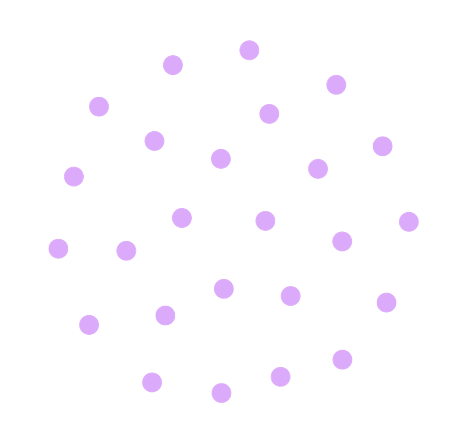

**Explicación del código**

*Consulta*:

```
MATCH (n:Product)
RETURN n
LIMIT 4
```

*Explicación*:
  - <code>MATCH:</code> comando de consulta.
  - <code>n:Product:</code> ordena la búsqueda de nodos <code>Product</code> que etiquetará como <code>n.</code>
  - <code>LIMIT 4:</code> limita la salida a los cuatro primeros resultados.

A continuación, **liste ordenadamente los datos de id, etiquetas y propiedades de los productos**. Se recomienda comenzar explorando el tipo de dato que devuelve la consulta.

In [ ]:
# Compruebe el tipo de dato que se obtiene como resultado
type(result[0])

In [ ]:
# Compruebe el tipo de dato que se obtiene como resultado
type(result[0]["n"])

In [ ]:
# Presente los datos Id, label y properties de forma visual
for record in result:
    print('Id:', record["n"].element_id)
    print('Etiquetas:', record["n"].labels)
    print('Propiedades:', dict(record["n"]))
    print('')

##### **5.2. Obtenga los diferentes productos con los proveedores que los dispensan.**

La consulta debe devolver los nodos <code>Producto</code> conectados con un nodo <code>Supplier</code> por una relación <code>SUPPLIES</code>, limitando la salida a uno.

In [ ]:
# Consulta de los nodos Productos y de los nodos Supplier conectados por una relación SUPPLIES

query = """ **** """

result = conn.query(query)
result

Gráficamente, y sin tener en cuenta la limitación a uno, la consulta anterior devuelve el siguiente grafo (morado - Productos; marrón - Proveedores; aristas - PROVEER):

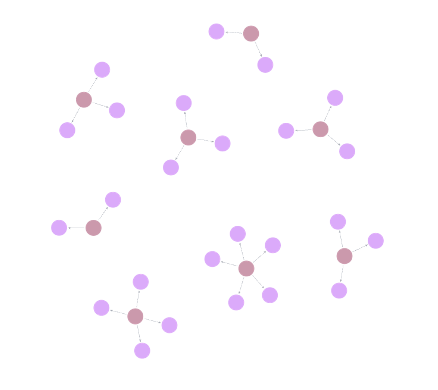

**Explicación del código**

*Consulta*:

```
MATCH (n:Product)<-[r:SUPPLIES]-(s:Supplier)
RETURN n,r,s
LIMIT 1
```

*Explicación*:

  - <code>MATCH:</code> comando de consulta.
  - <code>n:Product:</code> ordena la búsqueda de nodos <code>Product</code> que etiquetará como <code>n.</code>
  - <code><-[r:SUPPLIES]-(s:Supplier):</code> ordena la búsqueda de nodos <code>Supplier:</code> que etiquetará como <code>s</code>, que tengan una relación <code>SUPPLIES</code>, etiquetada como <code>r</code>, con un nodo <code>Product</code>.
      - <code><-:</code> indica que la relación tiene dirección desde el nodo <code>Supplier</code> hacia el nodo <code>Product</code>.
      - <code>[r:SUPPLIES]-:</code> representa una relación llamada <code>SUPPLIES</code> entre el nodo <code>Supplier</code> y el nodo <code>Product</code>.
      - <code>s:Supplier:</code> ordena la búsqueda de nodos <code>Supplier</code> que etiquetará como <code>s.</code>
  - <code><-[r:SUPPLIES]-(s:Supplier):</code> ordena la búsqueda de nodos <code>RETURN:</code> devuelve los nodos y la relación.
  - <code>LIMIT 1:</code> limita la salida a un registro.


##### **5.3. Obtenga una relación de los productos pedidos por clientes, con los proveedores que los proveen.**

Se deben obtener los nodos <code>Customer</code> conectados por una relación <code>PURCHASED</code> con nodos conectados por una relación <code>ORDERS</code> con nodos <code>Producto</code>, así como los nodos <code>Supplier</code> conectados con éstos últimos por una relación <code>SUPPLIES</code>.

In [ ]:
# Consulta de los Productos comprados por Clientes, y de sus Proveedores
query = """ **** """

result = conn.query(query)
result

Gráficamente, la consulta anterior devuelve el siguiente grafo para cada cliente (marrón - Proveedores; morado - Productos; verdes - Pedidos; rojo - cliente; aristas - PROVEER, COMPRAR, ORDENAR):

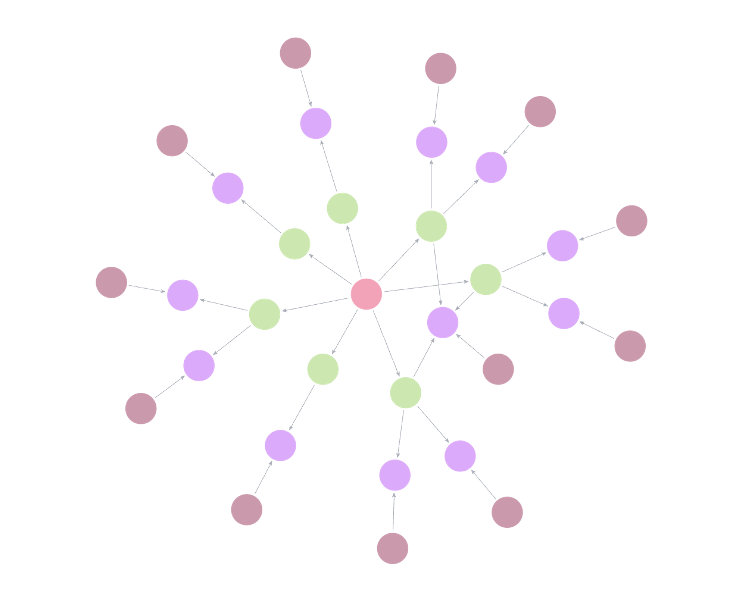

**Explicación del código**

*Consulta*:

```
MATCH path=(c:Customer)-[:PURCHASED]->()-[:ORDERS]->(:Product)<-[:SUPPLIES]-(:Supplier)
WHERE c.companyName = 'Blauer See Delikatessen'
RETURN path;
```

*Explicación*:

  - <code>MATCH path=:</code> indica que se definirá un camino específico en el grafo que se almacenará en el alias <code>path.</code>
  - <code>c:Customer:</code> selecciona los nódulos <code>Customer</code> y los etiqueta como <code>n.</code>
  - <code>[:PURCHASED]->():</code> indica una relación llamada <code>PURCHASED</code> que conecta un nodo <code>Customer</code> con otro nodo no específico, defindo como <code>().</code>
  - <code>()-[:ORDERS]->(:Product):</code> indica una relación llamada <code>ORDERS</code> que conecta un nodo no específico, defindo como <code>()</code>, con un nódulo <code>Product.</code>
  - <code><-[:SUPPLIES]-(:Supplier):</code> busca relaciones <code>SUPPLIES</code> entre nódulos <code>Product</code> y nódulos <code>Supplier</code>, con la dirección indicada.
  - <code>WHERE c.companyName = 'Blauer See Delikatessen':</code> es un filtro que restringe los caminos a aquellos que comiencen con un nodo <code>Customer</code> que tenga como <code>companyName, 'Blauer See Delikatessen'</code>, por lo que se buscan solo transacciones específicas de este cliente.
  - <code>WHERE c.companyName = 'Blauer See Delikatessen':</code> es un filtro que restringe los caminos a aquellos que comiencen con un nodo
  - <code>RETURN path:</code> la consulta devuelve el camino completo que satisface el patrón descrito, es decir, la secuencia de nodos y relaciones que conectan al cliente con el proveedor a través de productos y órdenes.
  - <code>LIMIT 1:</code> limita el número de caminos devueltos a 1. Solo se devolverá el primer camino que coincida con el patrón.